# 1. Realizando limpeza e tratamento de dados

Parte 1 - Remoção de Nulos

Parte 2 - Transformações de colunas não nulas

Parte 3 - Remoção de outliers

## Imports de bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Leitura da base de dados originais

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# carregando o dataset
# df = pd.read_csv("./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/suap/dados_alunos_MD_20190409_223041.csv")
df = pd.read_csv("./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/suap/23062022/dados_caracterizacaosocial.csv")

df.shape

(48311, 30)

In [ ]:
df.situacao.value_counts()

Matriculado                        27310
Concluído                          11703
Evasão                              2075
Cancelado                           1398
Trancado Voluntariamente            1200
Formado                             1192
Trancada                             914
Transferido Externo                  802
Jubilado                             544
Cancelamento Compulsório             508
Concludente                          219
Transferido Interno                  153
Matrícula Vínculo Institucional      134
Aguardando Colação de Grau            41
Cancelamento por Duplicidade          32
Estagiario (concludente)              27
Cancelamento por Desligamento         23
Aguardando ENADE                      22
Afastado                              11
Falecido                               3
Name: situacao, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48311 entries, 0 to 48310
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   alunoid                     48311 non-null  int64  
 1   campus                      48311 non-null  object 
 2   curso                       48311 non-null  object 
 3   anoingresso                 48311 non-null  int64  
 4   periodoingresso             48311 non-null  int64  
 5   dataconclusao               12925 non-null  object 
 6   forma_acesso_seletivo       42288 non-null  object 
 7   rendabruta                  48311 non-null  float64
 8   ira                         48311 non-null  float64
 9   modalidade                  48311 non-null  object 
 10  genero                      48311 non-null  object 
 11  raca                        48311 non-null  object 
 12  idade                       48311 non-null  int64  
 13  ficou_tempo_sem_estudar     483

In [ ]:
path_dataset = "./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/suap/23062022/"

<AxesSubplot:>

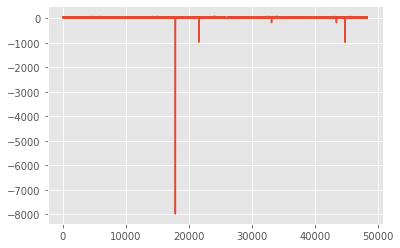

In [ ]:
df.idade.plot()

In [ ]:
df.idade.describe()

count    48311.000000
mean        22.342572
std         37.683327
min      -7978.000000
25%         18.000000
50%         21.000000
75%         24.000000
max         78.000000
Name: idade, dtype: float64

In [ ]:
df.idade.isnull().sum()

0

## Parte 1 - Remoção de Nulos

Consiste em analisar e elaborar estratégias de remoção de valores nulos em nossos dados. 

O primeiro passo é ver quais colunas possuem nulos, o que pode ser feito de três formas:

In [ ]:
## Forma 1: Lista as colunas e marca as que possuem algum valor nulo
print(df.isnull().any())
print()

alunoid                       False
campus                        False
curso                         False
anoingresso                   False
periodoingresso               False
dataconclusao                  True
forma_acesso_seletivo          True
rendabruta                    False
ira                           False
modalidade                    False
genero                        False
raca                          False
idade                         False
ficou_tempo_sem_estudar       False
razao_ausencia_educacional     True
quantidade_computadores        True
exclusivo_rede_publica        False
companhia_domiciliar          False
mae_nivel_escolaridade        False
pai_nivel_escolaridade        False
quantidade_notebooks           True
estado_civil                  False
qtd_filhos                    False
tipo_area_residencial         False
trabalha                      False
situacao                      False
pontuacao_seletivo             True
percentual_frequencia       

In [ ]:
## Forma 2: Na informação básica do dataframe, podemos ver o número de valores não nulos de cada coluna.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48311 entries, 0 to 48310
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   alunoid                     48311 non-null  int64  
 1   campus                      48311 non-null  object 
 2   curso                       48311 non-null  object 
 3   anoingresso                 48311 non-null  int64  
 4   periodoingresso             48311 non-null  int64  
 5   dataconclusao               12925 non-null  object 
 6   forma_acesso_seletivo       42288 non-null  object 
 7   rendabruta                  48311 non-null  float64
 8   ira                         48311 non-null  float64
 9   modalidade                  48311 non-null  object 
 10  genero                      48311 non-null  object 
 11  raca                        48311 non-null  object 
 12  idade                       48311 non-null  int64  
 13  ficou_tempo_sem_estudar     483

In [ ]:
## Forma 3: rankear as colunas pelo número de valores nulos.
print(df.shape)
print(df.isnull().sum().sort_values(ascending=False))

(48311, 30)
pontuacao_seletivo            48311
razao_ausencia_educacional    47799
dataconclusao                 35386
forma_acesso_seletivo          6023
quantidade_computadores        5120
quantidade_notebooks           4209
companhia_domiciliar              0
reprovacoes                       0
percentual_frequencia             0
situacao                          0
trabalha                          0
tipo_area_residencial             0
qtd_filhos                        0
estado_civil                      0
pai_nivel_escolaridade            0
mae_nivel_escolaridade            0
alunoid                           0
exclusivo_rede_publica            0
campus                            0
ficou_tempo_sem_estudar           0
idade                             0
raca                              0
genero                            0
modalidade                        0
ira                               0
rendabruta                        0
periodoingresso                   0
anoingresso     

In [ ]:
percentual_nulos = df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100
print(df.shape)
print(percentual_nulos)

(48311, 30)
pontuacao_seletivo            100.000000
razao_ausencia_educacional     98.940200
dataconclusao                  73.246259
forma_acesso_seletivo          12.467140
quantidade_computadores        10.598000
quantidade_notebooks            8.712302
companhia_domiciliar            0.000000
reprovacoes                     0.000000
percentual_frequencia           0.000000
situacao                        0.000000
trabalha                        0.000000
tipo_area_residencial           0.000000
qtd_filhos                      0.000000
estado_civil                    0.000000
pai_nivel_escolaridade          0.000000
mae_nivel_escolaridade          0.000000
alunoid                         0.000000
exclusivo_rede_publica          0.000000
campus                          0.000000
ficou_tempo_sem_estudar         0.000000
idade                           0.000000
raca                            0.000000
genero                          0.000000
modalidade                      0.000000
ira 

In [ ]:
colunas = ['pontuacao_seletivo','razao_ausencia_educacional','dataconclusao','forma_acesso_seletivo','quantidade_computadores','quantidade_notebooks']

In [ ]:
colunas = ['pontuacao_seletivo','razao_ausencia_educacional','dataconclusao','forma_acesso_seletivo','quantidade_computadores','quantidade_notebooks']
for coluna in colunas:
  print('{}: {}'.format(coluna, df[coluna].dtype))

pontuacao_seletivo: float64
razao_ausencia_educacional: object
dataconclusao: object
forma_acesso_seletivo: object
quantidade_computadores: object
quantidade_notebooks: object


<AxesSubplot:>

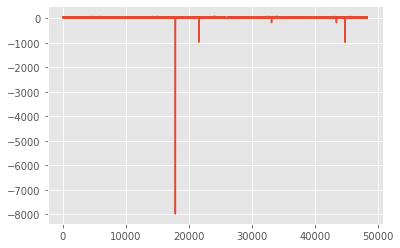

In [ ]:
df.idade.plot()

### Removendo colunas com % de nulos acima de 98%

Colunas com % acima de 98% de nulos:

**pontuacao_seletivo           100.000000**

**razao_ausencia_educacional:  98.940200**

As colunas listas são as mais críticas, pois elas possuem menos de 2% de dados preenchidos e essas informações podem não ser muito úteis. Nesse caso, vamos simplesmente removê-las de nossos dados.

In [ ]:
## Removendo colunas
df.drop(['pontuacao_seletivo','razao_ausencia_educacional'], axis=1, inplace=True)

In [ ]:
df.shape

(48311, 28)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

pontuacao_seletivo            18222
razao_ausencia_educacional    18039
dataconclusao                  5332
forma_acesso_seletivo          4354
quantidade_computadores        1212
quantidade_notebooks           1006
companhia_domiciliar              0
reprovacoes                       0
percentual_frequencia             0
situacao                          0
trabalha                          0
tipo_area_residencial             0
qtd_filhos                        0
estado_civil                      0
pai_nivel_escolaridade            0
mae_nivel_escolaridade            0
alunoid                           0
exclusivo_rede_publica            0
campus                            0
ficou_tempo_sem_estudar           0
idade                             0
raca                              0
genero                            0
modalidade                        0
ira                               0
rendabruta                        0
periodoingresso                   0
anoingresso                 

<AxesSubplot:>

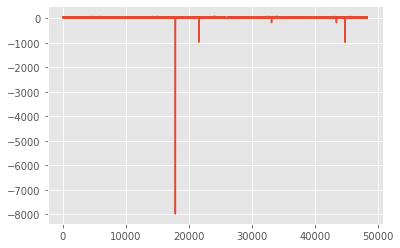

In [ ]:
df.idade.plot()

### Tratando as demais colunas com valores nulos

Colunas:

**dataconclusao:             35386**

**forma_acesso_seletivo:       6023**

**quantidade_computadores:     5120**

**quantidade_notebooks:        4209**

Vamos calcular a média e a mediana das de cada coluna numérica e ver o histograma dos dados originais. As colunas categóricas...

In [ ]:
# colunas numéricas
colunas_num = ['quantidade_computadores','quantidade_notebooks']

print("Média")
print(df[colunas_num].mean())
print()
print("Médiana")
print(df[colunas_num].median())

Média
Series([], dtype: float64)

Médiana
Series([], dtype: float64)


<ipython-input-50-c8f98b47b8ca>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df[colunas_num].mean())
<ipython-input-50-c8f98b47b8ca>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df[colunas_num].median())


In [ ]:
df[colunas_num].hist()

In [ ]:
df.quantidade_computadores.value_counts().sort_values(ascending=False)

0.0        37660
1.0         5269
2.0          190
3.0           32
4.0           11
5.0           11
12.0           3
8.0            3
6.0            2
11.0           2
15.0           2
10.0           2
30.0           2
100.0          1
17488.0        1
Name: quantidade_computadores, dtype: int64

In [ ]:
df.quantidade_notebooks.value_counts().sort_values(ascending=False)

0.0      30409
1.0      12855
2.0        702
3.0        106
4.0         18
5.0          5
10.0         2
8.0          2
100.0        1
16.0         1
15.0         1
Name: quantidade_notebooks, dtype: int64

<AxesSubplot:>

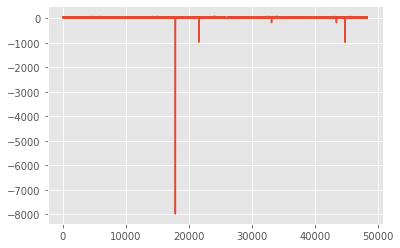

In [ ]:
df.idade.plot()

### Trocando valores nulos pela média

Vam trocas os valores nulos das colunas ***'quantidade_computadores'*** e ***'quantidade_notebooks'*** pelo valor da média e depois gerar novo histograma das colunas.

In [ ]:
## em cada coluna, preenche os nulos com a média da respectiva coluna
for coluna in colunas_num:
  df[coluna].fillna(df[coluna].mean, inplace=True)

# df[colunas_num].hist()

In [ ]:
df.isnull().sum().sort_values(ascending=False)

dataconclusao              35386
forma_acesso_seletivo       6023
alunoid                        0
exclusivo_rede_publica         0
reprovacoes                    0
percentual_frequencia          0
situacao                       0
trabalha                       0
tipo_area_residencial          0
qtd_filhos                     0
estado_civil                   0
quantidade_notebooks           0
pai_nivel_escolaridade         0
mae_nivel_escolaridade         0
companhia_domiciliar           0
quantidade_computadores        0
campus                         0
ficou_tempo_sem_estudar        0
idade                          0
raca                           0
genero                         0
modalidade                     0
ira                            0
rendabruta                     0
periodoingresso                0
anoingresso                    0
curso                          0
idioma                         0
dtype: int64

<AxesSubplot:>

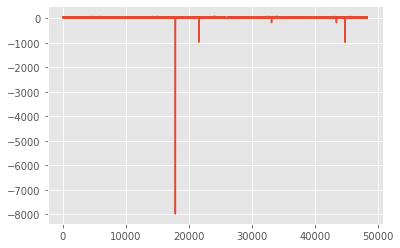

In [ ]:
df.idade.plot()

### Dados categóricos nulos

Histograma só é possível com valores numéricos, mas ***'dataconclusao'***
***'forma_acesso_seletivo'*** são categóricos

Plotando de outra forma...

<Axes: title={'center': 'dataconclusao'}>

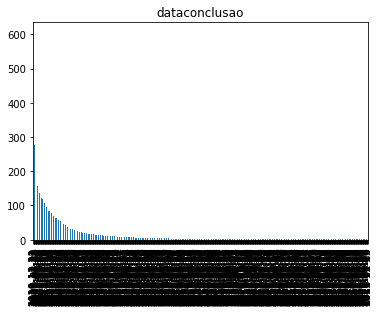

In [ ]:
colunas_cat = [ 'dataconclusao','forma_acesso_seletivo']

df[colunas_cat[0]].value_counts().plot(kind='bar', title=colunas_cat[0]) 

#### Para dados categóricos, preencher ausentes com valor mais frequente

In [ ]:
for variavel in colunas_cat:
  maior_frequencia = df[variavel].value_counts()
  df[variavel].fillna(maior_frequencia, inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

pontuacao_seletivo            48311
razao_ausencia_educacional    47799
dataconclusao                 35386
forma_acesso_seletivo          6023
alunoid                           0
companhia_domiciliar              0
reprovacoes                       0
percentual_frequencia             0
situacao                          0
trabalha                          0
tipo_area_residencial             0
qtd_filhos                        0
estado_civil                      0
quantidade_notebooks              0
pai_nivel_escolaridade            0
mae_nivel_escolaridade            0
quantidade_computadores           0
exclusivo_rede_publica            0
campus                            0
ficou_tempo_sem_estudar           0
idade                             0
raca                              0
genero                            0
modalidade                        0
ira                               0
rendabruta                        0
periodoingresso                   0
anoingresso                 

### Salvando dataset sem nulos

<Axes: >

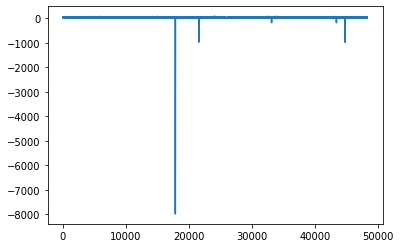

In [ ]:
df.idade.plot()

In [ ]:
df.to_csv(path_dataset+"06012023_dataset_sem_nulos.csv")

In [ ]:
df.shape

(48311, 30)

## Parte 2 - Transformações de colunas não nulas

<AxesSubplot:>

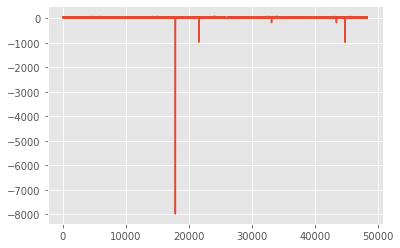

In [ ]:
df.idade.plot()

In [ ]:
df.idade.describe()

count    48311.000000
mean        22.342572
std         37.683327
min      -7978.000000
25%         18.000000
50%         21.000000
75%         24.000000
max         78.000000
Name: idade, dtype: float64

### Remoção da coluna 'exclusivo_rede_publica'

A coluna 'exclusivo_rede_publica' apresenta todos os seus valores iguais a 0. Logo, não tem nenhum efeito relevante no entendimento dos dados.

In [ ]:
# dataset.exclusivo_rede_publica.value_counts()

In [ ]:
# dataset.drop('exclusivo_rede_publica', axis=1, inplace=True)

In [ ]:
df.shape

(48311, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48311 entries, 0 to 48310
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   alunoid                     48311 non-null  int64  
 1   campus                      48311 non-null  object 
 2   curso                       48311 non-null  object 
 3   anoingresso                 48311 non-null  int64  
 4   periodoingresso             48311 non-null  int64  
 5   dataconclusao               12925 non-null  object 
 6   forma_acesso_seletivo       42288 non-null  object 
 7   rendabruta                  48311 non-null  float64
 8   ira                         48311 non-null  float64
 9   modalidade                  48311 non-null  object 
 10  genero                      48311 non-null  object 
 11  raca                        48311 non-null  object 
 12  idade                       48311 non-null  int64  
 13  ficou_tempo_sem_estudar     483

### Importando dataset sem nulos

In [ ]:
df_sem_nulos = pd.read_csv("./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/suap/23062022/06012023_dataset_sem_nulos.csv")
df_sem_nulos.drop('Unnamed: 0', axis=1, inplace=True)

df_sem_nulos.shape
dataset = df_sem_nulos.copy() # apague isso depois

### Definindo o dataset contendo apenas dados de cursos técnicos

Com este filtro por linhas, o dataset fica com, aproximandamente, 75% de instâncias em relação ao dataset com dados originais.

Tamanho dataset original: 48311

Tamanho dataset filtrado por linha: 36273

In [ ]:
filtro1 = df_sem_nulos['modalidade'] == 'Concomitante'  # 1,5 anos para conclusão
filtro2 = df_sem_nulos['modalidade'] == 'Integrado'     # 3 anos para conclusão
filtro3 = df_sem_nulos['modalidade'] == 'Integrado EJA' # 3 anos para conclusão
filtro4 = df_sem_nulos['modalidade'] == 'Subsequente'   # 1,5 anos para conclusão

# tam = df_sem_nulos.shape[0]

dataset = df_sem_nulos[filtro1 | filtro2 | filtro3 | filtro4]
print(dataset.modalidade.value_counts())
dataset.shape

Integrado        23736
Subsequente       8780
Concomitante      2120
Integrado EJA     1637
Name: modalidade, dtype: int64


(36273, 28)

In [ ]:
print(dataset.situacao.value_counts())
dataset.shape

Matriculado                        19741
Concluído                          11703
Evasão                              1760
Transferido Externo                  791
Trancado Voluntariamente             686
Cancelado                            446
Trancada                             372
Cancelamento Compulsório             346
Transferido Interno                  118
Concludente                          112
Matrícula Vínculo Institucional       94
Jubilado                              38
Estagiario (concludente)              27
Cancelamento por Duplicidade          20
Afastado                               9
Cancelamento por Desligamento          9
Falecido                               1
Name: situacao, dtype: int64


(36273, 28)

<AxesSubplot:>

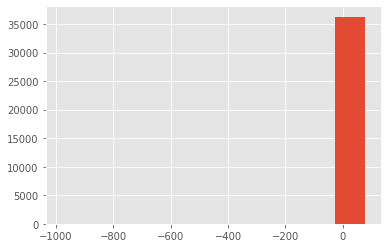

In [ ]:
dataset.idade.hist()

### Definindo o dataset contendo apenas dados de cursos técnicos em computação

Com este filtro por linhas, o dataset fica com, aproximandamente, ?% de instâncias em relação ao dataset com dados originais.

Tamanho dataset original: ???

Tamanho dataset filtrado por linha: ???

In [ ]:
print(df.curso.value_counts())
# df.shape

Técnico em Agropecuária - EAD                                          1049
Técnico em Informática Integrado ao Ensino Médio                        946
Licenciatura em Química                                                 944
Licenciatura em Matemática                                              793
Técnico em Administração Integrado ao Ensino Médio                      713
                                                                       ... 
Eletrotecnica Integrado Tc: T Area:controle e Processos Industriais       1
Técnico em Química - Matutino - Pronatec - Monte Castelo                  1
Curso Técnico em Mecânica Subsequente 2012.2                              1
Técnico em Meio Ambiente Tc.Área: Meio Ambiente - Pinheiro                1
Licenciatura em Biologia - Lb                                             1
Name: curso, Length: 402, dtype: int64


In [ ]:
# Apesar das diversas nomenclaturas para os cursos técnicos de computação do IFMA, apenas as quatro palavras-chave abaixo são suficientes para mapear todos esses cursos.
dataset = dataset.loc[dataset['curso'].str.contains("informática|sistema|programação|computador", case=False)]

In [ ]:
dataset.shape

(5789, 28)

### Definindo a coluna alvo 'situacao' para conter valores apenas 'evadido' e 'formado'

Com este filtro, por linha, novamente, o número de instâncias do dataset será reduzido a 41,6% de instâncias em relação ao dataset com dados originais, aproximadamente.

Tamanho dataset original: 36273

Tamanho dataset filtrado por linha: 

In [ ]:
query = ['Concluído','Formado']
formados = dataset[dataset['situacao'].isin(query)]
formados.replace(['Concluído','Formado'], "1", inplace=True) # 1 - formado

query = ['Evasão','Cancelado','Cancelamento Compulsório','Jubilado','Transferido Externo']
evadidos = dataset[dataset['situacao'].isin(query)]

evadidos.replace(['Evasão','Cancelado','Cancelamento Compulsório','Jubilado','Transferido Externo'], "0", inplace=True) # 0 - evadido

dataset = pd.concat([formados, evadidos])

<AxesSubplot:>

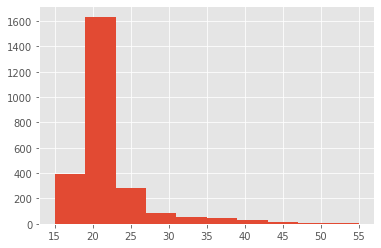

In [ ]:
dataset.idade.hist()

In [ ]:
print(dataset.situacao.value_counts())
dataset.shape

1    1887
0     654
Name: situacao, dtype: int64


(2541, 28)

### Transformando a coluna **'dataconclusao'** para o tipo *datatime*

In [ ]:
ano_conclusao = pd.to_datetime(dataset['dataconclusao'],errors='coerce')
dataset['ano_conclusao'] = ano_conclusao.dt.year

# Preenchendo dados ausentes com 0
dataset['ano_conclusao'].fillna(0, inplace=True)
dataset['ano_conclusao'] = dataset['ano_conclusao'].apply(int)

# Removendo linhas com ano de conclusão superior a 2022. (Foram removidas 3 linhas)
dataset = dataset[dataset['ano_conclusao']<2023]

# Removendo coluna (s)
dataset.drop('dataconclusao', axis=1, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2541 entries, 6 to 48208
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   alunoid                  2541 non-null   int64  
 1   campus                   2541 non-null   object 
 2   curso                    2541 non-null   object 
 3   anoingresso              2541 non-null   int64  
 4   periodoingresso          2541 non-null   int64  
 5   forma_acesso_seletivo    1818 non-null   object 
 6   rendabruta               2541 non-null   float64
 7   ira                      2541 non-null   float64
 8   modalidade               2541 non-null   object 
 9   genero                   2541 non-null   object 
 10  raca                     2541 non-null   object 
 11  idade                    2541 non-null   int64  
 12  ficou_tempo_sem_estudar  2541 non-null   bool   
 13  quantidade_computadores  2541 non-null   object 
 14  exclusivo_rede_publica 

### Criação da coluna 'pais_escolarizados'

Criação da coluna **'pais_escolarizados'**, a partir de 3 colunas do dataset: ***'companhia_domiciliar', 'mae_nivel_escolaridade', 'pai_nivel_escolaridade'***. O objetivo é verificar a relevância desta variável na predição da variável alvo.

In [ ]:
dataset["pais_escolarizados"] = 1 # escolarizado

mae = dataset.companhia_domiciliar == 'Mãe' 
pai = dataset.companhia_domiciliar == 'Pai'
pais = dataset.companhia_domiciliar == 'Pais'
mae_escolaridade = dataset.mae_nivel_escolaridade == "Não Estudou"
pai_escolaridade = dataset.pai_nivel_escolaridade == "Não Estudou"
escola = dataset[(mae | pai | pais) & (mae_escolaridade & pai_escolaridade)]
escola.pais_escolarizados = 0 # não escolarizado

nao_informado_mae = dataset.mae_nivel_escolaridade == "Não sei informar" 
nao_informado_pai = dataset.pai_nivel_escolaridade == "Não sei informar"
nao_conhece_pai = dataset.pai_nivel_escolaridade == "Não conhece"
nao_informado = dataset[nao_informado_mae | nao_informado_pai | nao_conhece_pai]
nao_informado.pais_escolarizados = 2 # não soube informar

dataset.pais_escolarizados.update(pd.Series(escola.pais_escolarizados, index = escola.pais_escolarizados.index.tolist()))
dataset.pais_escolarizados.update(pd.Series(nao_informado.pais_escolarizados, index = nao_informado.pais_escolarizados.index.tolist()))

### Transformando as colunas categóricas 'genero', 'raca', 'estado_civil' em numéricas com o método One-Hot Encoding

#### Alterando valores da coluna ***'raca'***

Antes da aplicação do método One-Hot Encoding, será feita uma transformação na coluna raça, que apresenta textos com escrita diferentes para valores iguais, conforme contagem do comando abaixo.


In [ ]:
# contando valores da coluna 'raca'
dataset.raca.value_counts()

Parda            1694
Branca            420
Preta             346
PARDA              24
Amarela            24
Indígena           19
PRETA               6
BRANCA              4
NAO INFORMADO       3
INDIGENA            1
Name: raca, dtype: int64

In [ ]:
# Alterando valores da coluna 'raca'
dataset.loc[dataset.raca == "branca","raca"]="Branca"
dataset.loc[dataset.raca == "BRANCA","raca"]="Branca"
dataset.loc[dataset.raca == "PARDA","raca"]="Parda"
dataset.loc[dataset.raca == "parda","raca"]="Parda"
dataset.loc[dataset.raca == "indígena","raca"]="Indigena"
dataset.loc[dataset.raca == "INDIGENA","raca"]="Indigena"
dataset.loc[dataset.raca == "Indígena","raca"]="Indigena"
dataset.loc[dataset.raca == "PRETA","raca"]="Preta"
dataset.loc[dataset.raca == "preta","raca"]="Preta"
dataset.loc[dataset.raca == "AMARELA","raca"]="Amarela"
dataset.loc[dataset.raca == "amarela","raca"]="Amarela"
dataset.loc[dataset.raca == "NAO INFORMADO","raca"]="Não Informado"

<AxesSubplot:>

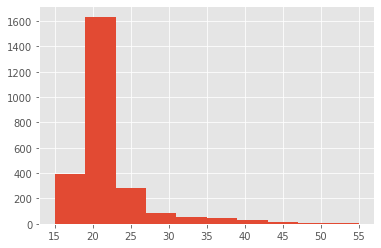

In [ ]:
dataset.idade.hist()

In [ ]:
features = ['genero', 'raca', 'estado_civil']
# categoricos = [var for var in dataset.drop(['genero', 'raca', 'estado_civil','situacao'],axis=1).columns if (dataset[var].dtype=='object') | (dataset[var].dtype=='bool')]

X = dataset[features]
X = pd.get_dummies(X, drop_first=False)
dataset = pd.concat([dataset, X], axis=1)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48311 entries, 0 to 48310
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   alunoid                     48311 non-null  int64  
 1   campus                      48311 non-null  object 
 2   curso                       48311 non-null  object 
 3   anoingresso                 48311 non-null  int64  
 4   periodoingresso             48311 non-null  int64  
 5   dataconclusao               12925 non-null  object 
 6   forma_acesso_seletivo       42288 non-null  object 
 7   rendabruta                  48311 non-null  float64
 8   ira                         48311 non-null  float64
 9   modalidade                  48311 non-null  object 
 10  genero                      48311 non-null  object 
 11  raca                        48311 non-null  object 
 12  idade                       48311 non-null  int64  
 13  ficou_tempo_sem_estudar     483

#### Removendo as colunas originais 'genero', 'raca', 'estado_civil' do dataset

In [ ]:
dataset.drop(features, axis=1, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48311 entries, 0 to 48310
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   alunoid                     48311 non-null  int64  
 1   campus                      48311 non-null  object 
 2   curso                       48311 non-null  object 
 3   anoingresso                 48311 non-null  int64  
 4   periodoingresso             48311 non-null  int64  
 5   dataconclusao               12925 non-null  object 
 6   forma_acesso_seletivo       42288 non-null  object 
 7   rendabruta                  48311 non-null  float64
 8   ira                         48311 non-null  float64
 9   modalidade                  48311 non-null  object 
 10  idade                       48311 non-null  int64  
 11  ficou_tempo_sem_estudar     48311 non-null  bool   
 12  razao_ausencia_educacional  512 non-null    object 
 13  quantidade_computadores     483

### Transformando demais colunas categóricas em numéricas com o método LabelEncoder

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48311 entries, 0 to 48310
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   alunoid                     48311 non-null  int64  
 1   campus                      48311 non-null  object 
 2   curso                       48311 non-null  object 
 3   anoingresso                 48311 non-null  int64  
 4   periodoingresso             48311 non-null  int64  
 5   dataconclusao               12925 non-null  object 
 6   forma_acesso_seletivo       42288 non-null  object 
 7   rendabruta                  48311 non-null  float64
 8   ira                         48311 non-null  float64
 9   modalidade                  48311 non-null  object 
 10  idade                       48311 non-null  int64  
 11  ficou_tempo_sem_estudar     48311 non-null  bool   
 12  razao_ausencia_educacional  512 non-null    object 
 13  quantidade_computadores     483

In [ ]:
# aux = dataset.drop['situacao']
categoricos = [var for var in dataset.drop(['situacao'],axis=1).columns if (dataset[var].dtype=='object') | (dataset[var].dtype=='bool')]

categoricos

['campus',
 'curso',
 'dataconclusao',
 'forma_acesso_seletivo',
 'modalidade',
 'genero',
 'raca',
 'ficou_tempo_sem_estudar',
 'razao_ausencia_educacional',
 'quantidade_computadores',
 'exclusivo_rede_publica',
 'companhia_domiciliar',
 'mae_nivel_escolaridade',
 'pai_nivel_escolaridade',
 'quantidade_notebooks',
 'estado_civil',
 'tipo_area_residencial',
 'trabalha',
 'idioma']

In [ ]:
from sklearn.preprocessing import LabelEncoder

categoricos = [var for var in dataset.columns if (dataset[var].dtype=='object') | (dataset[var].dtype=='bool')]

for cat in categoricos:
  label = LabelEncoder()
  dataset[cat] = label.fit_transform(dataset[cat].astype(str))


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48311 entries, 0 to 48310
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   alunoid                     48311 non-null  int64  
 1   campus                      48311 non-null  int64  
 2   curso                       48311 non-null  int64  
 3   anoingresso                 48311 non-null  int64  
 4   periodoingresso             48311 non-null  int64  
 5   dataconclusao               48311 non-null  int64  
 6   forma_acesso_seletivo       48311 non-null  int64  
 7   rendabruta                  48311 non-null  float64
 8   ira                         48311 non-null  float64
 9   modalidade                  48311 non-null  int64  
 10  idade                       48311 non-null  int64  
 11  ficou_tempo_sem_estudar     48311 non-null  int64  
 12  razao_ausencia_educacional  48311 non-null  int64  
 13  quantidade_computadores     483

### Feature selection após dataset 

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
print(selector.fit_transform(dataset))
# selector.shape

# df_sem_variacao_0 = pd.DataFrame(selector)
# df_sem_variacao_0

[[2.74410e+04 1.60000e+01 1.36000e+02 ... 1.00000e+00 0.00000e+00
  0.00000e+00]
 [7.74000e+04 1.60000e+01 3.28000e+02 ... 1.00000e+00 0.00000e+00
  0.00000e+00]
 [1.09173e+05 1.60000e+01 3.35000e+02 ... 1.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [7.90310e+04 1.10000e+01 6.90000e+01 ... 1.00000e+00 0.00000e+00
  0.00000e+00]
 [1.40233e+05 1.10000e+01 8.00000e+00 ... 1.00000e+00 0.00000e+00
  0.00000e+00]
 [1.52688e+05 1.60000e+01 2.93000e+02 ... 1.00000e+00 0.00000e+00
  0.00000e+00]]


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_variance_threshold.py:111: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_variance_threshold.py:119: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


In [ ]:
dataset.isnull().sum()

alunoid                           0
campus                            0
curso                             0
anoingresso                       0
periodoingresso                   0
dataconclusao                     0
forma_acesso_seletivo             0
rendabruta                        0
ira                               0
modalidade                        0
idade                             0
ficou_tempo_sem_estudar           0
razao_ausencia_educacional        0
quantidade_computadores           0
exclusivo_rede_publica            0
companhia_domiciliar              0
mae_nivel_escolaridade            0
pai_nivel_escolaridade            0
quantidade_notebooks              0
qtd_filhos                        0
tipo_area_residencial             0
trabalha                          0
situacao                          0
pontuacao_seletivo            48311
percentual_frequencia             0
reprovacoes                       0
idioma                            0
genero_F                    

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif,chi2,mutual_info_classif
from sklearn.preprocessing import MinMaxScaler #fixed import

X = dataset.drop(['pontuacao_seletivo','situacao'],axis=1)
y = dataset['situacao']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# X_test = scaler.transform(X_test)

X_sel = SelectKBest(chi2, k=10).fit_transform(X,y)
print(X_sel)
print(X_sel.shape[1])
pd.DataFrame(X_sel)

[[0.17080459 0.33915212 0.         ... 0.         0.         0.        ]
 [0.48182758 0.81795511 0.         ... 0.         1.         0.        ]
 [0.67963244 0.83541147 0.         ... 0.03896104 0.         0.        ]
 ...
 [0.49198147 0.17206983 0.         ... 0.         0.         0.        ]
 [0.87299848 0.01995012 0.         ... 0.03896104 0.         0.        ]
 [0.95053789 0.73067332 0.         ... 0.         0.         0.        ]]
10


0         1    2         3    4         5         6         7  \
0      0.170805  0.339152  0.0  1.000000  0.5  0.000000  0.090909  0.000000   
1      0.481828  0.817955  0.0  1.000000  0.0  0.000000  0.000000  0.000000   
2      0.679632  0.835411  0.0  1.000000  0.5  0.000000  0.000000  0.038961   
3      0.648822  0.321696  0.1  1.000000  0.0  0.000000  0.000000  0.142857   
4      0.742480  0.561097  0.0  1.000000  0.5  0.066667  0.000000  0.116883   
...         ...       ...  ...       ...  ...       ...       ...       ...   
48306  0.418819  0.241895  0.0  0.298144  1.0  0.000000  0.000000  0.000000   
48307  0.511100  0.019950  0.0  1.000000  0.0  0.066667  0.000000  0.000000   
48308  0.491981  0.172070  0.0  1.000000  0.0  0.000000  0.000000  0.000000   
48309  0.872998  0.019950  0.0  1.000000  0.0  0.000000  0.000000  0.038961   
48310  0.950538  0.730673  0.0  1.000000  0.0  0.000000  0.000000  0.000000   

         8    9  
0      0.0  0.0  
1      1.0  0.0  
2      0.0  0.0  
3      1.0  0.0  
4      1.0  0.0  
...    ...  ...  
48306  0.0  0.0  
48307  0.0  0.0  
48308  0.0  0.0  
48309  0.0  0.0  
48310  0.0  0.0  

[48311 rows x 10 columns]

### hhh

<AxesSubplot:>

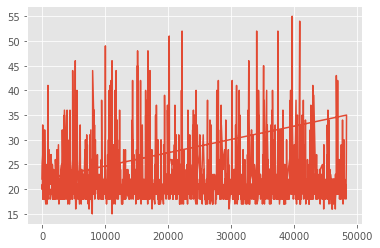

In [ ]:
dataset.idade.plot()

### Salvando o dataset transformado

In [ ]:
dataset.shape

(2541, 39)

In [ ]:
dataset.to_csv(path_dataset+"06012023_dataset_transformado_escala_padronizada_numerico.csv")

## Parte 3 - Remoção de outliers

### Importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.simplefilter(action='ignore')

### Importando dataset sem nulos

In [ ]:
dataset = pd.read_csv("./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/suap/23062022/06012023_dataset_transformado_escala_padronizada_numerico.csv")
dataset.drop('Unnamed: 0', axis=1, inplace=True)

dataset.shape

(2541, 39)

<AxesSubplot:>

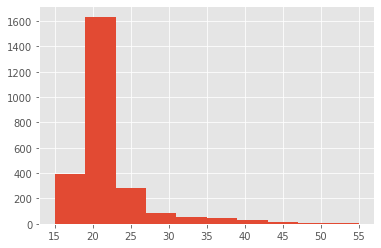

In [ ]:
dataset.idade.hist()

AxesSubplot(0.125,0.125;0.775x0.755)


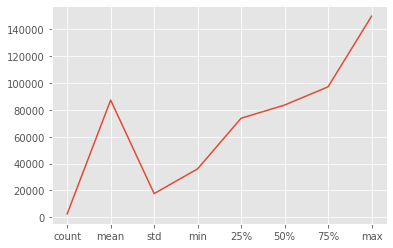

coluna: alunoid
[36105, 73801.0, 97200.0, 149791]

AxesSubplot(0.125,0.125;0.775x0.755)


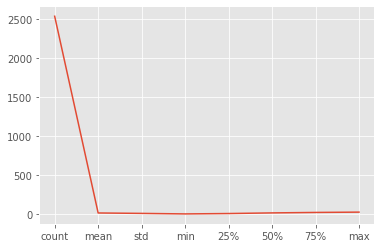

coluna: campus
[0, 5.0, 19.0, 23]

AxesSubplot(0.125,0.125;0.775x0.755)


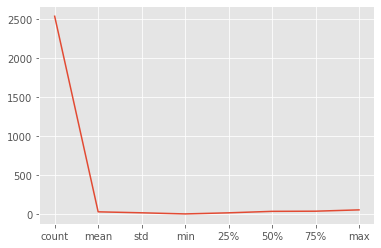

coluna: curso
[0, 14.0, 35.0, 52]

AxesSubplot(0.125,0.125;0.775x0.755)


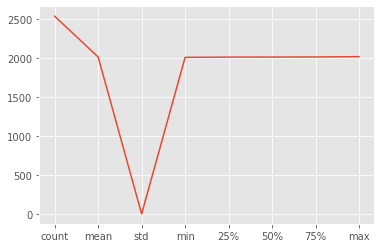

coluna: anoingresso
[2013, 2016.0, 2018.0, 2022]

AxesSubplot(0.125,0.125;0.775x0.755)


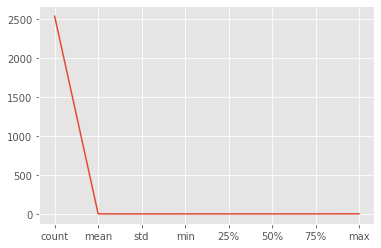

coluna: periodoingresso
[1, 1.0, 1.0, 2]

AxesSubplot(0.125,0.125;0.775x0.755)


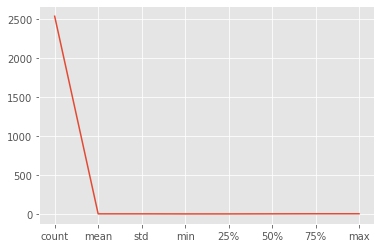

coluna: forma_acesso_seletivo
[0, 0.0, 2.0, 2]

AxesSubplot(0.125,0.125;0.775x0.755)


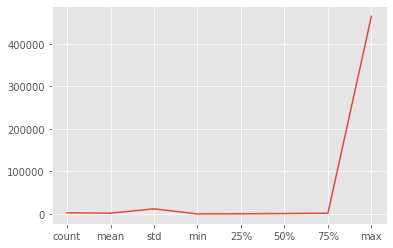

coluna: rendabruta
[0.0, 320.0, 1600.0, 464718.0]

AxesSubplot(0.125,0.125;0.775x0.755)


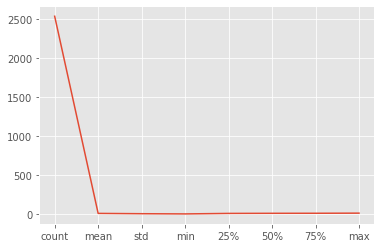

coluna: ira
[0.0, 6.53, 8.38, 9.9]

AxesSubplot(0.125,0.125;0.775x0.755)


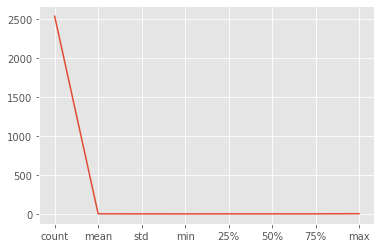

coluna: modalidade
[0, 1.0, 1.0, 3]

AxesSubplot(0.125,0.125;0.775x0.755)


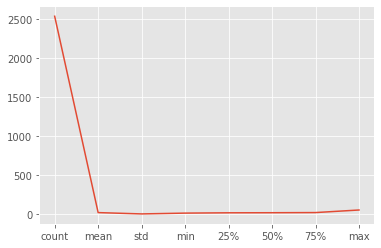

coluna: idade
[15, 19.0, 22.0, 55]

AxesSubplot(0.125,0.125;0.775x0.755)


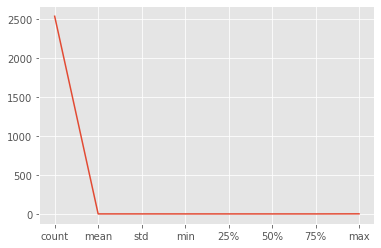

coluna: ficou_tempo_sem_estudar
[0, 0.0, 0.0, 1]

AxesSubplot(0.125,0.125;0.775x0.755)


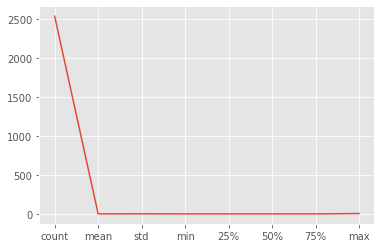

coluna: quantidade_computadores
[0, 0.0, 0.0, 5]

AxesSubplot(0.125,0.125;0.775x0.755)


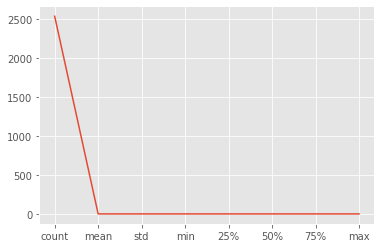

coluna: exclusivo_rede_publica
[0, 0.0, 0.0, 0]

AxesSubplot(0.125,0.125;0.775x0.755)


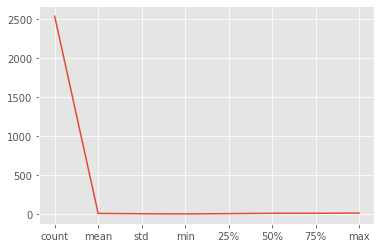

coluna: companhia_domiciliar
[0, 4.0, 8.0, 11]

AxesSubplot(0.125,0.125;0.775x0.755)


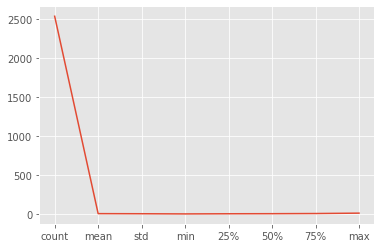

coluna: mae_nivel_escolaridade
[0, 2.0, 5.0, 10]

AxesSubplot(0.125,0.125;0.775x0.755)


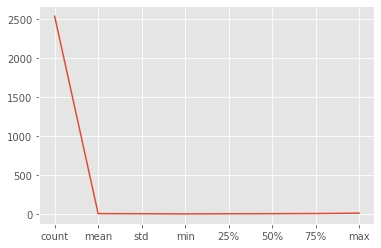

coluna: pai_nivel_escolaridade
[0, 2.0, 5.0, 10]

AxesSubplot(0.125,0.125;0.775x0.755)


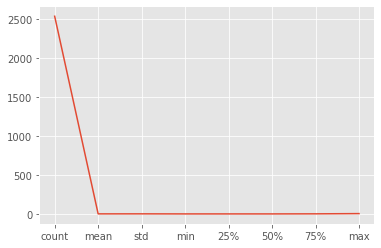

coluna: quantidade_notebooks
[0, 0.0, 1.0, 4]

AxesSubplot(0.125,0.125;0.775x0.755)


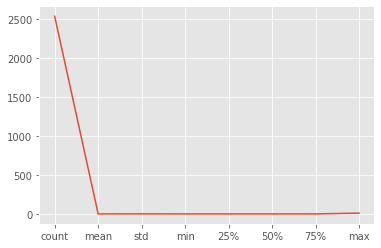

coluna: qtd_filhos
[0, 0.0, 0.0, 10]

AxesSubplot(0.125,0.125;0.775x0.755)


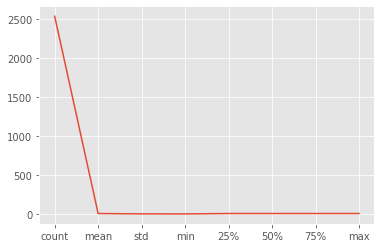

coluna: tipo_area_residencial
[0, 5.0, 5.0, 5]

AxesSubplot(0.125,0.125;0.775x0.755)


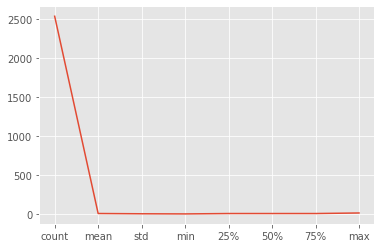

coluna: trabalha
[0, 5.0, 5.0, 12]

AxesSubplot(0.125,0.125;0.775x0.755)


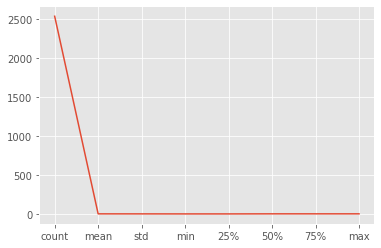

coluna: situacao
[0, 0.0, 1.0, 1]

AxesSubplot(0.125,0.125;0.775x0.755)


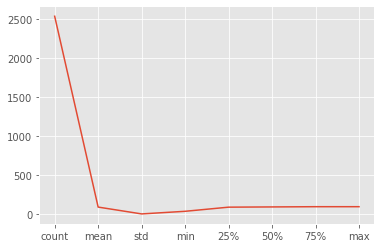

coluna: percentual_frequencia
[41, 94.0, 100.0, 100]

AxesSubplot(0.125,0.125;0.775x0.755)


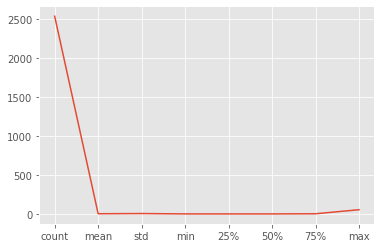

coluna: reprovacoes
[0, 0.0, 2.0, 54]

AxesSubplot(0.125,0.125;0.775x0.755)


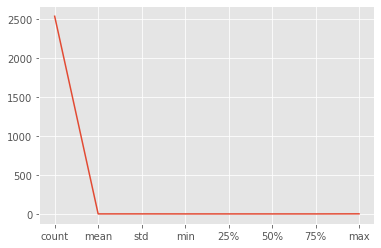

coluna: idioma
[0, 0.0, 0.0, 1]

AxesSubplot(0.125,0.125;0.775x0.755)


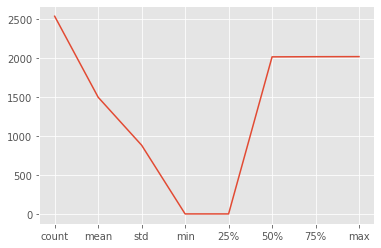

coluna: ano_conclusao
[0, 0.0, 2021.0, 2022]

AxesSubplot(0.125,0.125;0.775x0.755)


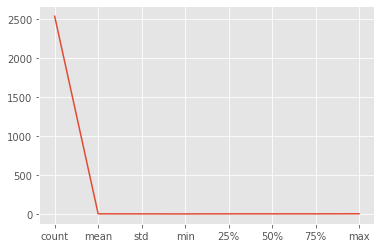

coluna: pais_escolarizados
[0, 1.0, 1.0, 2]

AxesSubplot(0.125,0.125;0.775x0.755)


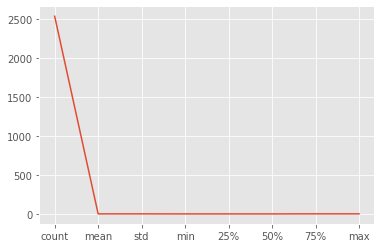

coluna: genero_F
[0, 0.0, 1.0, 1]

AxesSubplot(0.125,0.125;0.775x0.755)


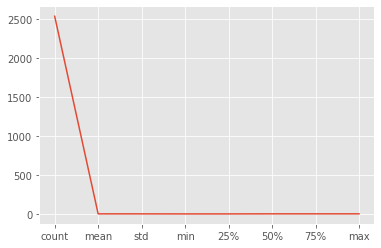

coluna: genero_M
[0, 0.0, 1.0, 1]

AxesSubplot(0.125,0.125;0.775x0.755)


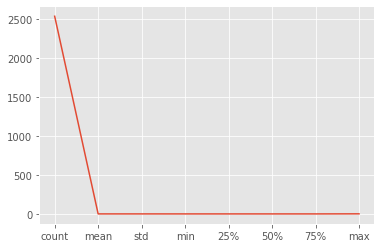

coluna: raca_Amarela
[0, 0.0, 0.0, 1]

AxesSubplot(0.125,0.125;0.775x0.755)


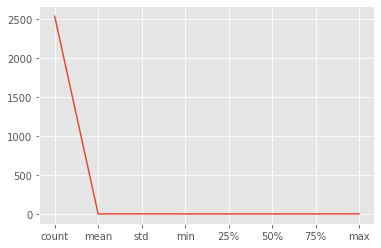

coluna: raca_Branca
[0, 0.0, 0.0, 1]

AxesSubplot(0.125,0.125;0.775x0.755)


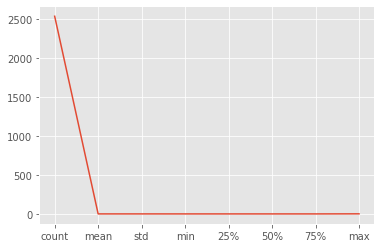

coluna: raca_Indigena
[0, 0.0, 0.0, 1]

AxesSubplot(0.125,0.125;0.775x0.755)


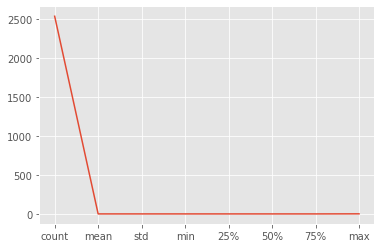

coluna: raca_Não Informado
[0, 0.0, 0.0, 1]

AxesSubplot(0.125,0.125;0.775x0.755)


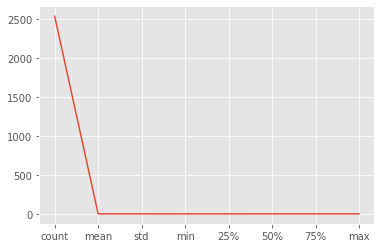

coluna: raca_Parda
[0, 0.0, 1.0, 1]

AxesSubplot(0.125,0.125;0.775x0.755)


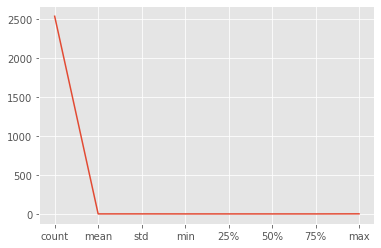

coluna: raca_Preta
[0, 0.0, 0.0, 1]

AxesSubplot(0.125,0.125;0.775x0.755)


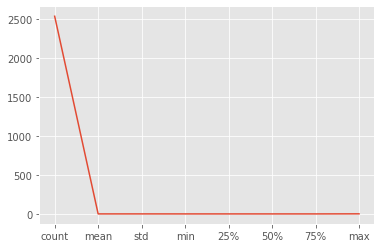

coluna: estado_civil_Casado(a)
[0, 0.0, 0.0, 1]

AxesSubplot(0.125,0.125;0.775x0.755)


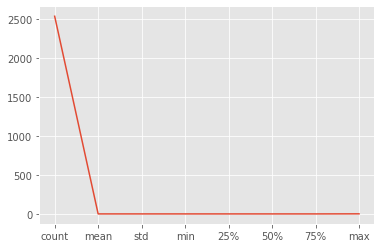

coluna: estado_civil_Divorciado(a)
[0, 0.0, 0.0, 1]

AxesSubplot(0.125,0.125;0.775x0.755)


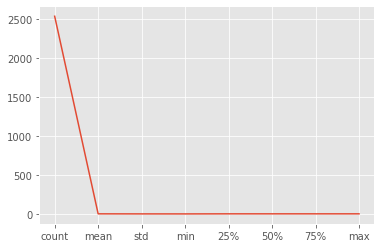

coluna: estado_civil_Solteiro(a)
[0, 1.0, 1.0, 1]

AxesSubplot(0.125,0.125;0.775x0.755)


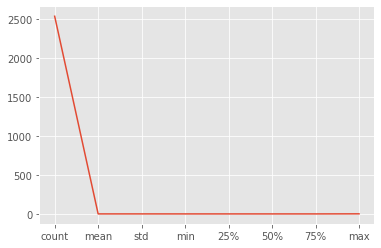

coluna: estado_civil_União Estável
[0, 0.0, 0.0, 1]

AxesSubplot(0.125,0.125;0.775x0.755)


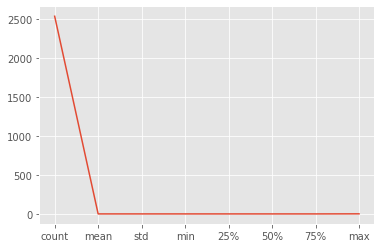

coluna: estado_civil_Viúvo(a)
[0, 0.0, 0.0, 1]



In [ ]:
for coluna in dataset.columns.tolist():
  print(dataset[coluna].describe().plot())
  plt.show()  
  print("coluna: {}".format(coluna))
  print([dataset[coluna].min(), dataset[coluna].quantile(.25), dataset[coluna].quantile(.75), dataset[coluna].max()])
  print()

### Plotando histogramas dos atributos do dataset

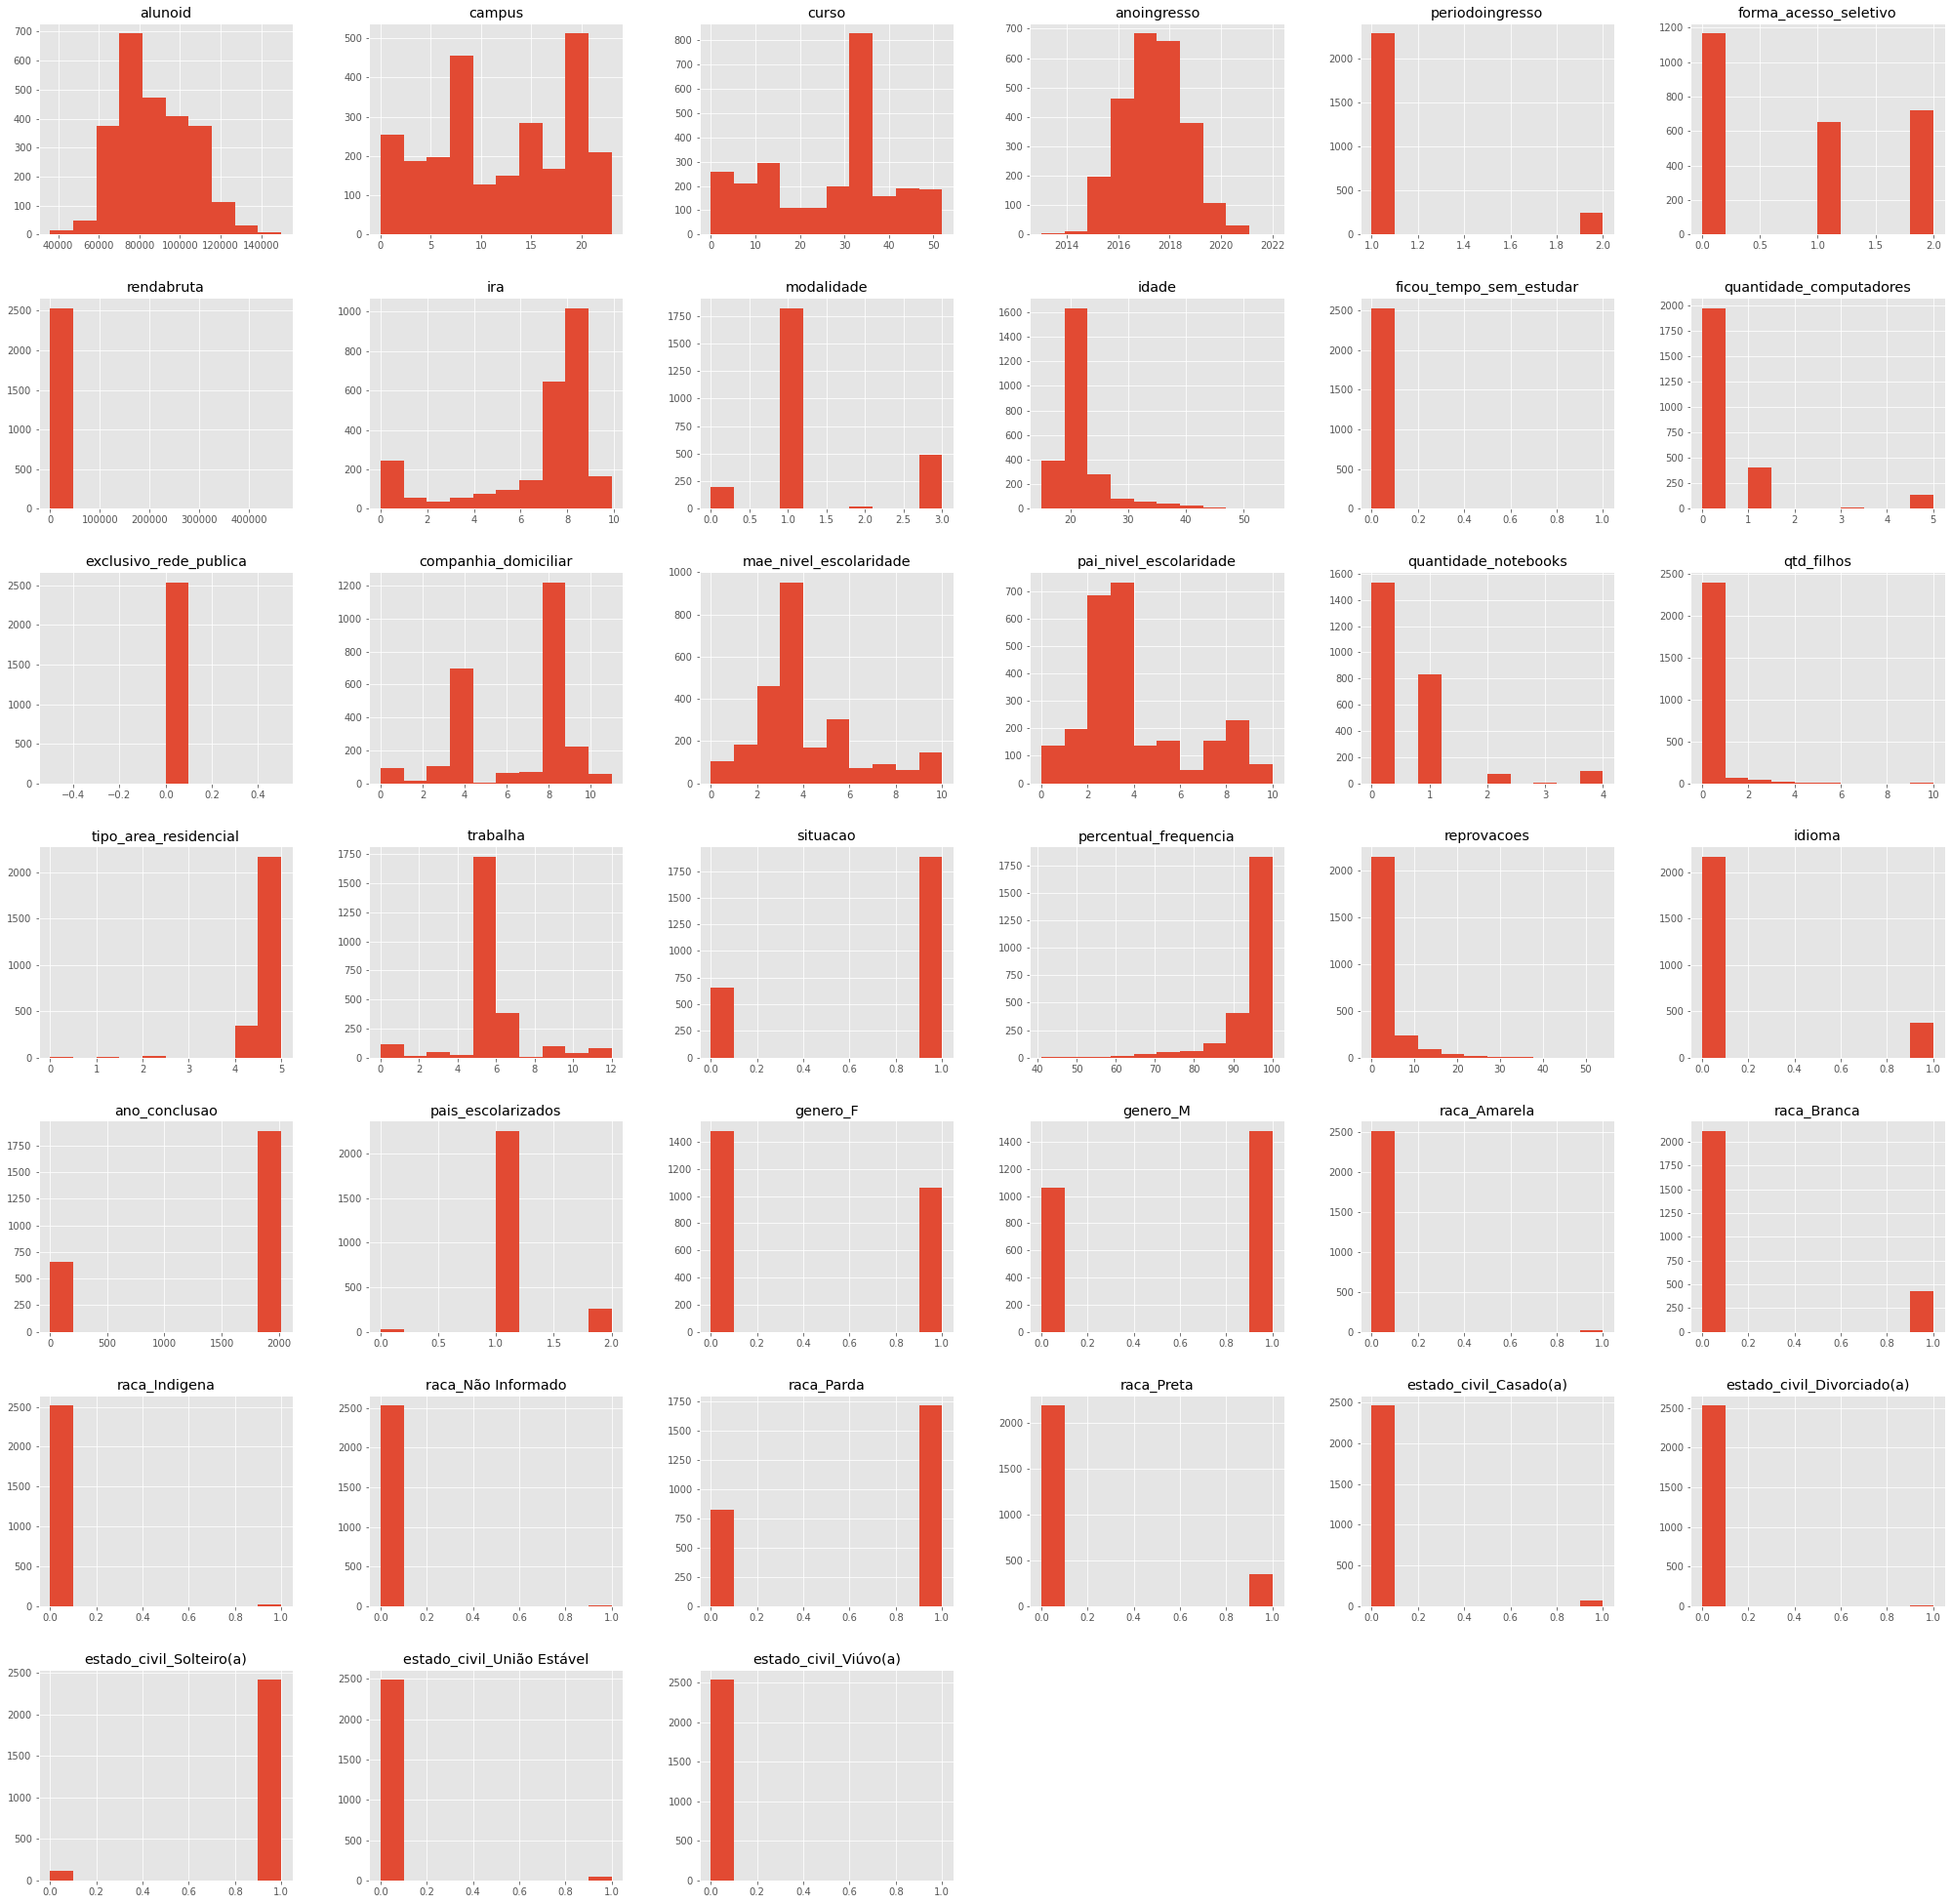

In [ ]:
_,ax = plt.subplots(figsize=(35,35))
dataset.hist(ax=ax)
plt.show();

<AxesSubplot:xlabel='idade', ylabel='Count'>

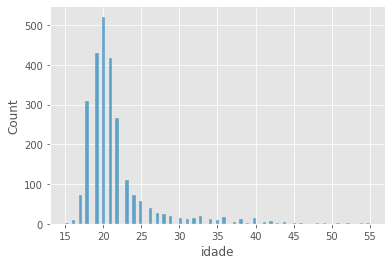

In [ ]:
sns.histplot(data=dataset, x=dataset.idade)

In [ ]:
dataset.anoingresso.value_counts().sort_values(ascending=False)

2017    683
2018    659
2016    462
2019    380
2015    197
2020    108
2021     32
2014     12
2013      6
2022      2
Name: anoingresso, dtype: int64

In [ ]:
dataset.ano_conclusao.value_counts()

0       654
2021    513
2019    457
2020    279
2018    260
2022    241
2017    133
2016      2
2015      2
Name: ano_conclusao, dtype: int64

In [ ]:
dataset.rendabruta.value_counts().sort_values(ascending=False)

0.00       380
937.00      73
1000.00     67
800.00      64
600.00      51
          ... 
1000.45      1
4957.00      1
913.34       1
1817.00      1
4314.00      1
Name: rendabruta, Length: 820, dtype: int64

In [ ]:
# dataset.pais_escolarizados.value_counts()

### Método de Tukey (Boxplot)

Consiste em definir os limites inferior e superior a partir do interquartil (IQR) e dos primeiros (Q1) e terceiros (Q3) quartis.

In [ ]:
# for c in dataset.columns.to_list():
#   plt.figure(figsize=(10,10))
#   sns.boxplot(x=c, y='reprovacoes', data=dataset)

# plt.show()

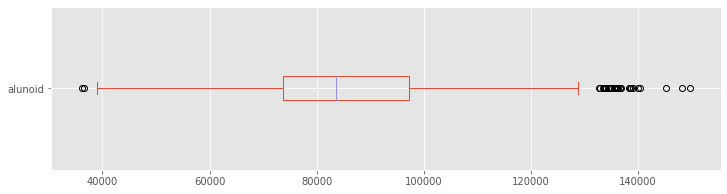

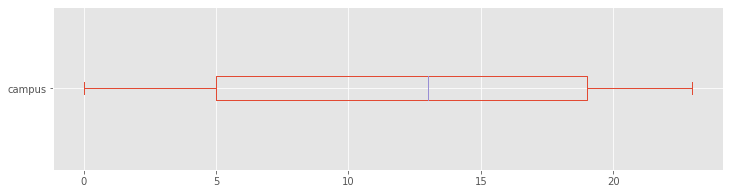

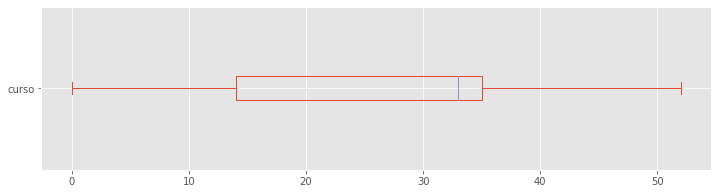

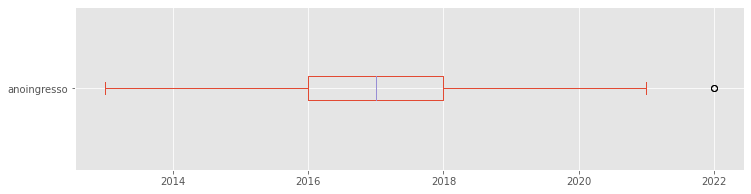

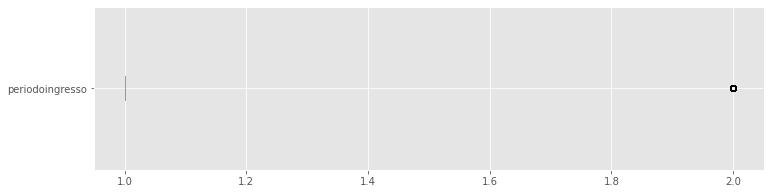

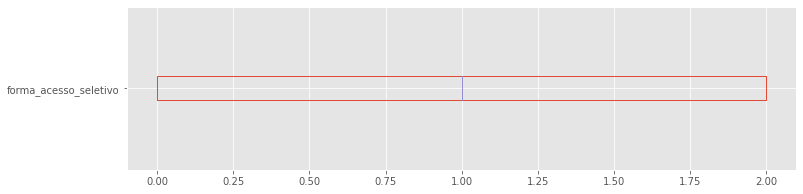

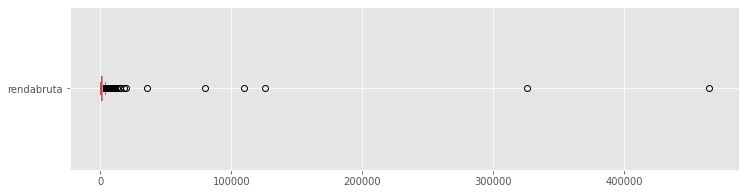

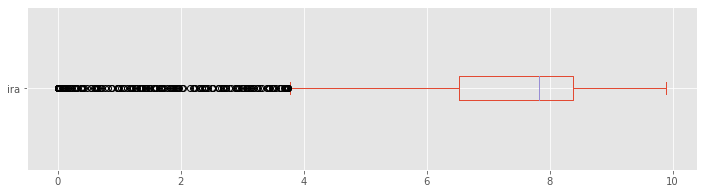

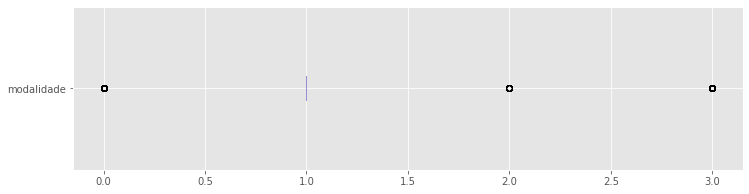

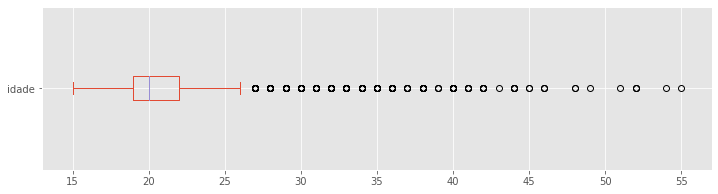

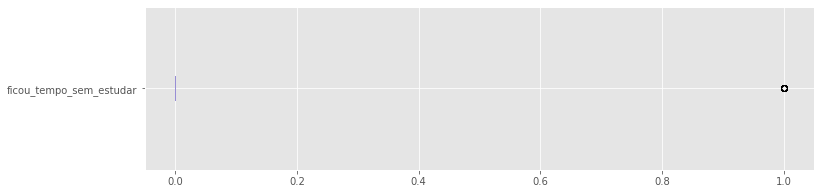

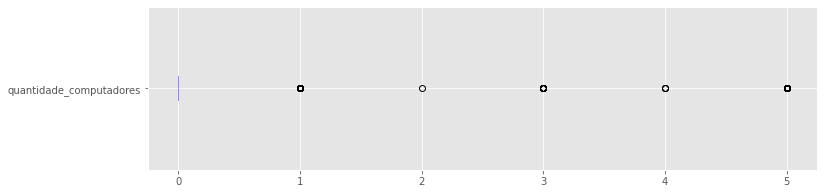

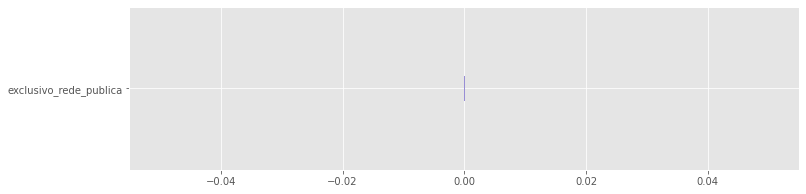

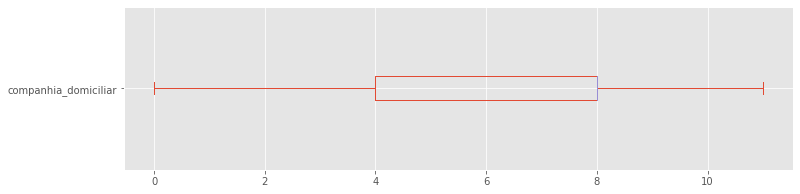

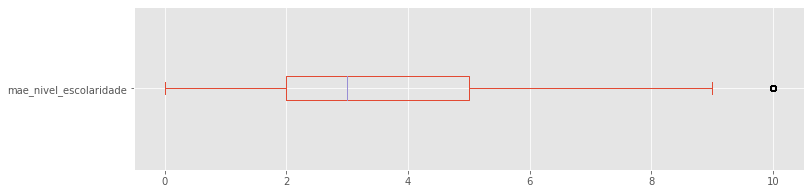

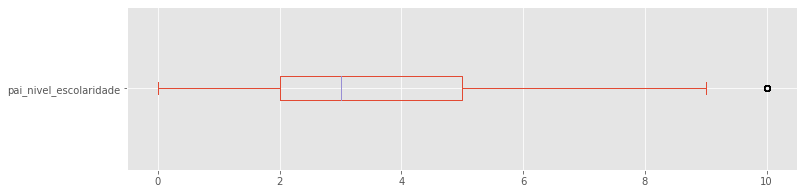

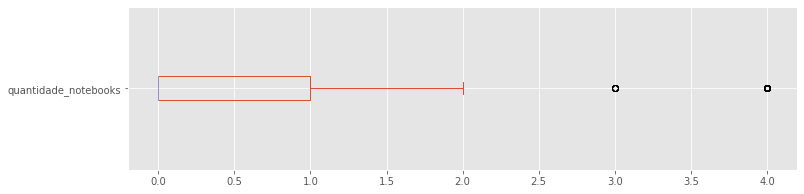

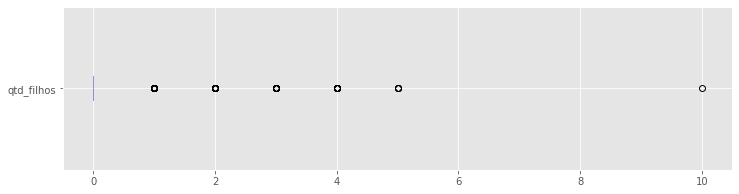

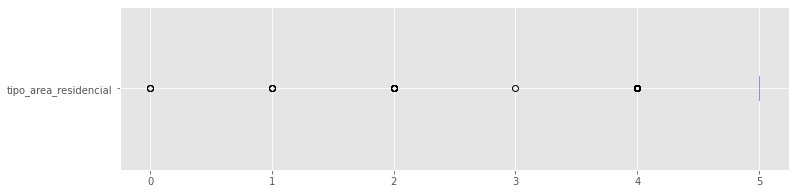

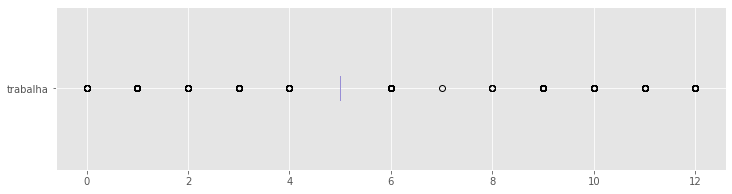

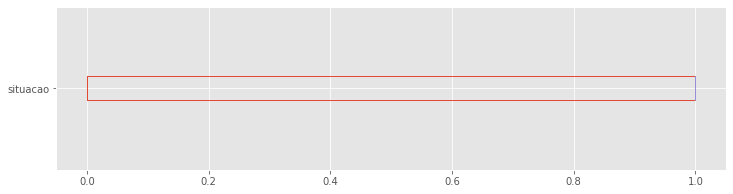

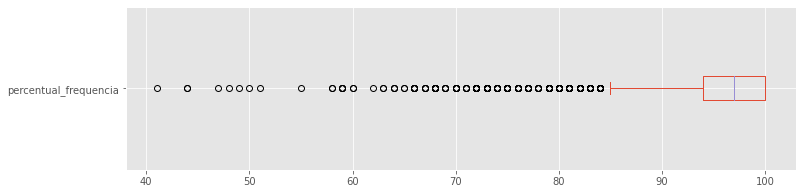

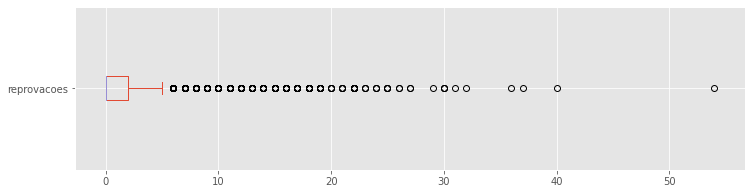

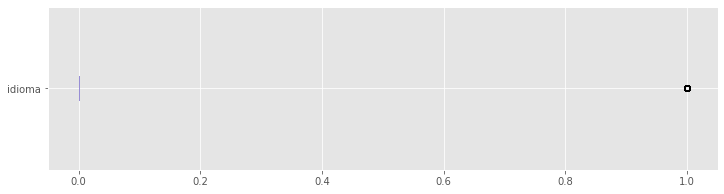

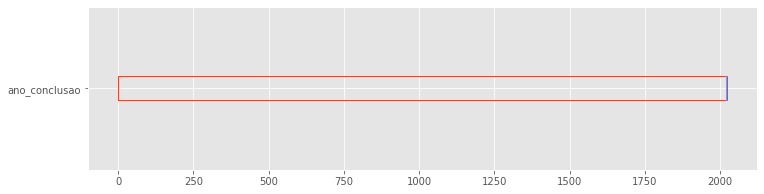

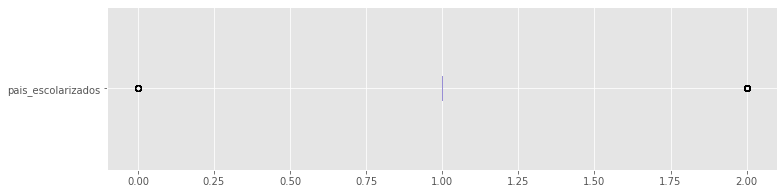

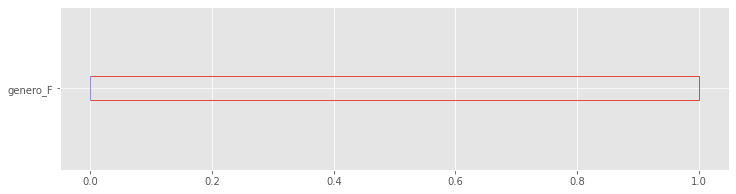

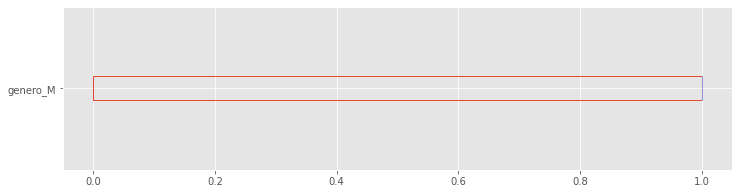

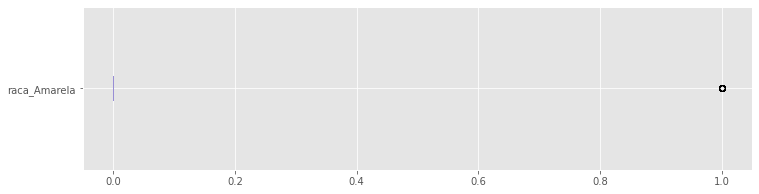

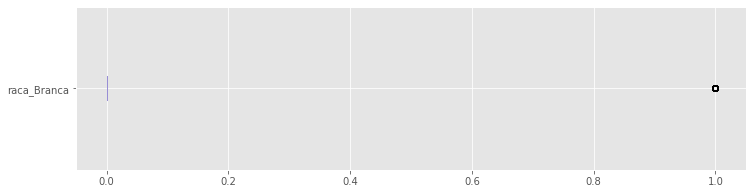

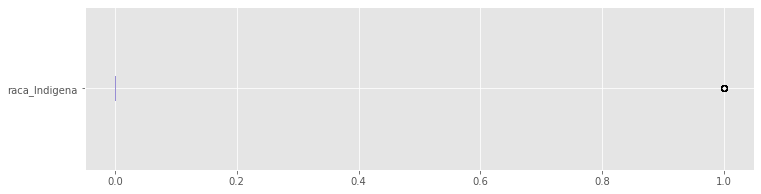

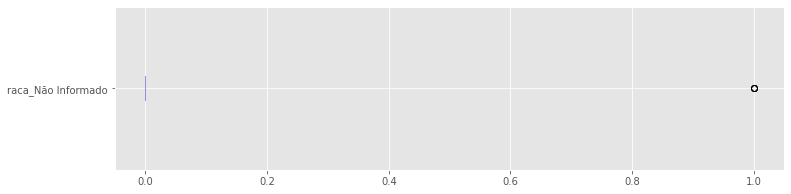

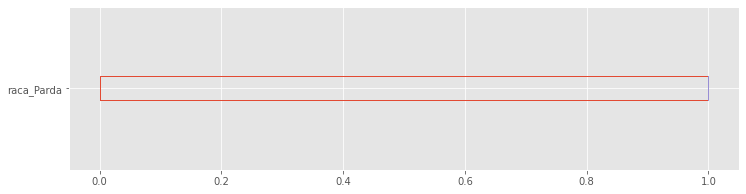

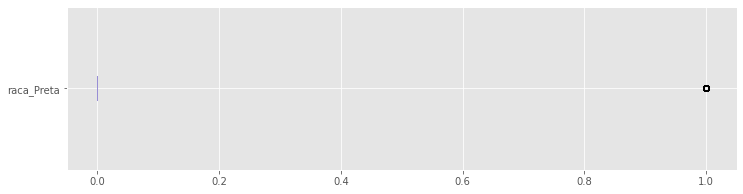

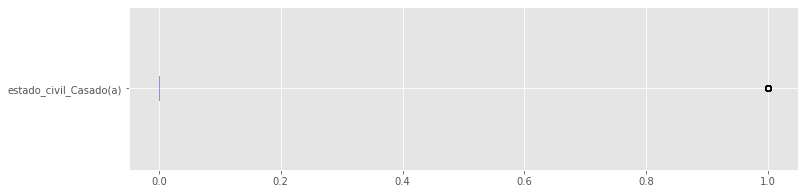

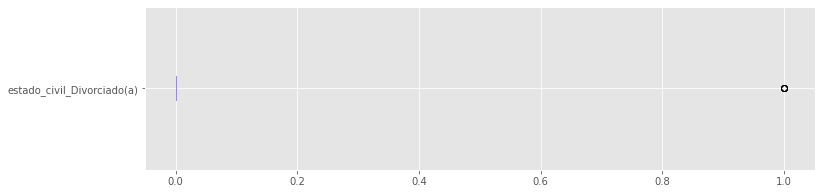

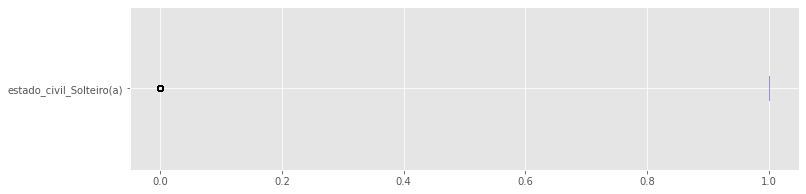

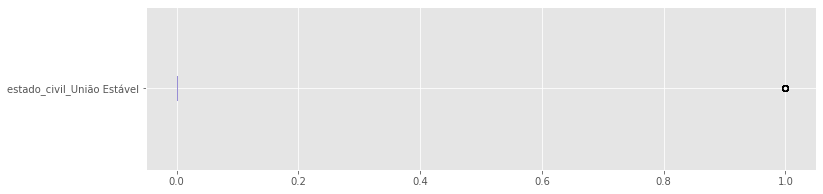

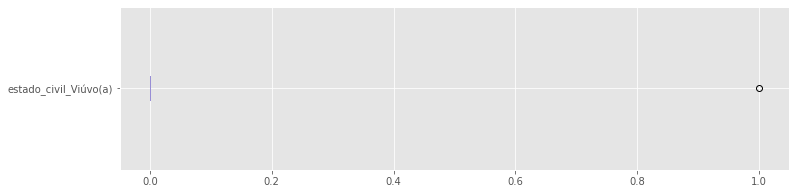

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the boxplot
for coluna in dataset.columns.tolist():
  fig, ax = plt.subplots(figsize = (12,3))
  dataset[coluna].plot(kind = 'box', vert = False)
plt.show()
plt.tight_layout()

In [ ]:
dataset.reprovacoes.value_counts()

0     1668
1      174
2      111
6      106
3       70
4       62
5       60
7       47
8       40
11      29
9       23
10      20
12      19
16      12
18      12
15      10
17      10
14       9
13       9
19       9
22       9
20       4
21       4
25       4
30       3
23       3
24       3
27       2
26       2
32       1
54       1
40       1
37       1
36       1
29       1
31       1
Name: reprovacoes, dtype: int64

In [ ]:
dataset.shape

(2541, 39)

#### Função para tratar outlier

Esta função tem o objetivo de tratar o problema de outilier das colunas do dataset. Para isso, segue a seguinte estratégia:

1 - cálculos dos percentis e limites superior e inferior

2 - para a efetivação do tratamento de outilier é verificado se os limites são diferentes

2.1 - caso sejam difentes, todos os valores da coluna que são maiores que o limite superior e menores que o limite inferior tem seus valores alterados para 0.

Após tratamento de outlier, o dataset foi reduzido a 42% dos dados originais, conforme a seguir:

total de instâncias do dataset antes do tratamento de outlier: 15084

total de instâncias do dataset depois do tratamento de outlier: 6427

In [ ]:
def plotar_grafico(coluna_antes_transformacao, coluna):
  # from numpy.lib.histograms import histogram 
  
  series1 = coluna_antes_transformacao 
  series2 = dataset[coluna] 

  plt.hist(series1, label=coluna + " antes" , alpha=.8, edgecolor='red') 
  plt.hist(series2, label=coluna + " depois", alpha=0.7, edgecolor='yellow') 
  plt.legend() 
  plt.show() 

  data = [series1, series2]
  fig, ax = plt.subplots()
  ax.set_title('Boxplot da coluna '+coluna+ ' antes e depois do tratamento de outlier')
  ax.boxplot(data)

  plt.show()

In [ ]:
def trata_outlier(coluna):
  # print(dataset[coluna].head(3))

  #Identify the outliers for the reprovacoes column
  q1 = dataset[coluna].quantile(.25)
  q3 = dataset[coluna].quantile(.75)
  IQR = q3 - q1

  # Setting the limits
  lim_sup = q3 + 1.5*IQR
  lim_inf = q1 - 1.5*IQR

  # Checking the output outliers for the reprovacoes 
  '''
  print("Limite superior: {}".format(lim_sup))
  print("Terceiro quartil: {}".format(q3))
  print("Primeiro quartil: {}".format(q1))
  print("Limite inferior: {}".format(lim_inf))

  # Checking the original dataset
  print("The dataset has {} columns,".format(dataset.shape[0]))
  # print("And {} of theses entries are above {},".format(len(dataset[df[coluna] > lim_sup]), lim_sup))
  # print("Represent {:.2f}% the dataset.\n".format((len(dataset[dataset[coluna] > lim_sup]) / dataset.shape[0])*100))
  print("Through the boxplot below, you can see how the data is dispersed: ")
  '''
  
  return lim_sup, lim_inf

coluna: alunoid
coluna não modificada.


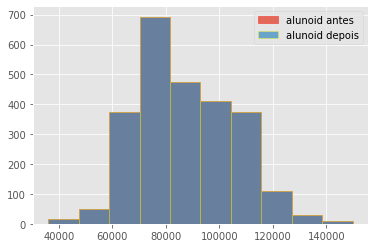

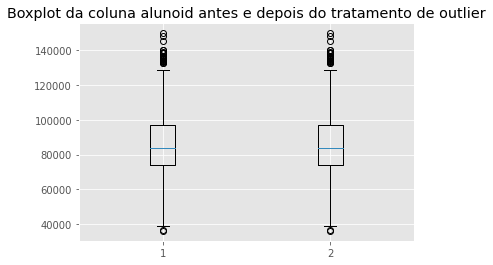


coluna: campus


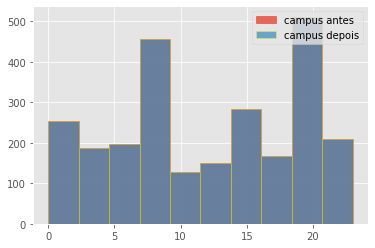

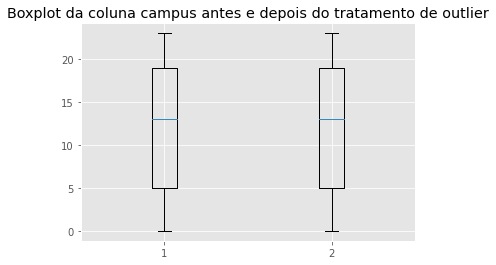


coluna: curso


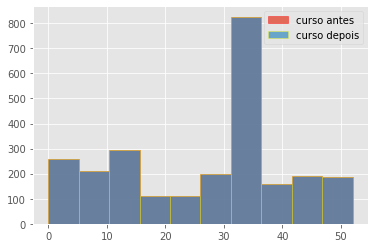

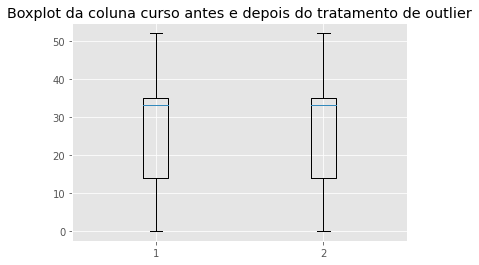


coluna: anoingresso
coluna não modificada.


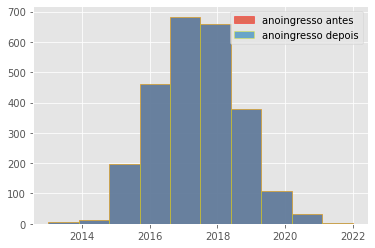

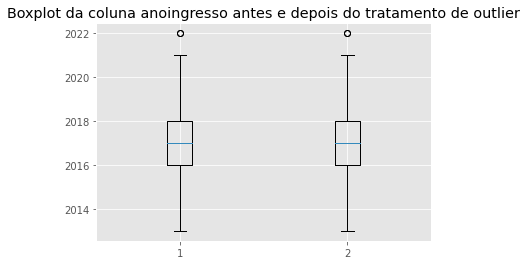


coluna: periodoingresso
coluna não modificada.


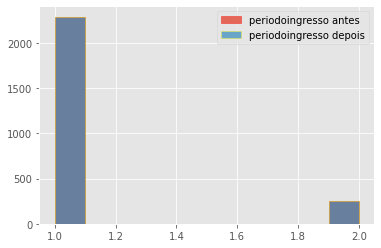

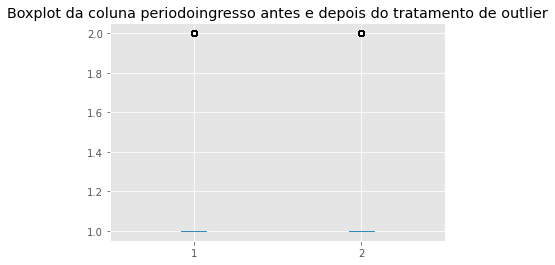


coluna: forma_acesso_seletivo
coluna não modificada.


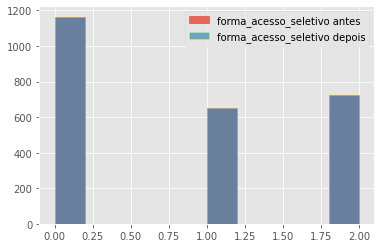

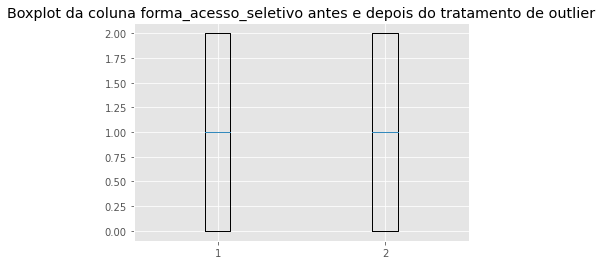


coluna: rendabruta


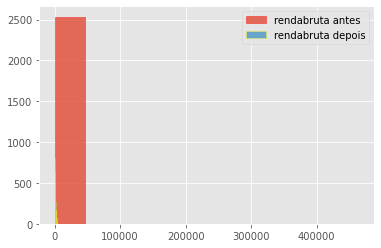

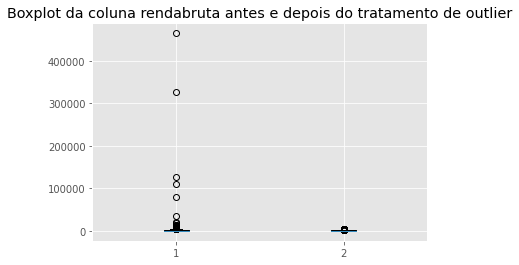


coluna: ira
coluna não modificada.


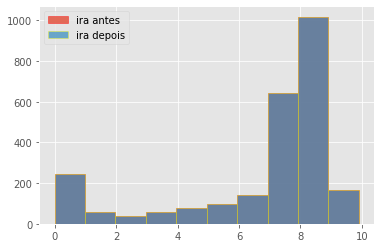

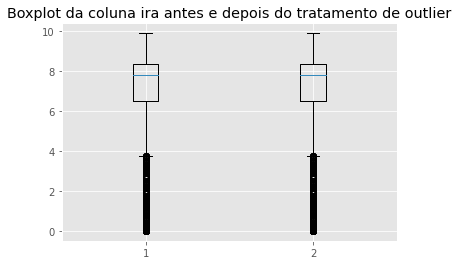


coluna: modalidade


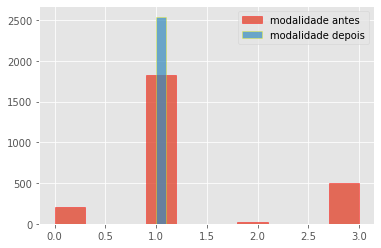

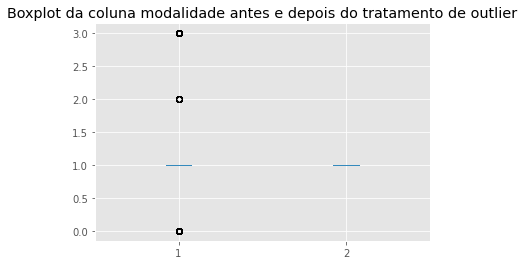


coluna: idade


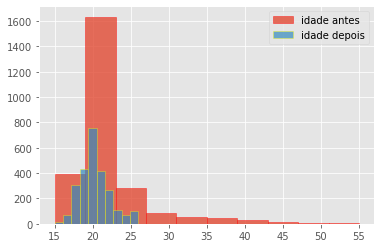

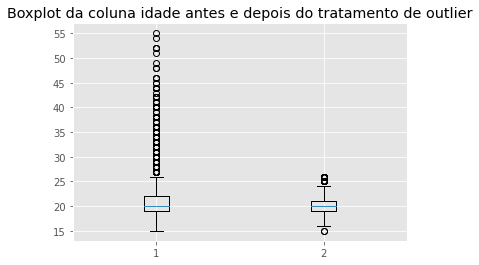


coluna: ficou_tempo_sem_estudar


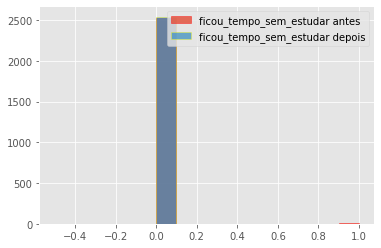

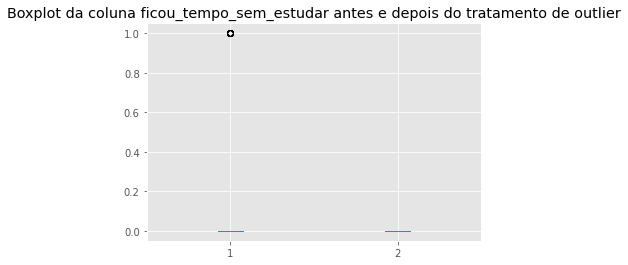


coluna: quantidade_computadores


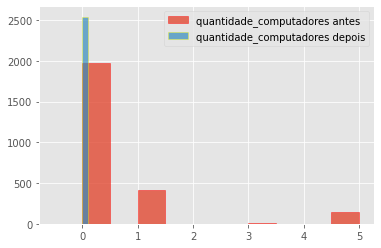

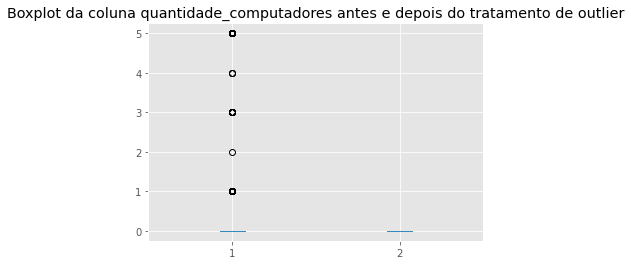


coluna: exclusivo_rede_publica


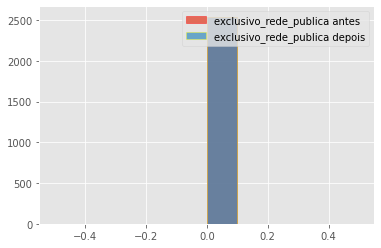

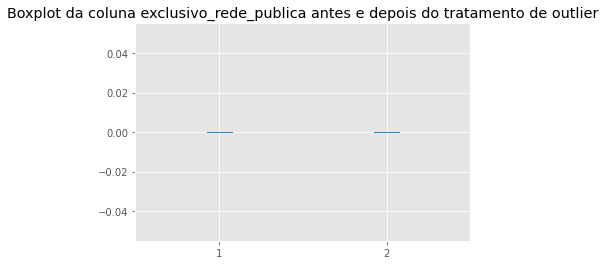


coluna: companhia_domiciliar
coluna não modificada.


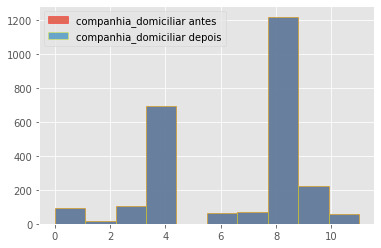

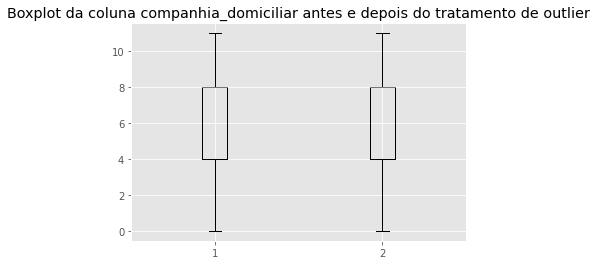


coluna: mae_nivel_escolaridade


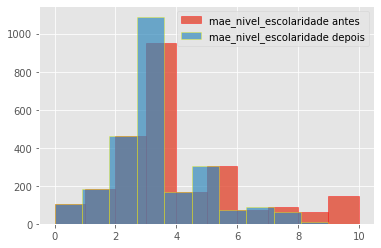

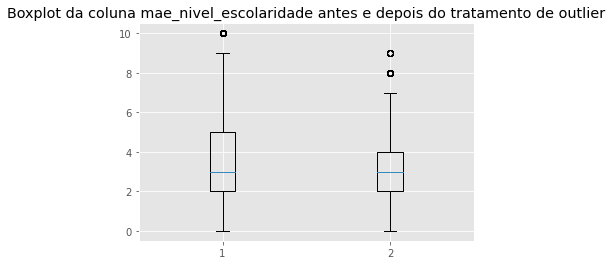


coluna: pai_nivel_escolaridade


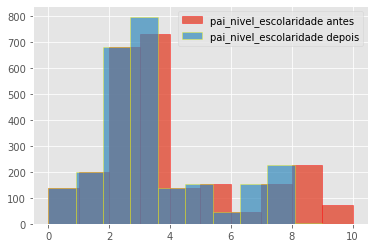

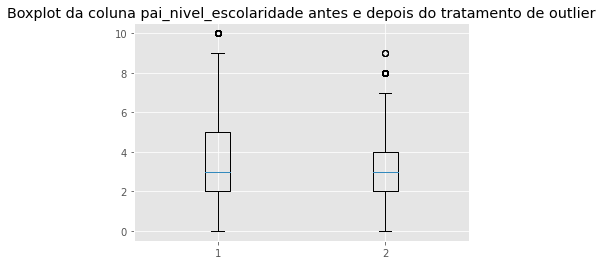


coluna: quantidade_notebooks


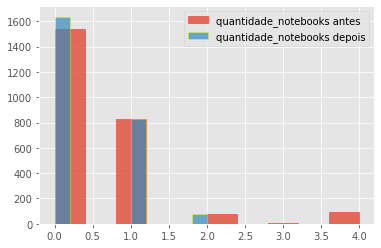

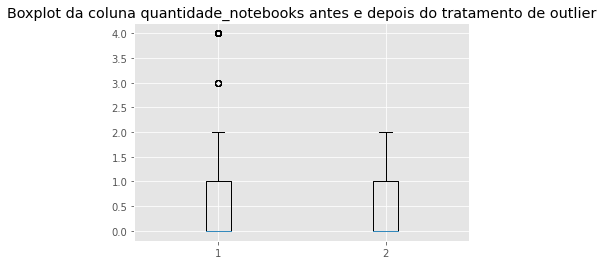


coluna: qtd_filhos


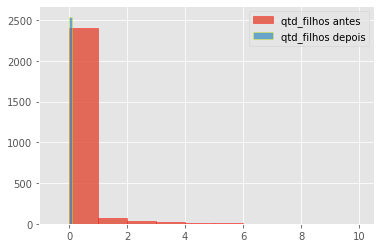

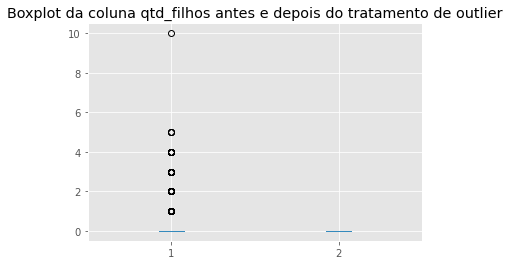


coluna: tipo_area_residencial


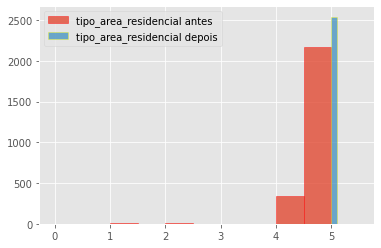

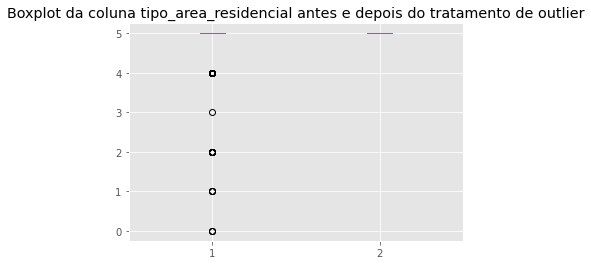


coluna: trabalha


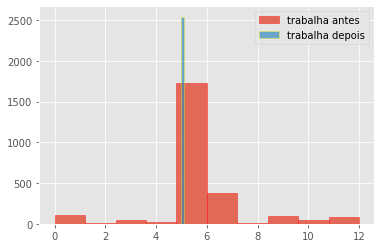

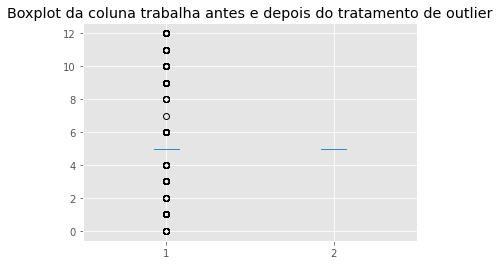


coluna: situacao
coluna não modificada.


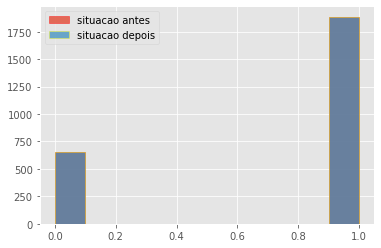

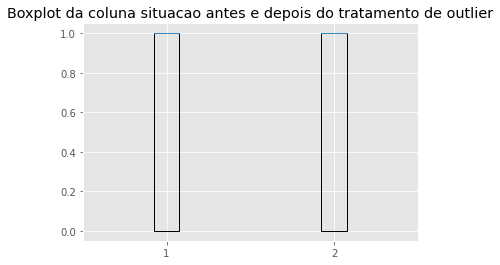


coluna: percentual_frequencia


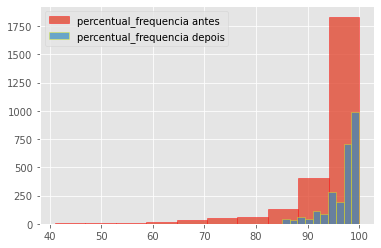

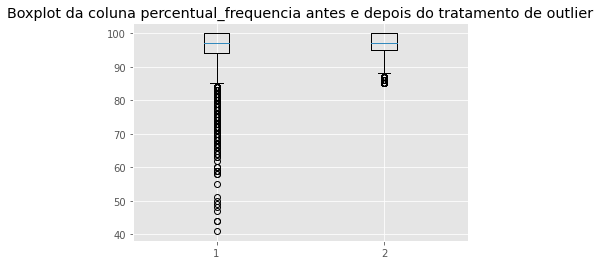


coluna: reprovacoes


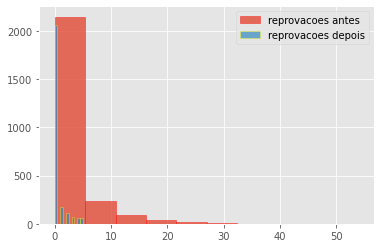

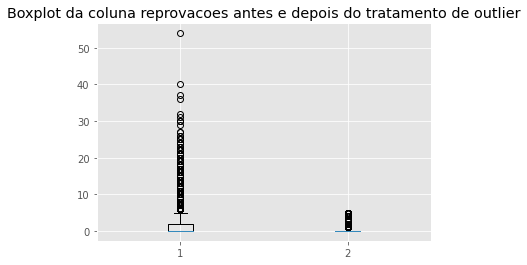


coluna: idioma
coluna não modificada.


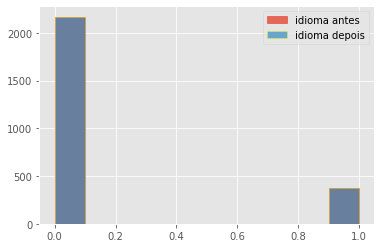

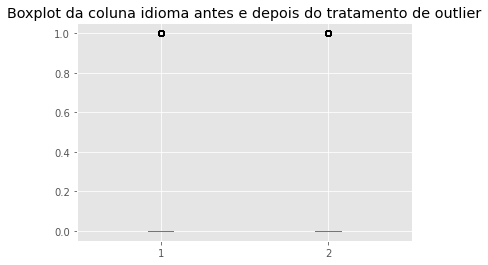


coluna: ano_conclusao


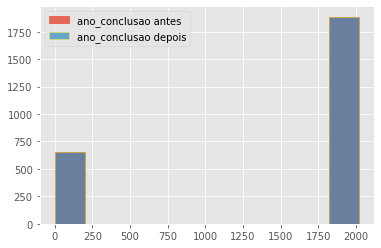

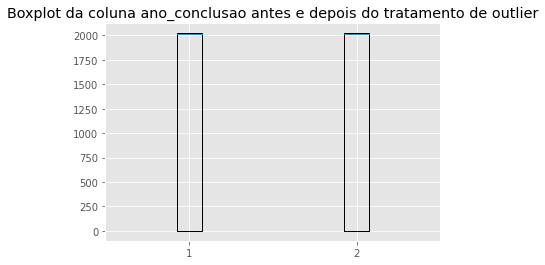


coluna: pais_escolarizados


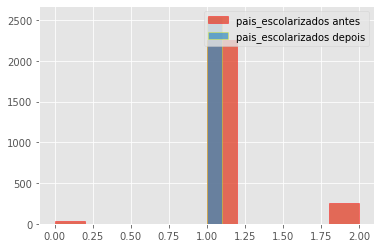

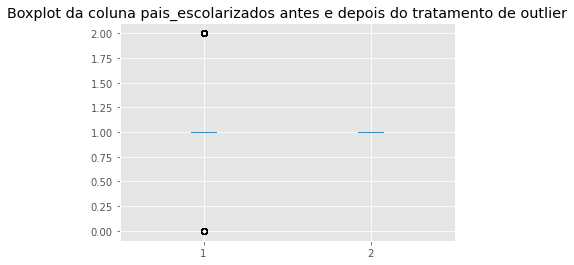


coluna: genero_F


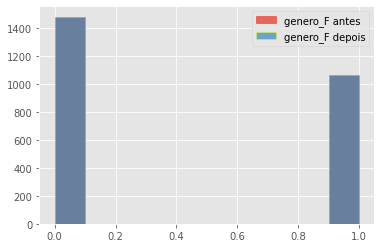

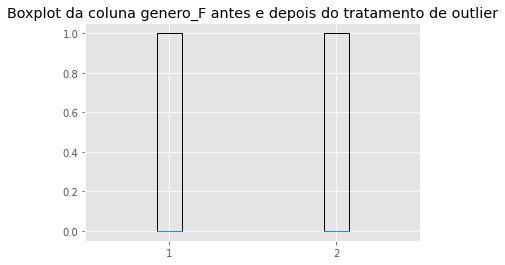


coluna: genero_M


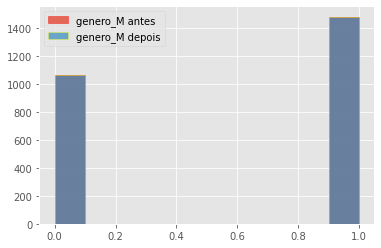

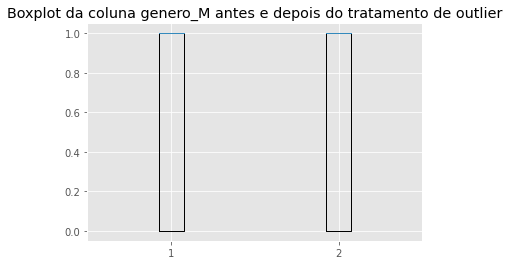


coluna: raca_Amarela


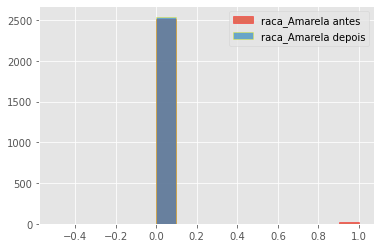

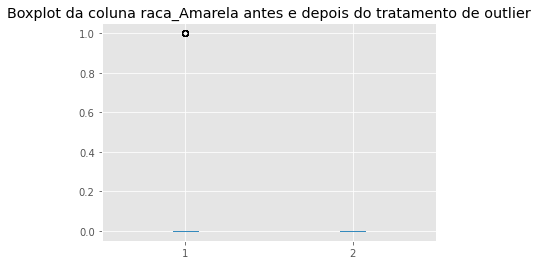


coluna: raca_Branca


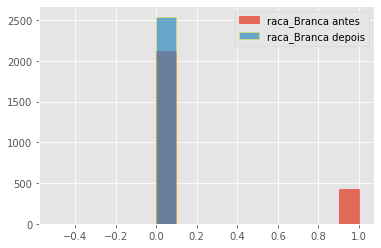

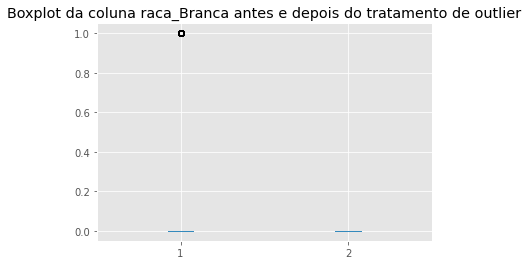


coluna: raca_Indigena


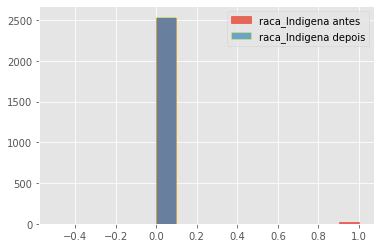

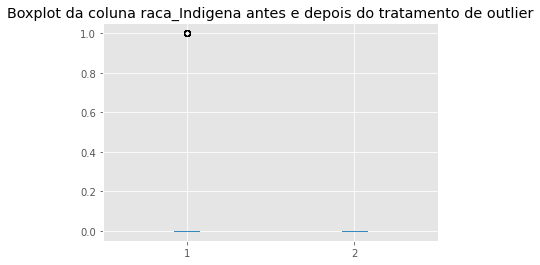


coluna: raca_Não Informado


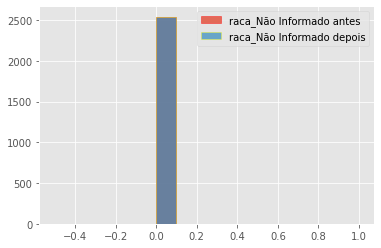

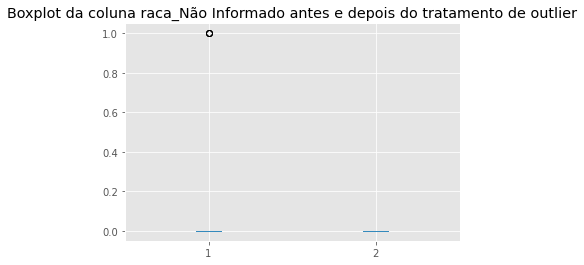


coluna: raca_Parda


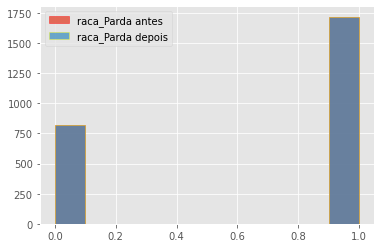

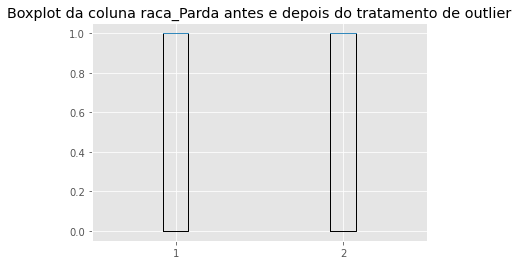


coluna: raca_Preta


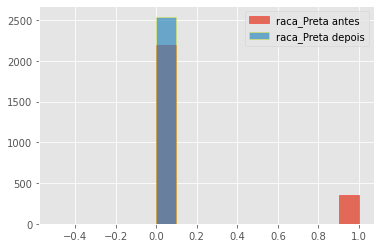

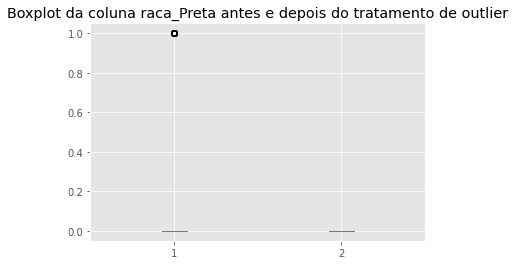


coluna: estado_civil_Casado(a)


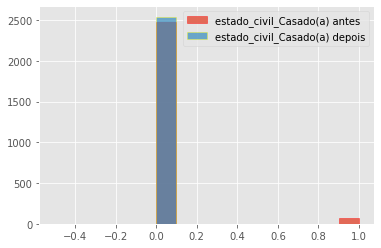

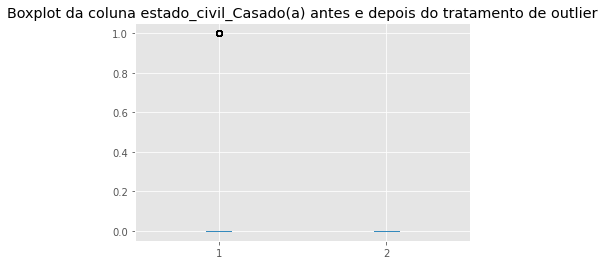


coluna: estado_civil_Divorciado(a)


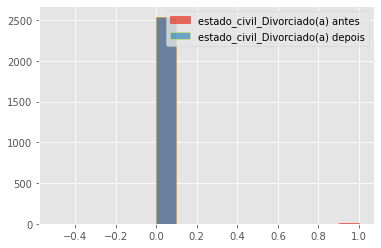

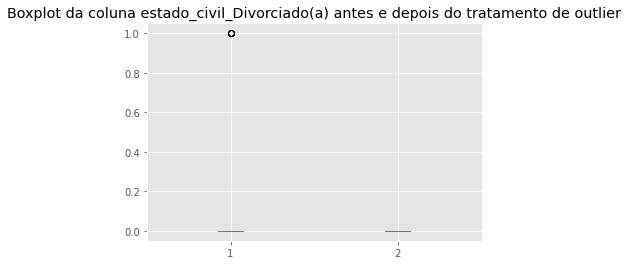


coluna: estado_civil_Solteiro(a)


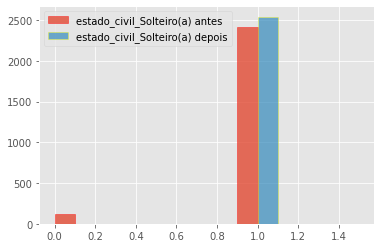

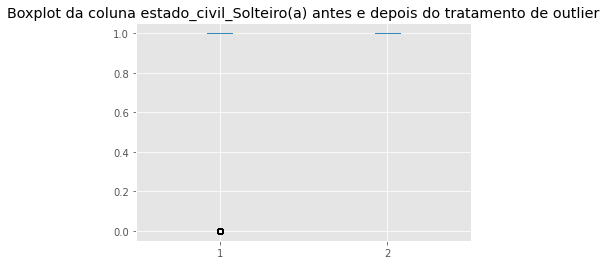


coluna: estado_civil_União Estável


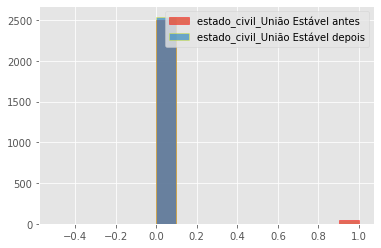

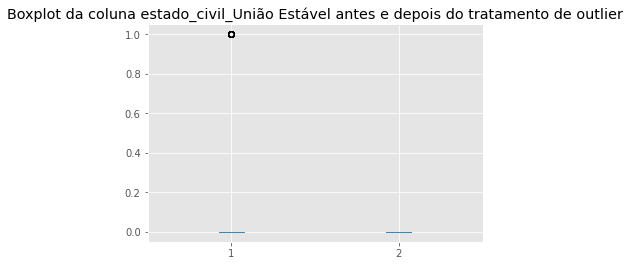


coluna: estado_civil_Viúvo(a)


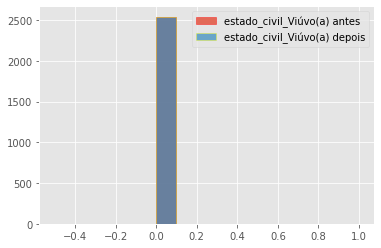

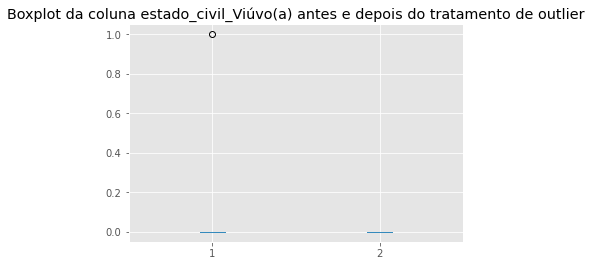

In [ ]:
for coluna in dataset.columns.tolist():
  print("coluna: {}".format(coluna))
  coluna_antes_transformacao = dataset[coluna].copy()

  if coluna in ['alunoid','ira','situacao', 'anoingresso', 'periodoingresso', 'forma_acesso_seletivo', 'companhia_domiciliar', 'idioma']:
    print("coluna não modificada.")
  else:    
    lim_sup, lim_inf = trata_outlier(coluna)    
    # if lim_sup != lim_inf:
    # Removing the outliers
    # dataset.drop(dataset[dataset[coluna] > lim_sup].index,axis =0, inplace = True)
    # dataset.drop(dataset[dataset[coluna] < lim_inf].index,axis =0, inplace = True)

    mediana_coluna = dataset[coluna].median()
    # dataset.loc[dataset.raca == "branca","raca"]="Branca" # exemplo
    dataset.loc[dataset[coluna] > lim_sup, coluna] = mediana_coluna
    dataset.loc[dataset[coluna] < lim_inf, coluna] = mediana_coluna
    # else:
    #   print("dataset não modificado.")

  plotar_grafico(coluna_antes_transformacao, coluna)
  print()

In [ ]:
dataset.campus.describe().T

count    2541.000000
mean       12.085793
std         6.771155
min         0.000000
25%         5.000000
50%        13.000000
75%        19.000000
max        23.000000
Name: campus, dtype: float64

In [ ]:
dataset.shape

(2541, 39)

## Parte 4 - Padronização de escala numérica dos dados


In [ ]:
from sklearn.preprocessing import StandardScaler

def scale(colunas_numericas):
    num_values = list(colunas_numericas)

    scaler = StandardScaler()
    scaler.fit(dataset[num_values])
    dataset[num_values] = scaler.transform(dataset[num_values])
    
    return dataset


# colunas_numericas = [var for var in dataset if (dataset[var].dtype=='int64') | (dataset[var].dtype=='float64')]
# print(colunas_numericas)

# print(dataset[colunas_numericas].head(10))
dataset = scale(dataset.columns.tolist())
# print(dataset[colunas_numericas].head(10))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.9/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.9/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
dataset.sample(10)

alunoid    campus     curso  anoingresso  periodoingresso  \
1189  0.026879  0.578185  0.354605    -0.276300        -0.332531   
1774  1.058546 -0.455816  1.400798     1.178784        -0.332531   
1290 -0.444299 -1.489816  0.912575    -0.276300        -0.332531   
1731 -0.493143  1.021328  1.191560    -0.276300         3.007238   
2519 -0.427149  1.021328  1.679783    -0.276300         3.007238   
1577 -1.588652  0.873613 -0.552096    -1.731384        -0.332531   
1773 -0.908288 -1.489816  0.912575    -1.003842        -0.332531   
1770 -0.381475  1.021328  1.261306    -0.276300        -0.332531   
2359  1.076997 -1.489816 -0.063872     1.178784        -0.332531   
1276 -0.821467  1.021328  1.679783    -1.003842         3.007238   

      forma_acesso_seletivo  rendabruta       ira  modalidade     idade  ...  \
1189              -0.978446    0.142448  0.553950         0.0 -0.169174  ...   
1774              -0.978446    1.196941  0.705822         0.0 -0.169174  ...   
1290              -0.978446   -0.337792  0.361332         0.0  0.367495  ...   
1731              -0.978446   -0.072695  0.731751         0.0  0.367495  ...   
2519               1.390522   -1.227124 -2.350139         0.0  3.050840  ...   
1577               1.390522    1.320177  0.916961         0.0  0.367495  ...   
1773               1.390522   -0.528363  0.387261         0.0  0.367495  ...   
1770              -0.978446   -0.490249  0.750272         0.0 -0.169174  ...   
2359              -0.978446   -0.464839 -0.586942         0.0  0.904164  ...   
1276               1.390522    0.697721 -0.123918         0.0  0.904164  ...   

      raca_Branca  raca_Indigena  raca_Não Informado  raca_Parda  raca_Preta  \
1189          0.0            0.0                 0.0    0.692131         0.0   
1774          0.0            0.0                 0.0   -1.444813         0.0   
1290          0.0            0.0                 0.0   -1.444813         0.0   
1731          0.0            0.0                 0.0    0.692131         0.0   
2519          0.0            0.0                 0.0    0.692131         0.0   
1577          0.0            0.0                 0.0   -1.444813         0.0   
1773          0.0            0.0                 0.0   -1.444813         0.0   
1770          0.0            0.0                 0.0    0.692131         0.0   
2359          0.0            0.0                 0.0   -1.444813         0.0   
1276          0.0            0.0                 0.0    0.692131         0.0   

      estado_civil_Casado(a)  estado_civil_Divorciado(a)  \
1189                     0.0                         0.0   
1774                     0.0                         0.0   
1290                     0.0                         0.0   
1731                     0.0                         0.0   
2519                     0.0                         0.0   
1577                     0.0                         0.0   
1773                     0.0                         0.0   
1770                     0.0                         0.0   
2359                     0.0                         0.0   
1276                     0.0                         0.0   

      estado_civil_Solteiro(a)  estado_civil_União Estável  \
1189                       0.0                         0.0   
1774                       0.0                         0.0   
1290                       0.0                         0.0   
1731                       0.0                         0.0   
2519                       0.0                         0.0   
1577                       0.0                         0.0   
1773                       0.0                         0.0   
1770                       0.0                         0.0   
2359                       0.0                         0.0   
1276                       0.0                         0.0   

      estado_civil_Viúvo(a)  
1189                    0.0  
1774                    0.0  
1290                    0.0  
1731                    0.0  
25

## Salvando o dataset após tratamento de outliers

In [ ]:
dataset.to_csv(path_dataset+"16012023_dataset_transformado_outilier_numerico.csv")

# 2. Outra abordagem de Preprocessamento

1. Preencher os valores nulos
2. Normalizar e padronizar os valores numéricos
3. Codificar os valores categóricos utilizando One-Hot Encoding

## Leitura da base de dados originais

In [ ]:
import pandas as pd

In [ ]:
# carregando o dataset
# df = pd.read_csv("./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/suap/dados_alunos_MD_20190409_223041.csv")
df = pd.read_csv("./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/suap/23062022/dados_caracterizacaosocial.csv")

df.shape

FileNotFoundError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48311 entries, 0 to 48310
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   alunoid                     48311 non-null  int64  
 1   campus                      48311 non-null  object 
 2   curso                       48311 non-null  object 
 3   anoingresso                 48311 non-null  int64  
 4   periodoingresso             48311 non-null  int64  
 5   dataconclusao               12925 non-null  object 
 6   forma_acesso_seletivo       42288 non-null  object 
 7   rendabruta                  48311 non-null  float64
 8   ira                         48311 non-null  float64
 9   modalidade                  48311 non-null  object 
 10  genero                      48311 non-null  object 
 11  raca                        48311 non-null  object 
 12  idade                       48311 non-null  int64  
 13  ficou_tempo_sem_estudar     483

### Um teste sem sucesso

In [ ]:
# colunas_numericas = [var for var in df if (df[var].dtype=='int64') | (df[var].dtype=='float64')]

In [ ]:
# df_numerico = df[colunas_numericas + ['situacao']].copy()

In [ ]:
# df_numerico.info()

In [ ]:
# df_numerico.situacao.value_counts()

In [ ]:
# query = ['Concluído','Formado']
# formados = df_numerico[df_numerico['situacao'].isin(query)]
# formados.replace(['Concluído','Formado'], "Concluído", inplace=True)

# query = ['Evasão','Cancelado','Cancelamento Compulsório','Jubilado','Transferido Externo']
# evadidos = df_numerico[df_numerico['situacao'].isin(query)]

# evadidos.replace(['Evasão','Cancelado','Cancelamento Compulsório','Jubilado','Transferido Externo'], "Evadido", inplace=True)

# dataset = pd.concat([formados, evadidos])

In [ ]:
# dataset.situacao.value_counts()

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# label = LabelEncoder()
# dataset['situacao'] = label.fit_transform(dataset['situacao'].astype(str))

In [ ]:
# dataset.situacao.value_counts()

In [ ]:
# dataset.isnull().sum()

In [ ]:
# dataset.drop(['pontuacao_seletivo'], axis=1, inplace=True)

In [ ]:
# # recuperando as colunas com valores nulos
# colunas_com_nulos = [var for var in dataset.columns if (dataset[var].isnull().any())]

# # verificando o tipo das colunas com valores nulos
# for coluna in colunas_com_nulos:
#   print('{}: {}'.format(coluna, dataset[coluna].dtype))

In [ ]:
# from sklearn.impute import SimpleImputer

# def fill_na(colunas_com_nulos, strategy='median'):
#     # preenchendo nulos pela mediana (para valores numéricos)
#     colunas_numericas_com_nulos = [var for var in colunas_com_nulos if (dataset[var].dtype=='int64') | (dataset[var].dtype=='float64')]

#     num_values = list(colunas_numericas_com_nulos)

#     imputer = SimpleImputer(strategy=strategy)
#     imputer.fit(dataset[num_values])
#     dataset[num_values] = imputer.transform(dataset[num_values])
#     # imputer.transform(dataset[num_values])

# fill_na(dataset[colunas_com_nulos])

In [ ]:
# dataset.isnull().sum()

In [ ]:
path_dataset = "./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/suap/23062022/"

## Remoção da coluna 'exclusivo_rede_publica'

A coluna 'exclusivo_rede_publica' apresenta todos os seus valores iguais a 0. Logo, não tem nenhum efeito relevante no entendimento dos dados.

In [ ]:
df.exclusivo_rede_publica.value_counts()

False    48311
Name: exclusivo_rede_publica, dtype: int64

In [ ]:
df.drop('exclusivo_rede_publica', axis=1, inplace=True)

In [ ]:
df.shape

(48311, 29)

## Removendo colunas com % de nulos acima de 98%

Colunas com % acima de 98% de nulos:

**pontuacao_seletivo           100.000000**

**razao_ausencia_educacional:  98.940200**

As colunas listas são as mais críticas, pois elas possuem menos de 2% de dados preenchidos e essas informações podem não ser muito úteis. Nesse caso, vamos simplesmente removê-las de nossos dados.

In [ ]:
df.isnull().sum().sort_values(ascending=False)

pontuacao_seletivo            48311
razao_ausencia_educacional    47799
dataconclusao                 35386
forma_acesso_seletivo          6023
quantidade_computadores        5120
quantidade_notebooks           4209
companhia_domiciliar              0
reprovacoes                       0
percentual_frequencia             0
situacao                          0
trabalha                          0
tipo_area_residencial             0
qtd_filhos                        0
estado_civil                      0
pai_nivel_escolaridade            0
mae_nivel_escolaridade            0
alunoid                           0
campus                            0
ficou_tempo_sem_estudar           0
idade                             0
raca                              0
genero                            0
modalidade                        0
ira                               0
rendabruta                        0
periodoingresso                   0
anoingresso                       0
curso                       

In [ ]:
# identificando colunas com valores nulos
percentual_nulos = dataset.isnull().sum().sort_values(ascending=False) / dataset.shape[0] * 100
print(percentual_nulos)

alunoid                       0.0
raca_Indigena                 0.0
situacao                      0.0
percentual_frequencia         0.0
reprovacoes                   0.0
idioma                        0.0
genero_F                      0.0
genero_M                      0.0
raca_Amarela                  0.0
raca_Branca                   0.0
raca_Não Informado            0.0
campus                        0.0
raca_Não declarado            0.0
raca_Parda                    0.0
raca_Preta                    0.0
estado_civil_Casado(a)        0.0
estado_civil_Divorciado(a)    0.0
estado_civil_Não declarado    0.0
estado_civil_Solteiro(a)      0.0
estado_civil_União Estável    0.0
trabalha                      0.0
tipo_area_residencial         0.0
qtd_filhos                    0.0
estado_civil                  0.0
curso                         0.0
anoingresso                   0.0
periodoingresso               0.0
dataconclusao                 0.0
forma_acesso_seletivo         0.0
rendabruta    

In [ ]:
## Cria um novo dataframe (df_train2) sem a coluna Cabin
df.drop(['pontuacao_seletivo','razao_ausencia_educacional'], axis=1, inplace=True)

In [ ]:
df.shape

(48311, 27)

## Definindo o dataset contendo apenas dados de cursos técnicos

Com este filtro por linhas, o dataset fica com, aproximandamente, 75% de instâncias em relação ao dataset com dados originais.

Tamanho dataset original: 48311

Tamanho dataset filtrado por linha: 36273

In [ ]:
filtro1 = df['modalidade'] == 'Concomitante'  # 1,5 anos para conclusão
filtro2 = df['modalidade'] == 'Integrado'     # 3 anos para conclusão
filtro3 = df['modalidade'] == 'Integrado EJA' # 3 anos para conclusão
filtro4 = df['modalidade'] == 'Subsequente'   # 1,5 anos para conclusão

tam = df.shape[0]

dataset = df[filtro1 | filtro2 | filtro3 | filtro4]
print(dataset.modalidade.value_counts())
dataset.shape

Integrado        23736
Subsequente       8780
Concomitante      2120
Integrado EJA     1637
Name: modalidade, dtype: int64


(36273, 27)

In [ ]:
print(dataset.situacao.value_counts())
dataset.shape

Matriculado                        19741
Concluído                          11703
Evasão                              1760
Transferido Externo                  791
Trancado Voluntariamente             686
Cancelado                            446
Trancada                             372
Cancelamento Compulsório             346
Transferido Interno                  118
Concludente                          112
Matrícula Vínculo Institucional       94
Jubilado                              38
Estagiario (concludente)              27
Cancelamento por Duplicidade          20
Afastado                               9
Cancelamento por Desligamento          9
Falecido                               1
Name: situacao, dtype: int64


(36273, 27)

## Definindo a coluna alvo 'situacao' para conter valores apenas 'evadido' e 'formado'

Com este filtro, por linha, novamente, o número de instâncias do dataset será reduzido a 41,6% de instâncias em relação ao dataset com dados originais, aproximadamente.

Tamanho dataset original: 36273

Tamanho dataset filtrado por linha: 

In [ ]:
query = ['Concluído','Formado']
formados = dataset[dataset['situacao'].isin(query)]
formados.replace(['Concluído','Formado'], "Concluído", inplace=True)

query = ['Evasão','Cancelado','Cancelamento Compulsório','Jubilado','Transferido Externo']
evadidos = dataset[dataset['situacao'].isin(query)]

evadidos.replace(['Evasão','Cancelado','Cancelamento Compulsório','Jubilado','Transferido Externo'], "Evadido", inplace=True)

dataset = pd.concat([formados, evadidos])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [ ]:
print(dataset.situacao.value_counts())
dataset.shape

Concluído    11703
Evadido       3381
Name: situacao, dtype: int64


(15084, 27)

## Alterando valores da coluna ***'raca'***

Antes da aplicação do método One-Hot Encoding, será feita uma transformação na coluna raça, que apresenta textos com escrita diferentes para valores iguais, conforme contagem do comando abaixo.


In [ ]:
# contando valores da coluna 'raca'
dataset.raca.value_counts()

Parda            10284
Branca            2186
Preta             2169
PARDA              144
Amarela            131
Indígena            90
PRETA               46
BRANCA              24
NAO INFORMADO        5
Não declarado        2
AMARELA              2
INDIGENA             1
Name: raca, dtype: int64

In [ ]:
# Alterando valores da coluna 'raca'
dataset.loc[dataset.raca == "branca","raca"]="Branca"
dataset.loc[dataset.raca == "BRANCA","raca"]="Branca"
dataset.loc[dataset.raca == "PARDA","raca"]="Parda"
dataset.loc[dataset.raca == "parda","raca"]="Parda"
dataset.loc[dataset.raca == "indígena","raca"]="Indigena"
dataset.loc[dataset.raca == "INDIGENA","raca"]="Indigena"
dataset.loc[dataset.raca == "Indígena","raca"]="Indigena"
dataset.loc[dataset.raca == "PRETA","raca"]="Preta"
dataset.loc[dataset.raca == "preta","raca"]="Preta"
dataset.loc[dataset.raca == "AMARELA","raca"]="Amarela"
dataset.loc[dataset.raca == "amarela","raca"]="Amarela"
dataset.loc[dataset.raca == "NAO INFORMADO","raca"]="Não Informado"

## 1. Preencher os valores nulos

In [ ]:
# identificando colunas com valores nulos
percentual_nulos = dataset.isnull().sum().sort_values(ascending=False) / dataset.shape[0] * 100
print(percentual_nulos)

forma_acesso_seletivo      24.794484
dataconclusao              22.440997
quantidade_computadores     6.172103
quantidade_notebooks        5.197560
alunoid                     0.000000
companhia_domiciliar        0.000000
reprovacoes                 0.000000
percentual_frequencia       0.000000
situacao                    0.000000
trabalha                    0.000000
tipo_area_residencial       0.000000
qtd_filhos                  0.000000
estado_civil                0.000000
pai_nivel_escolaridade      0.000000
mae_nivel_escolaridade      0.000000
ficou_tempo_sem_estudar     0.000000
campus                      0.000000
idade                       0.000000
raca                        0.000000
genero                      0.000000
modalidade                  0.000000
ira                         0.000000
rendabruta                  0.000000
periodoingresso             0.000000
anoingresso                 0.000000
curso                       0.000000
idioma                      0.000000
d

In [ ]:
# recuperando as colunas com valores nulos
colunas_com_nulos = [var for var in dataset.columns if (dataset[var].isnull().any())]

# verificando o tipo das colunas com valores nulos
for coluna in colunas_com_nulos:
  print('{}: {}'.format(coluna, dataset[coluna].dtype))

dataconclusao: object
forma_acesso_seletivo: object
quantidade_computadores: float64
quantidade_notebooks: float64


### Preenchendo valores nulos

1. Pela mediana (para valores numéricos) ou 
2. pelo valor mais frequente (para valores categóricos)

In [ ]:
from sklearn.impute import SimpleImputer

def fill_na(colunas_com_nulos, strategy='median'):
    # preenchendo nulos pela mediana (para valores numéricos)
    colunas_numericas_com_nulos = [var for var in colunas_com_nulos if (dataset[var].dtype=='int64') | (dataset[var].dtype=='float64')]

    num_values = list(colunas_numericas_com_nulos)

    imputer = SimpleImputer(strategy=strategy)
    imputer.fit(dataset[num_values])
    dataset[num_values] = imputer.transform(dataset[num_values])

    # preenchendo nulos pelo valor mais frequente (para valores categóricos)
    colunas_categoricas_com_nulos = [var for var in colunas_com_nulos if (dataset[var].dtype=='object') | (dataset[var].dtype=='bool')]
    for variavel in colunas_categoricas_com_nulos:
      maior_frequencia = dataset[variavel].value_counts()[0]
      dataset[variavel].fillna(maior_frequencia, inplace=True)

fill_na(dataset[colunas_com_nulos])

In [ ]:
dataset.isnull().sum()

alunoid                    0
campus                     0
curso                      0
anoingresso                0
periodoingresso            0
dataconclusao              0
forma_acesso_seletivo      0
rendabruta                 0
ira                        0
modalidade                 0
genero                     0
raca                       0
idade                      0
ficou_tempo_sem_estudar    0
quantidade_computadores    0
companhia_domiciliar       0
mae_nivel_escolaridade     0
pai_nivel_escolaridade     0
quantidade_notebooks       0
estado_civil               0
qtd_filhos                 0
tipo_area_residencial      0
trabalha                   0
situacao                   0
percentual_frequencia      0
reprovacoes                0
idioma                     0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15084 entries, 6 to 48304
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   alunoid                  15084 non-null  int64  
 1   campus                   15084 non-null  object 
 2   curso                    15084 non-null  object 
 3   anoingresso              15084 non-null  int64  
 4   periodoingresso          15084 non-null  int64  
 5   dataconclusao            15084 non-null  object 
 6   forma_acesso_seletivo    15084 non-null  object 
 7   rendabruta               15084 non-null  float64
 8   ira                      15084 non-null  float64
 9   modalidade               15084 non-null  object 
 10  genero                   15084 non-null  object 
 11  raca                     15084 non-null  object 
 12  idade                    15084 non-null  int64  
 13  ficou_tempo_sem_estudar  15084 non-null  bool   
 14  quantidade_computadore

In [ ]:
dataset.shape

(15084, 27)

## 2. Normalizar e padronizar os valores numéricos

In [ ]:
from sklearn.preprocessing import StandardScaler

def scale(colunas_numericas):
    num_values = list(colunas_numericas)

    scaler = StandardScaler()
    scaler.fit(dataset[num_values])
    dataset[num_values] = scaler.transform(dataset[num_values])
    # return dataset


colunas_numericas = [var for var in dataset if (dataset[var].dtype=='int64') | (dataset[var].dtype=='float64')]
print(colunas_numericas)

print(dataset[colunas_numericas].head(10))
scale(dataset[colunas_numericas])
print(dataset[colunas_numericas].head(10))

['alunoid', 'anoingresso', 'periodoingresso', 'rendabruta', 'ira', 'idade', 'quantidade_computadores', 'quantidade_notebooks', 'qtd_filhos', 'percentual_frequencia', 'reprovacoes']
    alunoid  anoingresso  periodoingresso  rendabruta   ira  idade  \
6     77638         2017                1      1514.0  8.42     20   
7     88186         2017                1      1600.0  9.32     21   
12    92277         2018                1      1085.0  8.45     20   
13    81523         2017                1      2100.0  8.96     20   
17    51780         2014                1       200.0  7.51     25   
20    89829         2018                1      1500.0  7.36     19   
33    95607         2018                1      1600.0  7.74     20   
37   107545         2019                1       300.0  7.22     19   
39    73296         2016                2       780.0  8.77     21   
43    85199         2017                1         0.0  8.75     20   

    quantidade_computadores  quantidade_notebook

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15084 entries, 6 to 48304
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   alunoid                  15084 non-null  float64
 1   campus                   15084 non-null  object 
 2   curso                    15084 non-null  object 
 3   anoingresso              15084 non-null  float64
 4   periodoingresso          15084 non-null  float64
 5   dataconclusao            15084 non-null  object 
 6   forma_acesso_seletivo    15084 non-null  object 
 7   rendabruta               15084 non-null  float64
 8   ira                      15084 non-null  float64
 9   modalidade               15084 non-null  object 
 10  genero                   15084 non-null  object 
 11  raca                     15084 non-null  object 
 12  idade                    15084 non-null  float64
 13  ficou_tempo_sem_estudar  15084 non-null  bool   
 14  quantidade_computadore

## 3. Codificar os valores categóricos utilizando One-Hot Encoding e LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

features = ['genero', 'raca', 'estado_civil']

# Transformando as colunas categóricas 'genero', 'raca', 'estado_civil' em numéricas com o método One-Hot Encoding  
X = dataset[features]
X = pd.get_dummies(X, drop_first=False)
dataset = pd.concat([dataset, X],axis=1)

# Transformando demais colunas categóricas em numéricas com o método LabelEncoder
categoricos = [var for var in dataset.columns if (dataset[var].dtype=='object') | (dataset[var].dtype=='bool')]

for cat in categoricos:
  label = LabelEncoder()
  dataset[cat] = label.fit_transform(dataset[cat].astype(str))

dataset.shape

(15084, 42)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15084 entries, 6 to 48304
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   alunoid                     15084 non-null  float64
 1   campus                      15084 non-null  int64  
 2   curso                       15084 non-null  int64  
 3   anoingresso                 15084 non-null  float64
 4   periodoingresso             15084 non-null  float64
 5   dataconclusao               15084 non-null  int64  
 6   forma_acesso_seletivo       15084 non-null  int64  
 7   rendabruta                  15084 non-null  float64
 8   ira                         15084 non-null  float64
 9   modalidade                  15084 non-null  int64  
 10  genero                      15084 non-null  int64  
 11  raca                        15084 non-null  int64  
 12  idade                       15084 non-null  float64
 13  ficou_tempo_sem_estudar     150

In [ ]:
dataset.shape

(15084, 42)

## Salvando o dataset numérico

In [ ]:
dataset.to_csv(path_dataset+"05012023_dataset_transformado_numerico.csv")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15084 entries, 6 to 48304
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   alunoid                     15084 non-null  float64
 1   campus                      15084 non-null  int64  
 2   curso                       15084 non-null  int64  
 3   anoingresso                 15084 non-null  float64
 4   periodoingresso             15084 non-null  float64
 5   dataconclusao               15084 non-null  int64  
 6   forma_acesso_seletivo       15084 non-null  int64  
 7   rendabruta                  15084 non-null  float64
 8   ira                         15084 non-null  float64
 9   modalidade                  15084 non-null  int64  
 10  genero                      15084 non-null  int64  
 11  raca                        15084 non-null  int64  
 12  idade                       15084 non-null  float64
 13  ficou_tempo_sem_estudar     150

# 3. Pipeline de Preprocessamento

## Imports de bibliotecas

In [ ]:
!pip install category_encoders
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from category_encoders import *

import seaborn as sns
import scikitplot as skplt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

## Leitura da base de dados originais

In [ ]:
# carregando o dataset
# df = pd.read_csv("./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/suap/dados_alunos_MD_20190409_223041.csv")
# df = pd.read_csv("./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/suap/23062022/dados_caracterizacaosocial.csv")
dataset = pd.read_csv("./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/suap/23062022/16012023_dataset_transformado_outilier_numerico.csv")
# 16012023_dataset_transformado_outilier_numerico

dataset.shape

(2541, 40)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48311 entries, 0 to 48310
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   alunoid                     48311 non-null  int64  
 1   campus                      48311 non-null  object 
 2   curso                       48311 non-null  object 
 3   anoingresso                 48311 non-null  int64  
 4   periodoingresso             48311 non-null  int64  
 5   dataconclusao               12925 non-null  object 
 6   forma_acesso_seletivo       42288 non-null  object 
 7   rendabruta                  48311 non-null  float64
 8   ira                         48311 non-null  float64
 9   modalidade                  48311 non-null  object 
 10  genero                      48311 non-null  object 
 11  raca                        48311 non-null  object 
 12  idade                       48311 non-null  int64  
 13  ficou_tempo_sem_estudar     483

In [ ]:
path_dataset = "./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/suap/23062022/"

## Preprocessamento anterior ao Pipeline

### Removendo colunas com % de nulos acima de 98%

Colunas com % acima de 98% de nulos:

**pontuacao_seletivo           100.000000**

**razao_ausencia_educacional:  98.940200**

As colunas listas são as mais críticas, pois elas possuem menos de 2% de dados preenchidos e essas informações podem não ser muito úteis. Nesse caso, vamos simplesmente removê-las de nossos dados.

In [ ]:
df.isnull().sum().sort_values(ascending=False)

pontuacao_seletivo            48311
razao_ausencia_educacional    47799
dataconclusao                 35386
forma_acesso_seletivo          6023
quantidade_computadores        5120
quantidade_notebooks           4209
companhia_domiciliar              0
reprovacoes                       0
percentual_frequencia             0
situacao                          0
trabalha                          0
tipo_area_residencial             0
qtd_filhos                        0
estado_civil                      0
pai_nivel_escolaridade            0
mae_nivel_escolaridade            0
alunoid                           0
exclusivo_rede_publica            0
campus                            0
ficou_tempo_sem_estudar           0
idade                             0
raca                              0
genero                            0
modalidade                        0
ira                               0
rendabruta                        0
periodoingresso                   0
anoingresso                 

In [ ]:
# identificando colunas com valores nulos
percentual_nulos = df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100
print(percentual_nulos)

pontuacao_seletivo            100.000000
razao_ausencia_educacional     98.940200
dataconclusao                  73.246259
forma_acesso_seletivo          12.467140
quantidade_computadores        10.598000
quantidade_notebooks            8.712302
companhia_domiciliar            0.000000
reprovacoes                     0.000000
percentual_frequencia           0.000000
situacao                        0.000000
trabalha                        0.000000
tipo_area_residencial           0.000000
qtd_filhos                      0.000000
estado_civil                    0.000000
pai_nivel_escolaridade          0.000000
mae_nivel_escolaridade          0.000000
alunoid                         0.000000
exclusivo_rede_publica          0.000000
campus                          0.000000
ficou_tempo_sem_estudar         0.000000
idade                           0.000000
raca                            0.000000
genero                          0.000000
modalidade                      0.000000
ira             

In [ ]:
# Removendo colunas dodataset
df.drop(['pontuacao_seletivo','razao_ausencia_educacional'], axis=1, inplace=True)

In [ ]:
df.shape

(48311, 28)

### Remoção da coluna 'exclusivo_rede_publica'

A coluna 'exclusivo_rede_publica' apresenta todos os seus valores iguais a 0. Logo, não tem nenhum efeito relevante no entendimento dos dados.

In [ ]:
df.exclusivo_rede_publica.value_counts()

False    48311
Name: exclusivo_rede_publica, dtype: int64

In [ ]:
df.drop('exclusivo_rede_publica', axis=1, inplace=True)

In [ ]:
df.shape

(48311, 27)

### Definindo o dataset contendo apenas dados de cursos técnicos

Com este filtro por linhas, o dataset fica com, aproximandamente, 75% de instâncias em relação ao dataset com dados originais.

Tamanho dataset original: 48311

Tamanho dataset filtrado por linha: 36273

In [ ]:
filtro1 = df['modalidade'] == 'Concomitante'  # 1,5 anos para conclusão
filtro2 = df['modalidade'] == 'Integrado'     # 3 anos para conclusão
filtro3 = df['modalidade'] == 'Integrado EJA' # 3 anos para conclusão
filtro4 = df['modalidade'] == 'Subsequente'   # 1,5 anos para conclusão

tam = df.shape[0]

dataset = df[filtro1 | filtro2 | filtro3 | filtro4]
print(dataset.modalidade.value_counts())
dataset.shape

Integrado        23736
Subsequente       8780
Concomitante      2120
Integrado EJA     1637
Name: modalidade, dtype: int64


(36273, 27)

In [ ]:
print(dataset.situacao.value_counts())
dataset.shape

Matriculado                        19741
Concluído                          11703
Evasão                              1760
Transferido Externo                  791
Trancado Voluntariamente             686
Cancelado                            446
Trancada                             372
Cancelamento Compulsório             346
Transferido Interno                  118
Concludente                          112
Matrícula Vínculo Institucional       94
Jubilado                              38
Estagiario (concludente)              27
Cancelamento por Duplicidade          20
Afastado                               9
Cancelamento por Desligamento          9
Falecido                               1
Name: situacao, dtype: int64


(36273, 27)

### Definindo a coluna alvo 'situacao' para conter valores apenas 'evadido' e 'formado'

Com este filtro, por linha, novamente, o número de instâncias do dataset será reduzido a 41,6% de instâncias em relação ao dataset com dados originais, aproximadamente.

Tamanho dataset original: 36273

Tamanho dataset filtrado por linha: 

In [ ]:
query = ['Concluído','Formado']
formados = dataset[dataset['situacao'].isin(query)]
formados.replace(['Concluído','Formado'], "1", inplace=True) # 1 - Concluído

query = ['Evasão','Cancelado','Cancelamento Compulsório','Jubilado','Transferido Externo']
evadidos = dataset[dataset['situacao'].isin(query)]

evadidos.replace(['Evasão','Cancelado','Cancelamento Compulsório','Jubilado','Transferido Externo'], "0", inplace=True) # 0 - Evadido [não concluído]

dataset = pd.concat([formados, evadidos])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [ ]:
print(dataset.situacao.value_counts())
dataset.shape

1    11703
0     3381
Name: situacao, dtype: int64


(15084, 27)

### Alterando valores da coluna ***'raca'***

Transformação na coluna raça, que apresenta textos com escrita diferentes para valores iguais, conforme contagem do comando abaixo.


In [ ]:
# contando valores da coluna 'raca'
dataset.raca.value_counts()

Parda            10284
Branca            2186
Preta             2169
PARDA              144
Amarela            131
Indígena            90
PRETA               46
BRANCA              24
NAO INFORMADO        5
Não declarado        2
AMARELA              2
INDIGENA             1
Name: raca, dtype: int64

In [ ]:
# Alterando valores da coluna 'raca'
dataset.loc[dataset.raca == "branca","raca"]="Branca"
dataset.loc[dataset.raca == "BRANCA","raca"]="Branca"
dataset.loc[dataset.raca == "PARDA","raca"]="Parda"
dataset.loc[dataset.raca == "parda","raca"]="Parda"
dataset.loc[dataset.raca == "indígena","raca"]="Indigena"
dataset.loc[dataset.raca == "INDIGENA","raca"]="Indigena"
dataset.loc[dataset.raca == "Indígena","raca"]="Indigena"
dataset.loc[dataset.raca == "PRETA","raca"]="Preta"
dataset.loc[dataset.raca == "preta","raca"]="Preta"
dataset.loc[dataset.raca == "AMARELA","raca"]="Amarela"
dataset.loc[dataset.raca == "amarela","raca"]="Amarela"
dataset.loc[dataset.raca == "NAO INFORMADO","raca"]="Não Informado"

### Criando a coluna **ano_conclusao** e removendo a coluna **'dataconclusao'**

In [ ]:
ano_conclusao = pd.to_datetime(dataset['dataconclusao'],errors='coerce')
dataset['ano_conclusao'] = ano_conclusao.dt.year

# Preenchendo dados ausentes com 0
dataset['ano_conclusao'].fillna(0, inplace=True)
dataset['ano_conclusao'] = dataset['ano_conclusao'].apply(int)

# Removendo linhas com ano de conclusão superior a 2022. (Foram removidas 3 linhas)
dataset = dataset[dataset['ano_conclusao']<2023]

# Removendo coluna (s)
dataset.drop('dataconclusao', axis=1, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15084 entries, 6 to 48304
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   alunoid                  15084 non-null  int64  
 1   campus                   15084 non-null  object 
 2   curso                    15084 non-null  object 
 3   anoingresso              15084 non-null  int64  
 4   periodoingresso          15084 non-null  int64  
 5   forma_acesso_seletivo    11344 non-null  object 
 6   rendabruta               15084 non-null  float64
 7   ira                      15084 non-null  float64
 8   modalidade               15084 non-null  object 
 9   genero                   15084 non-null  object 
 10  raca                     15084 non-null  object 
 11  idade                    15084 non-null  int64  
 12  ficou_tempo_sem_estudar  15084 non-null  bool   
 13  quantidade_computadores  14153 non-null  float64
 14  companhia_domiciliar  

### Criação da coluna 'pais_escolarizados'

Criação da coluna **'pais_escolarizados'**, a partir de 3 colunas do dataset: ***'companhia_domiciliar', 'mae_nivel_escolaridade', 'pai_nivel_escolaridade'***. O objetivo é verificar a relevância desta variável na predição da variável alvo.

In [ ]:
dataset["pais_escolarizados"] = 1 # escolarizado

mae = dataset.companhia_domiciliar == 'Mãe' 
pai = dataset.companhia_domiciliar == 'Pai'
pais = dataset.companhia_domiciliar == 'Pais'
mae_escolaridade = dataset.mae_nivel_escolaridade == "Não Estudou"
pai_escolaridade = dataset.pai_nivel_escolaridade == "Não Estudou"
escola = dataset[(mae | pai | pais) & (mae_escolaridade & pai_escolaridade)]
escola.pais_escolarizados = 0 # não escolarizado

nao_informado_mae = dataset.mae_nivel_escolaridade == "Não sei informar" 
nao_informado_pai = dataset.pai_nivel_escolaridade == "Não sei informar"
nao_conhece_pai = dataset.pai_nivel_escolaridade == "Não conhece"
nao_informado = dataset[nao_informado_mae | nao_informado_pai | nao_conhece_pai]
nao_informado.pais_escolarizados = 2 # não soube informar

dataset.pais_escolarizados.update(pd.Series(escola.pais_escolarizados, index = escola.pais_escolarizados.index.tolist()))
dataset.pais_escolarizados.update(pd.Series(nao_informado.pais_escolarizados, index = nao_informado.pais_escolarizados.index.tolist()))

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
dataset.shape

(15084, 28)

In [ ]:
dataset.isnull().sum().sort_values(ascending=False)

forma_acesso_seletivo      3740
quantidade_computadores     931
quantidade_notebooks        784
alunoid                       0
mae_nivel_escolaridade        0
ano_conclusao                 0
idioma                        0
reprovacoes                   0
percentual_frequencia         0
situacao                      0
trabalha                      0
tipo_area_residencial         0
qtd_filhos                    0
estado_civil                  0
pai_nivel_escolaridade        0
companhia_domiciliar          0
campus                        0
ficou_tempo_sem_estudar       0
idade                         0
raca                          0
genero                        0
modalidade                    0
ira                           0
rendabruta                    0
periodoingresso               0
anoingresso                   0
curso                         0
pais_escolarizados            0
dtype: int64

### Preenchimento de nulos

In [ ]:
dataset.shape

(15084, 27)

In [ ]:
dataset.isnull().sum().sort_values(ascending=False)

forma_acesso_seletivo      3740
quantidade_computadores     931
quantidade_notebooks        784
companhia_domiciliar          0
idioma                        0
reprovacoes                   0
percentual_frequencia         0
situacao                      0
trabalha                      0
tipo_area_residencial         0
qtd_filhos                    0
estado_civil                  0
pai_nivel_escolaridade        0
mae_nivel_escolaridade        0
alunoid                       0
campus                        0
ficou_tempo_sem_estudar       0
idade                         0
raca                          0
genero                        0
modalidade                    0
ira                           0
rendabruta                    0
periodoingresso               0
anoingresso                   0
curso                         0
ano_conclusao                 0
dtype: int64

In [ ]:
# recuperando as colunas com valores nulos
colunas_com_nulos = [var for var in dataset.columns if (dataset[var].isnull().any())]

# verificando o tipo das colunas com valores nulos
for coluna in colunas_com_nulos:
  print('{}: {}'.format(coluna, dataset[coluna].dtype))

forma_acesso_seletivo: object
quantidade_computadores: float64
quantidade_notebooks: float64


In [ ]:
def fill_na(colunas_selecionadas, estrategia):    
    colunas = list(colunas_selecionadas)
    imputer = SimpleImputer(strategy=estrategia)
    imputer.fit(dataset[colunas])
    dataset[colunas] = imputer.transform(dataset[colunas])

    
    # cat_values = list(colunas_categoricas_com_nulos)
    # imputer = SimpleImputer(strategy=estrategia)
    # imputer.fit(dataset[cat_values])
    # dataset[cat_values] = imputer.transform(dataset[cat_values])

# estrategias = ['median','most_frequent']

# preenchendo nulos pela mediana (para valores numéricos)
colunas_numericas_com_nulos = [var for var in colunas_com_nulos if (dataset[var].dtype=='int64') | (dataset[var].dtype=='float64')]
dataset[colunas_numericas_com_nulos] = fill_na(dataset[colunas_numericas_com_nulos], 'median')

# # preenchendo nulos pelo valor mais frequente (para valores categóricos)
colunas_categoricas_com_nulos = [var for var in colunas_com_nulos if (dataset[var].dtype=='object') | (dataset[var].dtype=='bool')]
dataset[colunas_categoricas_com_nulos] = fill_na(dataset[colunas_categoricas_com_nulos], 'most_frequent')


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15084 entries, 6 to 48304
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   alunoid                  15084 non-null  int64  
 1   campus                   15084 non-null  object 
 2   curso                    15084 non-null  object 
 3   anoingresso              15084 non-null  int64  
 4   periodoingresso          15084 non-null  int64  
 5   forma_acesso_seletivo    0 non-null      object 
 6   rendabruta               15084 non-null  float64
 7   ira                      15084 non-null  float64
 8   modalidade               15084 non-null  object 
 9   genero                   15084 non-null  object 
 10  raca                     15084 non-null  object 
 11  idade                    15084 non-null  int64  
 12  ficou_tempo_sem_estudar  15084 non-null  bool   
 13  quantidade_computadores  0 non-null      object 
 14  companhia_domiciliar  

## Criação do Pipeline

### Separação do dataset em conjuntos de treino e teste

In [ ]:
# dataset = pd.read_csv("./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/suap/23062022/dataset_numerico.csv")
# dataset = pd.read_csv("./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/suap/23062022/16012023_dataset_transformado_outilier_numerico.csv")

# dataset = pd.read_csv("./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/suap/23062022/06012023_dataset_transformado_escala_padronizada_numerico.csv")
# dataset.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
dataset.shape

(15084, 28)

#### Dividindo o dataset em dados de treino e teste

In [ ]:
# X=dataset.drop(["alunoid","situacao","ira"], axis=1)
# y=dataset.situacao

X=dataset.drop(["alunoid","situacao","ira"], axis=1)
y=dataset.situacao

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
X_train.isnull().sum().sort_values(ascending=False)

campus                        0
percentual_frequencia         0
idioma                        0
genero_F                      0
genero_M                      0
raca_Amarela                  0
raca_Branca                   0
raca_Indigena                 0
raca_Não Informado            0
raca_Não declarado            0
raca_Parda                    0
raca_Preta                    0
estado_civil_Casado(a)        0
estado_civil_Divorciado(a)    0
estado_civil_Não declarado    0
estado_civil_Solteiro(a)      0
estado_civil_União Estável    0
reprovacoes                   0
trabalha                      0
curso                         0
tipo_area_residencial         0
anoingresso                   0
periodoingresso               0
dataconclusao                 0
forma_acesso_seletivo         0
rendabruta                    0
modalidade                    0
idade                         0
ficou_tempo_sem_estudar       0
quantidade_computadores       0
exclusivo_rede_publica        0
companhi

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15084 entries, 6 to 48304
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   campus                   15084 non-null  object 
 1   curso                    15084 non-null  object 
 2   anoingresso              15084 non-null  int64  
 3   periodoingresso          15084 non-null  int64  
 4   forma_acesso_seletivo    11344 non-null  object 
 5   rendabruta               15084 non-null  float64
 6   modalidade               15084 non-null  object 
 7   genero                   15084 non-null  object 
 8   raca                     15084 non-null  object 
 9   idade                    15084 non-null  int64  
 10  ficou_tempo_sem_estudar  15084 non-null  bool   
 11  quantidade_computadores  14153 non-null  float64
 12  companhia_domiciliar     15084 non-null  object 
 13  mae_nivel_escolaridade   15084 non-null  object 
 14  pai_nivel_escolaridade

### Tratamento de valores nulos

In [ ]:
# recuperando as colunas com valores nulos
colunas_com_nulos = [var for var in X.columns if (X[var].isnull().any())]

colunas_com_nulos

['forma_acesso_seletivo', 'quantidade_computadores', 'quantidade_notebooks']

In [ ]:
# Outro teste
# substituir nulos em colunas numéricas
numeric_features = [var for var in colunas_com_nulos if (X[var].dtype=='int64') | (X[var].dtype=='float64')]
numeric_transformer = Pipeline(
    steps=[("imputer_num", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# substituir nulos em colunas categóricas
cat_features = [var for var in colunas_com_nulos if (X[var].dtype=='object') | (X[var].dtype=='bool')]
# cat_transformer = Pipeline(
#     steps=[("imputer_cat", SimpleImputer(strategy ='most_frequent'))]
# )

cat_transformer = Pipeline(
  steps=[('freq_imputer', SimpleImputer(strategy='most_frequent'))]
)

# transformando para numéricos com One-Hot Encoder
categorical_features = [var for var in X if (X[var].dtype=='object') | (X[var].dtype=='bool')]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat_imputer", cat_transformer, cat_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [ ]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

In [ ]:
trf1 = ColumnTransformer(transformers =[
    ('cat', SimpleImputer(strategy ='most_frequent'), [var for var in colunas_com_nulos if (X[var].dtype=='object') | (X[var].dtype=='bool')]),
    ('num', SimpleImputer(strategy ='median'), [var for var in colunas_com_nulos if (X[var].dtype=='int64') | (X[var].dtype=='float64')]),
      
], remainder ='passthrough')

In [ ]:
# Ajustando e transformando X_train
first_step = trf1.fit_transform(X_train)
first_step

In [ ]:
pd.DataFrame(first_step).head()

In [ ]:
pd.DataFrame(first_step).isna().sum()

In [ ]:
trf1.named_transformers_

{'cat': SimpleImputer(strategy='most_frequent'),
 'num': SimpleImputer(strategy='median'),
 'remainder': 'passthrough'}

In [ ]:
trf1.named_transformers_['num'].statistics_

array([0., 0.])

In [ ]:
# Tratando colunas categóricas

# categorical_transformer = OneHotEncoder(handle_unknown="ignore")

trf2 = ColumnTransformer(transformers =[
    ('enc', OneHotEncoder(handle_unknown="ignore"), [var for var in X if (X[var].dtype=='object') | (X[var].dtype=='bool')]),
], remainder ='passthrough')

# trf2 = ColumnTransformer(transformers =[
#     ('enc', OneHotEncoder(sparse = False, drop ='first'), ),
# ], remainder ='passthrough')

In [ ]:
trf2.named_transformers_

In [ ]:
# second_step = trf2.fit_transform(first_step)
# # pd.DataFrame(second_step).head()

#### vendo um pipeline aí

In [ ]:
from sklearn.ensemble import RandomForestRegressor

pipe = Pipeline(steps =[
    ('tf1', trf1),
    # ('tf2', trf2),
    # ('tf3', MinMaxScaler()), # or StandardScaler, or any other scaler
    ('model', RandomForestRegressor(n_estimators = 200)),
# or LinearRegression, SVR, DecisionTreeRegressor, etc
])

In [ ]:
# we'll use cross_val_score with 5 splits to better examine our model.
# we'll send our entire 'pipe' object to the cross_val_score and it will take
# care of all the preprocessing work for us! 

cvs = cross_val_score(pipe, X_train, y_train, error_score='raise', cv = 5)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

ValueError: ignored

In [ ]:
pipe.fit(X_train, y_train)

ValueError: ignored

### Definição do pipeline

In [ ]:
cat_steps = [("te", TargetEncoder())]
num_steps = [("scaler", StandardScaler())]

# Criação das pipilines
pipe_cat = (Pipeline(cat_steps))
pipe_num = Pipeline(num_steps)

categorical_vars = X.select_dtypes(include='object').columns.tolist() + X.select_dtypes(include='bool').columns.tolist()
numerical_vars = X.select_dtypes('number').columns.tolist()

preprocessor = ColumnTransformer(transformers=[          
          ('categories', pipe_cat, categorical_vars),          
          ('numbers', pipe_num, numerical_vars)
          ]
      )

### Teste de diferentes modelos no pipeline

#### Conjunto de classificadores 

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix,classification_report

from sklearn.feature_selection import SelectKBest,f_classif,chi2,mutual_info_classif

from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [ ]:
classifiers_list = [
    GaussianNB(),
    KNeighborsClassifier(3),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
]

num_feat = [
    5, 
    10,
    15,
]

In [ ]:
print(X_train.columns.to_list())

['campus', 'curso', 'anoingresso', 'periodoingresso', 'dataconclusao', 'forma_acesso_seletivo', 'rendabruta', 'modalidade', 'idade', 'ficou_tempo_sem_estudar', 'quantidade_computadores', 'exclusivo_rede_publica', 'companhia_domiciliar', 'mae_nivel_escolaridade', 'pai_nivel_escolaridade', 'quantidade_notebooks', 'qtd_filhos', 'tipo_area_residencial', 'trabalha', 'percentual_frequencia', 'reprovacoes', 'idioma', 'genero_F', 'genero_M', 'raca_Amarela', 'raca_Branca', 'raca_Indigena', 'raca_Não Informado', 'raca_Não declarado', 'raca_Parda', 'raca_Preta', 'estado_civil_Casado(a)', 'estado_civil_Divorciado(a)', 'estado_civil_Não declarado', 'estado_civil_Solteiro(a)', 'estado_civil_União Estável', 'estado_civil_Viúvo(a)']


In [ ]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


GaussianNB()
Total de atributos selecionados: 5
Lista de atributos selecionados: [ 0  3  8 19 22]
colunas
['Unnamed: 0', 'anoingresso', 'idade', 'percentual_frequencia', 'ano_conclusao']
score: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       380

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



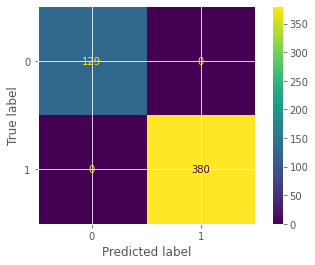

GaussianNB()
Total de atributos selecionados: 10
Lista de atributos selecionados: [ 0  3  6  8 12 15 19 20 21 22]
colunas
['Unnamed: 0', 'anoingresso', 'rendabruta', 'idade', 'companhia_domiciliar', 'quantidade_notebooks', 'percentual_frequencia', 'reprovacoes', 'idioma', 'ano_conclusao']
score: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       380

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



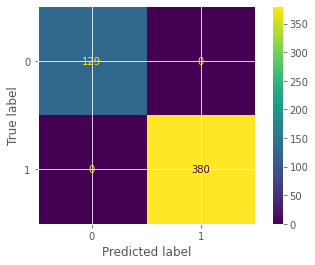

GaussianNB()
Total de atributos selecionados: 15
Lista de atributos selecionados: [ 0  2  3  4  5  6  8 12 14 15 19 20 21 22 30]
colunas
['Unnamed: 0', 'curso', 'anoingresso', 'periodoingresso', 'forma_acesso_seletivo', 'rendabruta', 'idade', 'companhia_domiciliar', 'pai_nivel_escolaridade', 'quantidade_notebooks', 'percentual_frequencia', 'reprovacoes', 'idioma', 'ano_conclusao', 'raca_Parda']
score: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       380

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



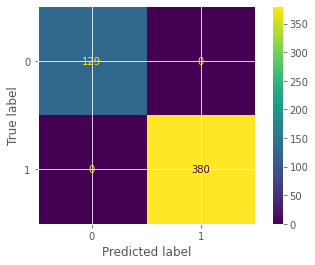

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
KNeighborsClassifier(n_neighbors=3)
Total de atributos selecionados: 5
Lista de atributos selecionados: [ 0  3  8 19 22]
colunas
['Unnamed: 0', 'anoingresso', 'idade', 'percentual_frequencia', 'ano_conclusao']
score: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       380

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



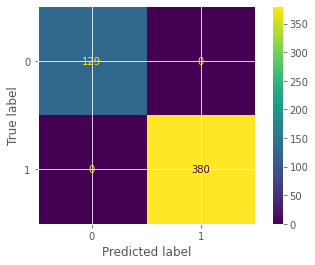

KNeighborsClassifier(n_neighbors=3)
Total de atributos selecionados: 10
Lista de atributos selecionados: [ 0  3  6  8 12 15 19 20 21 22]
colunas
['Unnamed: 0', 'anoingresso', 'rendabruta', 'idade', 'companhia_domiciliar', 'quantidade_notebooks', 'percentual_frequencia', 'reprovacoes', 'idioma', 'ano_conclusao']
score: 0.998
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       130
           1       1.00      1.00      1.00       379

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



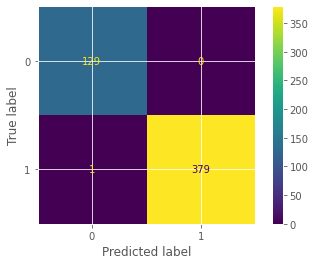

KNeighborsClassifier(n_neighbors=3)
Total de atributos selecionados: 15
Lista de atributos selecionados: [ 0  2  3  4  5  6  8 12 14 15 19 20 21 22 30]
colunas
['Unnamed: 0', 'curso', 'anoingresso', 'periodoingresso', 'forma_acesso_seletivo', 'rendabruta', 'idade', 'companhia_domiciliar', 'pai_nivel_escolaridade', 'quantidade_notebooks', 'percentual_frequencia', 'reprovacoes', 'idioma', 'ano_conclusao', 'raca_Parda']
score: 0.996
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       129
           1       1.00      1.00      1.00       380

    accuracy                           1.00       509
   macro avg       0.99      0.99      0.99       509
weighted avg       1.00      1.00      1.00       509



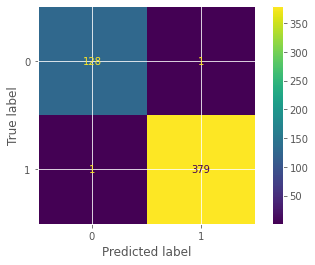

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
LogisticRegression()
Total de atributos selecionados: 5
Lista de atributos selecionados: [ 0  3  8 19 22]
colunas
['Unnamed: 0', 'anoingresso', 'idade', 'percentual_frequencia', 'ano_conclusao']
score: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       380

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



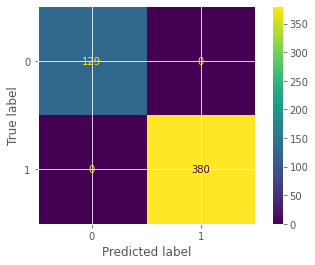

LogisticRegression()
Total de atributos selecionados: 10
Lista de atributos selecionados: [ 0  3  6  8 12 15 19 20 21 22]
colunas
['Unnamed: 0', 'anoingresso', 'rendabruta', 'idade', 'companhia_domiciliar', 'quantidade_notebooks', 'percentual_frequencia', 'reprovacoes', 'idioma', 'ano_conclusao']
score: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       380

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



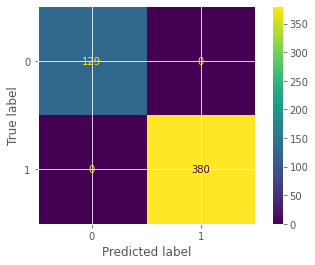

LogisticRegression()
Total de atributos selecionados: 15
Lista de atributos selecionados: [ 0  2  3  4  5  6  8 12 14 15 19 20 21 22 30]
colunas
['Unnamed: 0', 'curso', 'anoingresso', 'periodoingresso', 'forma_acesso_seletivo', 'rendabruta', 'idade', 'companhia_domiciliar', 'pai_nivel_escolaridade', 'quantidade_notebooks', 'percentual_frequencia', 'reprovacoes', 'idioma', 'ano_conclusao', 'raca_Parda']
score: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       380

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



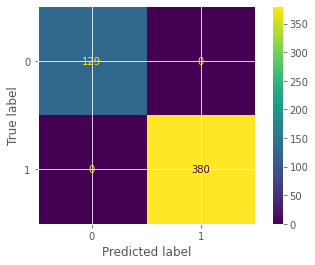

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
DecisionTreeClassifier()
Total de atributos selecionados: 5
Lista de atributos selecionados: [ 0  3  8 19 22]
colunas
['Unnamed: 0', 'anoingresso', 'idade', 'percentual_frequencia', 'ano_conclusao']
score: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       380

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



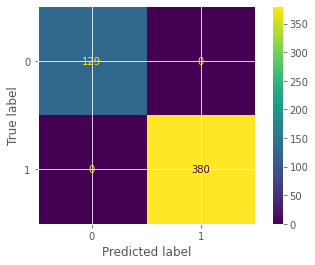

DecisionTreeClassifier()
Total de atributos selecionados: 10
Lista de atributos selecionados: [ 0  3  6  8 12 15 19 20 21 22]
colunas
['Unnamed: 0', 'anoingresso', 'rendabruta', 'idade', 'companhia_domiciliar', 'quantidade_notebooks', 'percentual_frequencia', 'reprovacoes', 'idioma', 'ano_conclusao']
score: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       380

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



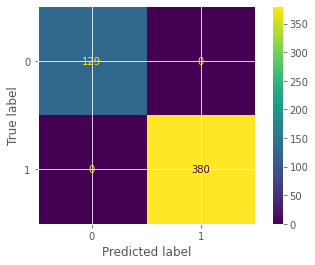

DecisionTreeClassifier()
Total de atributos selecionados: 15
Lista de atributos selecionados: [ 0  2  3  4  5  6  8 12 14 15 19 20 21 22 30]
colunas
['Unnamed: 0', 'curso', 'anoingresso', 'periodoingresso', 'forma_acesso_seletivo', 'rendabruta', 'idade', 'companhia_domiciliar', 'pai_nivel_escolaridade', 'quantidade_notebooks', 'percentual_frequencia', 'reprovacoes', 'idioma', 'ano_conclusao', 'raca_Parda']
score: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       380

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



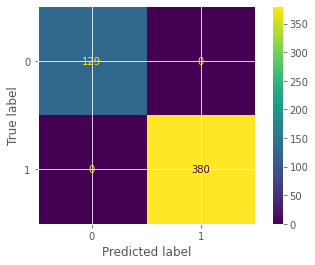

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
RandomForestClassifier()
Total de atributos selecionados: 5
Lista de atributos selecionados: [ 0  3  8 19 22]
colunas
['Unnamed: 0', 'anoingresso', 'idade', 'percentual_frequencia', 'ano_conclusao']
score: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       380

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



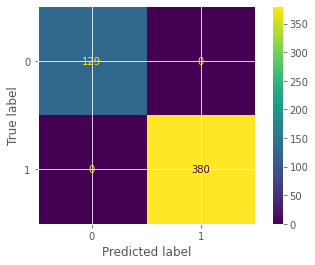

RandomForestClassifier()
Total de atributos selecionados: 10
Lista de atributos selecionados: [ 0  3  6  8 12 15 19 20 21 22]
colunas
['Unnamed: 0', 'anoingresso', 'rendabruta', 'idade', 'companhia_domiciliar', 'quantidade_notebooks', 'percentual_frequencia', 'reprovacoes', 'idioma', 'ano_conclusao']
score: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       380

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



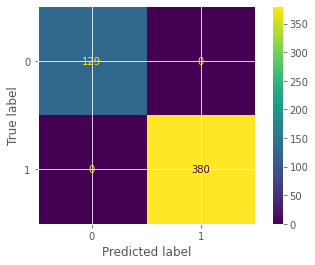

RandomForestClassifier()
Total de atributos selecionados: 15
Lista de atributos selecionados: [ 0  2  3  4  5  6  8 12 14 15 19 20 21 22 30]
colunas
['Unnamed: 0', 'curso', 'anoingresso', 'periodoingresso', 'forma_acesso_seletivo', 'rendabruta', 'idade', 'companhia_domiciliar', 'pai_nivel_escolaridade', 'quantidade_notebooks', 'percentual_frequencia', 'reprovacoes', 'idioma', 'ano_conclusao', 'raca_Parda']
score: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       380

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



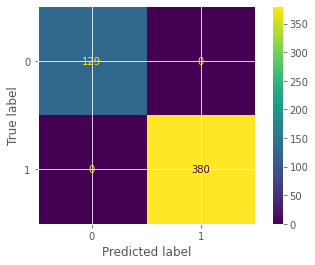

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
GradientBoostingClassifier()
Total de atributos selecionados: 5
Lista de atributos selecionados: [ 0  3  8 19 22]
colunas
['Unnamed: 0', 'anoingresso', 'idade', 'percentual_frequencia', 'ano_conclusao']
score: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       380

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



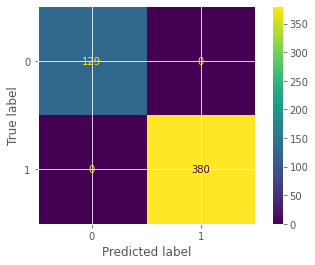

GradientBoostingClassifier()
Total de atributos selecionados: 10
Lista de atributos selecionados: [ 0  3  6  8 12 15 19 20 21 22]
colunas
['Unnamed: 0', 'anoingresso', 'rendabruta', 'idade', 'companhia_domiciliar', 'quantidade_notebooks', 'percentual_frequencia', 'reprovacoes', 'idioma', 'ano_conclusao']
score: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       380

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



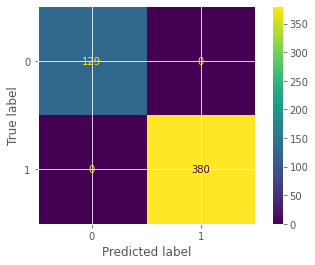

GradientBoostingClassifier()
Total de atributos selecionados: 15
Lista de atributos selecionados: [ 0  2  3  4  5  6  8 12 14 15 19 20 21 22 30]
colunas
['Unnamed: 0', 'curso', 'anoingresso', 'periodoingresso', 'forma_acesso_seletivo', 'rendabruta', 'idade', 'companhia_domiciliar', 'pai_nivel_escolaridade', 'quantidade_notebooks', 'percentual_frequencia', 'reprovacoes', 'idioma', 'ano_conclusao', 'raca_Parda']
score: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       380

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



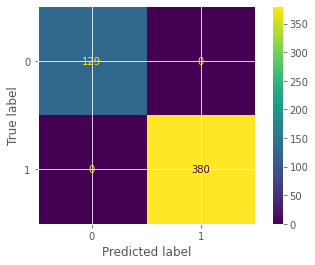

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Total de atributos selecionados: 5
Lista de atributos selecionados: [ 0  3  8 19 22]
colunas
['Unnamed: 0', 'anoingresso', 'idade', 'percentual_fr

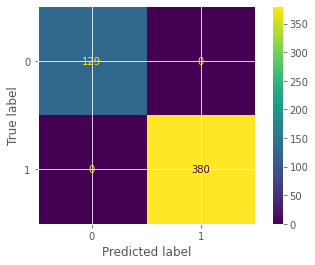

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Total de atributos selecionados: 10
Lista de atributos selecionados: [ 0  3  6  8 12 15 19 20 21 22]
colunas
['Unnamed: 0', 'anoingresso', 'rendabruta', 'idade', 'companhia_domiciliar', 'quantidade_notebooks', 'percentual_frequencia', 'reprovacoes'

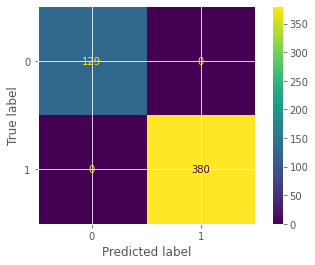

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Total de atributos selecionados: 15
Lista de atributos selecionados: [ 0  2  3  4  5  6  8 12 14 15 19 20 21 22 30]
colunas
['Unnamed: 0', 'curso', 'anoingresso', 'periodoingresso', 'forma_acesso_seletivo', 'rendabruta', 'idade', 'companhia_domicil

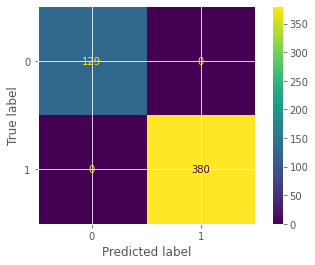

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import cross_validate

# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

for classifier in classifiers_list:
  for num in num_feat:
    pipe = Pipeline(steps=[('preprocess', preprocessor),('feature_selection', SelectKBest(score_func=f_classif, k=num)),("classifier", classifier)])
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    print(classifier)
    print("Total de atributos selecionados: {}".format(num))
    features = np.array(pipe['feature_selection'].get_support(indices=True))
    print("Lista de atributos selecionados: {}".format(features))

    print("colunas")
    print(X_train.columns[features].to_list())

    print("score: %.3f" % pipe.score(X_test, y_test))
    print(classification_report(pred,y_test))

    # 
    # predictions = pred.predict(X_test)
    cm = confusion_matrix(y_test, pred, labels=pipe.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=pipe.classes_)
    disp.plot()

    plt.show()
    # 

    # disp = ConfusionMatrixDisplay(pipe, X_test, y_test, cmap=plt.cm.Blues, normalize=None)

    # disp.ax_.set_title("Matriz de Confusão")
    # plt.show()

    # y_score = pipe.decision_function(X_test)

    # fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=pipe.classes_[1])
    # roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

    # y_pred = clf.predict(X_test)
    # cm = confusion_matrix(y_test, pred)

    # cm_display = ConfusionMatrixDisplay(cm).plot()

    # nome_metricas = ['accuracy', 'precision_macro', 'recall_macro']
    # metricas = cross_validate(pipe, X_train, y_train, cv=5, scoring=nome_metricas)
    # for met in metricas:
    #   print("Métrica: " + f"- {met}:")
    #   print("Métrica aaa: " + f"-- {metricas[met]}")
    #   print("Métrica bbb: " + f"-- {np.mean(metricas[met])} +- {np.std(metricas[met])}\n")  
  print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

#### Regressão Logística

In [ ]:
# instanciar e treinar um modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob a curva
# clf = LogisticRegression(solver="liblinear").fit(x_train, y_train)
# preds = clf.predict_proba(x_test)
# roc_auc = roc_auc_score(y_test,y_proba, multi_class='ovr')
# print(roc_auc)

# print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_proba)))

ValueError: ignored

# Aplicando Clusterização ao dataset

In [ ]:
from sklearn import datasets 
import pandas as pd 
from sklearn.cluster import KMeans


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/suap/23062022/dataset_numerico.csv")
X=df.drop(["alunoid","situacao","ira"], axis=1)
y=df.situacao
y=y.astype('int')

# X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=12)

## Plotando cluster do KMeans

### 1. Preparing Data for Plotting

In [ ]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd 

# #Load Data
# data = load_digits().data
# pca = PCA(2)
 
# #Transform the data
# df = pca.fit_transform(data)
 
# df.shape

# X = pd.read_csv("/content/drive/MyDrive/DOUTORADO UFMA/APRENDIZAGEM DE MÁQUINA/datasets/hotel.csv")
# X = pd.read_csv("/content/drive/MyDrive/DOUTORADO UFMA/APRENDIZAGEM DE MÁQUINA/datasets/hotel_numerico.csv")
# dataframe = pd.read_csv("./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/suap/23062022/dataset_numerico.csv")
# X=dataframe.drop(["Unnamed: 0","alunoid","situacao","ira"], axis=1)
# d = X.drop(["is_canceled"], axis=1)

print(df.info())
pca = PCA(2)
 
# Transform the data
df = pca.fit_transform(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48311 entries, 0 to 48310
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   alunoid                     48311 non-null  int64  
 1   campus                      48311 non-null  object 
 2   curso                       48311 non-null  object 
 3   anoingresso                 48311 non-null  int64  
 4   periodoingresso             48311 non-null  int64  
 5   dataconclusao               12925 non-null  object 
 6   forma_acesso_seletivo       42288 non-null  object 
 7   rendabruta                  48311 non-null  float64
 8   ira                         48311 non-null  float64
 9   modalidade                  48311 non-null  object 
 10  genero                      48311 non-null  object 
 11  raca                        48311 non-null  object 
 12  idade                       48311 non-null  int64  
 13  ficou_tempo_sem_estudar     483

In [ ]:
resort_hotel.arrival_date_month.value_counts()

In [ ]:
# from sklearn.cluster import KMeans
# filtro = X.hotel == "Resort Hotel"
# resort_hotel = X[filtro]

# resort_hotel.loc[resort_hotel.arrival_date_month == "January","arrival_date_month"]=1
# resort_hotel.loc[resort_hotel.arrival_date_month == "February","arrival_date_month"]=2
# resort_hotel.loc[resort_hotel.arrival_date_month == "March","arrival_date_month"]=3
# resort_hotel.loc[resort_hotel.arrival_date_month == "April","arrival_date_month"]=4
# resort_hotel.loc[resort_hotel.arrival_date_month == "May","arrival_date_month"]=5
# resort_hotel.loc[resort_hotel.arrival_date_month == "June","arrival_date_month"]=6
# resort_hotel.loc[resort_hotel.arrival_date_month == "July","arrival_date_month"]=7
# resort_hotel.loc[resort_hotel.arrival_date_month == "August","arrival_date_month"]=8
# resort_hotel.loc[resort_hotel.arrival_date_month == "September","arrival_date_month"]=9
# resort_hotel.loc[resort_hotel.arrival_date_month == "October","arrival_date_month"]=10
# resort_hotel.loc[resort_hotel.arrival_date_month == "November","arrival_date_month"]=11
# resort_hotel.loc[resort_hotel.arrival_date_month == "December","arrival_date_month"]=12

# X.loc[X.arrival_date_month == "January","arrival_date_month"]=1
# X.loc[X.arrival_date_month == "February","arrival_date_month"]=2
# X.loc[X.arrival_date_month == "March","arrival_date_month"]=3
# X.loc[X.arrival_date_month == "April","arrival_date_month"]=4
# X.loc[X.arrival_date_month == "May","arrival_date_month"]=5
# X.loc[X.arrival_date_month == "June","arrival_date_month"]=6
# X.loc[X.arrival_date_month == "July","arrival_date_month"]=7
# X.loc[X.arrival_date_month == "August","arrival_date_month"]=8
# X.loc[X.arrival_date_month == "September","arrival_date_month"]=9
# X.loc[X.arrival_date_month == "October","arrival_date_month"]=10
# X.loc[X.arrival_date_month == "November","arrival_date_month"]=11
# X.loc[X.arrival_date_month == "December","arrival_date_month"]=12

# X.loc[X.deposit_type == "No Deposit","deposit_type"]=1
# X.loc[X.deposit_type == "Non Refund","deposit_type"]=2
# X.loc[X.deposit_type == "Refundable","deposit_type"]=3

X2 = X[['curso','reprovacoes']]

inertia = []
for n in range(1,11):
  algorithm = (KMeans(n_clusters = n))
  algorithm.fit(X2)
  inertia.append(algorithm.inertia_)

# resort_hotel.hotel.value_counts()

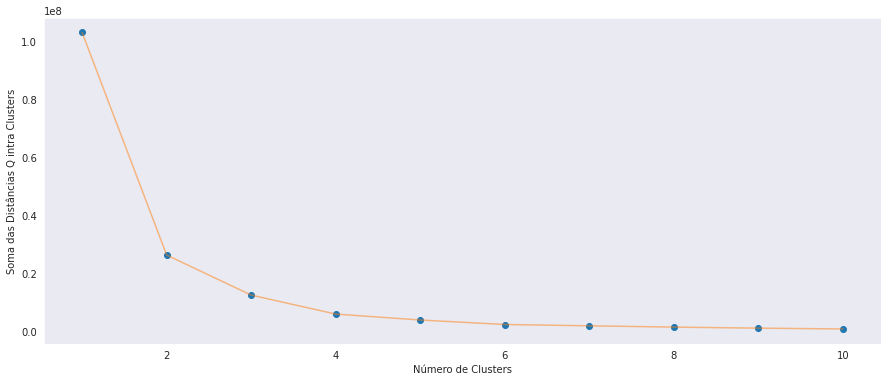

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(1, figsize=(15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Número de Clusters'), plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

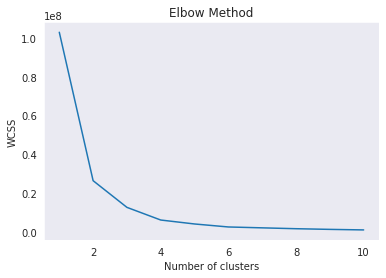

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
kmeans.fit(X2)

#predict the labels of clusters.
# label = kmeans.fit_predict(X2)

KMeans(n_clusters=3)

In [ ]:
kmeans.cluster_centers_

array([[ 1.54931294e+02,  8.87289791e-02],
       [ 4.95449294e+01, -4.50013802e-02],
       [ 2.50145916e+02, -7.72780541e-02]])

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 1], dtype=int32)

In [ ]:
X.deposit_type.value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

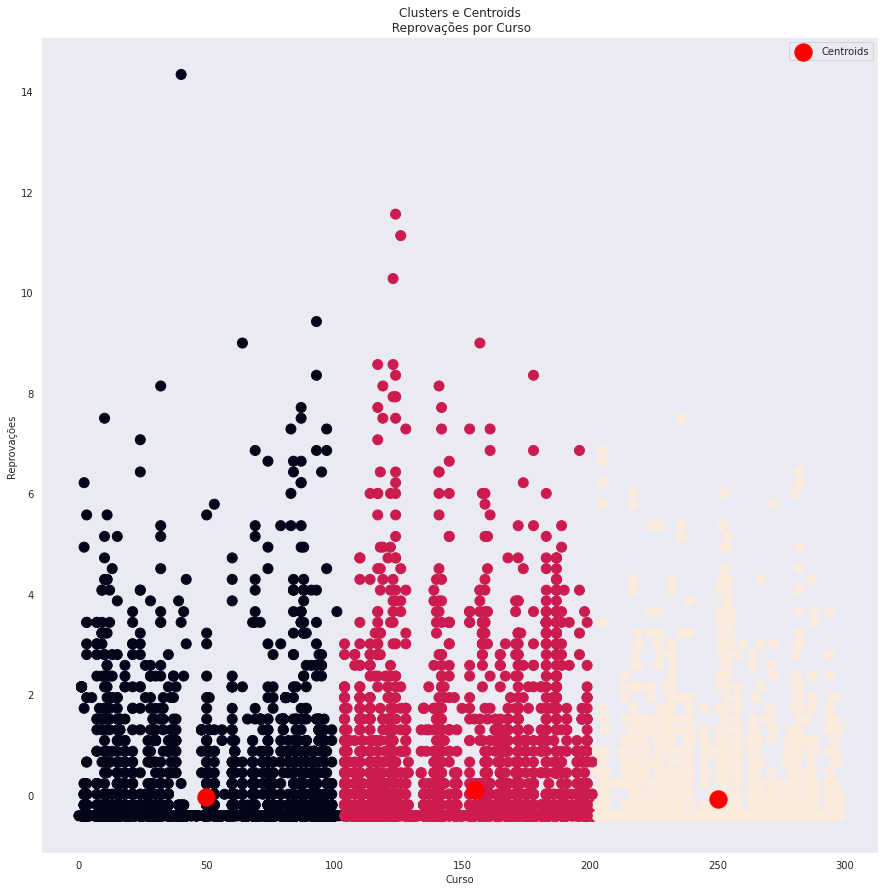

In [ ]:
# grupos = kmeans.predict(X2[['arrival_date_year','arrival_date_month']])


# label = kmeans.fit_predict(X2)


plt.figure(1, figsize=(15,15))
# u_labels = np.unique(label)
# for i in u_labels:
#     plt.scatter(X2[label == i , 0] , X2[label == i , 1] , label = i)


plt.scatter(X2['curso'], X2['reprovacoes'], s=100, c=kmeans.labels_)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')

plt.title('Clusters e Centroids\n Reprovações por Curso')
plt.xlabel('Curso')
plt.ylabel('Reprovações')
plt.legend()
plt.show()

### 2. Apply K-Means to the Data

In [ ]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
# u_labels = np.unique(label)
 
print(label)

[2 2 2 ... 1 1 1]


### 3. Plotting Label 0 K-Means Clusters

In [ ]:
import matplotlib.pyplot as plt

#filter rows of original data
filtered_label0 = X[label == 0].values

#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

### 4. Plotting Additional K-Means Clusters

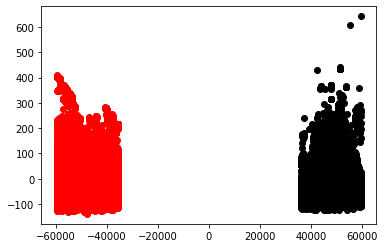

In [ ]:
#filter rows of original data
filtered_label2 = df[label == 1]
 
filtered_label8 = df[label == 2]
 
#Plotting the results

plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

### 5. Plot All K-Means Clusters

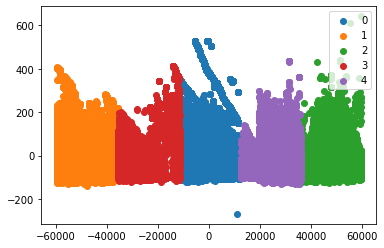

In [ ]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

### 6. Plotting the Cluster Centroids

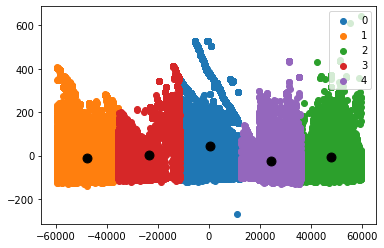

In [ ]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

###7. Métricas do modelo

In [ ]:
df[1]

array([59700.25193339,   642.11524707])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

# print(classification_report(df[0][0],kmeans.labels_))
# print("ConfusionMatrix\n",confusion_matrix(df[0][0],kmeans.labels_))

TypeError: ignored

## Kmenas com k=10

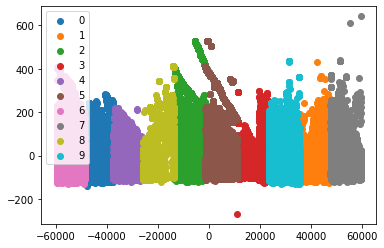

In [ ]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
# #Load Data
# data = load_digits().data
# pca = PCA(2)
 
# #Transform the data
# df = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

## Plot cluster with KMeans

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

## Outra abordagem

In [ ]:
X.info()

In [ ]:
X.isnull().sum()

Unnamed: 0                    0
campus                        0
curso                         0
anoingresso                   0
periodoingresso               0
forma_acesso_seletivo         0
rendabruta                    0
modalidade                    0
idade                         0
ficou_tempo_sem_estudar       0
razao_ausencia_educacional    0
quantidade_computadores       0
exclusivo_rede_publica        0
companhia_domiciliar          0
mae_nivel_escolaridade        0
pai_nivel_escolaridade        0
quantidade_notebooks          0
qtd_filhos                    0
tipo_area_residencial         0
trabalha                      0
percentual_frequencia         0
reprovacoes                   0
idioma                        0
ano_conclusao                 0
anos_estudos_curso            0
escolaridade_pais             0
genero_F                      0
genero_M                      0
raca_AMARELA                  0
raca_Amarela                  0
raca_BRANCA                   0
raca_Bra

In [ ]:
X.describe()

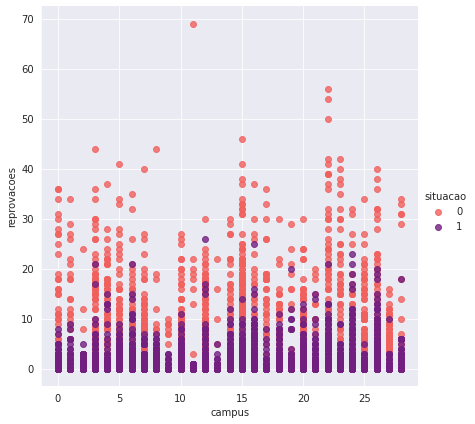

In [ ]:
sns.set_style('darkgrid')
sns.lmplot('campus','reprovacoes',data=dataset, hue='situacao',palette='magma_r',size=6,aspect=1,fit_reg=False)

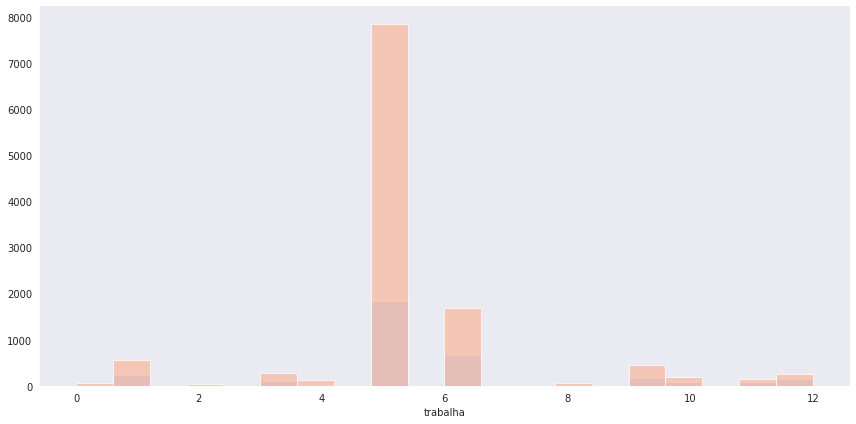

In [ ]:
sns.set_style('dark')
h=sns.FacetGrid(dataset,hue="situacao",palette='coolwarm',size=6,aspect=2)
h = h.map(plt.hist,'trabalha',bins=20,alpha=0.7)

Text(0, 0.5, 'Campus')

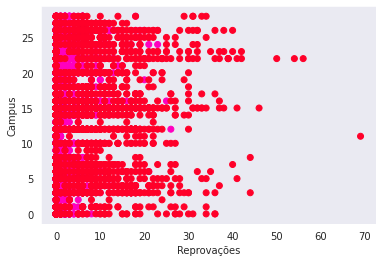

In [ ]:
plt.scatter(X.reprovacoes, X.campus, c=y, cmap='gist_rainbow') 
plt.xlabel('Reprovações') 
plt.ylabel('Campus')

In [ ]:
# criando objeto Kmeans usando KMeans() 
kmeans = KMeans(n_clusters = 5, random_state=1)
# Ajuste nos dados 
kmeans.fit(X) 
KMeans(algorithm='auto', 
       copy_x=True, 
       init='k-means++', # seleciona os centros iniciais do cluster 
       max_iter=300, 
       n_clusters=5, 
       n_init=10, 
       random_state=1, 
       tol=0.0001, # tolerância mínima para distância entre clusters 
       verbose=0)

KMeans(n_clusters=5, random_state=1)

In [ ]:
# instanciar uma variável para os centros 
means = kmeans.cluster_centers_
# imprime os centros do cluster 
print(means)

[[ 1.21553681e+04  1.37736931e+01  1.50207274e+02  2.01746031e+03
   1.06896102e+00  1.02672403e+00  1.28670227e+03  1.51792465e+00
   2.27733020e+01  1.05592491e-02  4.27584409e-02  1.63908124e-01
   0.00000000e+00  6.32616347e+00  3.44635641e+00  3.59431626e+00
   3.30413546e-01  2.11184982e-01  4.80432799e+00  5.42197888e+00
   9.63448051e+01  1.94446617e+00  1.32837961e-01  2.01987355e+03
   2.41324469e+00  1.09281710e+00  5.09972624e-01  4.90027376e-01
   1.30361100e-04  9.51636032e-03  1.30361100e-03  1.49784904e-01
  -4.45878143e-18  6.12697171e-03  5.21444401e-04  2.60722200e-04
   9.64672142e-03  2.86794421e-03  6.78399166e-01  1.41441794e-01
   4.81032460e-02  4.30191631e-03  1.30361100e-04  9.23478034e-01
   2.33346369e-02  6.51805501e-04]
 [ 4.30920000e+04  8.00000000e+00  1.98000000e+02  2.02000000e+03
   1.00000000e+00  2.00000000e+00  4.96094125e+09  1.00000000e+00
   1.70000000e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.10000000e+01  2.0000

In [ ]:
new_labels = kmeans.labels_ 
# Plote os clusters identificados e compare 
fig, axes = plt.subplots(1, 2, figsize=(12,7)) 
axes[0].scatter(X.reprovacoes, X.campus, c=y, cmap='gist_rainbow', edgecolor='k', s=150) 
axes[1].scatter(X.reprovacoes, X.campus, c=new_labels, cmap= 'jet', edgecolor='k', s=150) 
axes[0].set_xlabel('Reprovações') 
axes[0].set_ylabel('Campus') 
axes[1].set_xlabel('Reprovações') 
axes[1].set_ylabel('Campus') 
axes[0].set_title('Original') 
axes[1].set_title('Predicted')

In [ ]:
def converter(cluster):
    if cluster==1:
        return 1
    else:
        return 0
dataset['cluster'] = y.apply(converter)
dataset.head(1)

In [ ]:
dataset['cluster'].value_counts()

1    11703
0     3381
Name: cluster, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(dataset['cluster'],kmeans.labels_))
print("ConfusionMatrix\n",confusion_matrix(dataset['cluster'],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.22      1.00      0.37      3381
           1       0.00      0.00      0.00     11703

    accuracy                           0.22     15084
   macro avg       0.11      0.50      0.18     15084
weighted avg       0.05      0.22      0.08     15084

ConfusionMatrix
 [[ 3380     1]
 [11703     0]]


In [ ]:
kmeans.fit(X) 

KMeans(n_clusters=5, random_state=1)

In [ ]:
means1=kmeans.cluster_centers_
print(means1)

[[ 1.21553681e+04  1.37736931e+01  1.50207274e+02  2.01746031e+03
   1.06896102e+00  1.02672403e+00  1.28670227e+03  1.51792465e+00
   2.27733020e+01  1.05592491e-02  4.27584409e-02  1.63908124e-01
   0.00000000e+00  6.32616347e+00  3.44635641e+00  3.59431626e+00
   3.30413546e-01  2.11184982e-01  4.80432799e+00  5.42197888e+00
   9.63448051e+01  1.94446617e+00  1.32837961e-01  2.01987355e+03
   2.41324469e+00  1.09281710e+00  5.09972624e-01  4.90027376e-01
   1.30361100e-04  9.51636032e-03  1.30361100e-03  1.49784904e-01
  -4.45878143e-18  6.12697171e-03  5.21444401e-04  2.60722200e-04
   9.64672142e-03  2.86794421e-03  6.78399166e-01  1.41441794e-01
   4.81032460e-02  4.30191631e-03  1.30361100e-04  9.23478034e-01
   2.33346369e-02  6.51805501e-04]
 [ 4.30920000e+04  8.00000000e+00  1.98000000e+02  2.02000000e+03
   1.00000000e+00  2.00000000e+00  4.96094125e+09  1.00000000e+00
   1.70000000e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.10000000e+01  2.0000

In [ ]:
print(classification_report(dataset['cluster'],kmeans.labels_))
print("ConfusionMatrix\n",confusion_matrix(dataset['cluster'],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.23      0.51      0.32      3381
           1       0.00      0.00      0.00     11703
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.11     15084
   macro avg       0.05      0.10      0.06     15084
weighted avg       0.05      0.11      0.07     15084

ConfusionMatrix
 [[1726    1    1 1652    1]
 [5846    0    0 5853    4]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


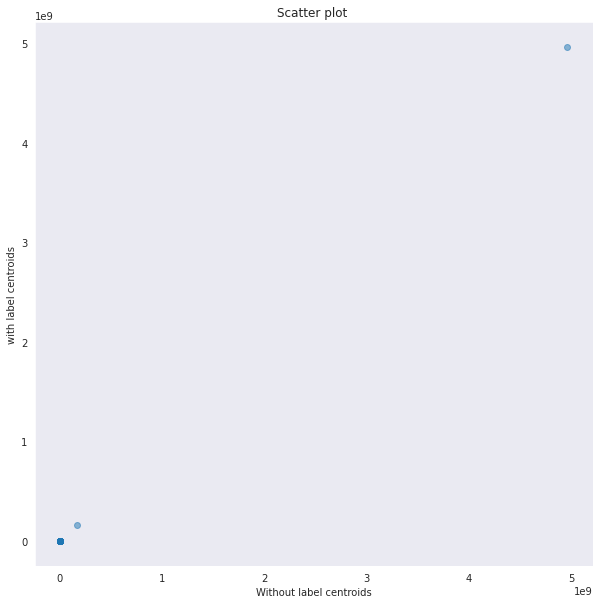

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.scatter(means,means1, alpha=0.5)
plt.title('Scatter plot ')
plt.xlabel('Without label centroids')
plt.ylabel('with label centroids')
plt.show()

Text(0.5, 0, 'with Label')

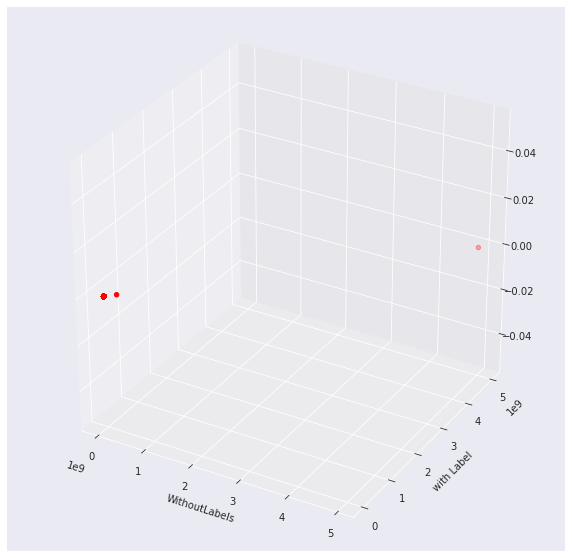

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x =means
y =means1
ax.scatter(x, y, c='r', marker='o')
ax.set_xlabel('WithoutLabels')
ax.set_ylabel('with Label')

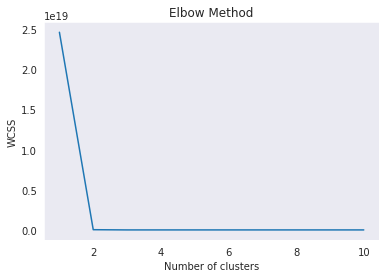

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#5 According to the Elbow graph we deterrmine the clusters number as #5. Applying k-means algorithm to the X dataset.
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
# We are going to use the fit predict method that returns for each #observation which cluster it belongs to. The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is  called y K-means
y_kmeans = kmeans.fit_predict(X)

In [ ]:
y_kmeans

array([0, 0, 0, ..., 3, 2, 3], dtype=int32)

In [ ]:
#6 Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

In [ ]:
# Using the elbow method to find out the optimal number of #clusters. 
# KMeans class from the sklearn library.
from sklearn.cluster import KMeans
wcss=[]
#this loop will fit the k-means algorithm to our data and 
#second we will compute the within cluster sum of squares and #appended to our wcss list.
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
#i above is between 1-10 numbers. init parameter is the random #initialization method  
#we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
#find the final clusters when the K-meands algorithm is running. we #enter the default value of 300
#the next parameter is n_init which is the number of times the #K_means algorithm will be run with
#different initial centroid.
kmeans.fit(X)
#kmeans algorithm fits to the X dataset
wcss.append(kmeans.inertia_)
#kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.
#4.Plot the elbow graph
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Salvando o dataset numérico

In [ ]:
dataset.to_csv(path_dataset+"05012023_dataset_transformado_nao_numerico.csv")

# Teste Fodão

## Imports

In [ ]:
# IMPORTS
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder 

# MELHORANDO O MODELO - V1 - Hold-out
from sklearn.model_selection import train_test_split

# MELHORANDO O MODELO - V2 - Validação cruzada (k-fold cross-validation)
from sklearn.model_selection import cross_val_score

# MELHORANDO O MODELO - V3 - Matriz de confusão
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix

# MELHORANDO O MODELO - V4 - AUC (AUROC)
from sklearn.metrics import plot_roc_curve

## PRÉ-PROCESSAMENTO


In [ ]:
dataset = pd.read_csv('./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/credit-g.csv')
dataset.info()

In [ ]:
dataset = pd.read_csv('./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/credit-g.csv')
# df = pd.read_csv("./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/suap/23062022/dados_caracterizacaosocial.csv")


dataset_dummies = pd.get_dummies(dataset, columns=['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 
                                'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing',
                                'job', 'own_telephone', 'foreign_worker'], drop_first=True)

labelencoder = LabelEncoder()
dataset_dummies['class'] = labelencoder.fit_transform(dataset_dummies['class'])
print(dataset_dummies.info())


X = dataset_dummies.drop(axis=1, columns=['class'])
y = dataset_dummies[['class']]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = y.values.ravel()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   duration                                         1000 non-null   int64
 1   credit_amount                                    1000 non-null   int64
 2   installment_commitment                           1000 non-null   int64
 3   residence_since                                  1000 non-null   int64
 4   age                                              1000 non-null   int64
 5   existing_credits                                 1000 non-null   int64
 6   num_dependents                                   1000 non-null   int64
 7   class                                            1000 non-null   int64
 8   checking_status_0<=X<200                         1000 non-null   uint8
 9   checking_status_<0                               1000

## TREINAMENTO DO MODELO

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7090909090909091


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

0.7150000000000001


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


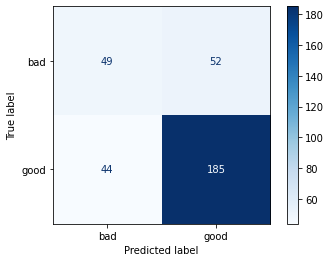

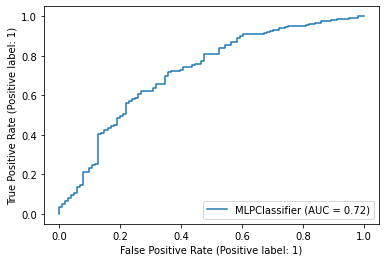

In [ ]:
# TREINAMENTO DO MODELO
# MELHORANDO O MODELO - V1 - Hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = MLPClassifier(hidden_layer_sizes=(25, 25), max_iter=200, random_state=42)

# MÉTRICAS
# MELHORANDO O MODELO - V1 - Hold-out
# model.fit(X, y)
# model.score(X, y)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

# MELHORANDO O MODELO - V2 - Validação cruzada (k-fold cross-validation)
scores = cross_val_score(model, X, y, cv=10)
print(scores.mean())

# MELHORANDO O MODELO - V3 - Matriz de confusão
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, display_labels=['bad', 'good'])

# MELHORANDO O MODELO - V4 - AUC (AUROC)
plot_roc_curve(model, X_test, y_test)

## Teste Completo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   duration                                         1000 non-null   int64
 1   credit_amount                                    1000 non-null   int64
 2   installment_commitment                           1000 non-null   int64
 3   residence_since                                  1000 non-null   int64
 4   age                                              1000 non-null   int64
 5   existing_credits                                 1000 non-null   int64
 6   num_dependents                                   1000 non-null   int64
 7   class                                            1000 non-null   int64
 8   checking_status_0<=X<200                         1000 non-null   uint8
 9   checking_status_<0                               1000

<ipython-input-25-122c22139588>:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Score hold-out: 0.7515151515151515


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_sel

Scores 10-fold cross-validation: [0.83 0.71 0.73 0.76 0.79 0.71 0.7  0.81 0.72 0.76]
Média 10-fold cross-validation: 0.752
Desvio padrão 10-fold cross-validation: 0.04331281565541545


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


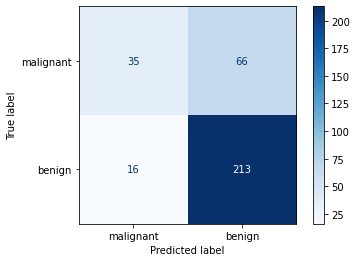

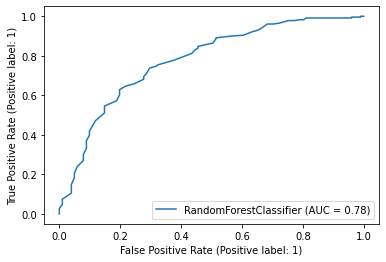

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve

# X, y = load_breast_cancer(return_X_y=True)
dataset = pd.read_csv('./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/credit-g.csv')
# df = pd.read_csv("./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/suap/23062022/dados_caracterizacaosocial.csv")


dataset_dummies = pd.get_dummies(dataset, columns=['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 
                                'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing',
                                'job', 'own_telephone', 'foreign_worker'], drop_first=True)

labelencoder = LabelEncoder()
dataset_dummies['class'] = labelencoder.fit_transform(dataset_dummies['class'])
print(dataset_dummies.info())


X = dataset_dummies.drop(axis=1, columns=['class'])
y = dataset_dummies[['class']]


# Hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print('Score hold-out:', model.score(X_test, y_test))
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, display_labels=['malignant', 'benign'])

# validação cruzada k-fold

# model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X, y, cv=10)

print('Scores 10-fold cross-validation:', scores)
print('Média 10-fold cross-validation:', scores.mean() )
print('Desvio padrão 10-fold cross-validation:', scores.std())

plot_roc_curve(model, X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


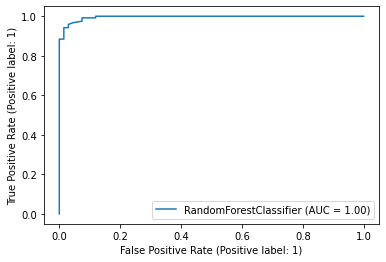

In [ ]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

plot_roc_curve(model, X_test, y_test)

## Mais um fatídico teste de pipeline

In [ ]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

In [ ]:
titanic = pd.read_csv('./drive/MyDrive/DOUTORADO UFMA/APRENDIZAGEM DE MÁQUINA/datasets/titanic.csv')


# Alternatively X and y can be obtained directly from the frame attribute:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [ ]:
numeric_features = ["Age", "Fare"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["Embarked", "Sex", "Pclass"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [ ]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.799


# PIPELINE ORIENTADO A OBJETOS PERSONALIZADO - não rodou a contento

<b>Reprodução do tutorial disponível em:</b>

<i>https://towardsdatascience.com/custom-transformers-and-ml-data-pipelines-with-python-20ea2a7adb65</i>

## Imports

In [ ]:
import numpy as np 
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Classe do Pipeline para FeatureSelector 

In [ ]:
#Custom Transformer that extracts columns passed as argument to its constructor 
class FeatureSelector( BaseEstimator, TransformerMixin ):
    #Class Constructor 
    def __init__( self, feature_names ):
        self._feature_names = feature_names 
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    #Method that describes what we need this transformer to do
    def transform( self, X, y = None ):
        return X[ self._feature_names ]

## Classe do Pipeline para CategoricalTransformer

In [ ]:
#Custom transformer that breaks dates column into year, month and day into separate columns and
#converts certain features to binary 
class CategoricalTransformer( BaseEstimator, TransformerMixin ):
    #Class constructor method that takes in a list of values as its argument
    def __init__(self, use_dates = ['year', 'month', 'day'] ):
        self._use_dates = use_dates
        
    #Return self nothing else to do here
    def fit( self, X, y = None  ):
        return self

    #Helper function to extract year from column 'dates' 
    def get_year( self, obj ):
        return str(obj)[:4]
    
    #Helper function to extract month from column 'dates'
    def get_month( self, obj ):
        return str(obj)[4:6]
    
    #Helper function to extract day from column 'dates'
    def get_day(self, obj):
        return str(obj)[6:8]
    
    #Helper function that converts values to Binary depending on input 
    def create_binary(self, obj):
        if obj == 0:
            return 'No'
        else:
            return 'Yes'
    
    #Transformer method we wrote for this transformer 
    def transform(self, X , y = None ):
       #Depending on constructor argument break dates column into specified units
       #using the helper functions written above 
       for spec in self._use_dates:
        
        exec( "X.loc[:,'{}'] = X['date'].apply(self.get_{})".format( spec, spec ) )
       #Drop unusable column 
       X = X.drop('date', axis = 1 )
       
       #Convert these columns to binary for one-hot-encoding later
       X.loc[:,'waterfront'] = X['waterfront'].apply( self.create_binary )
       
       X.loc[:,'view'] = X['view'].apply( self.create_binary )
       
       X.loc[:,'yr_renovated'] = X['yr_renovated'].apply( self.create_binary )
       #returns numpy array
       return X.values 

## Classe do Pilpeline para NumericalTransformer

In [ ]:
#Custom transformer we wrote to engineer features ( bathrooms per bedroom and/or how old the house is in 2019  ) 
#passed as boolen arguements to its constructor
class NumericalTransformer(BaseEstimator, TransformerMixin):
    #Class Constructor
    def __init__( self, bath_per_bed = True, years_old = True ):
        self._bath_per_bed = bath_per_bed
        self._years_old = years_old
        
    #Return self, nothing else to do here
    def fit( self, X, y = None ):
        return self 
    
    #Custom transform method we wrote that creates aformentioned features and drops redundant ones 
    def transform(self, X, y = None):
        #Check if needed 
        if self._bath_per_bed:
            #create new column
            X.loc[:,'bath_per_bed'] = X['bathrooms'] / X['bedrooms']
            #drop redundant column
            X.drop('bathrooms', axis = 1 )
        #Check if needed     
        if self._years_old:
            #create new column
            X.loc[:,'years_old'] =  2019 - X['yr_built']
            #drop redundant column 
            X.drop('yr_built', axis = 1)
            
        #Converting any infinity values in the dataset to Nan
        X = X.replace( [ np.inf, -np.inf ], np.nan )
        #returns a numpy array
        return X.values

## Montando Pipeline central com FeatureUnion

In [ ]:
#Categrical features to pass down the categorical pipeline 
categorical_features = ['date', 'waterfront', 'view', 'yr_renovated']

#Numerical features to pass down the numerical pipeline 
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                'condition', 'grade', 'sqft_basement', 'yr_built']

#Defining the steps in the categorical pipeline 
categorical_pipeline = Pipeline( steps = [ ( 'cat_selector', FeatureSelector(categorical_features) ),
                                  
                                  ( 'cat_transformer', CategoricalTransformer() ), 
                                  
                                  ( 'one_hot_encoder', OneHotEncoder( sparse = False ) ) ] )
    
#Defining the steps in the numerical pipeline     
numerical_pipeline = Pipeline( steps = [ ( 'num_selector', FeatureSelector(numerical_features) ),
                                  
                                  ( 'num_transformer', NumericalTransformer() ),
                                  
                                  ('imputer', SimpleImputer(strategy = 'median') ),
                                  
                                  ( 'std_scaler', StandardScaler() ) ] )

#Combining numerical and categorical piepline into one full big pipeline horizontally 
#using FeatureUnion
full_pipeline = FeatureUnion( transformer_list = [ ( 'categorical_pipeline', categorical_pipeline ), 
                                                  
                                                  ( 'numerical_pipeline', numerical_pipeline ) ] )

# hhkhkhkhk

            0     1     2     3    4     5     6     7   8
0   AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35  cp
1  ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44  cp
2  ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46  cp
3  ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36  cp
4   ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35  cp
(224, 7)
(112, 7)
Training set score: 0.9017857142857143
Test set score: 0.8482142857142857
Training set score: 0.8794642857142857
Test set score: 0.8392857142857143


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Training set score: 0.8928571428571429
Test set score: 0.8571428571428571
{'classifier__leaf_size': 1, 'classifier__n_neighbors': 7, 'classifier__p': 2, 'scaler': StandardScaler(), 'selector__threshold': 0}
Pipeline(steps=[('scaler', StandardScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('classifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=7))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__leaf_size', 'param_classifier__n_neighbors',
       'param_classifier__p', 'param_scaler', 'param_selector__threshold',
       'params', 'split0_test_score', 'split1_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


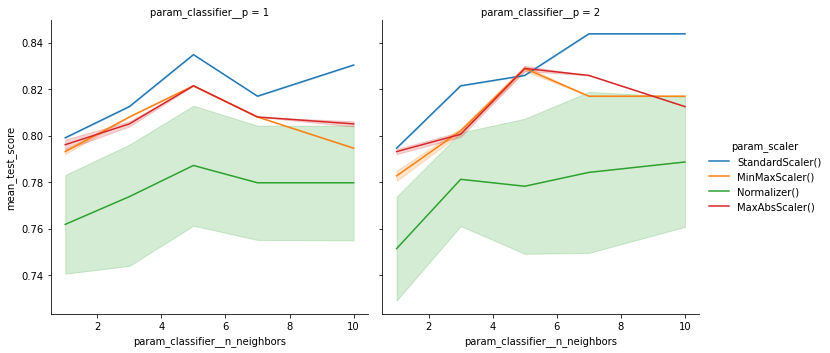

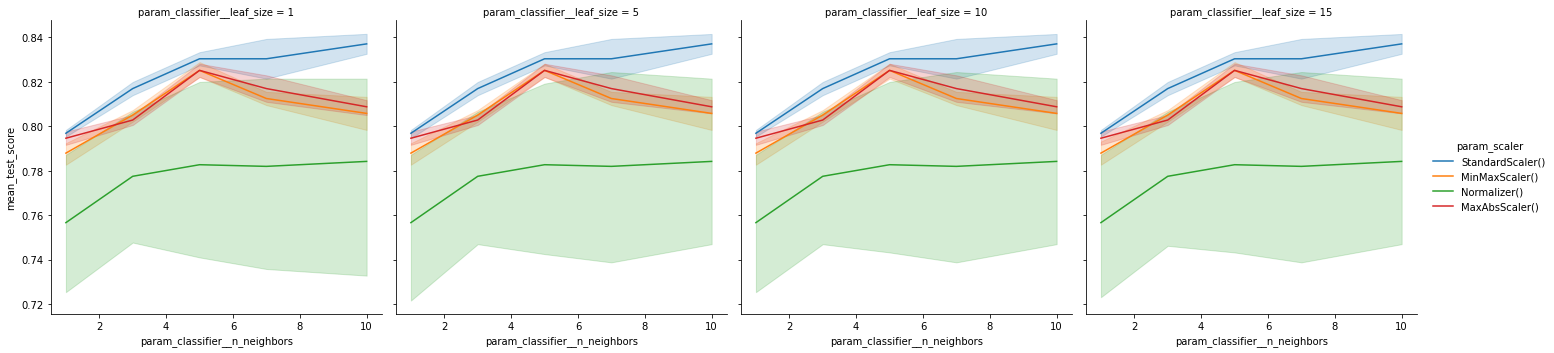

In [ ]:
from pandas import read_csv                           # For dataframes
from pandas import DataFrame                       # For dataframes
from numpy import ravel                                  # For matrices
import matplotlib.pyplot as plt                        # For plotting data
import seaborn as sns                                     # For plotting data
from sklearn.model_selection import train_test_split    # For train/test splits
from sklearn.neighbors import KNeighborsClassifier    # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline                                  # For setting up pipeline
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV      # For optimization


# Read ecoli dataset from the UCI ML Repository and store in
# dataframe df
df = read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data',
    sep = '\s+',
    header=None)
print(df.head())

# The data matrix X
X = df.iloc[:,1:-1]
# The labels
y = (df.iloc[:,-1:])

# Encode the labels into unique integers
encoder = LabelEncoder()
y = encoder.fit_transform(ravel(y))

# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=1/3,
    random_state=0)

print(X_train.shape)
print(X_test.shape)

knn = KNeighborsClassifier().fit(X_train, y_train)
print('Training set score: ' + str(knn.score(X_train,y_train)))
print('Test set score: ' + str(knn.score(X_test,y_test)))

pipe = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', KNeighborsClassifier())
])

pipe.fit(X_train, y_train)

print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

parameters = {'scaler': [StandardScaler(), MinMaxScaler(),
	Normalizer(), MaxAbsScaler()],
	'selector__threshold': [0, 0.001, 0.01],
	'classifier__n_neighbors': [1, 3, 5, 7, 10],
	'classifier__p': [1, 2],
	'classifier__leaf_size': [1, 5, 10, 15]
}

grid = GridSearchCV(pipe, parameters, cv=2).fit(X_train, y_train)

print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))

# Access the best set of parameters
best_params = grid.best_params_
print(best_params)
# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

result_df = DataFrame.from_dict(grid.cv_results_, orient='columns')
print(result_df.columns)

sns.relplot(data=result_df,
	kind='line',
	x='param_classifier__n_neighbors',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__p')
plt.show()

sns.relplot(data=result_df,
            kind='line',
            x='param_classifier__n_neighbors',
            y='mean_test_score',
            hue='param_scaler',
            col='param_classifier__leaf_size')
plt.show()

# Custom Pipeline - V3 [OFICIAL] - Ajustando aos dados de alunos do IFMA

This post will use a classic regression example — predicting house prices to demonstrate 4 practical steps in using Pipeline, which are how to:

<ol>
<li>Structure a workflow systematically before writing any pipeline code</li>
<li>Create custom transformers in Pipeline</li>
<li>Apply modular approach when building pipeline</li>
<li>Use same pipeline with different models to evaluate models’ performance quickly</li>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports

In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

import missingno as msno

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from feature_engine import encoding

# ampliando as funcionalidades
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt  
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import plot_roc_curve

## Conhecendo os dados de alunos do IFMA

In [ ]:
# dataset url
# 'https://www.kaggle.com/c/house-prices-advanced-regression-techniques'

# train = pd.read_csv('./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/exemplos/house-prices-advanced-regression-techniques/train.csv', index_col ='Id')
# test = pd.read_csv('./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/exemplos/house-prices-advanced-regression-techniques/test.csv', index_col ='Id')

df = pd.read_csv("./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/suap/23062022/dados_caracterizacaosocial.csv")

# train = pd.read_csv("house-prices-advanced-regression-techniques/train.csv", index_col ='Id')
# test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv", index_col ='Id')

# X = train.drop('SalePrice', axis = 1)
# y = train['SalePrice']

In [ ]:
print(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48311 entries, 0 to 48310
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   alunoid                     48311 non-null  int64  
 1   campus                      48311 non-null  object 
 2   curso                       48311 non-null  object 
 3   anoingresso                 48311 non-null  int64  
 4   periodoingresso             48311 non-null  int64  
 5   dataconclusao               12925 non-null  object 
 6   forma_acesso_seletivo       42288 non-null  object 
 7   rendabruta                  48311 non-null  float64
 8   ira                         48311 non-null  float64
 9   modalidade                  48311 non-null  object 
 10  genero                      48311 non-null  object 
 11  raca                        48311 non-null  object 
 12  idade                       48311 non-null  int64  
 13  ficou_tempo_sem_estudar     483

(48311, 30)

In [ ]:
# Transformando a variável-alvo
query = ['Concluído','Formado']
formados = df[df['situacao'].isin(query)]
formados.replace(['Concluído','Formado'], 1, inplace=True) # 1 - formado

query = ['Evasão','Cancelado','Cancelamento Compulsório','Jubilado','Transferido Externo']
evadidos = df[df['situacao'].isin(query)]

evadidos.replace(['Evasão','Cancelado','Cancelamento Compulsório','Jubilado','Transferido Externo'], 0, inplace=True) # 0 - evadido

df = pd.concat([formados, evadidos])
df.situacao.value_counts()

<ipython-input-8-cf8bada64839>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formados.replace(['Concluído','Formado'], 1, inplace=True) # 1 - formado
<ipython-input-8-cf8bada64839>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evadidos.replace(['Evasão','Cancelado','Cancelamento Compulsório','Jubilado','Transferido Externo'], 0, inplace=True) # 0 - evadido


1    12895
0     5327
Name: situacao, dtype: int64

In [ ]:
print(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18222 entries, 6 to 48304
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   alunoid                     18222 non-null  int64  
 1   campus                      18222 non-null  object 
 2   curso                       18222 non-null  object 
 3   anoingresso                 18222 non-null  int64  
 4   periodoingresso             18222 non-null  int64  
 5   dataconclusao               12890 non-null  object 
 6   forma_acesso_seletivo       13868 non-null  object 
 7   rendabruta                  18222 non-null  float64
 8   ira                         18222 non-null  float64
 9   modalidade                  18222 non-null  object 
 10  genero                      18222 non-null  object 
 11  raca                        18222 non-null  object 
 12  idade                       18222 non-null  int64  
 13  ficou_tempo_sem_estudar     182

(18222, 30)

In [ ]:
filtro1 = df['modalidade'] == 'Concomitante'  # 1,5 anos para conclusão
filtro2 = df['modalidade'] == 'Integrado'     # 3 anos para conclusão
filtro3 = df['modalidade'] == 'Integrado EJA' # 3 anos para conclusão
filtro4 = df['modalidade'] == 'Subsequente'   # 1,5 anos para conclusão

df = df[filtro1 | filtro2 | filtro3 | filtro4]
print(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15084 entries, 6 to 48304
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   alunoid                     15084 non-null  int64  
 1   campus                      15084 non-null  object 
 2   curso                       15084 non-null  object 
 3   anoingresso                 15084 non-null  int64  
 4   periodoingresso             15084 non-null  int64  
 5   dataconclusao               11699 non-null  object 
 6   forma_acesso_seletivo       11344 non-null  object 
 7   rendabruta                  15084 non-null  float64
 8   ira                         15084 non-null  float64
 9   modalidade                  15084 non-null  object 
 10  genero                      15084 non-null  object 
 11  raca                        15084 non-null  object 
 12  idade                       15084 non-null  int64  
 13  ficou_tempo_sem_estudar     150

(15084, 30)

In [ ]:
ano_conclusao = pd.to_datetime(df['dataconclusao'],errors='coerce')
df['ano_conclusao'] = ano_conclusao.dt.year

# Preenchendo dados ausentes com 0
# df['ano_conclusao'].fillna(df['ano_conclusao'].median(), inplace=True)
# df['ano_conclusao'] = df['ano_conclusao'].apply(int)

# Removendo linhas com ano de conclusão superior a 2022. (Foram removidas 3 linhas)
# df = dataset[df['ano_conclusao']<2023]

# Removendo coluna (s)
df.drop('dataconclusao', axis=1, inplace=True)

### Criação da coluna 'pais_escolarizados'

Criação da coluna **'pais_escolarizados'**, a partir de 3 colunas do dataset: ***'companhia_domiciliar', 'mae_nivel_escolaridade', 'pai_nivel_escolaridade'***. O objetivo é verificar a relevância desta variável na predição da variável alvo.

In [ ]:
### Criação da coluna 'pais_escolarizados'

# Criação da coluna **'pais_escolarizados'**, a partir de 3 colunas do df: ***'companhia_domiciliar', 'mae_nivel_escolaridade', 'pai_nivel_escolaridade'***. O objetivo é verificar a relevância desta variável na predição da variável alvo.

df["pais_escolarizados"] = 1 # escolarizado

mae = df.companhia_domiciliar == 'Mãe' 
pai = df.companhia_domiciliar == 'Pai'
pais = df.companhia_domiciliar == 'Pais'
mae_escolaridade = df.mae_nivel_escolaridade == "Não Estudou"
pai_escolaridade = df.pai_nivel_escolaridade == "Não Estudou"
escola = df[(mae | pai | pais) & (mae_escolaridade & pai_escolaridade)]
escola.pais_escolarizados = 0 # não escolarizado

nao_informado_mae = df.mae_nivel_escolaridade == "Não sei informar" 
nao_informado_pai = df.pai_nivel_escolaridade == "Não sei informar"
nao_conhece_pai = df.pai_nivel_escolaridade == "Não conhece"
nao_informado = df[nao_informado_mae | nao_informado_pai | nao_conhece_pai]
nao_informado.pais_escolarizados = 2 # não soube informar

df.pais_escolarizados.update(pd.Series(escola.pais_escolarizados, index = escola.pais_escolarizados.index.tolist()))
df.pais_escolarizados.update(pd.Series(nao_informado.pais_escolarizados, index = nao_informado.pais_escolarizados.index.tolist()))

<ipython-input-12-fcbffc317f75>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escola.pais_escolarizados = 0 # não escolarizado
<ipython-input-12-fcbffc317f75>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nao_informado.pais_escolarizados = 2 # não soube informar


In [ ]:
print(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15084 entries, 6 to 48304
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   alunoid                     15084 non-null  int64  
 1   campus                      15084 non-null  object 
 2   curso                       15084 non-null  object 
 3   anoingresso                 15084 non-null  int64  
 4   periodoingresso             15084 non-null  int64  
 5   forma_acesso_seletivo       11344 non-null  object 
 6   rendabruta                  15084 non-null  float64
 7   ira                         15084 non-null  float64
 8   modalidade                  15084 non-null  object 
 9   genero                      15084 non-null  object 
 10  raca                        15084 non-null  object 
 11  idade                       15084 non-null  int64  
 12  ficou_tempo_sem_estudar     15084 non-null  bool   
 13  razao_ausencia_educacional  143

(15084, 31)

## Separaçãodo dataframe

In [ ]:
print(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15084 entries, 6 to 48304
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   alunoid                     15084 non-null  int64  
 1   campus                      15084 non-null  object 
 2   curso                       15084 non-null  object 
 3   anoingresso                 15084 non-null  int64  
 4   periodoingresso             15084 non-null  int64  
 5   forma_acesso_seletivo       11344 non-null  object 
 6   rendabruta                  15084 non-null  float64
 7   ira                         15084 non-null  float64
 8   modalidade                  15084 non-null  object 
 9   genero                      15084 non-null  object 
 10  raca                        15084 non-null  object 
 11  idade                       15084 non-null  int64  
 12  ficou_tempo_sem_estudar     15084 non-null  bool   
 13  razao_ausencia_educacional  143

(15084, 31)

In [ ]:
df['pais_escolarizados'].value_counts()

1    13297
2     1623
0      164
Name: pais_escolarizados, dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending=False) * 100 / len(df)

pontuacao_seletivo            100.000000
razao_ausencia_educacional     99.051976
forma_acesso_seletivo          24.794484
ano_conclusao                  22.440997
quantidade_computadores         6.172103
quantidade_notebooks            5.197560
alunoid                         0.000000
tipo_area_residencial           0.000000
estado_civil                    0.000000
qtd_filhos                      0.000000
situacao                        0.000000
trabalha                        0.000000
mae_nivel_escolaridade          0.000000
percentual_frequencia           0.000000
reprovacoes                     0.000000
idioma                          0.000000
pai_nivel_escolaridade          0.000000
exclusivo_rede_publica          0.000000
companhia_domiciliar            0.000000
campus                          0.000000
ficou_tempo_sem_estudar         0.000000
idade                           0.000000
raca                            0.000000
genero                          0.000000
modalidade      

In [ ]:
# create train & validation set
# As colunas removidas por não se aplicarem ao contexto do dataset de treinamento
# 'situacao' é a classe-alvo
# as demais colunas ou são quase 100% nulas ou irrelevantes para predição ('ira' é um caso à parte, mas, excluída, no momento).
# X = df.drop(['alunoid','ira','pontuacao_seletivo','razao_ausencia_educacional','exclusivo_rede_publica','forma_acesso_seletivo','dataconclusao','situacao'], axis = 1).copy()
X = df.drop(['alunoid','ira','pontuacao_seletivo','razao_ausencia_educacional','exclusivo_rede_publica','pontuacao_seletivo','situacao'], axis = 1).copy()
# X = df.drop(['alunoid','ira','pontuacao_seletivo','razao_ausencia_educacional','exclusivo_rede_publica','situacao'], axis = 1).copy()
# ['alunoid','ira','pontuacao_seletivo','razao_ausencia_educacional','exclusivo_rede_publica','situacao']
y = df['situacao']

In [ ]:
X.shape

(15084, 25)

In [ ]:
y.value_counts()

1    11703
0     3381
Name: situacao, dtype: int64

<Axes: >

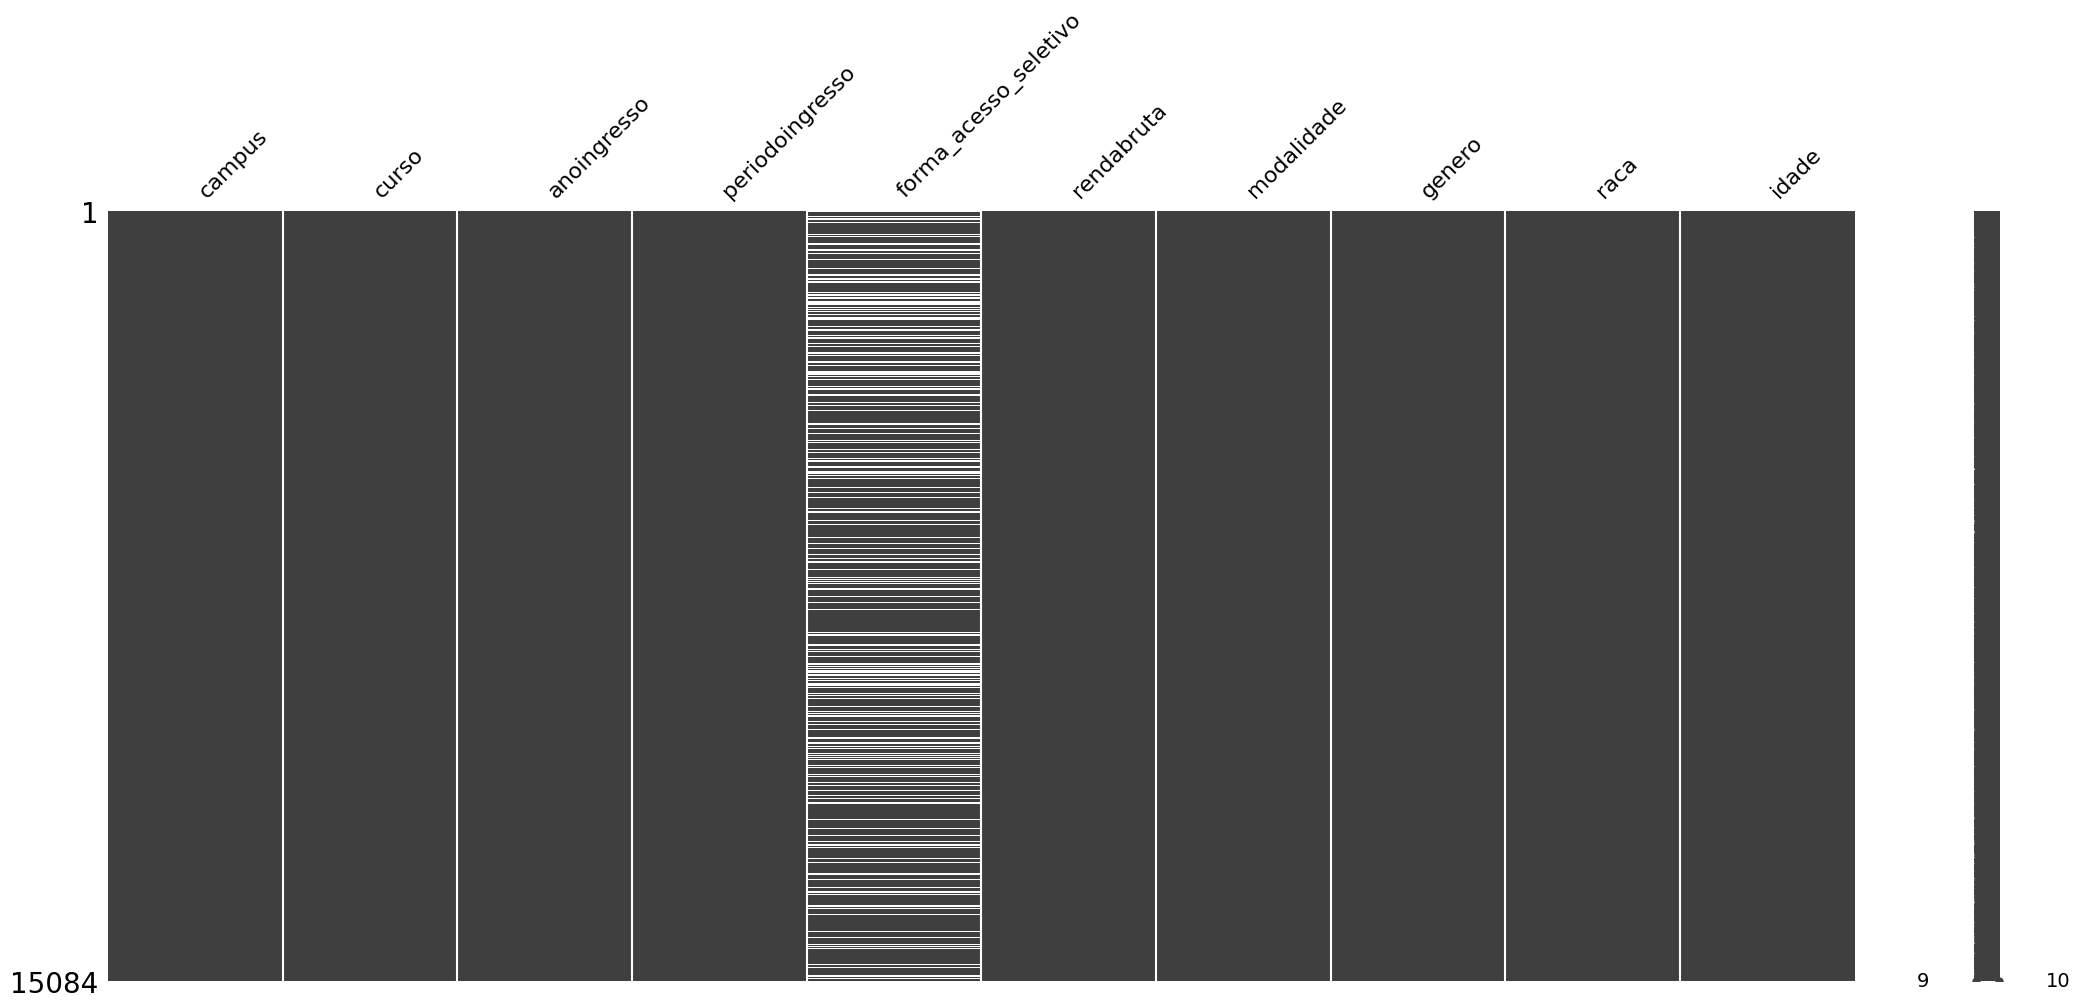

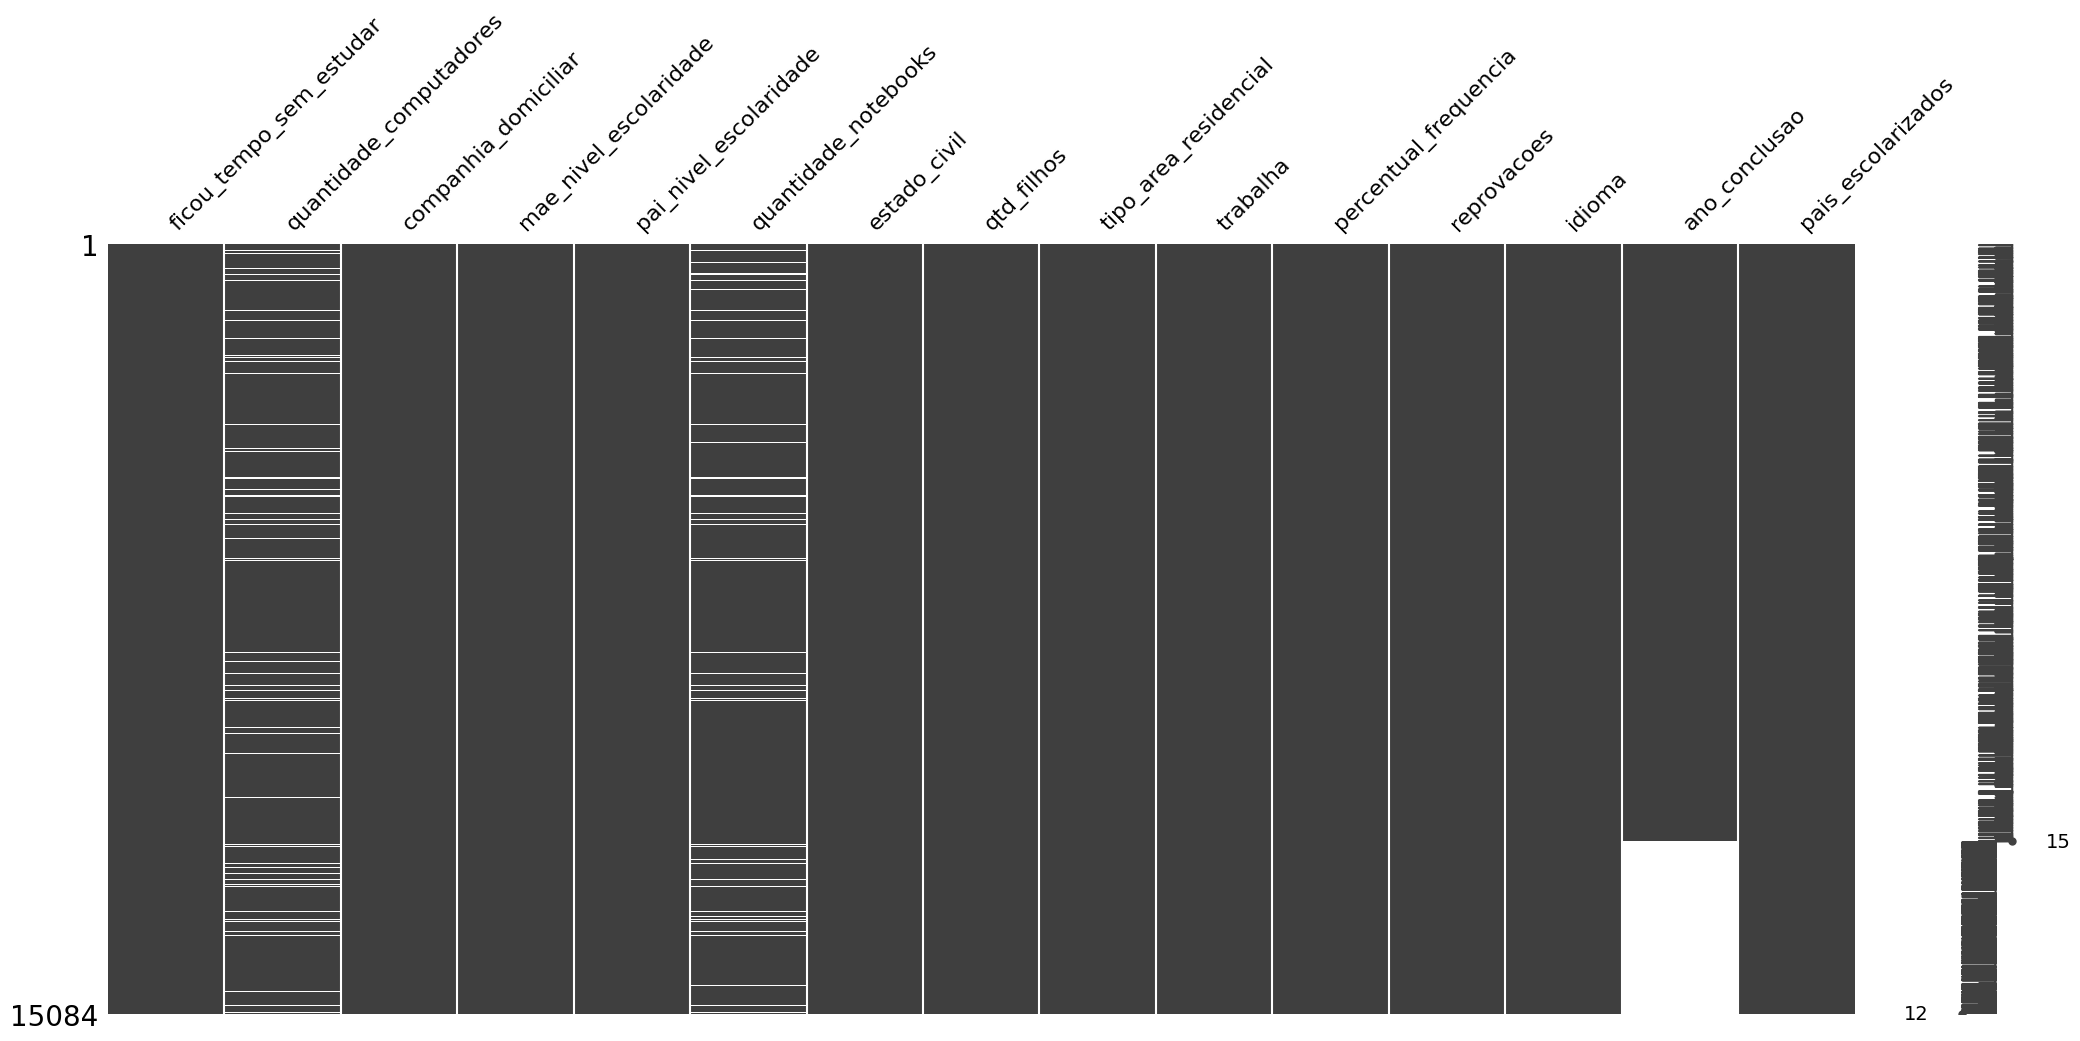

In [ ]:
# check pattern of missingness
msno.matrix(X.iloc[:,:10])
msno.matrix(X.iloc[:,10:])

<Axes: >

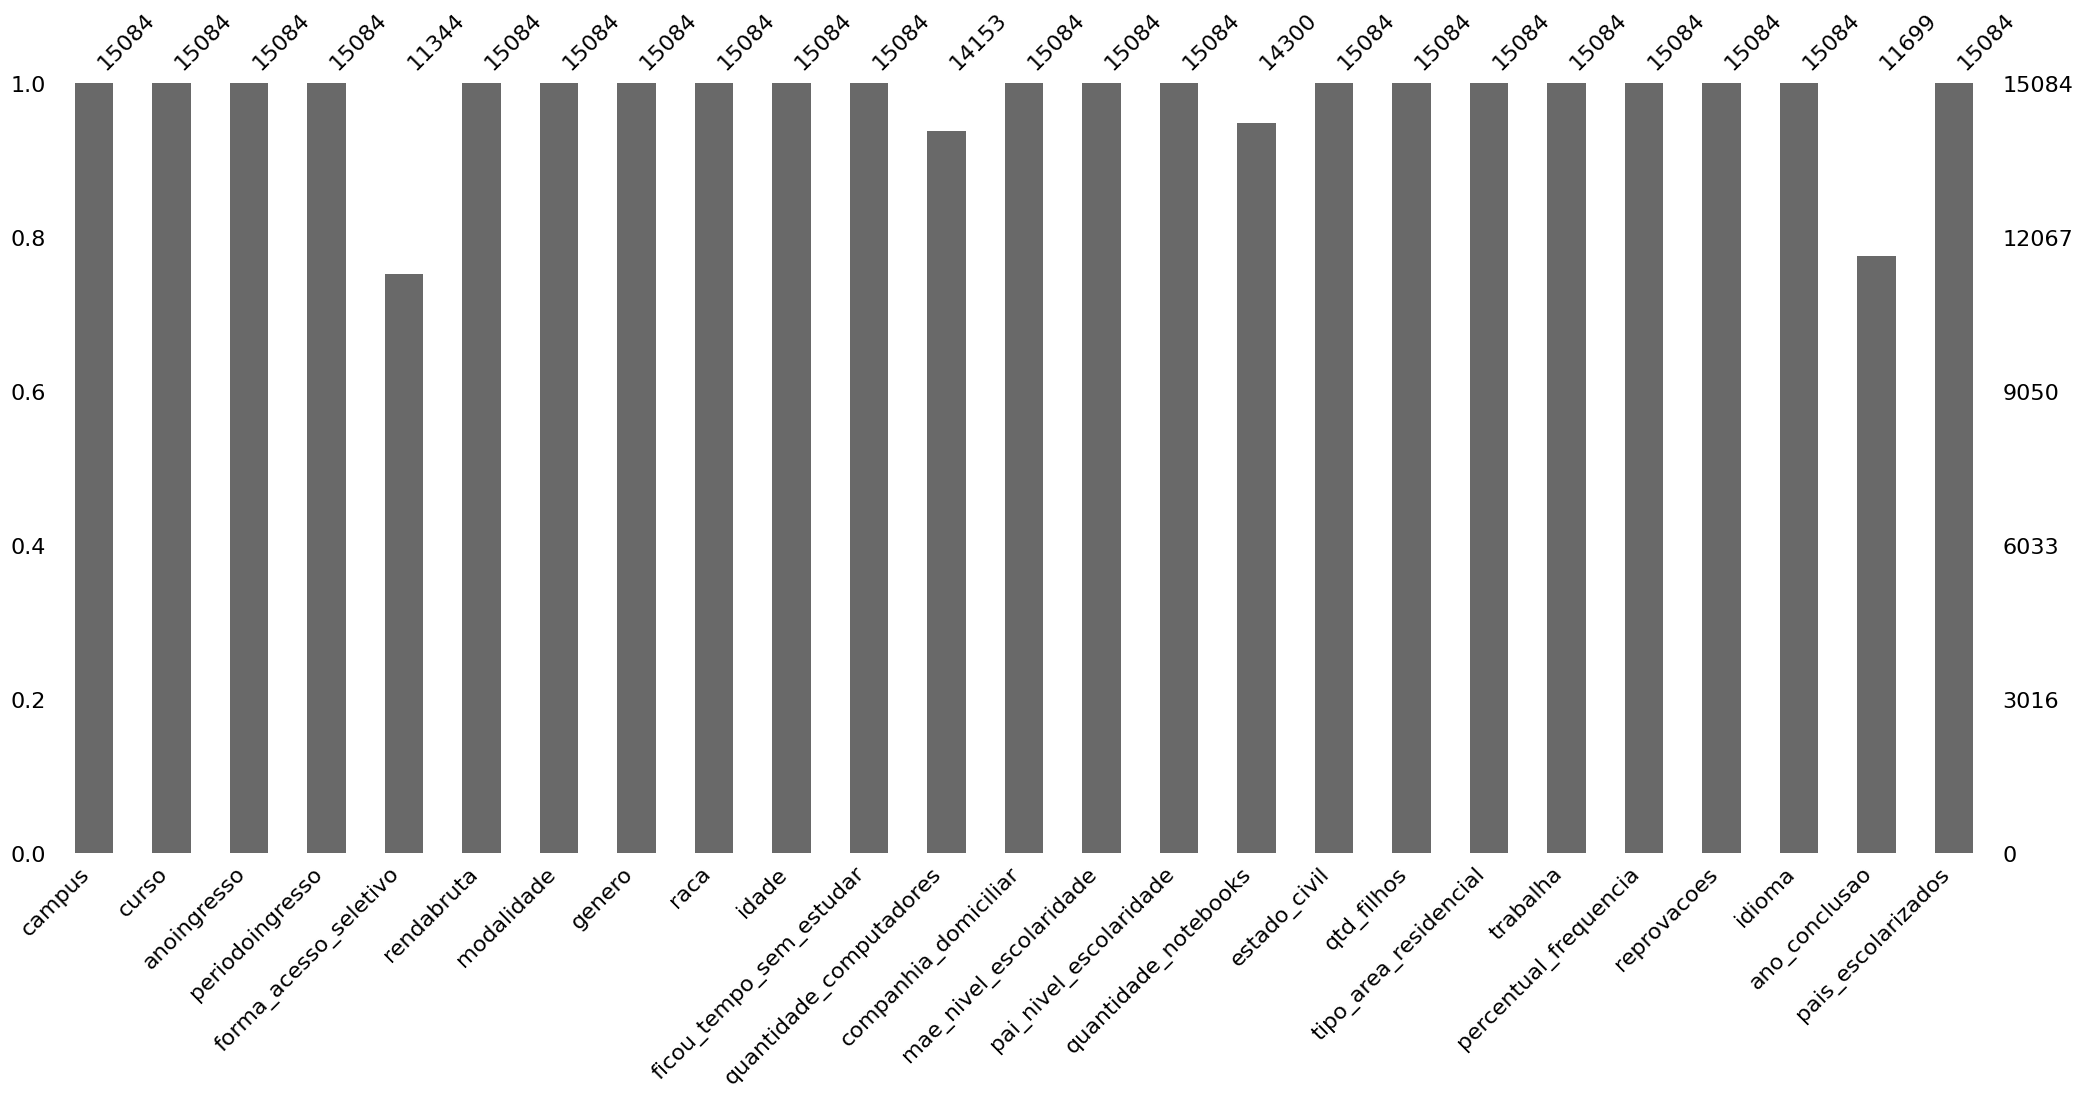

In [ ]:
msno.bar(X)

<Axes: >

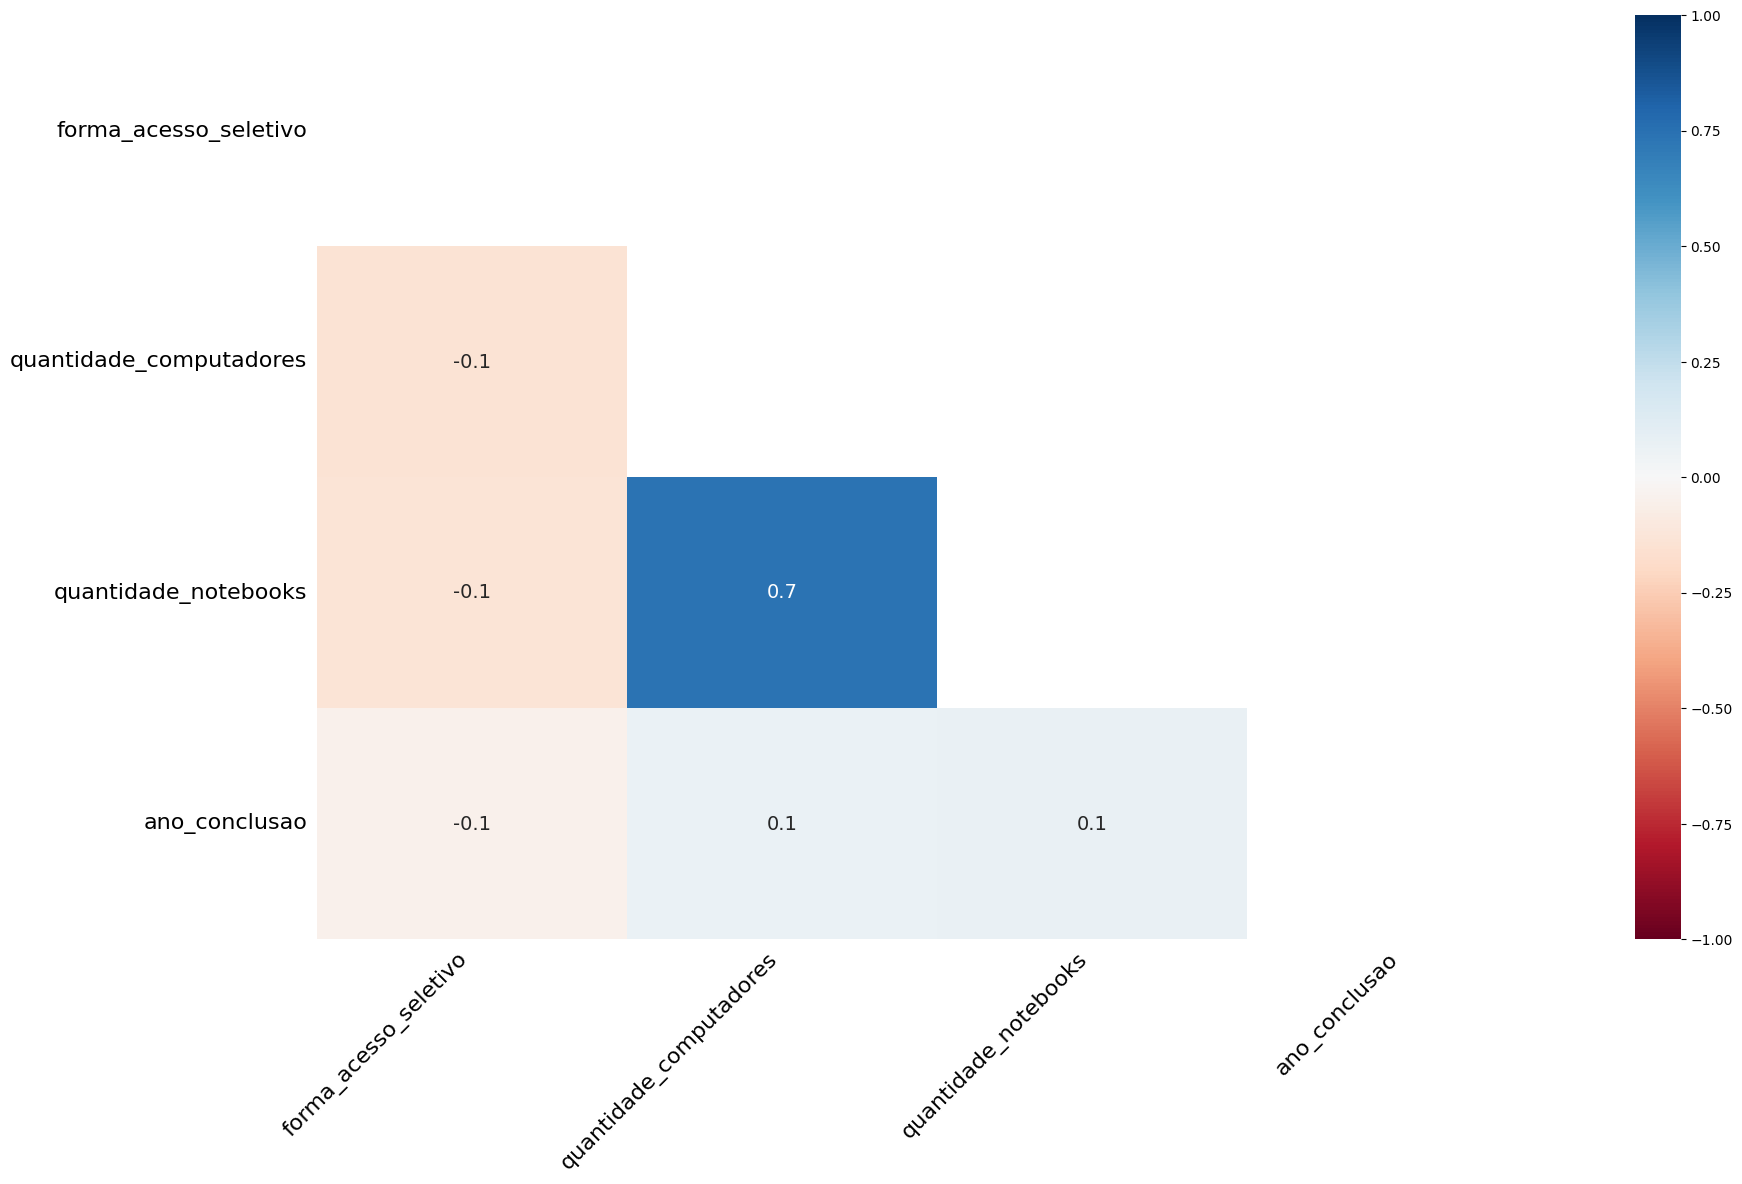

In [ ]:
msno.heatmap(X)

## Step 1: Structure a workflow systematically before writing any pipeline code

In this experiments, the preprocessing steps are categorised into 3 following sections:-

<ol>
  <li> Filtering
    <ul>
      <li>Drop columns with more than 50% of missingness</li>
      <li>Select numerical / category features depending on the pipeline flow</li>
    </ul>
  </li>
  <li> Missingness Treatment
    <ul>
      <li>Median imputation for numerical features</li>
      <li>Most frequent imputation for categorical features</li>
    </ul>
  </li>
  <li> Feature Engineering
    <ul>
      <li>Create practical and predictive features using domain knowledge (e.g. adding all bathrooms). Full details check on this link.</li>
      <li>Encode all categorical features’ items with less than 20% frequency as 'rare'.</li>
      <li>One hot encoding all categories features at last step of preprocessing in categorical pipeline.</li>
    </ul>
  </li>
</ol>

## Step 2: Create custom transformers in pipeline

<b>These are 4 configurations that I always used when creating custom transformer</b>
<ul>
<li>Add <i>BaseEstimator</i> & <i>TransformerMixinto</i> inherit get_params and fit_transform function. Personally, I always use fit_transform when I need to have a quick view on the output.</li>
<li>Defineself.variablesattributes so that you can easily select which columns to be applied on later</li>
<li>Definefitmethod. Depending on the transformation, if it doesn’t require fitting, just create a dummy fit function.</li>
<li>Definetransformmethod. This is used to transform original dataset to modified dataset based on your transformation method.</li>

## Step 3: Apply modular approach when creating pipelines

### Custom transformers

Following step 1 & 2, we will create 6 custom transformers in order for the pipeline to work.

<ul>
  <li><strong>DropFeatureSelector</strong>: Drop columns based on names</li>
  <li><strong>FeatureSelector</strong>: Select columns based on names</li>
  <li><strong>SimpleImputerCustom</strong>: Improvise onsklearn.impute.SimpleImputer function so it returns as dataframe instead of np.array.</li>
  <li><strong>DomainNumFE</strong>: Feature engineering technique for numerical features based on domain knowledge</li>
  <li><strong>OneHotEncoderCustom</strong>: Improvise onsklearn.preprocessing.OneHotEncoder function so it returns as dataframe instead of np.array.</li>
  <li><strong>DomainCatFE</strong>: Feature engineering technique for categorical features based on domain knowledge</li>
</ul>

In [ ]:
# from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectPercentile, chi2
# from sklearn.svm import SVC

# create custom transformer
class DropFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        # self.imprime(X)
        X_dropped = X.drop(self.variables, axis = 1)
        # self.imprime(X_dropped)
        return X_dropped
    def imprime(self,X):
      print('drop feature')
      print(X.shape)

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        return X.loc[:,self.variables]
      
class SimpleImputerCustom(BaseEstimator, TransformerMixin):
    def __init__(self, variables, strategy):
        self.variables = variables
        self.strategy = strategy
        self.imp = SimpleImputer(missing_values=np.nan,   
                    strategy=self.strategy)
    def fit(self, X, y = None):        
        X_ = X.loc[:,self.variables]
        self.imp.fit(X_)
        return self        
    def transform(self, X):
        X_ = X.loc[:,self.variables]
        # self.imprime(X_)
        X_transformed = pd.DataFrame(self.imp.transform(X_), 
                         columns= self.variables)
        X.drop(self.variables, axis= 1, inplace=True)
        X[self.variables] = X_transformed[self.variables].values
        # self.imprime(X)
        return X

    def imprime(self,X):
      print('imputer')
      print(len(X))

class CreateColumnAnoConclusao(BaseEstimator, TransformerMixin):
    def __init__(self, variables = None):
        self.variables = variables
    def fit(self, X, y =None):
        return self
    def transform(self, X):
        # source: https://www.kaggle.com/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition#Feature-Engineering
        
        ano_conclusao = pd.to_datetime(X['dataconclusao'],errors='coerce')
        X['ano_conclusao'] = ano_conclusao.dt.year

        # Preenchendo dados ausentes com 0
        X['ano_conclusao'].fillna(0, inplace=True)
        X['ano_conclusao'] = X['ano_conclusao'].apply(int)

        # Removendo linhas com ano de conclusão superior a 2022. (Foram removidas 3 linhas)
        # X = X[X['ano_conclusao']<2023]
        X = X[X['ano_conclusao']]

        # Removendo coluna (s)
        X.drop('dataconclusao', axis=1, inplace=True)

        return X

class ModificaRaca(BaseEstimator, TransformerMixin):
    def __init__(self, variables = None):
        self.variables = variables
    def fit(self, X, y =None):
        return self
    def transform(self, X):
        # source: https://www.kaggle.com/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition#Feature-Engineering
        
        # Alterando valores da coluna 'raca'
        X.loc[X.raca == "branca","raca"]="Branca"
        X.loc[X.raca == "BRANCA","raca"]="Branca"
        X.loc[X.raca == "PARDA","raca"]="Parda"
        X.loc[X.raca == "parda","raca"]="Parda"
        X.loc[X.raca == "indígena","raca"]="Indigena"
        X.loc[X.raca == "INDIGENA","raca"]="Indigena"
        X.loc[X.raca == "Indígena","raca"]="Indigena"
        X.loc[X.raca == "PRETA","raca"]="Preta"
        X.loc[X.raca == "preta","raca"]="Preta"
        X.loc[X.raca == "AMARELA","raca"]="Amarela"
        X.loc[X.raca == "amarela","raca"]="Amarela"
        X.loc[X.raca == "NAO INFORMADO","raca"]="Não Informado"

        return X    

class DatasetTratado(BaseEstimator, TransformerMixin):
    # def __init__(self, variables):
    def __init__(self, variables = None):
        # pass
        self.variables = variables
    def fit(self, X, y =None):
        return self
    def transform(self, X):
        global X_train_tratado, X_valid_tratado, eh_treino
        if eh_treino == 0:
          # X_ = pd.concat([X_,X])
          X_train_tratado = X          
        else:
          if eh_treino == 2:
            X_valid_tratado = X
        
        eh_treino += 1
        # atualiza_dataset(X)        
        # self.imprime(X)
        return X    
    def imprime(self,X):
      print('DADOS TRATADOS')
      detalhes_dataset_tratado(X)
      # print(len(X))
      # print(X) 

class LabelEncoderCustom(BaseEstimator, TransformerMixin):
  def __init__(self, variables):
        self.variables = variables
  def fit(self, X, y=None):
   return self
  def transform(self, X ,y=None):
    le=LabelEncoder()
    for i in X[self.variables]:
      X[i]=le.fit_transform(X[i])
    # self.imprime(X)
    return X 
  def imprime(self,X):
      print('label encoder')
      print(X.info())
      print(X.campus.value_counts()) 

class OneHotEncoderCustom(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables
        # self.ohe = OneHotEncoder(drop='first', handle_unknown = 'ignore')
        self.ohe = OneHotEncoder(handle_unknown = 'ignore')
  
    def fit(self, X, y = None):
        X_ = X.loc[:,self.variables]
        self.ohe.fit(X_)
        return self
      
    def transform(self, X):
        # self.imprime(X)
        X_ = X.loc[:,self.variables]
        # get one-hot encoded feature in df format
        X_transformed = pd.DataFrame(self.ohe.transform(X_).toarray(), columns= self.ohe.get_feature_names_out())
        
        # Remove columns that are one hot encoded in original df
        X.drop(self.variables, axis= 1, inplace=True)
        
        # Add one hot encoded feature to original df
        X[self.ohe.get_feature_names_out()] = X_transformed[self.ohe.get_feature_names_out()].values
        # print(X)
        # self.imprime(X)
        return X
    def imprime(self,X):      
      print('one-hot encoder')
      detalhes_dataset_tratado(X)

# OUTRA PROPOSTA DE CUSTOM PIPELINE PARA TRATAMENTO DE OUTILIERS
class OutlierReplace(BaseEstimator,TransformerMixin):
    def __init__(self,factor=2):
        self.factor = factor
        
    def outlier_detector(self,X,y=None):
        X = pd.Series(X).copy()
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        self.lower_bound.append(q1 - (self.factor * iqr))
        self.upper_bound.append(q3 + (self.factor * iqr))

    def fit(self,X,y=None):
        # self.imprime(X) 
        self.lower_bound = []
        self.upper_bound = []
        X.apply(self.outlier_detector)        
        return self
    
    def transform(self,X,y=None):
        
        X = pd.DataFrame(X).copy()
        for i in range(X.shape[1]):
            x = X.iloc[:, i].copy()
            mediana_coluna = x.median()
            x[(x < self.lower_bound[i]) | (x > self.upper_bound[i])] = mediana_coluna
            X.iloc[:, i] = x
        # print(X)
        return X

    def imprime(self,X):
      print('outlier')
      print(X.shape)

class ClfSwitcher(BaseEstimator):
    def __init__(self, estimator = LogisticRegression()):
        """
        A Custom BaseEstimator that can switch between classifiers.
        :param estimator: sklearn object - The classifier
        """ 
        self.estimator = estimator

    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self

    def predict(self, X, y=None):
        return self.estimator.predict(X)

    def predict_proba(self, X):
        return self.estimator.predict_proba(X)

    def score(self, X, y):
        return self.estimator.score(X, y)

# ------------------------------------------------------------------------------- #
# Custom class to allow shape of transformed x to be known to classifier
class ANOVASelection(BaseEstimator, TransformerMixin):
    def __init__(self, percentile=10):
        self.percentile = percentile
        self.m = None
        self.X_new = None
        self.scores_ = None

    def fit(self, X, y):
        self.m = SelectPercentile(f_classif, self.percentile)
        self.m.fit(X,y)
        self.scores_ = self.m.scores_
        return self

    def transform(self, X):
        global X_new
        self.X_new = self.m.transform(X)
        X_new = self.X_new
        return self.X_new

# ------------------------------------------------------------------------------- #

# def atualiza_dataset(X):
#   # print(X)
#   X_ = X

# class OneHotEncodercustom(BaseEstimator, TransformerMixin):
#     def __init__(self, variables):
#         self.variables = variables
#         self.ohe = OneHotEncoder(drop='first', 
#             handle_unknown = 'ignore')
#     def fit(self, X, y = None):
#         X_ = X.loc[:,self.variables]
#         self.ohe.fit(X_)
#         return self
#     def transform(self, X):
#         X_ = X.loc[:,self.variables]
#         X_transformed = pd.DataFrame(self.ohe.transform(X_).toarray(), 
#             columns= self.ohe.get_feature_names_out())
#         X.drop(self.variables, axis= 1, inplace=True)
#         X[self.ohe.get_feature_names_out()] = X_transformed[self.ohe.get_feature_names_out()].values

#         return X

# ------------------------------------------------------------------------------------------------------

# class DomainCatFE(BaseEstimator, TransformerMixin):
#     def __init__(self, variables = None):
#         self.variables = variables
#     def fit(self, X, y =None):
#         return self
#     def transform(self, X):
#       # source: https://www.kaggle.com/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition#Feature-Engineering
#       X_ = X.copy()
#       X_['BsmtFinType1_Unf'] = 1*(X_['BsmtFinType1'] == 'Unf')
#       X_['Total_Bathrooms'] = (X_['FullBath'] + (0.5 * X_['HalfBath'])  
#           + X_['BsmtFullBath'] + (0.5 * X_['BsmtHalfBath']))
#       X_['GarageCars'] = X_['GarageCars'].apply(lambda x: 0 
#           if x <= 0.0 else x)
#       X_['hasfireplace'] = X_['Fireplaces'].apply(lambda x: 1 
#           if x > 0 else 0)
#       return X_

# ------------------------------------------------------------------------------------------------------

# class CourseSituationFilter(BaseEstimator, TransformerMixin):
#     def __init__(self, variables = None):
#         self.variables = variables
#     def fit(self, X, y =None):
#         return self
#     def transform(self, X):
#         # source: https://www.kaggle.com/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition#Feature-Engineering
        
#         query = ['Concluído','Formado']
#         formados = X[X['situacao'].isin(query)]
#         formados.replace(['Concluído','Formado'], 1, inplace=True) # 1 - formado

#         query = ['Evasão','Cancelado','Cancelamento Compulsório','Jubilado','Transferido Externo']
#         evadidos = X[X['situacao'].isin(query)]

#         evadidos.replace(['Evasão','Cancelado','Cancelamento Compulsório','Jubilado','Transferido Externo'], 0, inplace=True) # 0 - evadido

#         X_ = pd.concat([formados, evadidos])

#         return X_

# ------------------------------------------------------------------------------------------------------

# class CourseModalityFilter(BaseEstimator, TransformerMixin):
#     def __init__(self, variables = None):
#         self.variables = variables
#     def fit(self, X, y =None):
#         return self
#     def transform(self, X):
#         # self.imprime(X)
#         # source: https://www.kaggle.com/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition#Feature-Engineering

#         filtro1 = X['modalidade'] == 'Concomitante'  # 1,5 anos para conclusão
#         filtro2 = X['modalidade'] == 'Integrado'     # 3 anos para conclusão
#         filtro3 = X['modalidade'] == 'Integrado EJA' # 3 anos para conclusão
#         filtro4 = X['modalidade'] == 'Subsequente'   # 1,5 anos para conclusão

#         X_ = X[filtro1 | filtro2 | filtro3 | filtro4]
#         # self.imprime(X_)
#         return X_

#     def imprime(self,X):
#       print('modalidade')
#       print(X.shape)

# ------------------------------------------------------------------------------------------------------

# class OutlierRemover(BaseEstimator,TransformerMixin):
#     def __init__(self, factor=1.5):
#         self.factor = factor
        
#     def outliers_iqr(self, X, y=None):
#         X = pd.Series(X).copy()
#         q1 = X.quantile(0.25)
#         q3 = X.quantile(0.75)
#         iqr = q3 - q1
#         lower_bound = q1 - (iqr * self.factor)
#         upper_bound = q3 + (iqr * self.factor)
#         # filter only those rows that are greater than lower_bound and less than upper_bound, 
#         #i.e. drop values outside the given interval
#         X.loc[((X >= lower_bound) & (X <= upper_bound))] 
        
#         return pd.Series(X)
    
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X):
#         return X.apply(self.outliers_iqr)

# ------------------------------------------------------------------------------------------------------

# class OutlierReplace(BaseEstimator,TransformerMixin):
#     def __init__(self,factor=1.5):
#         self.factor = factor
        
#     def outlier_removal(self,X,y=None):
#         X = pd.Series(X).copy()
#         print(X)
#         q1 = X.quantile(0.25)
#         q3 = X.quantile(0.75)
#         iqr = q3 - q1
#         lower_bound = q1 - (self.factor * iqr)
#         upper_bound = q3 + (self.factor * iqr)

#         mediana_coluna = X.median()
#         X.loc[((X < lower_bound) | (X > upper_bound))] = mediana_coluna 
#         return pd.Series(X)
    
#     def fit(self,X,y=None):
#         return self
    
#     def transform(self,X,y=None):
#         self.imprime(X)
#         return X.apply(self.outlier_removal)

#     def imprime(self,X):
#       print('outlier')
#       print(X.shape)

# ------------------------------------------------------------------------------------------------------

# class RemoveIQROutliers(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         pass
    
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X):
#         return X.loc[X != 'OUTLIER']

### Identificando colunas com nulos

In [ ]:
df.isnull().sum().sort_values(ascending=False)

pontuacao_seletivo            15084
razao_ausencia_educacional    14941
forma_acesso_seletivo          3740
ano_conclusao                  3385
quantidade_computadores         931
quantidade_notebooks            784
alunoid                           0
tipo_area_residencial             0
estado_civil                      0
qtd_filhos                        0
situacao                          0
trabalha                          0
mae_nivel_escolaridade            0
percentual_frequencia             0
reprovacoes                       0
idioma                            0
pai_nivel_escolaridade            0
exclusivo_rede_publica            0
companhia_domiciliar              0
campus                            0
ficou_tempo_sem_estudar           0
idade                             0
raca                              0
genero                            0
modalidade                        0
ira                               0
rendabruta                        0
periodoingresso             

In [ ]:
df.pontuacao_seletivo.isnull().sum()

15084

In [ ]:
df.situacao.isnull().any()

False

In [ ]:
# recuperando as colunas com valores nulos
# colunas_com_nulos = [var for var in df.drop(['alunoid','ira','pontuacao_seletivo','razao_ausencia_educacional','exclusivo_rede_publica'], axis=1).columns if (df[var].isnull().any())]
colunas_com_nulos = [var for var in X.columns if (X[var].isnull().any())]

# Colunas numéricas com nulos
colunas_numericas_com_nulos = [var for var in colunas_com_nulos if (X[var].dtype=='int64') | (X[var].dtype=='float64')]

# Colunas categóricas com nulos
colunas_categoricas_com_nulos = [var for var in colunas_com_nulos if (X[var].dtype=='object') | (X[var].dtype=='bool')]

# verificando o tipo das colunas com valores nulos
# for coluna in colunas_com_nulos:
#   print('{}: {}'.format(coluna, df[coluna].dtype))

In [ ]:
print(len(colunas_com_nulos),'=>',colunas_com_nulos)

4 => ['forma_acesso_seletivo', 'quantidade_computadores', 'quantidade_notebooks', 'ano_conclusao']


In [ ]:
colunas_categoricas_com_nulos

['forma_acesso_seletivo']

In [ ]:
colunas_numericas_com_nulos

['quantidade_computadores', 'quantidade_notebooks', 'ano_conclusao']

### Columns name list

In [ ]:
## Selecting categorical and numeric features
# numerical_cols = X.select_dtypes(include=np.number).columns
# categories_cols = X.drop(['genero', 'raca', 'estado_civil'], axis=1).select_dtypes(exclude=np.number).columns

# list for numerical columns
numerical_cols = [var for var in X if (X[var].dtype=='int64') | (X[var].dtype=='float64')]
# numerical_cols = [var for var in df.drop(['alunoid','ira','pontuacao_seletivo','razao_ausencia_educacional','exclusivo_rede_publica','situacao'], axis=1) if (df[var].dtype=='int64') | (df[var].dtype=='float64')]

# list for one hot encoding columns
ohe_cols = ['genero', 'raca', 'estado_civil']
le_cols = [var for var in X.columns if (X[var].dtype=='object') | (X[var].dtype=='bool')]
# le_cols = [var for var in df.drop(['alunoid','ira','genero', 'raca', 'estado_civil','pontuacao_seletivo','razao_ausencia_educacional','exclusivo_rede_publica'], axis=1).columns if (df[var].dtype=='object') | (df[var].dtype=='bool')]

le_cols = list(set(le_cols) - set(ohe_cols))

# list for categorical columns
categories_cols = [var for var in X.columns if (X[var].dtype=='object') | (X[var].dtype=='bool')]

In [ ]:
print(len(numerical_cols),"=>",numerical_cols)
print(len(categories_cols),"=>",categories_cols)
print(len(ohe_cols),"=>",ohe_cols)
print(len(le_cols),"=>",le_cols)

11 => ['anoingresso', 'periodoingresso', 'rendabruta', 'idade', 'quantidade_computadores', 'quantidade_notebooks', 'qtd_filhos', 'percentual_frequencia', 'reprovacoes', 'ano_conclusao', 'pais_escolarizados']
14 => ['campus', 'curso', 'forma_acesso_seletivo', 'modalidade', 'genero', 'raca', 'ficou_tempo_sem_estudar', 'companhia_domiciliar', 'mae_nivel_escolaridade', 'pai_nivel_escolaridade', 'estado_civil', 'tipo_area_residencial', 'trabalha', 'idioma']
3 => ['genero', 'raca', 'estado_civil']
11 => ['companhia_domiciliar', 'curso', 'forma_acesso_seletivo', 'mae_nivel_escolaridade', 'trabalha', 'modalidade', 'campus', 'idioma', 'tipo_area_residencial', 'ficou_tempo_sem_estudar', 'pai_nivel_escolaridade']


### Pipeline 1 (Component A): Numerical Preprocessing Pipeline

In [ ]:
# drop_features = DropFeatureSelector(variables=['pontuacao_seletivo','razao_ausencia_educacional','exclusivo_rede_publica'])

outlier_treatement = OutlierReplace()
scaler = StandardScaler()
df_tratado = DatasetTratado()

In [ ]:
num_feature_selector = FeatureSelector(variables=numerical_cols)

# Tratando colunas numericas com nulos
median_imputer = SimpleImputerCustom(variables=colunas_numericas_com_nulos,    
    strategy='median')

# num_fe_domain_knowledge = DomainNumFE()

# build preprocessing step for numerical data
num_preprocessing_pipe = Pipeline(
    steps=[        
        # ('drop_features',drop_features),
        ('num_feature_selector', num_feature_selector),   
        ('median_imputer',median_imputer),
        ('outliers', outlier_treatement), 
        # ('StandardScaler', scaler),
        # ('df_tratado', df_tratado),
        # ('num_fe_domain_knowledge',num_fe_domain_knowledge)
    ]
)

### Pipeline 2 (Component B): Categorical Preprocessing Pipeline

In [ ]:
# Filtrando o dataset por linhas
# cat_modality_domain_knowledge = CourseModalityFilter()
# cat_situation_domain_knowledge = CourseSituationFilter()

# Alterando coluna 'raça'
cat_raca_domain_knowledge = ModificaRaca()

# Transformando a coluna data_conclusao
cat_ano_conclusion_domain_knowledge = CreateColumnAnoConclusao()

# initialise categorical preprocessing step
cat_feature_selector = FeatureSelector(variables=categories_cols)

# Tratando colunas categóricas com nulos
mostfrequent_imputer = SimpleImputerCustom(variables= 
    colunas_categoricas_com_nulos, strategy='most_frequent')

# rare_encoder = encoding.RareLabelEncoder(tol=0.20, n_categories=2,
#     variables=ohe_cols, replace_with='rare')

ohe = OneHotEncoderCustom(variables=ohe_cols)
le = LabelEncoderCustom(variables=le_cols)

# cat_fe_domain_knowledge = DomainCatFE()

# build preprocessing step for categorical data
cat_preprocessing_pipe = Pipeline(steps=[
    # ('drop_features', drop_features),
    ("cat_feature_selector", cat_feature_selector),      
    # ('cat_modality_domain_knowledge', cat_modality_domain_knowledge), # se aplicar este transformador muitas instâncias serão removidas e dá erro na quantidade de instâncias de treino inicial e a atual  
    # ('cat_situation_domain_knowledge', cat_situation_domain_knowledge),  
    ('cat_raca_domain_knowledge', cat_raca_domain_knowledge),
    # ('cat_ano_conclusion_domain_knowledge', cat_ano_conclusion_domain_knowledge),    
    # ('mostfrequent_imputer',mostfrequent_imputer),    
    # # ('cat_fe_domain_knowledge',cat_fe_domain_knowledge),  
    # # ('rare_encoder',rare_encoder),
    ('ohe',ohe),
    ('le',le),           
    ('outliers', outlier_treatement), 
    # ('StandardScaler', scaler),
    ('df_tratado', df_tratado),
])

### Pipeline 3 (Component A + B): Numerical & Categorical Combined Pipeline

<b>FeatureUnion</b> is used to combine numerical & categorical pipeline together. In doing so, both pipelines will run in parallel instead of sequential.

In [ ]:
# initialise categorical preprocessing step
combined_preprocessing = FeatureUnion([
    ('numericals', num_preprocessing_pipe),
    ('categoricals', cat_preprocessing_pipe), 
    # ('StandardScaler', StandardScaler()),
])

## Step 4: Use Same Pipeline With Different Models To Evaluate Models’ Performance Quickly

### Pipeline 4 (Component A + B + C[m1, m2, m3]) : Numerical & Categorical Combined With Different Models Pipeline

In [ ]:
# Display pipeline
from sklearn.feature_selection import VarianceThreshold

from sklearn import set_config
set_config(display='diagram')

# from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score

from sklearn.feature_selection import SelectKBest,f_classif,chi2,mutual_info_classif

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)

import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import re

In [ ]:
# relatorio = classification_report(y_train, train_pred, output_dict=True)
# print(relatorio)
# list(classification_report(y_train, train_pred, output_dict=True)['macro avg'].values())
# desempenho_modelos = []
# desempenho_modelos.append({'modelo': 3, 'mesuare':list(relatorio['macro avg'].values())})
# desempenho_modelos.append({'modelo': 1, 'mesuare':list(relatorio['macro avg'].values())})
# desempenho_modelos[0]['mesuare']

In [ ]:
def plot_model_details(name, model, X_train_tratado, X_valid_tratado, train_pred, valid_pred, flag):   
    global desempenho_modelos
    # Evaluate model performance
    print('*' * 50)
    print(f'{name} Training score:')
    print(f'MAE: {round(mean_absolute_error(y_train, train_pred),4)} | RMSE: {round(mean_squared_error(y_train, train_pred, squared=False),4)} | R2: {round(r2_score(y_train, train_pred),4)}')
    print('-' * 20)
    print(f'{name} Validation score:')
    print(f'MAE: {round(mean_absolute_error(y_valid, valid_pred),4)} | RMSE: {round(mean_squared_error(y_valid, valid_pred, squared=False),4)} | R2: {round(r2_score(y_valid, valid_pred),4)}')

    print("Estatísticas do Treinamento")
    relatorio = classification_report(y_train, train_pred)
    print(relatorio)
    
    print("Estatísticas da Validação")
    print(classification_report(y_valid, valid_pred))

    print("Matriz de Confusão do Treinamento")
    cm = confusion_matrix(y_train, train_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    plt.show()

    print("Matriz de Confusão da Validação")
    cm = confusion_matrix(y_valid, valid_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    plt.show()
    
    print("Acurácia no treinamento")
    print(accuracy_score(y_train, train_pred.round()))    # print(accuracy_score(y_valid, valid_pred.round(), normalize=False))

    print("Acurácia na validação")
    acuracia = accuracy_score(y_valid, valid_pred.round())
    print(acuracia)    # print(accuracy_score(y_valid, valid_pred.round(), normalize=False))

    relatorio = classification_report(y_valid, valid_pred, output_dict=True)    
    y = list(relatorio['macro avg'].values())
    
    if flag:      
      desempenho_modelos.append({"modelo": name, "precision": round(y[0], 2), "recall": round(y[1], 2), "f1-score": round(y[2], 2), "support":y[3], "accuracy":round(acuracia, 2)})
    else:      
      desempenho_modelos_feature_selection.append({"modelo": name, "precision": round(y[0], 2), "recall": round(y[1], 2), "f1-score": round(y[2], 2), "support":y[3], "accuracy":round(acuracia, 2)})

    scores = None
    print(flag)
    if flag:
      scores = cross_val_score(model, X_valid, y_valid, cv=10)
      print("score: %.3f" % model.score(X_valid, y_valid)) 
    else:
      scores = cross_val_score(model, X_valid_tratado, y_valid, cv=10) 

    print('Scores 10-fold cross-validation:', scores)
    print('Média 10-fold cross-validation:', scores.mean() )
    print('Desvio padrão 10-fold cross-validation:', scores.std())

In [ ]:
def experimento_com_features_ultra_importantes(features_ultra_importantes):
  print('EXPERIMENTOS COM AS FEATURES UTILIZADAS EM TODOS OS MODELOS')
  # build final pipeline
  for name, model in models.items():
      complete_pipeline = Pipeline([
          ('preprocessing', combined_preprocessing),    
          # ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=num)),
          ('model', model)
      ])

      # create train & validation set
      X_train_feat_select = X_train_tratado[features_ultra_importantes]
      # X_train_feat_select = X_train_tratado[list(X_train_tratado.columns[features_ultra_importantes].to_list())]
      
      X_valid_feat_select = X_valid_tratado[features_ultra_importantes]
      # X_valid_feat_select = X_valid_tratado[list(X_valid_tratado.columns[features_ultra_importantes].to_list())]

      # model fitting
      model.fit(X_train_feat_select, y_train)
      # complete_pipeline.fit(X_train)

      # model scoring
      train_pred_feat_select = model.predict(X_train_feat_select)
      valid_pred_feat_select = model.predict(X_valid_feat_select)

      plot_model_details(name, model, X_train_feat_select, X_valid_feat_select, train_pred_feat_select, valid_pred_feat_select, 0)

In [ ]:
def detalhes_dataset_tratado(dataset, mensagem="Informações do dataset"):
  print(mensagem)
  print(dataset.shape)
  print(dataset.describe())

  print(dataset.isnull().sum())
  print(dataset.info())

  print(mensagem)
  dataset

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

Decision Tree Classifier


Pipeline(steps=[('preprocessing',
                 FeatureUnion(transformer_list=[('numericals',
                                                 Pipeline(steps=[('num_feature_selector',
                                                                  FeatureSelector(variables=['anoingresso',
                                                                                             'periodoingresso',
                                                                                             'rendabruta',
                                                                                             'idade',
                                                                                             'quantidade_computadores',
                                                                                             'quantidade_notebooks',
                                                                                             'qtd_filhos',
                                                                                             'percentual_frequencia',
                                                                                             'reprovacoes',
                                                                                             'ano_conclusao',
                                                                                             'pais_escolarizados'])),
                                                                 ('median_imp...
                                                                                                'forma_acesso_seletivo',
                                                                                                'mae_nivel_escolaridade',
                                                                                                'trabalha',
                                                                                                'modalidade',
                                                                                                'campus',
                                                                                                'idioma',
                                                                                                'tipo_area_residencial',
                                                                                                'ficou_tempo_sem_estudar',
                                                                                                'pai_nivel_escolaridade'])),
                                                                 ('outliers',
                                                                  OutlierReplace()),
                                                                 ('df_tratado',
                                                                  DatasetTratado())]))])),
                ('feature_selection',
                 SelectKBest(score_func=<function mutual_info_classif at 0x7f625b2a3310>)),
                ('model', DecisionTreeClassifier())])

features selecionadas
[ 0  3  5  6  9 10 11 12 14 20]
features do dataset
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[]
tamanho de x: 0
detalhes sobre o dataset tratado após treinamento
Total de atributos selecionados: 10
[ 0  3  5  6  9 10 11 12 14 20]
**************************************************
Decision Tree Classifier Training score:
MAE: 0.6654 | RMSE: 0.8157 | R2: -2.7793
--------------------
Decision Tree Classifier Validation score:
MAE: 0.5727 | RMSE: 0.7568 | R2: -2.3935
Estatísticas do Treinamento
              precision    recall  f1-score   support

           0       0.23      0.79      0.35      2408
           1       0.76      0.20      0.32      8150

    accuracy                           0.33     10558
   macro avg       0.50      0.50      0.33     10558
weighted avg       0.64      0.33      0.32     10558

Estatísticas da Validação
              precision    recall  f1-score   support

           0       0.23 

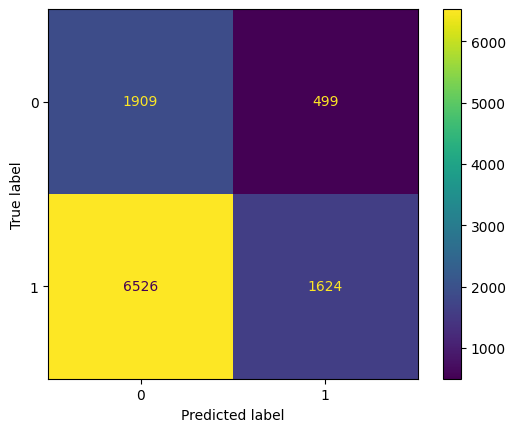

Matriz de Confusão da Validação


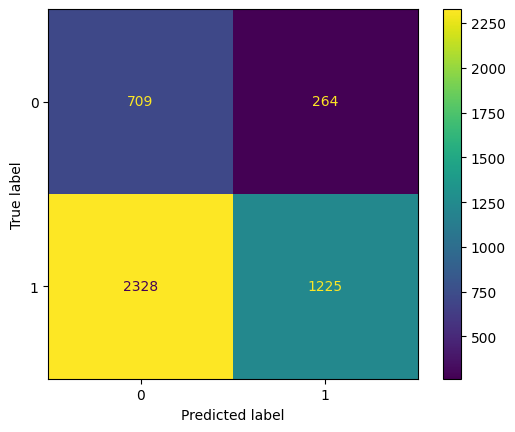

Acurácia no treinamento
0.3346277704110627
Acurácia na validação
0.4273088820150243
1
score: 0.427
Scores 10-fold cross-validation: [0.88300221 0.87637969 0.90066225 0.88741722 0.88741722 0.88962472
 0.90044248 0.89823009 0.88274336 0.90707965]
Média 10-fold cross-validation: 0.8912998886479517
Desvio padrão 10-fold cross-validation: 0.009305393962042033
Importância de cada feature selecionada pelo modelo para predição


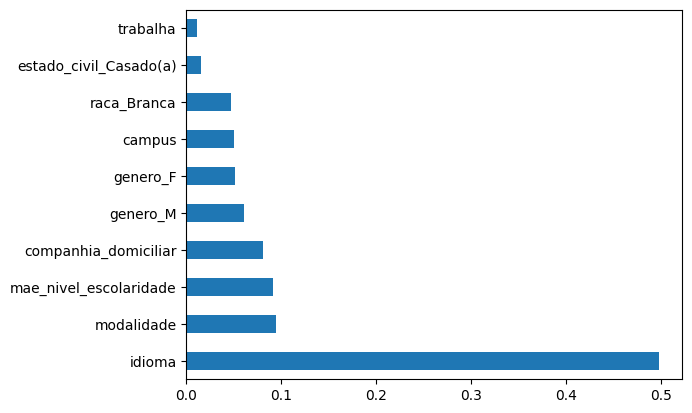



REPETINDO EXECUÇÃO DO ESTIMADOR DecisionTreeClassifier() COM AS [ 0  3  5  6  9 10 11 12 14 20] FEATURES MAIS IMPORTANTES
**************************************************
Decision Tree Classifier Training score:
MAE: 0.1339 | RMSE: 0.366 | R2: 0.2393
--------------------
Decision Tree Classifier Validation score:
MAE: 0.2735 | RMSE: 0.523 | R2: -0.6208
Estatísticas do Treinamento
              precision    recall  f1-score   support

           0       0.76      0.61      0.67      2408
           1       0.89      0.94      0.92      8150

    accuracy                           0.87     10558
   macro avg       0.82      0.77      0.79     10558
weighted avg       0.86      0.87      0.86     10558

Estatísticas da Validação
              precision    recall  f1-score   support

           0       0.34      0.29      0.31       973
           1       0.81      0.85      0.83      3553

    accuracy                           0.73      4526
   macro avg       0.58      0.57      0.5

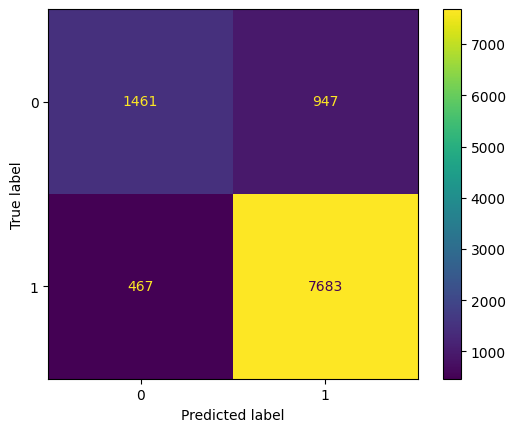

Matriz de Confusão da Validação


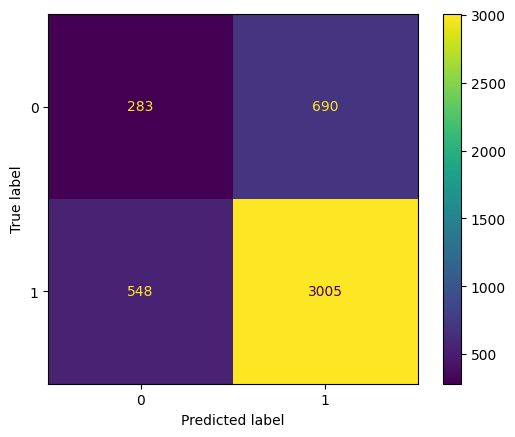

Acurácia no treinamento
0.8660731199090737
Acurácia na validação
0.7264692885550155
0
Scores 10-fold cross-validation: [0.71523179 0.69094923 0.6799117  0.68874172 0.68653422 0.72626932
 0.69469027 0.71017699 0.70132743 0.75442478]
Média 10-fold cross-validation: 0.7048257438121472
Desvio padrão 10-fold cross-validation: 0.021397013298002823
todas as features de cada estimador
[['campus', 'modalidade', 'companhia_domiciliar', 'mae_nivel_escolaridade', 'trabalha', 'idioma', 'genero_F', 'genero_M', 'raca_Branca', 'estado_civil_Casado(a)']]
Lista de features utilizadas por todos os classificadores
10
AdaBoost Classifier


Pipeline(steps=[('preprocessing',
                 FeatureUnion(transformer_list=[('numericals',
                                                 Pipeline(steps=[('num_feature_selector',
                                                                  FeatureSelector(variables=['anoingresso',
                                                                                             'periodoingresso',
                                                                                             'rendabruta',
                                                                                             'idade',
                                                                                             'quantidade_computadores',
                                                                                             'quantidade_notebooks',
                                                                                             'qtd_filhos',
                                                                                             'percentual_frequencia',
                                                                                             'reprovacoes',
                                                                                             'ano_conclusao',
                                                                                             'pais_escolarizados'])),
                                                                 ('median_imp...
                                                                                                'forma_acesso_seletivo',
                                                                                                'mae_nivel_escolaridade',
                                                                                                'trabalha',
                                                                                                'modalidade',
                                                                                                'campus',
                                                                                                'idioma',
                                                                                                'tipo_area_residencial',
                                                                                                'ficou_tempo_sem_estudar',
                                                                                                'pai_nivel_escolaridade'])),
                                                                 ('outliers',
                                                                  OutlierReplace()),
                                                                 ('df_tratado',
                                                                  DatasetTratado())]))])),
                ('feature_selection',
                 SelectKBest(score_func=<function mutual_info_classif at 0x7f625b2a3310>)),
                ('model', AdaBoostClassifier())])

features selecionadas
[ 0  3  5  6 10 11 12 14 18 20]
features do dataset
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[]
tamanho de x: 0
detalhes sobre o dataset tratado após treinamento
Total de atributos selecionados: 10
[ 0  3  5  6 10 11 12 14 18 20]
**************************************************
AdaBoost Classifier Training score:
MAE: 0.6893 | RMSE: 0.8303 | R2: -2.9154
--------------------
AdaBoost Classifier Validation score:
MAE: 0.6931 | RMSE: 0.8325 | R2: -3.107
Estatísticas do Treinamento
              precision    recall  f1-score   support

           0       0.24      0.94      0.38      2408
           1       0.88      0.12      0.22      8150

    accuracy                           0.31     10558
   macro avg       0.56      0.53      0.30     10558
weighted avg       0.74      0.31      0.26     10558

Estatísticas da Validação
              precision    recall  f1-score   support

           0       0.23      0.93  

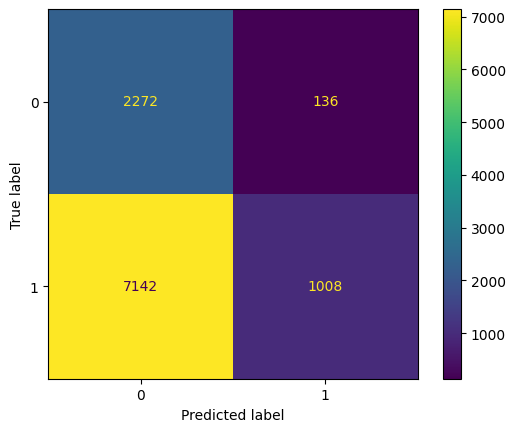

Matriz de Confusão da Validação


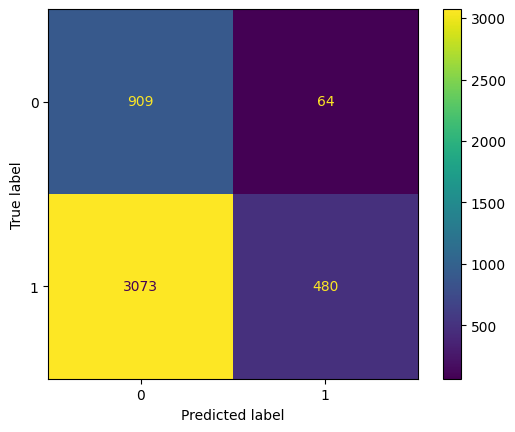

Acurácia no treinamento
0.3106648986550483
Acurácia na validação
0.3068935041979673
1
score: 0.307
Scores 10-fold cross-validation: [0.86754967 0.87196468 0.89845475 0.90286976 0.89624724 0.87196468
 0.88716814 0.90707965 0.84734513 0.89823009]
Média 10-fold cross-validation: 0.8848873781476488
Desvio padrão 10-fold cross-validation: 0.01831999200803304
Importância de cada feature selecionada pelo modelo para predição


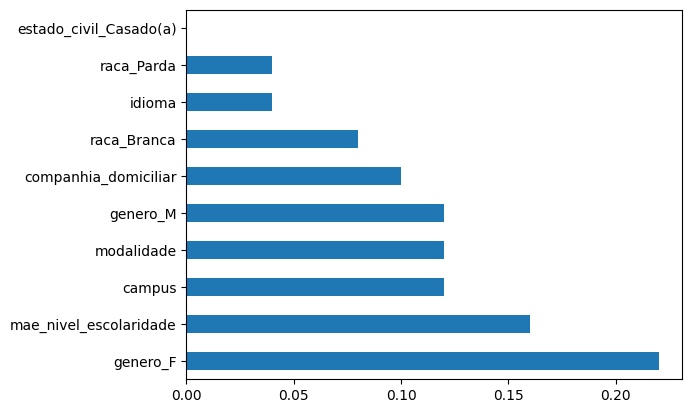



REPETINDO EXECUÇÃO DO ESTIMADOR AdaBoostClassifier() COM AS [ 0  3  5  6 10 11 12 14 18 20] FEATURES MAIS IMPORTANTES
**************************************************
AdaBoost Classifier Training score:
MAE: 0.2285 | RMSE: 0.478 | R2: -0.2976
--------------------
AdaBoost Classifier Validation score:
MAE: 0.2156 | RMSE: 0.4644 | R2: -0.2778
Estatísticas do Treinamento
              precision    recall  f1-score   support

           0       0.48      0.02      0.04      2408
           1       0.77      0.99      0.87      8150

    accuracy                           0.77     10558
   macro avg       0.63      0.51      0.46     10558
weighted avg       0.71      0.77      0.68     10558

Estatísticas da Validação
              precision    recall  f1-score   support

           0       0.46      0.02      0.03       973
           1       0.79      0.99      0.88      3553

    accuracy                           0.78      4526
   macro avg       0.62      0.51      0.46      4526


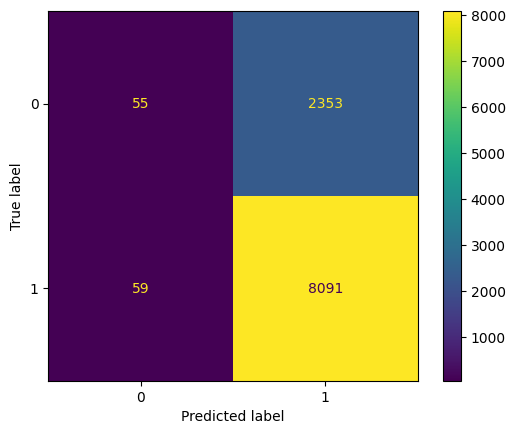

Matriz de Confusão da Validação


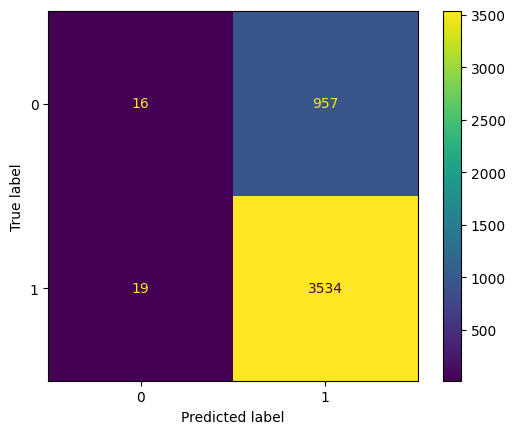

Acurácia no treinamento
0.7715476415987876
Acurácia na validação
0.7843570481661511
0
Scores 10-fold cross-validation: [0.78366446 0.78145695 0.77924945 0.77924945 0.77483444 0.78366446
 0.78761062 0.78097345 0.78539823 0.78761062]
Média 10-fold cross-validation: 0.7823712125651995
Desvio padrão 10-fold cross-validation: 0.0038274533954782267
todas as features de cada estimador
[['campus', 'modalidade', 'companhia_domiciliar', 'mae_nivel_escolaridade', 'trabalha', 'idioma', 'genero_F', 'genero_M', 'raca_Branca', 'estado_civil_Casado(a)'], ['campus', 'modalidade', 'companhia_domiciliar', 'mae_nivel_escolaridade', 'idioma', 'genero_F', 'genero_M', 'raca_Branca', 'raca_Parda', 'estado_civil_Casado(a)']]
Lista de features utilizadas por todos os classificadores
9
Random Forest Classifier


Pipeline(steps=[('preprocessing',
                 FeatureUnion(transformer_list=[('numericals',
                                                 Pipeline(steps=[('num_feature_selector',
                                                                  FeatureSelector(variables=['anoingresso',
                                                                                             'periodoingresso',
                                                                                             'rendabruta',
                                                                                             'idade',
                                                                                             'quantidade_computadores',
                                                                                             'quantidade_notebooks',
                                                                                             'qtd_filhos',
                                                                                             'percentual_frequencia',
                                                                                             'reprovacoes',
                                                                                             'ano_conclusao',
                                                                                             'pais_escolarizados'])),
                                                                 ('median_imp...
                                                                                                'forma_acesso_seletivo',
                                                                                                'mae_nivel_escolaridade',
                                                                                                'trabalha',
                                                                                                'modalidade',
                                                                                                'campus',
                                                                                                'idioma',
                                                                                                'tipo_area_residencial',
                                                                                                'ficou_tempo_sem_estudar',
                                                                                                'pai_nivel_escolaridade'])),
                                                                 ('outliers',
                                                                  OutlierReplace()),
                                                                 ('df_tratado',
                                                                  DatasetTratado())]))])),
                ('feature_selection',
                 SelectKBest(score_func=<function mutual_info_classif at 0x7f625b2a3310>)),
                ('model', RandomForestClassifier())])

features selecionadas
[ 0  3  5  6 10 11 12 14 16 18]
features do dataset
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[]
tamanho de x: 0
detalhes sobre o dataset tratado após treinamento
Total de atributos selecionados: 10
[ 0  3  5  6 10 11 12 14 16 18]
**************************************************
Random Forest Classifier Training score:
MAE: 0.7276 | RMSE: 0.853 | R2: -3.1328
--------------------
Random Forest Classifier Validation score:
MAE: 0.7397 | RMSE: 0.8601 | R2: -3.3832
Estatísticas do Treinamento
              precision    recall  f1-score   support

           0       0.23      0.97      0.38      2408
           1       0.88      0.07      0.12      8150

    accuracy                           0.27     10558
   macro avg       0.55      0.52      0.25     10558
weighted avg       0.73      0.27      0.18     10558

Estatísticas da Validação
              precision    recall  f1-score   support

           0       0.21  

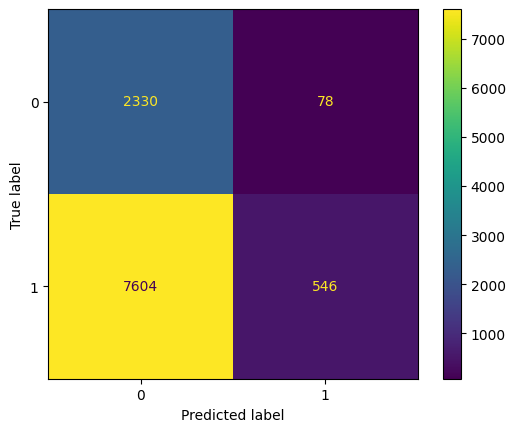

Matriz de Confusão da Validação


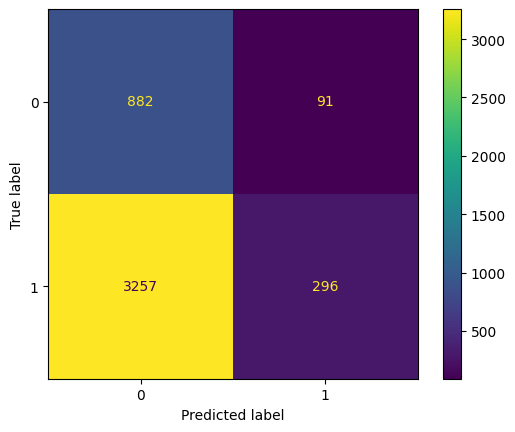

Acurácia no treinamento
0.2724000757719265
Acurácia na validação
0.2602739726027397
1
score: 0.260
Scores 10-fold cross-validation: [0.88520971 0.88300221 0.90728477 0.90728477 0.88741722 0.90066225
 0.90707965 0.90486726 0.87389381 0.8960177 ]
Média 10-fold cross-validation: 0.8952719334231963
Desvio padrão 10-fold cross-validation: 0.011490151268223794
Importância de cada feature selecionada pelo modelo para predição


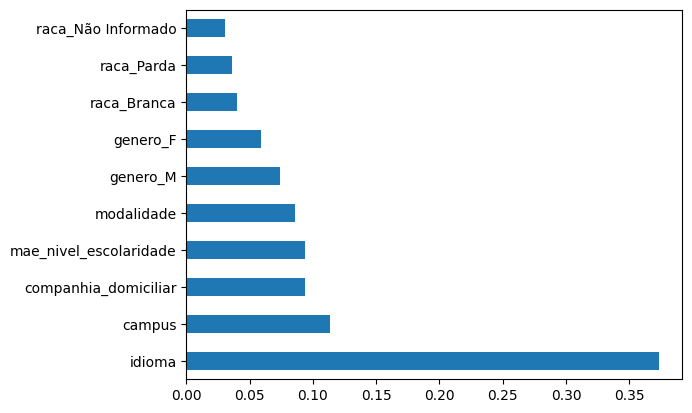



REPETINDO EXECUÇÃO DO ESTIMADOR RandomForestClassifier() COM AS [ 0  3  5  6 10 11 12 14 16 18] FEATURES MAIS IMPORTANTES
**************************************************
Random Forest Classifier Training score:
MAE: 0.1345 | RMSE: 0.3667 | R2: 0.2361
--------------------
Random Forest Classifier Validation score:
MAE: 0.2519 | RMSE: 0.5019 | R2: -0.4925
Estatísticas do Treinamento
              precision    recall  f1-score   support

           0       0.82      0.53      0.64      2408
           1       0.87      0.97      0.92      8150

    accuracy                           0.87     10558
   macro avg       0.85      0.75      0.78     10558
weighted avg       0.86      0.87      0.85     10558

Estatísticas da Validação
              precision    recall  f1-score   support

           0       0.35      0.21      0.26       973
           1       0.80      0.90      0.85      3553

    accuracy                           0.75      4526
   macro avg       0.58      0.55      0

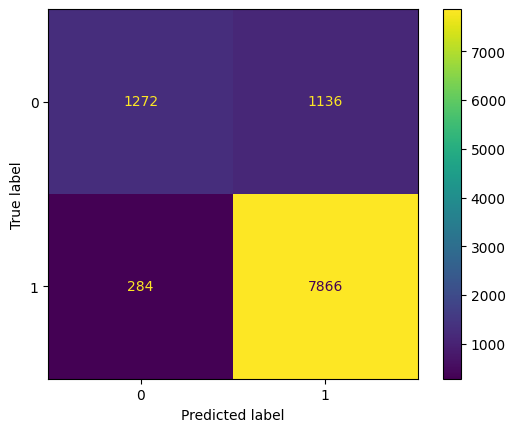

Matriz de Confusão da Validação


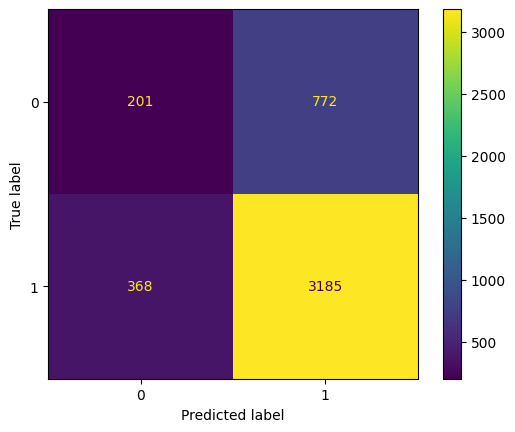

Acurácia no treinamento
0.8655048304603145
Acurácia na validação
0.7481219619973487
0
Scores 10-fold cross-validation: [0.72406181 0.7196468  0.74834437 0.74392936 0.71523179 0.73951435
 0.73672566 0.74557522 0.76327434 0.77654867]
Média 10-fold cross-validation: 0.7412852370626503
Desvio padrão 10-fold cross-validation: 0.018082680876838474
todas as features de cada estimador
[['campus', 'modalidade', 'companhia_domiciliar', 'mae_nivel_escolaridade', 'trabalha', 'idioma', 'genero_F', 'genero_M', 'raca_Branca', 'estado_civil_Casado(a)'], ['campus', 'modalidade', 'companhia_domiciliar', 'mae_nivel_escolaridade', 'idioma', 'genero_F', 'genero_M', 'raca_Branca', 'raca_Parda', 'estado_civil_Casado(a)'], ['campus', 'modalidade', 'companhia_domiciliar', 'mae_nivel_escolaridade', 'idioma', 'genero_F', 'genero_M', 'raca_Branca', 'raca_Não Informado', 'raca_Parda']]
Lista de features utilizadas por todos os classificadores
8
GradientBoostingClassifier


Pipeline(steps=[('preprocessing',
                 FeatureUnion(transformer_list=[('numericals',
                                                 Pipeline(steps=[('num_feature_selector',
                                                                  FeatureSelector(variables=['anoingresso',
                                                                                             'periodoingresso',
                                                                                             'rendabruta',
                                                                                             'idade',
                                                                                             'quantidade_computadores',
                                                                                             'quantidade_notebooks',
                                                                                             'qtd_filhos',
                                                                                             'percentual_frequencia',
                                                                                             'reprovacoes',
                                                                                             'ano_conclusao',
                                                                                             'pais_escolarizados'])),
                                                                 ('median_imp...
                                                                                                'forma_acesso_seletivo',
                                                                                                'mae_nivel_escolaridade',
                                                                                                'trabalha',
                                                                                                'modalidade',
                                                                                                'campus',
                                                                                                'idioma',
                                                                                                'tipo_area_residencial',
                                                                                                'ficou_tempo_sem_estudar',
                                                                                                'pai_nivel_escolaridade'])),
                                                                 ('outliers',
                                                                  OutlierReplace()),
                                                                 ('df_tratado',
                                                                  DatasetTratado())]))])),
                ('feature_selection',
                 SelectKBest(score_func=<function mutual_info_classif at 0x7f625b2a3310>)),
                ('model', GradientBoostingClassifier())])

features selecionadas
[ 0  3  5  6 10 11 12 14 20 22]
features do dataset
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[]
tamanho de x: 0
detalhes sobre o dataset tratado após treinamento
Total de atributos selecionados: 10
[ 0  3  5  6 10 11 12 14 20 22]
**************************************************
GradientBoostingClassifier Training score:
MAE: 0.7511 | RMSE: 0.8667 | R2: -3.2662
--------------------
GradientBoostingClassifier Validation score:
MAE: 0.7693 | RMSE: 0.8771 | R2: -3.5586
Estatísticas do Treinamento
              precision    recall  f1-score   support

           0       0.23      0.98      0.37      2408
           1       0.83      0.03      0.07      8150

    accuracy                           0.25     10558
   macro avg       0.53      0.50      0.22     10558
weighted avg       0.69      0.25      0.14     10558

Estatísticas da Validação
              precision    recall  f1-score   support

           0       0

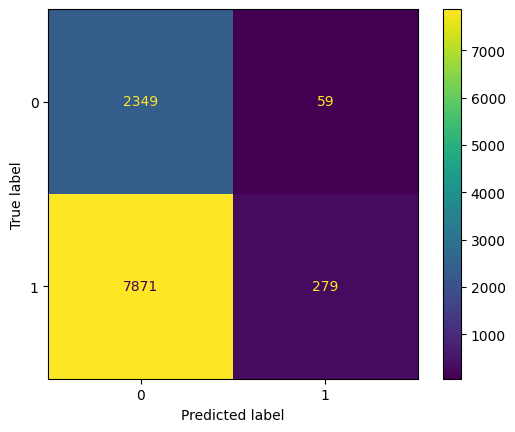

Matriz de Confusão da Validação


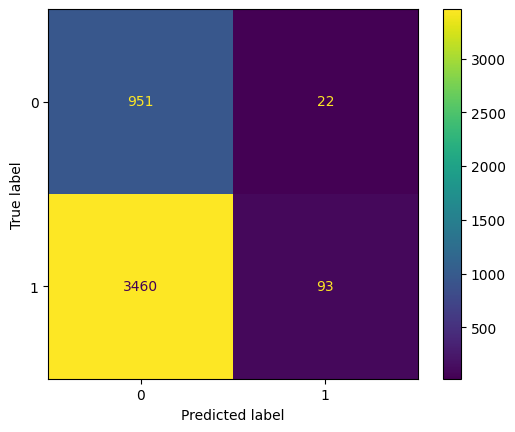

Acurácia no treinamento
0.2489107785565448
Acurácia na validação
0.23066725585505965
1
score: 0.231
Scores 10-fold cross-validation: [0.89183223 0.90286976 0.91169978 0.87417219 0.9205298  0.89403974
 0.90707965 0.91150442 0.85619469 0.9159292 ]
Média 10-fold cross-validation: 0.8985851452460489
Desvio padrão 10-fold cross-validation: 0.019159869633497802
Importância de cada feature selecionada pelo modelo para predição


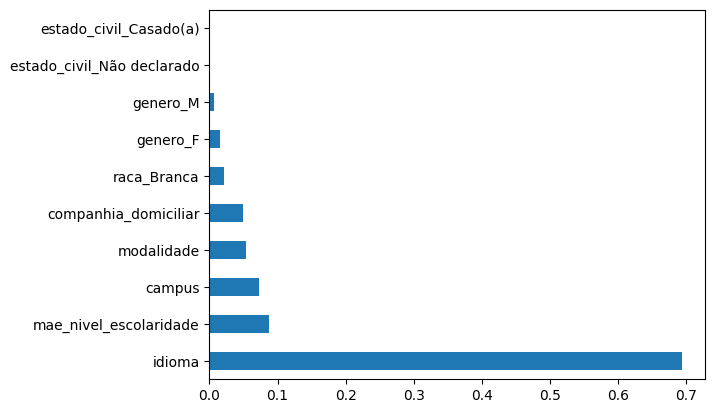



REPETINDO EXECUÇÃO DO ESTIMADOR GradientBoostingClassifier() COM AS [ 0  3  5  6 10 11 12 14 20 22] FEATURES MAIS IMPORTANTES
**************************************************
GradientBoostingClassifier Training score:
MAE: 0.2226 | RMSE: 0.4718 | R2: -0.2643
--------------------
GradientBoostingClassifier Validation score:
MAE: 0.2143 | RMSE: 0.4629 | R2: -0.2699
Estatísticas do Treinamento
              precision    recall  f1-score   support

           0       0.66      0.05      0.09      2408
           1       0.78      0.99      0.87      8150

    accuracy                           0.78     10558
   macro avg       0.72      0.52      0.48     10558
weighted avg       0.75      0.78      0.70     10558

Estatísticas da Validação
              precision    recall  f1-score   support

           0       0.53      0.03      0.06       973
           1       0.79      0.99      0.88      3553

    accuracy                           0.79      4526
   macro avg       0.66      0.

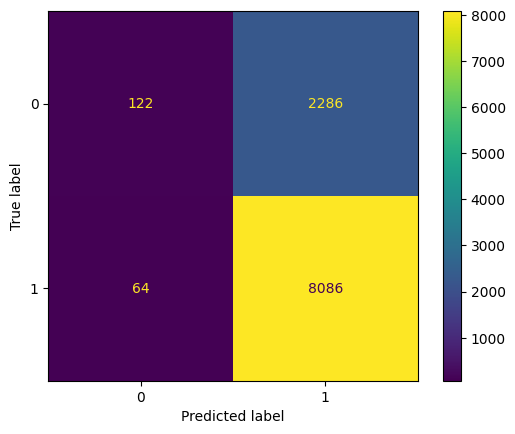

Matriz de Confusão da Validação


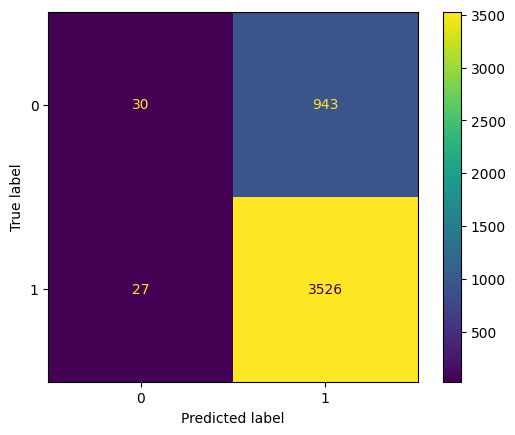

Acurácia no treinamento
0.7774199659026331
Acurácia na validação
0.7856827220503756
0
Scores 10-fold cross-validation: [0.78587196 0.77483444 0.77924945 0.78145695 0.77704194 0.77924945
 0.78761062 0.77654867 0.78761062 0.78761062]
Média 10-fold cross-validation: 0.7817084725233936
Desvio padrão 10-fold cross-validation: 0.0047921805752302385
todas as features de cada estimador
[['campus', 'modalidade', 'companhia_domiciliar', 'mae_nivel_escolaridade', 'trabalha', 'idioma', 'genero_F', 'genero_M', 'raca_Branca', 'estado_civil_Casado(a)'], ['campus', 'modalidade', 'companhia_domiciliar', 'mae_nivel_escolaridade', 'idioma', 'genero_F', 'genero_M', 'raca_Branca', 'raca_Parda', 'estado_civil_Casado(a)'], ['campus', 'modalidade', 'companhia_domiciliar', 'mae_nivel_escolaridade', 'idioma', 'genero_F', 'genero_M', 'raca_Branca', 'raca_Não Informado', 'raca_Parda'], ['campus', 'modalidade', 'companhia_domiciliar', 'mae_nivel_escolaridade', 'idioma', 'genero_F', 'genero_M', 'raca_Branca', 'esta

Pipeline(steps=[('preprocessing',
                 FeatureUnion(transformer_list=[('numericals',
                                                 Pipeline(steps=[('num_feature_selector',
                                                                  FeatureSelector(variables=['anoingresso',
                                                                                             'periodoingresso',
                                                                                             'rendabruta',
                                                                                             'idade',
                                                                                             'quantidade_computadores',
                                                                                             'quantidade_notebooks',
                                                                                             'qtd_filhos',
                                                                                             'percentual_frequencia',
                                                                                             'reprovacoes',
                                                                                             'ano_conclusao',
                                                                                             'pais_escolarizados'])),
                                                                 ('median_imp...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

features selecionadas
[ 0  3  5  6 10 11 12 14 16 17]
features do dataset
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[]
tamanho de x: 0
detalhes sobre o dataset tratado após treinamento
Total de atributos selecionados: 10
[ 0  3  5  6 10 11 12 14 16 17]
**************************************************
XGB Classifier Training score:
MAE: 0.6899 | RMSE: 0.8306 | R2: -2.9187
--------------------
XGB Classifier Validation score:
MAE: 0.6659 | RMSE: 0.816 | R2: -2.9459
Estatísticas do Treinamento
              precision    recall  f1-score   support

           0       0.24      0.97      0.39      2408
           1       0.92      0.12      0.21      8150

    accuracy                           0.31     10558
   macro avg       0.58      0.54      0.30     10558
weighted avg       0.77      0.31      0.25     10558

Estatísticas da Validação
              precision    recall  f1-score   support

           0       0.21      0.79      0.34  

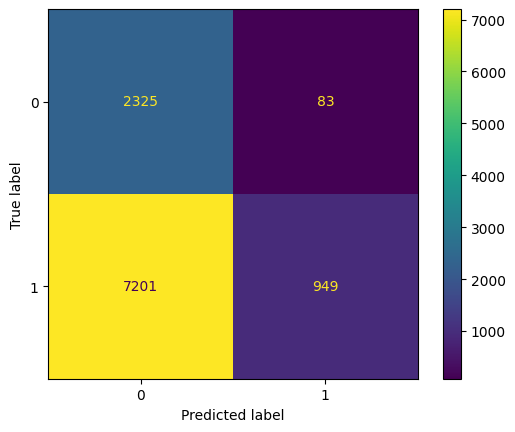

Matriz de Confusão da Validação


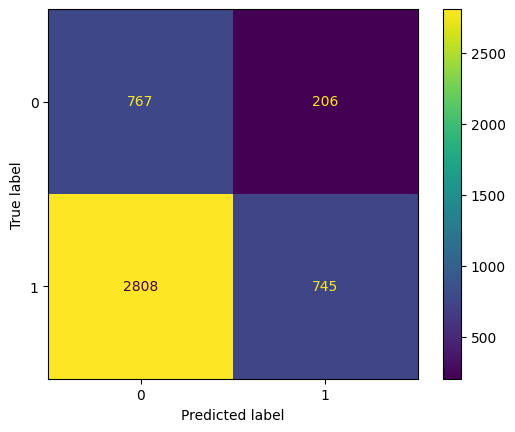

Acurácia no treinamento
0.31009660920628906
Acurácia na validação
0.33406981882456915
1
score: 0.334
Scores 10-fold cross-validation: [0.88962472 0.89183223 0.92715232 0.88741722 0.90286976 0.88741722
 0.90486726 0.88716814 0.88495575 0.92035398]
Média 10-fold cross-validation: 0.8983658598527027
Desvio padrão 10-fold cross-validation: 0.014278487663214622
Importância de cada feature selecionada pelo modelo para predição


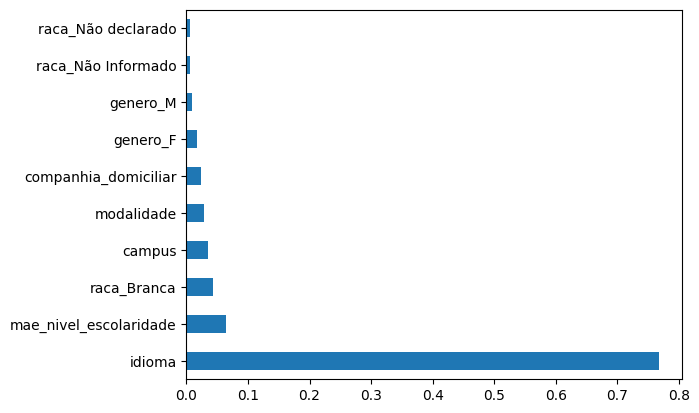



REPETINDO EXECUÇÃO DO ESTIMADOR XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) COM AS [ 0  3  5  6 10 11 12 14 16 17] FEATURES MAIS IMPORTANTES
**************************************************
XGB Classifier Training score:
MAE: 0.1845 | RMSE: 0.4295 | R2: -0.048
--------------------
XGB Cl

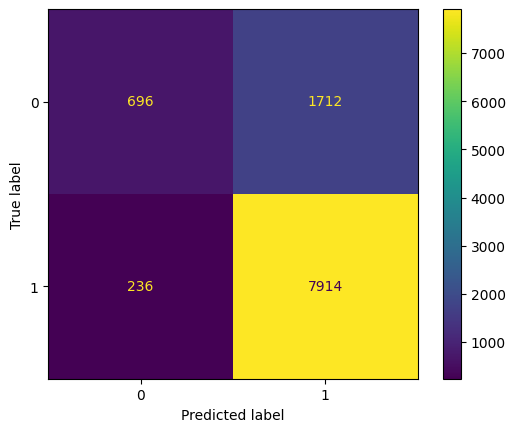

Matriz de Confusão da Validação


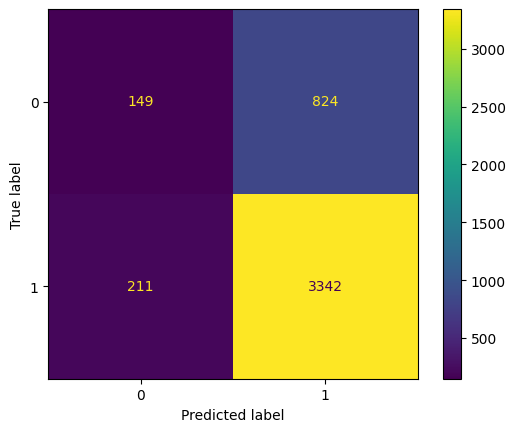

Acurácia no treinamento
0.8154953589695018
Acurácia na validação
0.771321254971277
0
Scores 10-fold cross-validation: [0.76821192 0.75055188 0.7593819  0.77041943 0.75275938 0.77041943
 0.75442478 0.73230088 0.76769912 0.78761062]
Média 10-fold cross-validation: 0.7613779327589911
Desvio padrão 10-fold cross-validation: 0.01423938171498554
todas as features de cada estimador
[['campus', 'modalidade', 'companhia_domiciliar', 'mae_nivel_escolaridade', 'trabalha', 'idioma', 'genero_F', 'genero_M', 'raca_Branca', 'estado_civil_Casado(a)'], ['campus', 'modalidade', 'companhia_domiciliar', 'mae_nivel_escolaridade', 'idioma', 'genero_F', 'genero_M', 'raca_Branca', 'raca_Parda', 'estado_civil_Casado(a)'], ['campus', 'modalidade', 'companhia_domiciliar', 'mae_nivel_escolaridade', 'idioma', 'genero_F', 'genero_M', 'raca_Branca', 'raca_Não Informado', 'raca_Parda'], ['campus', 'modalidade', 'companhia_domiciliar', 'mae_nivel_escolaridade', 'idioma', 'genero_F', 'genero_M', 'raca_Branca', 'estado_

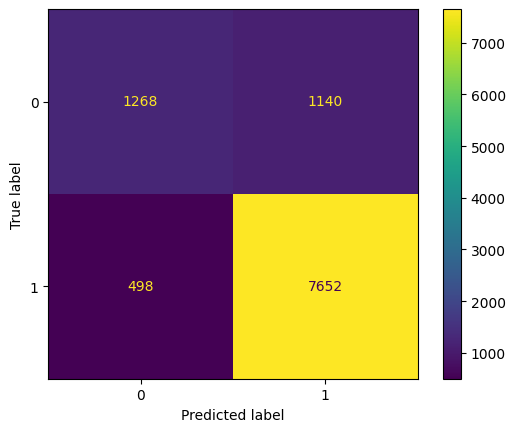

Matriz de Confusão da Validação


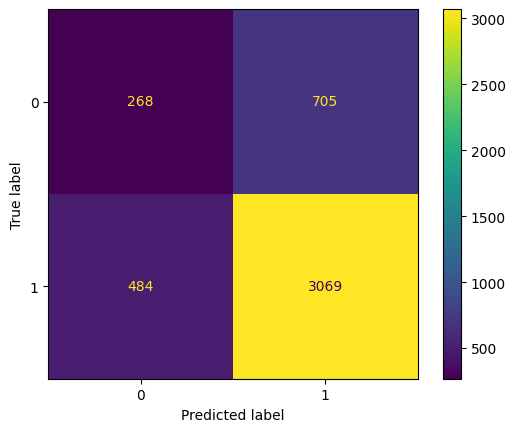

Acurácia no treinamento
0.8448569804887289
Acurácia na validação
0.7372956252761821
0
Scores 10-fold cross-validation: [0.73289183 0.66445916 0.68653422 0.69757174 0.69315673 0.69757174
 0.7079646  0.70132743 0.71017699 0.73230088]
Média 10-fold cross-validation: 0.7023955341968001
Desvio padrão 10-fold cross-validation: 0.01933831373605767
**************************************************
AdaBoost Classifier Training score:
MAE: 0.2285 | RMSE: 0.478 | R2: -0.2976
--------------------
AdaBoost Classifier Validation score:
MAE: 0.2156 | RMSE: 0.4644 | R2: -0.2778
Estatísticas do Treinamento
              precision    recall  f1-score   support

           0       0.48      0.02      0.04      2408
           1       0.77      0.99      0.87      8150

    accuracy                           0.77     10558
   macro avg       0.63      0.51      0.46     10558
weighted avg       0.71      0.77      0.68     10558

Estatísticas da Validação
              precision    recall  f1-score   sup

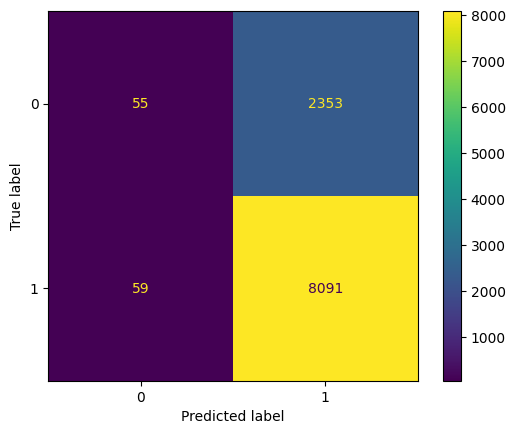

Matriz de Confusão da Validação


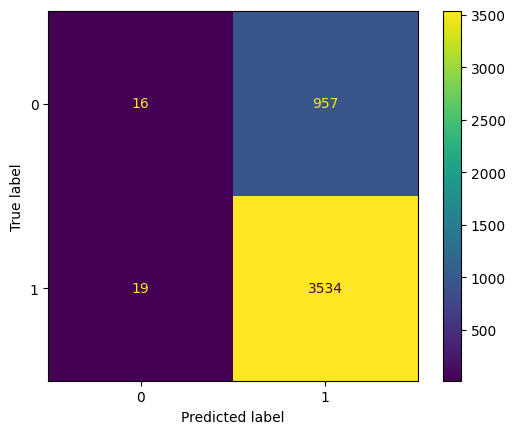

Acurácia no treinamento
0.7715476415987876
Acurácia na validação
0.7843570481661511
0
Scores 10-fold cross-validation: [0.78366446 0.78145695 0.77924945 0.77924945 0.78145695 0.78366446
 0.78982301 0.78097345 0.78539823 0.78761062]
Média 10-fold cross-validation: 0.7832547031588818
Desvio padrão 10-fold cross-validation: 0.003328651477242842
**************************************************
Random Forest Classifier Training score:
MAE: 0.1551 | RMSE: 0.3939 | R2: 0.1188
--------------------
Random Forest Classifier Validation score:
MAE: 0.2448 | RMSE: 0.4948 | R2: -0.4506
Estatísticas do Treinamento
              precision    recall  f1-score   support

           0       0.78      0.44      0.57      2408
           1       0.85      0.96      0.91      8150

    accuracy                           0.84     10558
   macro avg       0.82      0.70      0.74     10558
weighted avg       0.84      0.84      0.83     10558

Estatísticas da Validação
              precision    recall  f1-

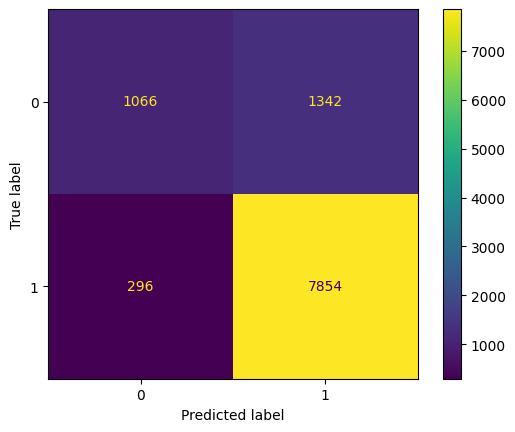

Matriz de Confusão da Validação


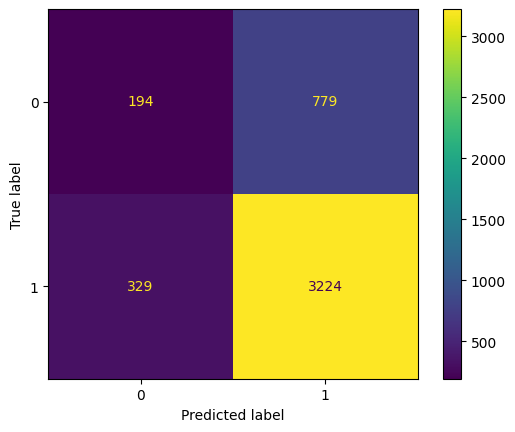

Acurácia no treinamento
0.8448569804887289
Acurácia na validação
0.7551922227132125
0
Scores 10-fold cross-validation: [0.74172185 0.73730684 0.73289183 0.75496689 0.72626932 0.74392936
 0.74557522 0.74778761 0.74778761 0.77654867]
Média 10-fold cross-validation: 0.745478520775948
Desvio padrão 10-fold cross-validation: 0.012948990778322931
**************************************************
GradientBoostingClassifier Training score:
MAE: 0.2226 | RMSE: 0.4718 | R2: -0.2643
--------------------
GradientBoostingClassifier Validation score:
MAE: 0.2143 | RMSE: 0.4629 | R2: -0.2699
Estatísticas do Treinamento
              precision    recall  f1-score   support

           0       0.66      0.05      0.09      2408
           1       0.78      0.99      0.87      8150

    accuracy                           0.78     10558
   macro avg       0.72      0.52      0.48     10558
weighted avg       0.75      0.78      0.70     10558

Estatísticas da Validação
              precision    recall 

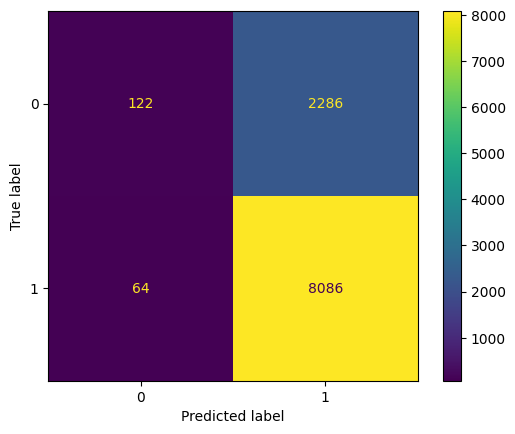

Matriz de Confusão da Validação


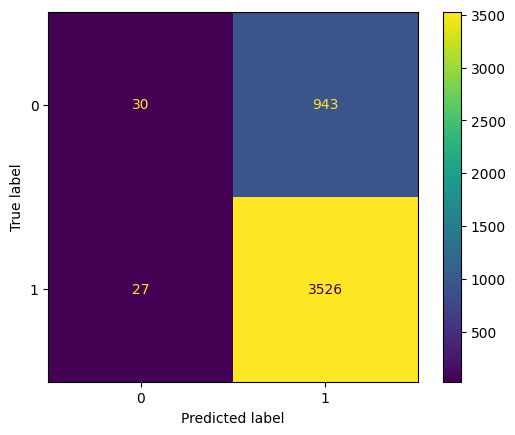

Acurácia no treinamento
0.7774199659026331
Acurácia na validação
0.7856827220503756
0
Scores 10-fold cross-validation: [0.78587196 0.77483444 0.77924945 0.78145695 0.77704194 0.77924945
 0.78761062 0.77654867 0.78761062 0.78761062]
Média 10-fold cross-validation: 0.7817084725233936
Desvio padrão 10-fold cross-validation: 0.0047921805752302385
**************************************************
XGB Classifier Training score:
MAE: 0.1845 | RMSE: 0.4295 | R2: -0.048
--------------------
XGB Classifier Validation score:
MAE: 0.2287 | RMSE: 0.4782 | R2: -0.355
Estatísticas do Treinamento
              precision    recall  f1-score   support

           0       0.75      0.29      0.42      2408
           1       0.82      0.97      0.89      8150

    accuracy                           0.82     10558
   macro avg       0.78      0.63      0.65     10558
weighted avg       0.80      0.82      0.78     10558

Estatísticas da Validação
              precision    recall  f1-score   support

   

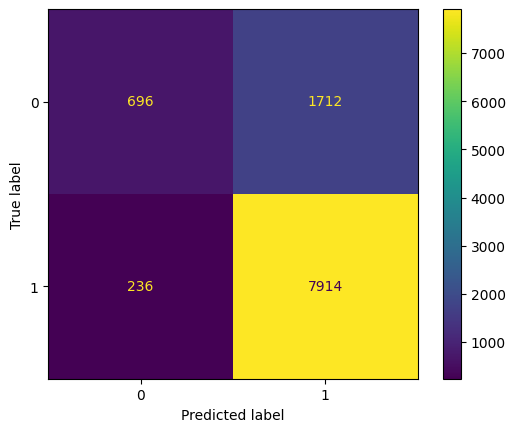

Matriz de Confusão da Validação


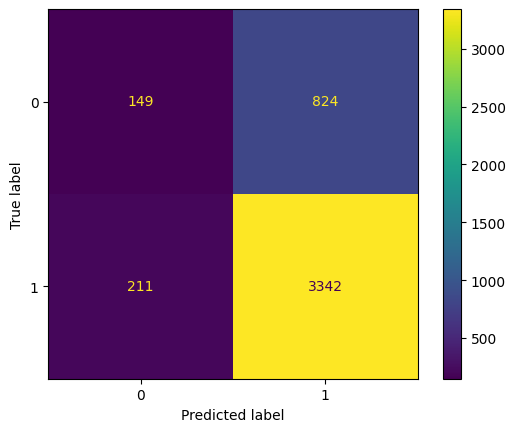

Acurácia no treinamento
0.8154953589695018
Acurácia na validação
0.771321254971277
0
Scores 10-fold cross-validation: [0.76821192 0.73289183 0.7593819  0.77041943 0.75275938 0.77041943
 0.75221239 0.73230088 0.76769912 0.78761062]
Média 10-fold cross-validation: 0.7593906894059271
Desvio padrão 10-fold cross-validation: 0.016486430227174977
DESEMPENHO DOS MODELOS COM DADOS INICIAIS E APENAS COM AS FEATURES UTILIZADAS POR TODOS OS MODELOS
(5, 6)
       precision    recall  f1-score  support  accuracy
count   5.000000  5.000000  5.000000      5.0  5.000000
mean    0.518000  0.512000  0.300000   4526.0  0.312000
std     0.027749  0.021679  0.083367      0.0  0.076942
min     0.490000  0.490000  0.200000   4526.0  0.230000
25%     0.500000  0.500000  0.250000   4526.0  0.260000
50%     0.510000  0.500000  0.300000   4526.0  0.310000
75%     0.530000  0.530000  0.330000   4526.0  0.330000
max     0.560000  0.540000  0.420000   4526.0  0.430000
modelo       0
precision    0
recall       0
f1

In [ ]:
# initialise regression model
dt = DecisionTreeClassifier()
rl = LogisticRegression()
ada = AdaBoostClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
gnb = GaussianNB()
knn = KNeighborsClassifier(3)

models ={
    "Decision Tree Classifier":dt,
    # "Logistic Regression":rl,
    "AdaBoost Classifier":ada,
    "Random Forest Classifier":rfc,
    "GradientBoostingClassifier":gbc,
    "XGB Classifier":xgb,
    # "GaussianNB":gnb,
    # "KNeighbors Classifier":knn
    }

num = 10

# CONFIGURAÇÕES PARA OS DATASETS TRATADOS, APÓS TREINAMENTO E TESTE
X_train_tratado = pd.DataFrame()
X_valid_tratado = pd.DataFrame()

# variável de controle de preenchimento dos datasets X_train_tratado e X_valid_tratado, tratados.
# 0 - para o treinamento
# 2 - para a validação 

features_importantes = []
desempenho_modelos = []
desempenho_modelos_feature_selection = []

ANOVA = ANOVASelection(percentile=5)

# build final pipeline
for name, model in models.items():
    complete_pipeline = Pipeline([
        ('preprocessing', combined_preprocessing),         
        # ('ANOVA', ANOVA),     
        # ('selector', VarianceThreshold()),
        ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=num)),
        ('model', model)
    ])

    np.seterr(divide='ignore', invalid='ignore')
    np.errstate(divide='ignore',invalid='ignore')
    np.seterr(divide='warn', invalid='warn')
    np.seterr(invalid='ignore')
 
    print(name)
    display(complete_pipeline)
    
    x = [-1]
    while len(x) > 0:
      eh_treino = 0
      # model fitting
      complete_pipeline.fit(X_train, y_train)

      features = np.array(complete_pipeline['feature_selection'].get_support(indices=True))
      colunas = [x for x in range(len(X_train.columns))]
      print('features selecionadas')
      print(features)

      print('features do dataset')
      print(colunas)
      
      x = list(filter(lambda x: x not in colunas, features))
      print(x)
      print('tamanho de x: {}'.format(len(x)))

    if len(x) == 0:
      # detalhes sobre o dataset tratado
      print('detalhes sobre o dataset tratado após treinamento')

      print("Total de atributos selecionados: {}".format(num))
      print(complete_pipeline['feature_selection'].get_support(indices=True))

      
      # model scoring
      train_pred = complete_pipeline.predict(X_train)
      valid_pred = complete_pipeline.predict(X_valid)

      plot_model_details(name, complete_pipeline, X_train_tratado, X_valid_tratado, train_pred, valid_pred, 1)

      print('Importância de cada feature selecionada pelo modelo para predição')
      importances = complete_pipeline.steps[2][1].feature_importances_
      feat_importances = pd.Series(importances, index= X_train_tratado.columns[features].to_list())
      feat_importances.nlargest(15).plot(kind='barh')
      plt.show()

      # Guardando as features mais importantes de cada modelo
      features_importantes.append(list(X_train_tratado.columns[features].to_list()))

      print('\n\nREPETINDO EXECUÇÃO DO ESTIMADOR {} COM AS {} FEATURES MAIS IMPORTANTES'.format(model, features))
      # create train & validation set
      X_train_feat_select = X_train_tratado[list(X_train_tratado.columns[features].to_list())]
      X_valid_feat_select = X_valid_tratado[list(X_valid_tratado.columns[features].to_list())]

      # model fitting
      model.fit(X_train_feat_select, y_train)

      # model scoring
      train_pred_feat_select = model.predict(X_train_feat_select)
      valid_pred_feat_select = model.predict(X_valid_feat_select)

      plot_model_details(name, model, X_train_feat_select, X_valid_feat_select, train_pred_feat_select, valid_pred_feat_select, 0)
      
      print('todas as features de cada estimador')
      print(features_importantes)
      print('Lista de features utilizadas por todos os classificadores')
      l1 = features_importantes[0]
      l2 = []
      tam = len(features_importantes)
      for i in range(1, tam):
        l2.append(features_importantes[i])

      features_ultra_importantes = list(set(l1).intersection(*l2))
      # print(features_ultra_importantes)
      print(len(features_ultra_importantes))

df_desempenho_modelos = pd.DataFrame(desempenho_modelos)
df_desempenho_modelos_feature_selection = pd.DataFrame(desempenho_modelos_feature_selection)

msg = "DESEMPENHO DOS MODELOS COM DADOS INICIAIS"
detalhes_dataset_tratado(df_desempenho_modelos, msg)
msg = "DESEMPENHO DOS MODELOS APÓS FEATURE SELECTION"
detalhes_dataset_tratado(df_desempenho_modelos_feature_selection, msg)

# print('DESEMPENHO DOS MODELOS NA VALIDAÇÃO')
# print(df_desempenho_modelos)
# experimento_com_features_ultra_importantes(features_ultra_importantes)

desempenho_modelos = []
desempenho_modelos_feature_selection = []
# X_train_feat_select = X_train_tratado[features_ultra_importantes]
experimento_com_features_ultra_importantes(features_ultra_importantes)

msg = "DESEMPENHO DOS MODELOS COM DADOS INICIAIS E APENAS COM AS FEATURES UTILIZADAS POR TODOS OS MODELOS"
detalhes_dataset_tratado(df_desempenho_modelos, msg)
msg = "DESEMPENHO DOS MODELOS APÓS FEATURE SELECTION E APENAS COM AS FEATURES UTILIZADAS POR TODOS OS MODELOS"
detalhes_dataset_tratado(df_desempenho_modelos_feature_selection, msg)

# ggggg

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15084 entries, 6 to 48304
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   campus                   15084 non-null  object 
 1   curso                    15084 non-null  object 
 2   anoingresso              15084 non-null  int64  
 3   periodoingresso          15084 non-null  int64  
 4   rendabruta               15084 non-null  float64
 5   modalidade               15084 non-null  object 
 6   genero                   15084 non-null  object 
 7   raca                     15084 non-null  object 
 8   idade                    15084 non-null  int64  
 9   ficou_tempo_sem_estudar  15084 non-null  bool   
 10  quantidade_computadores  14153 non-null  float64
 11  companhia_domiciliar     15084 non-null  object 
 12  mae_nivel_escolaridade   15084 non-null  object 
 13  pai_nivel_escolaridade   15084 non-null  object 
 14  quantidade_notebooks  

In [ ]:
print("DESEMPENHO DOS MODELOS COM DADOS INICIAIS")
df_desempenho_modelos

DESEMPENHO DOS MODELOS COM DADOS INICIAIS


NameError: ignored

In [ ]:
print("DESEMPENHO DOS MODELOS APÓS FEATURE SELECTION")
df_desempenho_modelos_feature_selection

DESEMPENHO DOS MODELOS APÓS FEATURE SELECTION


modelo  precision  recall  f1-score  support  accuracy
0    Decision Tree Classifier       0.57    0.54      0.54     4526      0.75
1         AdaBoost Classifier       0.39    0.50      0.44     4526      0.79
2    Random Forest Classifier       0.57    0.53      0.52     4526      0.76
3  GradientBoostingClassifier       0.39    0.50      0.44     4526      0.79
4              XGB Classifier       0.58    0.52      0.50     4526      0.77

In [ ]:
print("DESEMPENHO DOS MODELOS COM DADOS INICIAIS E APENAS COM AS FEATURES UTILIZADAS POR TODOS OS MODELOS")
df_desempenho_modelos

DESEMPENHO DOS MODELOS COM DADOS INICIAIS E APENAS COM AS FEATURES UTILIZADAS POR TODOS OS MODELOS


modelo  precision  recall  f1-score  support  accuracy
0    Decision Tree Classifier       0.39     0.5      0.44     4526      0.79
1         AdaBoost Classifier       0.39     0.5      0.44     4526      0.79
2    Random Forest Classifier       0.39     0.5      0.44     4526      0.79
3  GradientBoostingClassifier       0.39     0.5      0.44     4526      0.79
4              XGB Classifier       0.39     0.5      0.44     4526      0.79

In [ ]:
print("DESEMPENHO DOS MODELOS APÓS FEATURE SELECTION E APENAS COM AS FEATURES UTILIZADAS POR TODOS OS MODELOS")
df_desempenho_modelos_feature_selection

DESEMPENHO DOS MODELOS APÓS FEATURE SELECTION E APENAS COM AS FEATURES UTILIZADAS POR TODOS OS MODELOS


modelo  precision  recall  f1-score  support  accuracy
0    Decision Tree Classifier       0.57    0.54      0.54     4526      0.75
1         AdaBoost Classifier       0.39    0.50      0.44     4526      0.79
2    Random Forest Classifier       0.57    0.53      0.52     4526      0.76
3  GradientBoostingClassifier       0.39    0.50      0.44     4526      0.79
4              XGB Classifier       0.58    0.52      0.50     4526      0.77

In [ ]:
# print(feat_importances.sort_values(ascending=False)) 
print(features)
print(list(features_ultra_importantes))

[ 0  3  5  6  9 10 11 14 17 19]
['genero_M', 'campus', 'raca_Branca', 'ficou_tempo_sem_estudar', 'pai_nivel_escolaridade', 'idioma', 'mae_nivel_escolaridade']


In [ ]:
# print("colunas")
# print(X_train.columns[features].to_list())
print(X_train_tratado[features_ultra_importantes])

       mae_nivel_escolaridade  genero_M  idioma  pai_nivel_escolaridade  \
40713                       5       1.0       0                       4   
16978                       1       1.0       0                       2   
27123                       2       0.0       0                       1   
46505                       3       0.0       0                       3   
29929                       2       1.0       0                       2   
...                       ...       ...     ...                     ...   
21388                       5       0.0       0                       4   
24114                       0       1.0       0                       0   
22198                       2       1.0       0                       3   
3357                        3       0.0       0                       3   
29752                       6       1.0       0                       3   

       ficou_tempo_sem_estudar  campus  raca_Branca  
40713                        0       7       

In [ ]:
X_train_feat_select = X_train_tratado[features_ultra_importantes]
X_train_feat_select

genero_M  campus  pai_nivel_escolaridade  raca_Branca  \
40713       1.0       7                       4          0.0   
16978       1.0       7                       2          0.0   
27123       0.0      12                       1          0.0   
46505       0.0       8                       3          0.0   
29929       1.0       6                       2          0.0   
...         ...     ...                     ...          ...   
21388       0.0      24                       4          0.0   
24114       1.0      15                       0          0.0   
22198       1.0      25                       3          0.0   
3357        0.0      22                       3          0.0   
29752       1.0       8                       3          0.0   

       mae_nivel_escolaridade  idioma  ficou_tempo_sem_estudar  
40713                       5       0                        0  
16978                       1       0                        0  
27123                       2       0                        0  
46505                       3       0                        0  
29929                       2       0                        0  
...                       ...     ...                      ...  
21388                       5       0                        0  
24114                       0       0                        0  
22198                       2       0                        0  
3357                        3       0                        0  
29752                       6       0                        0  

[10558 rows x 7 columns]

In [ ]:
X.estado_civil.value_counts()

Solteiro(a)      14025
Casado(a)          649
União Estável      332
Divorciado(a)       63
Viúvo(a)            12
Não declarado        3
Name: estado_civil, dtype: int64

In [ ]:
models.items()

dict_items([('Decision Tree Classifier', DecisionTreeClassifier()), ('Logistic Regression', LogisticRegression()), ('AdaBoost Classifier', AdaBoostClassifier()), ('Random Forest Classifier', RandomForestClassifier()), ('GradientBoostingClassifier', GradientBoostingClassifier()), ('XGB Classifier', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
   

In [ ]:
models.values()

dict_values([DecisionTreeClassifier(), LogisticRegression(), AdaBoostClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), GaussianNB(), KNeighborsClassifier(n_neighbors=3)])

In [ ]:
complete_pipeline = Pipeline([
        ('preprocessing', combined_preprocessing),           
        ('model', ClfSwitcher())
    ])

grid_params = [
    # {'model__penalty' : ['none', 'l2']},
    # {'model__C' : np.logspace(-4, 4, 20)},
    {'model__estimator': list(models.values())}
]

gs = GridSearchCV(complete_pipeline, grid_params, scoring='accuracy')
gs.fit(X_train, y_train)

print("Best Score of train set: "+str(gs.best_score_))
print("Best parameter set: "+str(gs.best_params_))
print("Test Score: "+str(gs.score(X_valid,y_valid)))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories

Best Score of train set: 0.7771070168561348
Best parameter set: {'model__estimator': KNeighborsClassifier(n_neighbors=3)}
Test Score: 0.7905615511249314


In [ ]:
complete_pipeline.get_params()

{'memory': None,
 'steps': [('preprocessing', FeatureUnion(transformer_list=[('numericals',
                                   Pipeline(steps=[('num_feature_selector',
                                                    FeatureSelector(variables=['anoingresso',
                                                                               'periodoingresso',
                                                                               'rendabruta',
                                                                               'idade',
                                                                               'quantidade_computadores',
                                                                               'quantidade_notebooks',
                                                                               'qtd_filhos',
                                                                               'percentual_frequencia',
                                                     

In [ ]:
y_train.value_counts()

1    8998
0    3757
Name: situacao, dtype: int64

In [ ]:
print(f"Dimensões df X treino: {X_train.shape}\nDimensões df y treino: {y_train.shape}")
print(f"Dimensões df X teste: {X_valid.shape}\nDimensões df y teste: {y_valid.shape}")

Dimensões df X treino: (12755, 27)
Dimensões df y treino: (12755,)
Dimensões df X teste: (5467, 27)
Dimensões df y teste: (5467,)


## Feature Selection with Filter, Wrapper and Embedded Methos

## Filter Method

### Pearson’s Correlation

In [ ]:
X.isna().sum().sort_values(ascending=False)

forma_acesso_seletivo      3740
ano_conclusao              3385
quantidade_computadores     931
quantidade_notebooks        784
campus                        0
pai_nivel_escolaridade        0
pais_escolarizados            0
idioma                        0
reprovacoes                   0
percentual_frequencia         0
trabalha                      0
tipo_area_residencial         0
qtd_filhos                    0
estado_civil                  0
mae_nivel_escolaridade        0
curso                         0
companhia_domiciliar          0
ficou_tempo_sem_estudar       0
idade                         0
raca                          0
genero                        0
modalidade                    0
rendabruta                    0
periodoingresso               0
anoingresso                   0
situacao                      0
dtype: int64

In [ ]:
y.value_counts()

Matriculado                        27310
Concluído                          11703
Evasão                              2075
Cancelado                           1398
Trancado Voluntariamente            1200
Formado                             1192
Trancada                             914
Transferido Externo                  802
Jubilado                             544
Cancelamento Compulsório             508
Concludente                          219
Transferido Interno                  153
Matrícula Vínculo Institucional      134
Aguardando Colação de Grau            41
Cancelamento por Duplicidade          32
Estagiario (concludente)              27
Cancelamento por Desligamento         23
Aguardando ENADE                      22
Afastado                              11
Falecido                               3
Name: situacao, dtype: int64

<Axes: title={'center': 'kendall'}>

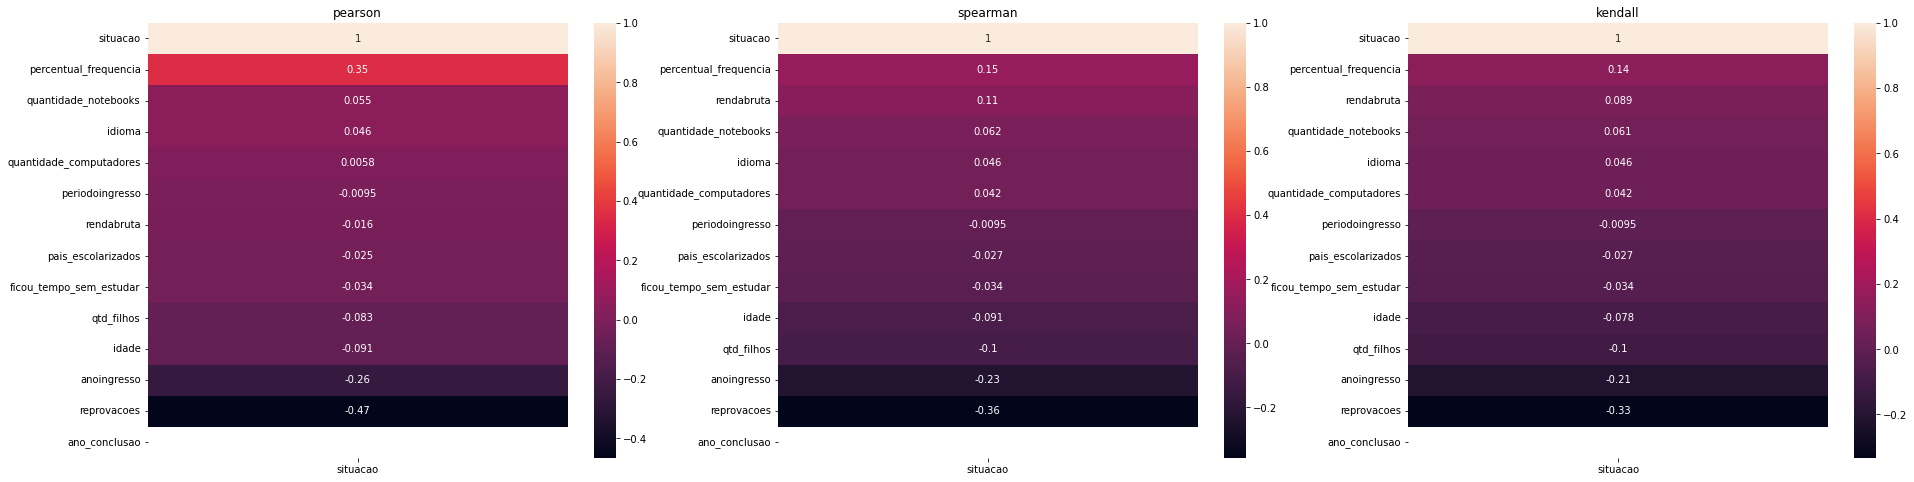

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(1,3, figsize=(32, 8))
# fig, ax =stem_graphic(mileage['disp'])

# Adding 'situacao' feature in the X
# X.drop('situacao', axis=1, inplace=True)
X['situacao'] = y

corr1 = X.corr('pearson')[['situacao']].sort_values(by='situacao', ascending=False)
corr2 = X.corr('spearman')[['situacao']].sort_values(by='situacao', ascending=False)
corr3 = X.corr('kendall')[['situacao']].sort_values(by='situacao', ascending=False)

ax[0].set_title("pearson")
ax[1].set_title("spearman")
ax[2].set_title("kendall")

sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

In [ ]:
# extract the most correlated features with the output variable
# 'pearson' analysis
feature_selection = corr3[abs(corr3)>0.1].dropna()
feature_selection

situacao
situacao               1.000000
percentual_frequencia  0.136765
qtd_filhos            -0.101464
anoingresso           -0.208521
reprovacoes           -0.332718

### Limite de variância

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# X_train_tratado['situacao'] = y
X_train_tratado.drop('situacao',axis=1, inplace=True)

selector = VarianceThreshold()
selector.fit_transform(X_train_tratado)

array([[  7.,  32.,   0., ...,   0.,   1.,   1.],
       [  7.,  32.,   2., ...,   0.,   1.,   1.],
       [ 12., 246.,   1., ...,   1.,   0.,   1.],
       ...,
       [ 25., 246.,   1., ...,   0.,   1.,   0.],
       [ 22., 126.,   2., ...,   1.,   0.,   0.],
       [  8., 193.,   0., ...,   0.,   1.,   0.]])

### LDA - Análise Discriminante Linear

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from random import choices

# df = pd.read_csv('breast_cancer.csv').iloc[:,1:-1]

# X = df.drop(['situacao'], axis=1)

le = LabelEncoder()

y1 = y_train.iloc[:len(X_train_tratado)]

y1 = le.fit_transform(y1)


labels = le.classes_
steps = [('lda', LinearDiscriminantAnalysis()), ('m', LogisticRegression(C=10))]
model = Pipeline(steps=steps)
# evaluate model
cv = StratifiedKFold(n_splits=5)
n_scores_lda = cross_val_score(model, X_train_tratado, y1, scoring='f1_macro', cv=cv, n_jobs=-1)
model = LogisticRegression(C=10)
n_scores = cross_val_score(model, X_train_tratado, y1, scoring='f1_macro', cv=cv, n_jobs=-1)
# report performance
print('f1-score (macro)\n')
print('With LDA: %.2f' % np.mean(n_scores_lda))
print('Without LDA: %.2f' % np.mean(n_scores))

f1-score (macro)

With LDA: 0.44
Without LDA: 0.44


In [ ]:
y_train

40713    1
16978    1
27123    1
46505    1
29929    1
        ..
21388    1
24114    0
22198    1
3357     1
29752    1
Name: situacao, Length: 10558, dtype: int64

### ANOVA - Analysis of Variance

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest
fs = SelectKBest(score_func=f_classif, k=5)

# X = df.drop(['situacao'], axis=1)
# Y = df['situacao']

X_new = fs.fit(X_train_tratado, y1)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 4  8 10 13 14 15 16 17 19 20 21 22 23 24 25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


SelectKBest(k=5)

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

cv = StratifiedKFold(n_splits=5)
pipeline = Pipeline(steps=[('anova',fs), ('lr', LinearRegression())])
params = {('anova__k'): [i+1 for i in range(X_train_tratado.shape[1])]}
search = GridSearchCV(pipeline, params, scoring='accuracy', n_jobs=-1, cv=cv)
results = search.fit(X_train_tratado, y1)
print('Best k: %s' % results.best_params_)

### χ² -Chi-squared tests

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest

# loan = pd.read_csv('loan_data_set.csv')
# loan = loan.drop('Loan_ID', axis=1) # irrelevant feature

# #Transform the numerical feature into categorical feature
# loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].astype('object')
# loan['Credit_History'] = loan['Credit_History'].astype('object')
# #Dropping all the null value
# loan.dropna(inplace = True)
# #Retrieve all the categorical columns except the target
# categorical_columns = loan.select_dtypes(exclude='number').drop('Loan_Status', axis=1).columns
# X = loan[categorical_columns].apply(LabelEncoder().fit_transform)
# y = LabelEncoder().fit_transform(loan['Loan_Status'])

fs = SelectKBest(score_func=chi2, k=5)
X_kbest = fs.fit_transform(X_train_tratado, y_train)

In [ ]:
fs.get_support(indices=True)

array([0, 1, 3, 5, 6])

In [ ]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif, SelectKBest
fs = SelectKBest(score_func=mutual_info_classif, k=5) # top 5 features
X_subset = fs.fit_transform(X_train_tratado, y_train)

X_subset

array([[  7.,  32.,   1.,   8.,   5.],
       [  7.,  32.,   1.,   9.,   1.],
       [ 12., 246.,   1.,   8.,   2.],
       ...,
       [ 25., 246.,   1.,   8.,   2.],
       [ 22., 126.,   1.,   8.,   3.],
       [  8., 193.,   1.,   8.,   6.]])

In [ ]:
fs.get_support(indices=True)

array([0, 1, 3, 5, 6])

## Wrapper Method

### Seleção de atributos com Backward and Forward

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 3 ) 
sfs = SequentialFeatureSelector(knn, n_features_to_select= 3 , direction="forward") 
sfs.fit(X_train_tratado, y1) 
X_selection = sfs.transform(X_train_tratado)

In [ ]:
sfs.get_support(indices=True)

array([0, 1, 2])

In [ ]:
features = np.array(sfs.get_support(indices=True))
X_train_tratado[list(X_train_tratado.columns[features].tolist())]

campus  curso  forma_acesso_seletivo
40713       7     32                      0
16978       7     32                      2
27123      12    246                      1
46505       8     63                      0
29929       6     15                      0
...       ...    ...                    ...
21388      24    216                      0
24114      15    182                      0
22198      25    246                      1
3357       22    126                      2
29752       8    193                      0

[10558 rows x 3 columns]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV

plt.figure(figsize=(30,10))

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train_tratado, y1)
importance = np.abs(ridge.coef_)

# features = np.array(ridge.get_support(indices=True))

feature_names = np.array(X_train_tratado.columns.tolist())
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from time import time

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=2, direction="forward"
).fit(X_train_tratado, y1)
toc_fwd = time()

tic_bwd = time()
sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=2, direction="backward"
).fit(X_train_tratado, y1)
toc_bwd = time()

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

Features selected by forward sequential selection: ['modalidade' 'genero_M']
Done in 4.060s
Features selected by backward sequential selection: ['modalidade' 'genero_F']
Done in 61.685s


#### Forward Selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

scv = StratifiedKFold(n_splits=5)
# create the SequentialFeatureSelector object
sfs = SequentialFeatureSelector(LogisticRegression(C=10,
max_iter=10000), n_features_to_select=8, 
                 direction='backward', 
                 scoring='f1_macro',
                 cv=scv,
                 n_jobs=-1)
# fit the object to the training data
sfs = sfs.fit(X_train_tratado, y1)
selected_features = X_train_tratado[sfs.feature_names_in_].columns.tolist()
print(selected_features)

['campus', 'curso', 'forma_acesso_seletivo', 'modalidade', 'ficou_tempo_sem_estudar', 'companhia_domiciliar', 'mae_nivel_escolaridade', 'pai_nivel_escolaridade', 'tipo_area_residencial', 'trabalha', 'idioma', 'genero_F', 'genero_M', 'raca_Amarela', 'raca_Branca', 'raca_Indigena', 'raca_Não Informado', 'raca_Não declarado', 'raca_Parda', 'raca_Preta', 'estado_civil_Casado(a)', 'estado_civil_Divorciado(a)', 'estado_civil_Não declarado', 'estado_civil_Solteiro(a)', 'estado_civil_União Estável', 'estado_civil_Viúvo(a)']


In [ ]:
print(len(selected_features))

26


In [ ]:
print(selected_features)

['campus', 'curso', 'forma_acesso_seletivo', 'modalidade', 'ficou_tempo_sem_estudar', 'companhia_domiciliar', 'mae_nivel_escolaridade', 'pai_nivel_escolaridade', 'tipo_area_residencial', 'trabalha', 'idioma', 'genero_F', 'genero_M', 'raca_Amarela', 'raca_Branca', 'raca_Indigena', 'raca_Não Informado', 'raca_Não declarado', 'raca_Parda', 'raca_Preta', 'estado_civil_Casado(a)', 'estado_civil_Divorciado(a)', 'estado_civil_Não declarado', 'estado_civil_Solteiro(a)', 'estado_civil_União Estável', 'estado_civil_Viúvo(a)']


In [ ]:
# Build full model with selected features
clf = LogisticRegression(C=10, max_iter=10000)
clf.fit(X_train_tratado, y1)

y2 = y_valid.iloc[:len(X_valid_tratado)]

y_test_pred = clf.predict(X_valid_tratado)
print(classification_report(y2, y_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.00      0.00       973
           1       0.79      1.00      0.88      3553

    accuracy                           0.79      4526
   macro avg       0.73      0.50      0.44      4526
weighted avg       0.76      0.79      0.69      4526



### Seleção de atributos com Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
# from sklearn.datasets import load_breast_cancer

# load dataset
# breast_cancer = load_breast_cancer()
# X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
# y = breast_cancer.target

svc = SVC(kernel="linear")
rfe = RFE(svc, n_features_to_select=3)
rfe.fit(X_train_tratado, y1)
X_selection = rfe.transform(X_train_tratado)

In [ ]:
X_selection

array([[5., 0., 1.],
       [1., 0., 1.],
       [2., 1., 0.],
       ...,
       [2., 0., 1.],
       [3., 1., 0.],
       [6., 0., 1.]])

In [ ]:
# Build full model with selected features
clf = LogisticRegression(C=10, max_iter=10000)
clf.fit(X_train_tratado[:, selected_features], y2)
y_test_pred = clf.predict(X_valid_tratado[:, selected_features])
print(classification_report(y_valid, y_test_pred))

InvalidIndexError: ignored

### Boruta

In [ ]:
pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 2.4 MB/s eta 0:00:00


In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200, class_weight='balanced', max_depth=4, n_jobs=-1)
boruta = BorutaPy(estimator = clf, n_estimators = 'auto', max_iter = 100) # number of trials to perform
boruta.fit(X_train_tratado.to_numpy(), y_train)
green_area = X.columns[boruta.support_].to_list()
blue_area = X.columns[boruta.support_weak_].to_list()
print('Green area:', green_area)
print('Blue area:', blue_area)

clf = RandomForestClassifier(n_estimators=200, class_weight='balanced', max_depth=4, n_jobs=-1)
boruta = BorutaPy(estimator = clf, n_estimators = 'auto', max_iter = 100) # number of trials to perform
boruta.fit(X_train.to_numpy(), y_train)
green_area = X.columns[boruta.support_].to_list()
blue_area = X.columns[boruta.support_weak_].to_list()
print('Green area:', green_area)
print('Blue area:', blue_area)

ModuleNotFoundError: ignored

#### v2

How to replicate Boruta

Idea #1: Shadow Features

In [ ]:
for col in X_train_tratado.columns:
    X_train_tratado[f"shadow_{col}"] = X_train_tratado[col].sample(frac=1).reset_index(drop=True)

In [ ]:
X_train_tratado.isnull().sum()

campus                                          0
curso                                           0
forma_acesso_seletivo                           0
modalidade                                      0
ficou_tempo_sem_estudar                         0
                                            ...  
shadow_shadow_estado_civil_Divorciado(a)    10073
shadow_shadow_estado_civil_Não declarado    10041
shadow_shadow_estado_civil_Solteiro(a)      10048
shadow_shadow_estado_civil_União Estável    10060
shadow_shadow_estado_civil_Viúvo(a)         10039
Length: 78, dtype: int64

In [ ]:
# import numpy as np

# ### make X_shadow by randomly permutating each column of X
# np.random.seed(42)
# X_shadow = X_train_tratado.apply(np.random.permutation)
# X_shadow.columns = ['shadow_' + feat for feat in X_train_tratado.columns]
# print(X_shadow)

In [ ]:
X_boruta = pd.concat([X_train_tratado, X_shadow], axis=1)
X_boruta.shape

(10558, 104)

In [ ]:
X_train_tratado.isnull().sum()

campus                                  0
curso                                   0
forma_acesso_seletivo                   0
modalidade                              0
ficou_tempo_sem_estudar                 0
companhia_domiciliar                    0
mae_nivel_escolaridade                  0
pai_nivel_escolaridade                  0
tipo_area_residencial                   0
trabalha                                0
idioma                                  0
genero_F                                0
genero_M                                0
raca_Amarela                            0
raca_Branca                             0
raca_Indigena                           0
raca_Não Informado                      0
raca_Não declarado                      0
raca_Parda                              0
raca_Preta                              0
estado_civil_Casado(a)                  0
estado_civil_Divorciado(a)              0
estado_civil_Não declarado              0
estado_civil_Solteiro(a)          

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

y2 = y_train.iloc[:len(X_train_tratado)]

### fit a rf (suggested max_depth between 3 and 7)
forest = RandomForestRegressor(max_depth = 5, random_state = 42, n_estimators=100)
forest.fit(X_boruta, y2)

print(X_valid_tratado.columns)

### store feature importances
feat_imp_X = forest.feature_importances_[:len(X_valid_tratado.columns)]
print("\n Feature VIM = ", feat_imp_X,"\n")

feat_imp_shadow = forest.feature_importances_[len(X.columns) :]
print("\n Shadows VIM = ", feat_imp_shadow,"\n")

### compute Shadow Threshold & Hits
print("\n Shadow Threshold = ", round(feat_imp_shadow.max(),3),"\n")

hits = feat_imp_X > feat_imp_shadow.max()
print("\n Hits = ", hits, "\n")

# get importance
importance = forest.feature_importances_
importance_df = pd.DataFrame({'feature': X_boruta.columns,'vim': importance})

# summarize feature importance 
for index,row in importance_df.iterrows():
    print( 'Feature: ', row['feature'], ', Score: ', round(row['vim'],3))

ValueError: ignored

Idea #2: Binomial Distribution

In [ ]:
### initiliaze hits counter
hits = np.zeros((len(X_train_tratado.columns)))

### repeat 20 times
for iter_ in range(20):
### make X_shadow by randomly permuting each column of X
    np.random.seed(iter_)
    X_shadow = X_train_tratado.apply(np.random.permutation)
    X_boruta = pd.concat([X_train_tratado, X_shadow], axis = 1)

    ### fit a random forest (suggested max_depth bw 3 and 7)
    forest = RandomForestRegressor(max_depth = 5, random_state = 42, n_estimators=100)
    forest.fit(X_boruta, y2)

    ### store feature importance
    feat_imp_X =forest.feature_importances_[:len(X_train_tratado.columns)]
    feat_imp_shadow = forest.feature_importances_[len(X_train_tratado.columns):]

    ### hits for this trial and add to counter
    hits += (feat_imp_X > feat_imp_shadow.max())

hits_df = pd.DataFrame({'var': X_train_tratado.columns,'total hits in iteration': hits})

print(hits_df)

                           var  total hits in iteration
0                       campus                     20.0
1                        curso                     20.0
2        forma_acesso_seletivo                      0.0
3                   modalidade                     20.0
4      ficou_tempo_sem_estudar                      0.0
5         companhia_domiciliar                     20.0
6       mae_nivel_escolaridade                     20.0
7       pai_nivel_escolaridade                      0.0
8        tipo_area_residencial                      0.0
9                     trabalha                      0.0
10                      idioma                      0.0
11                    genero_F                      0.0
12                    genero_M                      0.0
13                raca_Amarela                      0.0
14                 raca_Branca                      0.0
15               raca_Indigena                      0.0
16          raca_Não Informado                  

In [ ]:
def get_important_features(Xbor, ybor):
  print(Xbor.info())
  print(ybor.info())
  # Initiliaze Random Forest CLassifier
  rf = RandomForestClassifier(max_depth=20)
  # Fit Random Forest on provided data
  rf.fit(Xbor,ybor)
  # Create dictionary of feature importances
  importances = {feature_name: f_importance for feature_name, f_importance in zip(Xbor.columns, rf.feature_importances_)}
  # Isolate importances of Shadow features
  only_shadow_feat_importance = {key:value for key,value in importances.items() if "shadow" in key}
  # get importance level of most important shadow feature
  highest_shadow_feature = list(dict(sorted(only_shadow_feat_importance.items(), key=lambda item: item[1], reverse=True)).values())[0]
  # get original feature which fulfill boruta selection criteria
  selected_features = [key for key, value in importances.items() if value > highest_shadow_feature]

  return selected_features

In [ ]:
for col in X_train_tratado.columns:
    X_train_tratado[f"shadow_{col}"] = X_train_tratado[col].sample(frac=1).reset_index(drop=True)

In [ ]:
X_train_tratado.isnull().sum()

campus                                  0
curso                                   0
forma_acesso_seletivo                   0
modalidade                              0
ficou_tempo_sem_estudar                 0
companhia_domiciliar                    0
mae_nivel_escolaridade                  0
pai_nivel_escolaridade                  0
tipo_area_residencial                   0
trabalha                                0
idioma                                  0
genero_F                                0
genero_M                                0
raca_Amarela                            0
raca_Branca                             0
raca_Indigena                           0
raca_Não Informado                      0
raca_Não declarado                      0
raca_Parda                              0
raca_Preta                              0
estado_civil_Casado(a)                  0
estado_civil_Divorciado(a)              0
estado_civil_Não declarado              0
estado_civil_Solteiro(a)          

In [ ]:
import scipy as sp
from tqdm.notebook import tqdm

trials = 20

feature_hits = {i:0 for i in X_train_tratado.columns}
for _ in tqdm(range(trials)):
    imp_features = get_important_features(X_train_tratado, y2)
    for key, _ in feature_hits.items():
        if key in imp_features: feature_hits[key] += 1
print(feature_hits)

pmf = [sp.stats.binom.pmf(X_train_tratado, trials, .5) for x in range(trials + 1)]
print(pmf)

# plot the probability mass function pyplot.plot(list(range(0,trials+1)), pmf, color = "black")
# pyplot.axvline(hits_df.loc[hits_df['var'] == 'age','total hits in iteration'].values, color = 'green')
# pyplot.text(hits_df.loc[hits_df['var'] == 'age','total hits in iteration'].values -1.5,.1, 'age')
# pyplot.axvline(hits_df.loc[hits_df['var'] == 'weight', 'total hits in iteration'].values, color = 'red')
# pyplot.text(hits_df.loc[hits_df['var'] == 'weight', 'total hits in iteration'].values + 1, .1, 'weight')
# pyplot.axvline(hits_df.loc[hits_df['var'] == 'height', 'total hits in iteration'].values, color = 'gray')
# pyplot.text(hits_df.loc[hits_df['var'] == 'height', 'total hits in iteration'].values + 1, .1, 'height')
# pyplot.show()

### Outa implementação do Boruta

Load and process data

In [ ]:
# important libraries
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [ ]:
# data =  pd.read_csv(".csv")
data = pd.read_csv("./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/healthcare-dataset-stroke-data.csv")
# data = X_train_tratado.copy()
x2 = X_train_tratado.copy()
# x2 = X.copy()
# x2.shape

# y2 = y.copy()

In [ ]:
y2.info()

<class 'pandas.core.series.Series'>
Int64Index: 15084 entries, 6 to 48304
Series name: situacao
Non-Null Count  Dtype
--------------  -----
15084 non-null  int64
dtypes: int64(1)
memory usage: 235.7 KB


In [ ]:
x2.shape

(15084, 25)

In [ ]:
x2.isnull().sum()

campus                        0
curso                         0
forma_acesso_seletivo         0
modalidade                    0
ficou_tempo_sem_estudar       0
companhia_domiciliar          0
mae_nivel_escolaridade        0
pai_nivel_escolaridade        0
tipo_area_residencial         0
trabalha                      0
idioma                        0
genero_F                      0
genero_M                      0
raca_Amarela                  0
raca_Branca                   0
raca_Indigena                 0
raca_Não Informado            0
raca_Não declarado            0
raca_Parda                    0
raca_Preta                    0
estado_civil_Casado(a)        0
estado_civil_Divorciado(a)    0
estado_civil_Não declarado    0
estado_civil_Solteiro(a)      0
estado_civil_União Estável    0
estado_civil_Viúvo(a)         0
dtype: int64

In [ ]:
# Colunas categóricas com nulos
colunas_categoricas = [var for var in x2 if (x2[var].dtype=='object') | (x2[var].dtype=='bool')]

In [ ]:
colunas_categoricas

['campus',
 'curso',
 'forma_acesso_seletivo',
 'modalidade',
 'genero',
 'raca',
 'ficou_tempo_sem_estudar',
 'companhia_domiciliar',
 'mae_nivel_escolaridade',
 'pai_nivel_escolaridade',
 'estado_civil',
 'tipo_area_residencial',
 'trabalha',
 'idioma']

In [ ]:
x2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10558 entries, 40713 to 29752
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   campus                      10558 non-null  int64  
 1   curso                       10558 non-null  int64  
 2   forma_acesso_seletivo       10558 non-null  int64  
 3   modalidade                  10558 non-null  int64  
 4   ficou_tempo_sem_estudar     10558 non-null  int64  
 5   companhia_domiciliar        10558 non-null  int64  
 6   mae_nivel_escolaridade      10558 non-null  int64  
 7   pai_nivel_escolaridade      10558 non-null  int64  
 8   tipo_area_residencial       10558 non-null  int64  
 9   trabalha                    10558 non-null  int64  
 10  idioma                      10558 non-null  int64  
 11  genero_F                    10558 non-null  float64
 12  genero_M                    10558 non-null  float64
 13  raca_Amarela               

In [ ]:
# converting to numeric
# for i in colunas_categoricas:
#   x2[i] = pd.factorize(x2[i])[0]

data["gender"] = pd.factorize(data["gender"])[0]
data["ever_married"] = pd.factorize(data["ever_married"])[0]
data["work_type"] = pd.factorize(data["work_type"])[0]
data["Residence_type"] = pd.factorize(data["Residence_type"])[0]
data["smoking_status"] = pd.factorize(data["smoking_status"])[0]

# additional cleaning
data.dropna(inplace =True)
data.drop("id", axis =1, inplace = True)
data.reset_index(inplace=True, drop=True)
data.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       0  67.0             0              1             0          0   
1       0  80.0             0              1             0          0   
2       1  49.0             0              0             0          0   
3       1  79.0             1              0             0          1   
4       0  81.0             0              0             0          0   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               0             228.69  36.6               0       1  
1               1             105.92  32.5               1       1  
2               0             171.23  34.4               2       1  
3               1             174.12  24.0               1       1  
4               0             186.21  29.0               0       1

In [ ]:
x2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10971 entries, 0 to 10970
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   campus                   10971 non-null  int64  
 1   curso                    10971 non-null  int64  
 2   anoingresso              10971 non-null  int64  
 3   periodoingresso          10971 non-null  int64  
 4   forma_acesso_seletivo    10971 non-null  int64  
 5   rendabruta               10971 non-null  float64
 6   modalidade               10971 non-null  int64  
 7   genero                   10971 non-null  int64  
 8   raca                     10971 non-null  int64  
 9   idade                    10971 non-null  int64  
 10  ficou_tempo_sem_estudar  10971 non-null  int64  
 11  quantidade_computadores  10971 non-null  float64
 12  companhia_domiciliar     10971 non-null  int64  
 13  mae_nivel_escolaridade   10971 non-null  int64  
 14  pai_nivel_escolaridade

In [ ]:
x2.shape

(10971, 25)

In [ ]:
# seperate input and output variables
x3 = data.drop("stroke", axis = 1)
y3 = data["stroke"]

1. Creating Shadow features

In [ ]:
for col in x3.columns:  
  x3[f"shadow_{col}"] = x3[col].sample(frac=1, replace=False).reset_index(drop=True)

# np.random.seed(42)
# X_shadow = x2.apply(np.random.permutation)
# X_shadow.columns = ['shadow_' + feat for feat in x2.columns]

# x2 = pd.concat([x2,X_shadow], axis = 1)

In [ ]:
x3.shape

(4909, 20)

In [ ]:
x3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    4909 non-null   int64  
 1   age                       4909 non-null   float64
 2   hypertension              4909 non-null   int64  
 3   heart_disease             4909 non-null   int64  
 4   ever_married              4909 non-null   int64  
 5   work_type                 4909 non-null   int64  
 6   Residence_type            4909 non-null   int64  
 7   avg_glucose_level         4909 non-null   float64
 8   bmi                       4909 non-null   float64
 9   smoking_status            4909 non-null   int64  
 10  shadow_gender             4909 non-null   int64  
 11  shadow_age                4909 non-null   float64
 12  shadow_hypertension       4909 non-null   int64  
 13  shadow_heart_disease      4909 non-null   int64  
 14  shadow_e

In [ ]:
x2

campus  curso  forma_acesso_seletivo  modalidade  \
40713       7     32                      0           1   
16978       7     32                      2           1   
27123      12    246                      1           1   
46505       8     63                      0           1   
29929       6     15                      0           1   
...       ...    ...                    ...         ...   
21388      24    216                      0           1   
24114      15    182                      0           3   
22198      25    246                      1           1   
3357       22    126                      2           1   
29752       8    193                      0           1   

       ficou_tempo_sem_estudar  companhia_domiciliar  mae_nivel_escolaridade  \
40713                        0                     8                       5   
16978                        0                     9                       1   
27123                        0                     8                       2   
46505                        0                     7                       3   
29929                        0                     8                       2   
...                        ...                   ...                     ...   
21388                        0                     4                       5   
24114                        0                     9                       0   
22198                        0                     8                       2   
3357                         0                     8                       3   
29752                        0                     8                       6   

       pai_nivel_escolaridade  tipo_area_residencial  trabalha  ...  \
40713                       4                      5         5  ...   
16978                       2                      5         5  ...   
27123                       1                      5         5  ...   
46505                       3                      5         5  ...   
29929                       2                      5         5  ...   
...                       ...                    ...       ...  ...   
21388                       4                      5         5  ...   
24114                       0                      5         6  ...   
22198                       3                      5         5  ...   
3357                        3                      5         5  ...   
29752                       3                      5         5  ...   

       shadow_raca_Não Informado  shadow_raca_Não declarado  \
40713                        0.0                        0.0   
16978                        0.0                        0.0   
27123                        0.0                        0.0   
46505                        0.0                        0.0   
29929                        0.0                        0.0   
...                          ...                        ...   
21388                        0.0                        0.0   
24114                        0.0                        0.0   
22198                        0.0                        0.0   
3357                         0.0                        0.0   
29752                        0.0                        0.0   

       shadow_raca_Parda  shadow_raca_Preta  shadow_estado_civil_Casado(a)  \
40713                1.0                0.0                            0.0   
16978                1.0                0.0                            0.0   
27123                1.0                0.0                            0.0   
46505                0.0                0.0                            0.0   
29929                0.0                0.0                            0.0   
...                  ...                ...                            ...   
21388                1.0                0.0                            0.0   
24114                0.0                0.0                            0.0   
22198                0.0 

In [ ]:
x2.shape

(10558, 52)

In [ ]:
x2.isnull().sum()

campus                            0
curso                             0
anoingresso                       0
periodoingresso                   0
forma_acesso_seletivo             0
rendabruta                        0
modalidade                        0
genero                            0
raca                              0
idade                             0
ficou_tempo_sem_estudar           0
quantidade_computadores           0
companhia_domiciliar              0
mae_nivel_escolaridade            0
pai_nivel_escolaridade            0
quantidade_notebooks              0
estado_civil                      0
qtd_filhos                        0
tipo_area_residencial             0
trabalha                          0
percentual_frequencia             0
reprovacoes                       0
idioma                            0
ano_conclusao                     0
pais_escolarizados                0
shadow_campus                     0
shadow_curso                      0
shadow_anoingresso          

2. Calculate Importance

In [ ]:
def get_important_features(X, y):
  # Initiliaze Random Forest CLassifier
  rf = RandomForestClassifier(max_depth=20)
  # Fit Random Forest on provided data
  rf.fit(X,y)
  # Create dictionary of feature importances
  importances = {feature_name: f_importance for feature_name, f_importance in zip(X.columns, rf.feature_importances_)}
  # Isolate importances of Shadow features
  only_shadow_feat_importance = {key:value for key,value in importances.items() if "shadow" in key}
  # get importance level of most important shadow feature
  highest_shadow_feature = list(dict(sorted(only_shadow_feat_importance.items(), key=lambda item: item[1], reverse=True)).values())[0]
  # get original feature which fulfill boruta selection criteria
  selected_features = [key for key, value in importances.items() if value > highest_shadow_feature]
  
  return selected_features

Multiple Trials

In [ ]:
y2 = y.iloc[:len(x2)]
y2.shape

(10558,)

In [ ]:
y3 = y.iloc[:len(x3)]

TRIALS = 50
feature_hits = {i:0 for i in x3.columns}
for _ in tqdm(range(TRIALS)):
    imp_features = get_important_features(x3, y3)  
    for key, _ in feature_hits.items():
        if key in imp_features: feature_hits[key] += 1
print(feature_hits)

  0%|          | 0/50 [00:00<?, ?it/s]

{'gender': 0, 'age': 0, 'hypertension': 0, 'heart_disease': 0, 'ever_married': 0, 'work_type': 0, 'Residence_type': 0, 'avg_glucose_level': 0, 'bmi': 0, 'smoking_status': 0, 'shadow_gender': 0, 'shadow_age': 0, 'shadow_hypertension': 0, 'shadow_heart_disease': 0, 'shadow_ever_married': 0, 'shadow_work_type': 0, 'shadow_Residence_type': 0, 'shadow_avg_glucose_level': 0, 'shadow_bmi': 0, 'shadow_smoking_status': 0}


Binomial Distribution

In [ ]:
# Calculate the probability mass function
pmf = [sp.stats.binom.pmf(x3, TRIALS, .5) for x3 in range(TRIALS + 1)]

In [ ]:
pmf

In [ ]:
# trails_in_green_zone
def get_tail_items(pmf):
  total = 0
  for i, x in enumerate(pmf):
      total += x
      # if total >= 0.05:
      if total >= 0.02:
          break
  return i

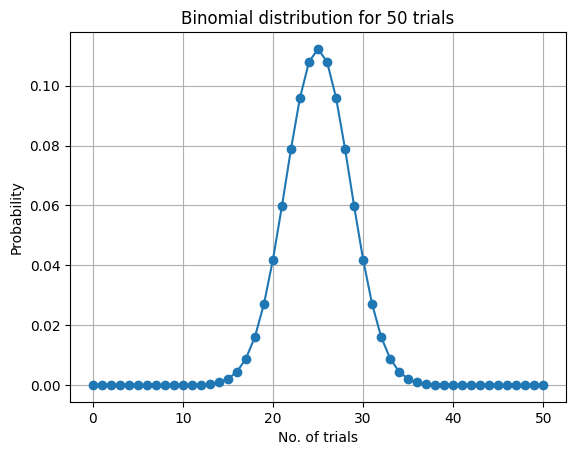

In [ ]:
# plot the binomial distribution
plt.plot([i for i in range(TRIALS + 1)], pmf,"-o")
plt.title(f"Binomial distribution for {TRIALS} trials")
plt.xlabel("No. of trials")
plt.ylabel("Probability")
plt.grid(True)

Final Selection

In [ ]:
# select features from n number of trials
def choose_features(feature_hits, TRIALS, thresh):
    #define boundries
    green_zone_thresh = TRIALS - thresh
    blue_zone_upper = green_zone_thresh
    blue_zone_lower = thresh
    green_zone = [key for key, value in feature_hits.items() if    value >= green_zone_thresh]
    blue_zone = [key for key, value in feature_hits.items() if (value >= blue_zone_lower and value < blue_zone_upper)]
    return green_zone, blue_zone

In [ ]:
thresh = get_tail_items(pmf)
green, blue = choose_features(feature_hits, TRIALS, thresh)
green,blue

([], [])

### Genetic Algorithm

In [ ]:
pip install sklearn-genetic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 16.5 MB/s eta 0:00:00


In [ ]:
from genetic_selection import GeneticSelectionCV
from sklearn import datasets, linear_model
from sklearn.model_selection import StratifiedKFold

# y2 = y.iloc[:len(x2)]

scv = StratifiedKFold(n_splits=5)
estimator = linear_model.LogisticRegression(solver="liblinear", multi_class="ovr")

selector = GeneticSelectionCV(
        estimator,
        cv=scv,
        verbose=1,
        scoring="accuracy",
        max_features=5,
        n_population=50,
        crossover_proba=0.5,
        mutation_proba=0.2,
        n_generations=40,
        crossover_independent_proba=0.5,
        mutation_independent_proba=0.05,
        tournament_size=3,
        n_gen_no_change=10,
        caching=True,
        n_jobs=-1,
    )

selector = selector.fit(X_train_tratado, y3) 
# get the selected features
cols = X_train_tratado.columns.tolist()
selected_feats = [cols[i] for i in np.where(selector.support_)[0]]

Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                            
0  	50    	[ 0.771927  2.86      0.000179]	[ 0.        1.385785  0.      ]	[ 0.771927  1.        0.000179]	[ 0.771927  5.        0.000179]
1  	25    	[-799.289828    2.02      800.000165]	[ 2713.141412     1.288255  2712.931945]	[-10000.            0.            0.000179]	[     0.771927      7.        10000.      ]
2  	37    	[-799.289828    1.52      800.000165]	[ 2713.141412     0.877268  2712.931945]	[-10000.            0.            0.000179]	[     0.771927      4.        10000.      ]
3  	26    	[-399.258951    1.32      400.000172]	[ 1959.74306      0.705408  1959.591759]	[-10000.            0.            0.000179]	[     0.771927      4.        10000.      ]
4  	34    	[-1599.351582     1.18      1600.00015 ]	[ 3666.343549     0.792212  3666.06049 ]	[-10000.            0.            0.000179]	[     0.

In [ ]:
# train and test
clf = LogisticRegression(C=10, max_iter=10000, random_state=42)
clf.fit(X_train_tratado[selected_feats], y_train)
preds = clf.predict(X_valid_tratado[selected_feats])
print(classification_report(y_valid, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       973
           1       0.79      1.00      0.88      3553

    accuracy                           0.79      4526
   macro avg       0.39      0.50      0.44      4526
weighted avg       0.62      0.79      0.69      4526



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(selector.support_)

[False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False]


In [ ]:
print(selected_feats)

['pai_nivel_escolaridade']


## Embedded Methods

### Least Absolute Shrinkage and Selection Operator (LASSO)

In [ ]:
from sklearn.linear_model import LassoCV
# from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold

y3 = y_train.iloc[:len(X_train_tratado)]

skf = StratifiedKFold(n_splits=10)
lasso = LassoCV(cv=skf, random_state=42).fit(X_train_tratado, y3)
features = list(X_train_tratado.columns[np.where(lasso.coef_!=0)[0]])
print('Selected Features:', features)
print(len(features))
len(X_train_tratado.columns)

Selected Features: ['campus', 'curso', 'forma_acesso_seletivo', 'modalidade', 'companhia_domiciliar', 'mae_nivel_escolaridade', 'pai_nivel_escolaridade', 'trabalha', 'genero_F', 'genero_M', 'raca_Parda']
11


26

### Feature Importance

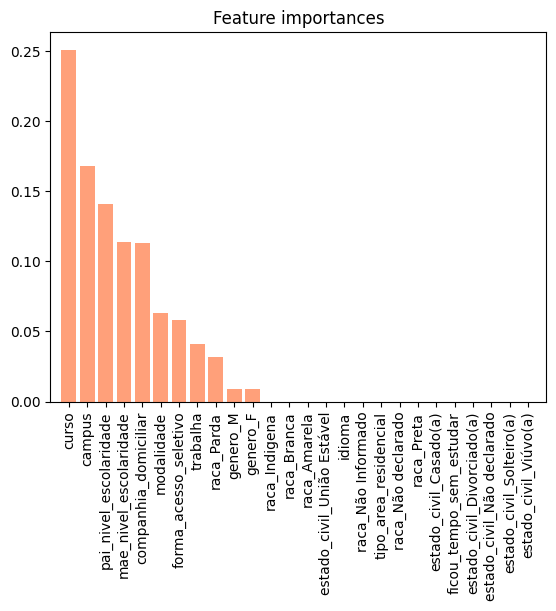

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
rf.fit(X_train_tratado, y3)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_tratado.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(X_train_tratado.shape[1]), X_train_tratado.columns[indices], rotation=90)
plt.xlim([-1, X_train_tratado.shape[1]])
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(rf, threshold=0.06)
sfm.fit(X_train_tratado, y_train)
X_important_train = sfm.transform(X_train_tratado)
X_important_test = sfm.transform(X_valid_tratado)
rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
rf.fit(X_important_train, y_train)
y_pred = rf.predict(X_important_test)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.20      0.26       973
           1       0.80      0.90      0.85      3553

    accuracy                           0.75      4526
   macro avg       0.58      0.55      0.55      4526
weighted avg       0.71      0.75      0.72      4526



### Permutation Importance

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=9cfd9fc888d5c8123c3628f3e1c07f95aa7fa4a16a09a642ba28c27de1f469d5
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
rf.fit(X_train_tratado, y_train)
perm = PermutationImportance(rf, random_state=42).fit(X_valid_tratado, y_valid)
eli5.show_weights(perm)
# eli5.show_weights(perm, features_names=X_train_tratado.columns)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10)

rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)

feats = np.where(perm.feature_importances_>=0.001)[0]
preds= cross_val_predict(rf, X_valid_tratado[X_valid_tratado.columns[feats]], y_valid, cv=skf) 
print(classification_report(y_valid, preds))

              precision    recall  f1-score   support

           0       0.31      0.46      0.37       973
           1       0.83      0.72      0.77      3553

    accuracy                           0.67      4526
   macro avg       0.57      0.59      0.57      4526
weighted avg       0.72      0.67      0.69      4526



# Primeiros passos com XAI

## Imports

In [ ]:
!pip install ruptures
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
import shap
from scipy.stats import kurtosis, skew
from scipy.signal import find_peaks
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.inspection import (partial_dependence, PartialDependenceDisplay, permutation_importance)
import random
import ruptures as rpt

## Treinando modelos de aprendizado de máquina

### <i>k-Nearest Nighbors</i>

In [ ]:
k_nearest_neighbors = KNeighborsClassifier(n_neighbors=5, metric="minkowski", weights="uniform")
k_nearest_neighbors.fit(X_train_tratado, y_train.values.ravel())

# y_valid1 = y_valid.reshape(-1,1)
# y_valid1 = y_valid.copy()
y_pred_knn = k_nearest_neighbors.predict(X_valid_tratado)

In [ ]:
f1score = f1_score (y_valid, y_pred_knn, average = 'macro')
recall = recall_score (y_valid, y_pred_knn, average = 'macro')
accuracy = accuracy_score (y_valid, y_pred_knn)

# y_scores=k_nearest_neighbors.predict_proba(y_valid.values.ravel())
# y_scores=k_nearest_neighbors.predict_proba(X_valid_tratado)
y_scores=k_nearest_neighbors.predict(X_valid_tratado)
# AUC = roc_auc_score (y_valid, y_scores, multi_class='ovr')
# AUC = roc_auc_score (y_valid, y_scores)
# AUC = roc_auc_score (y_valid.values.ravel(), k_nearest_neighbors.predict_proba(X_valid_tratado), multi_class='ovr')
AUC = roc_auc_score (y_valid.values.ravel(), y_scores, multi_class='ovr')

print('auc =', AUC)
print('acc =', accuracy)
print('f1 =', f1score)
print('recall =', recall)


auc = 0.5115346265868572
acc = 0.7240388864339372
f1 = 0.5059723610670872
recall = 0.5115346265868572


[2.  1.  0.8 0.6 0.4 0.2 0. ]


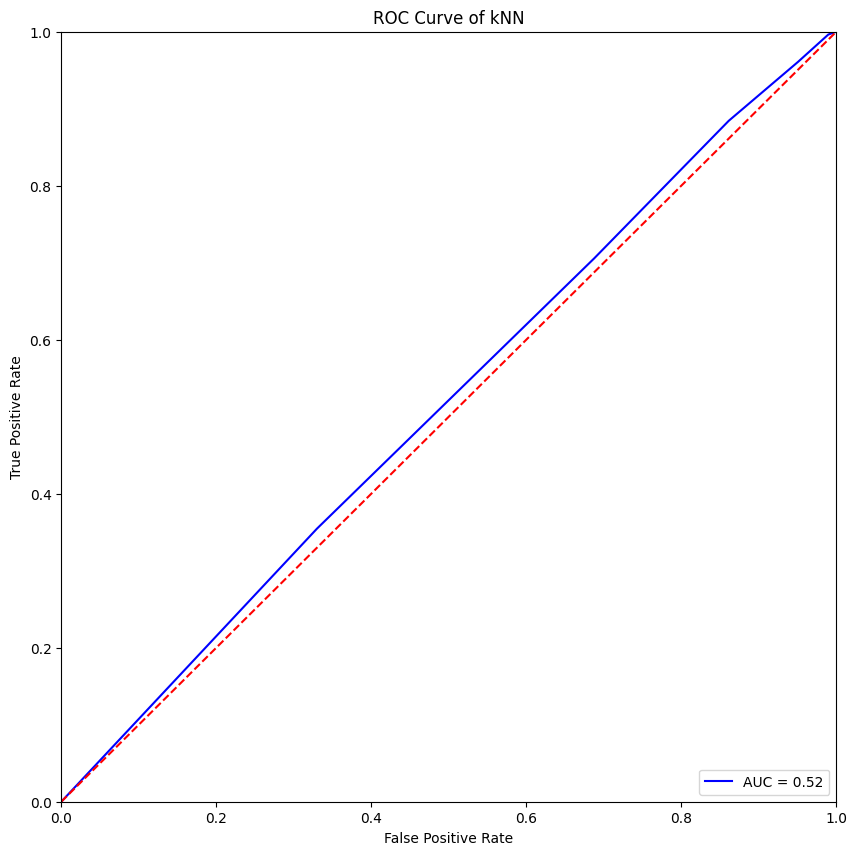

In [ ]:
y_scores=k_nearest_neighbors.predict_proba(X_valid_tratado)
# y_scores=k_nearest_neighbors.predict(X_valid_tratado)

fpr,tpr,threshold =roc_curve(y_valid,y_scores[:,1])
roc_auc_knn = auc(fpr, tpr)

print(threshold)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc_knn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

### <i>Logistic Regression</i>

In [ ]:
logistic_regression = LogisticRegression(penalty="l2", C=1.0,max_iter=999)
logistic_regression.fit(X_train_tratado, y_train.values.ravel())
y_pred_lr = logistic_regression.predict(X_valid_tratado)

In [ ]:
f1score = f1_score (y_valid, y_pred_lr, average = 'macro')
recall = recall_score (y_valid, y_pred_lr, average = 'macro')
accuracy = accuracy_score (y_valid, y_pred_lr)

y_scores=logistic_regression.predict(X_valid_tratado)
AUC = roc_auc_score (y_valid.values.ravel(), y_scores, multi_class='ovr')

# AUC = roc_auc_score (y_valid.values.ravel(),logistic_regression.predict_proba(X_valid_tratado), multi_class='ovr')
print('auc =', AUC)
print('acc =', accuracy)
print('f1 =', f1score)
print('recall =', recall)

auc = 0.50088702308227
acc = 0.7852408307556341
f1 = 0.441870874235744
recall = 0.50088702308227


[1.90677672 0.90677672 0.90232295 ... 0.49998772 0.49577056 0.48256873]


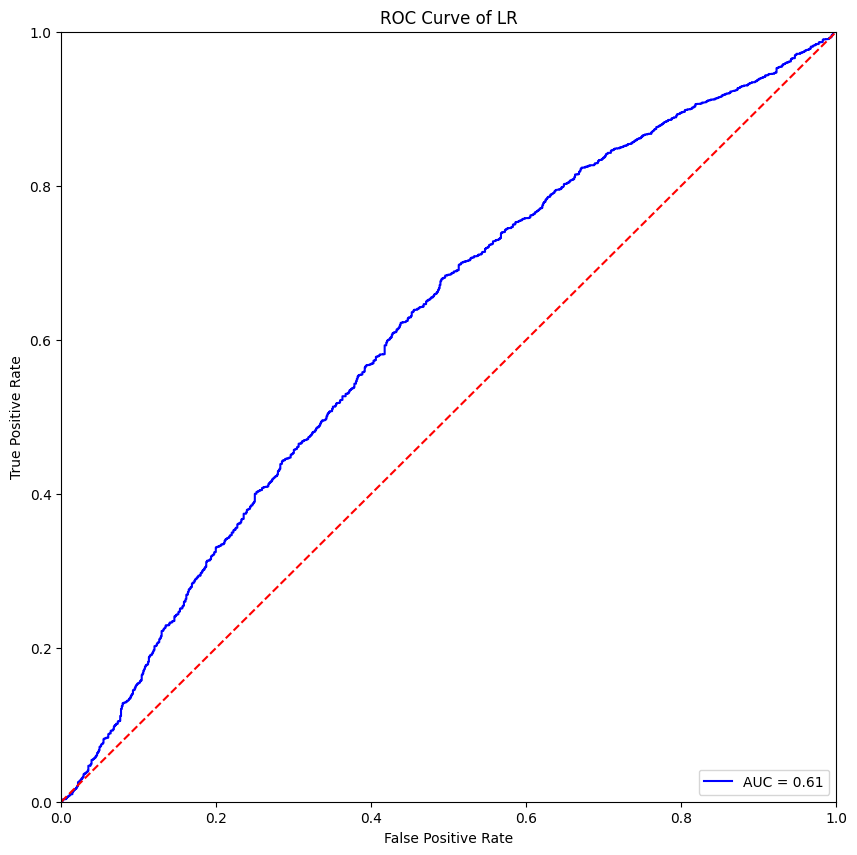

In [ ]:
y_scores=logistic_regression.predict_proba(X_valid_tratado)
# y_scores=k_nearest_neighbors.predict(X_valid_tratado)

fpr,tpr,threshold =roc_curve(y_valid,y_scores[:,1])
roc_auc_lr = auc(fpr, tpr)

print(threshold)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of LR')
plt.show()

### <i>Neural Network</i>

In [ ]:
neural_network = MLPClassifier(hidden_layer_sizes=(100,), activation="relu", solver="adam", max_iter=999)
neural_network.fit(X_train_tratado, y_train.values.ravel())
y_pred_nn = neural_network.predict(X_valid_tratado)

In [ ]:
f1score = f1_score (y_valid, y_pred_nn, average = 'macro')
recall = recall_score (y_valid, y_pred_nn, average = 'macro')
accuracy = accuracy_score (y_valid, y_pred_nn)

y_scores=neural_network.predict(X_valid_tratado)
AUC = roc_auc_score (y_valid.values.ravel(), y_scores, multi_class='ovr')

# AUC = roc_auc_score (y_valid.values.ravel(), neural_network.predict_proba(X_valid_tratado), multi_class='ovr')
print('auc =', AUC)
print('acc =', accuracy)
print('f1 =', f1score)
print('recall =', recall)

auc = 0.5003731484676759
acc = 0.7850198851082634
f1 = 0.44079288133763805
recall = 0.5003731484676759


[1.97429304 0.97429304 0.94720422 ... 0.50894952 0.47707499 0.44979875]


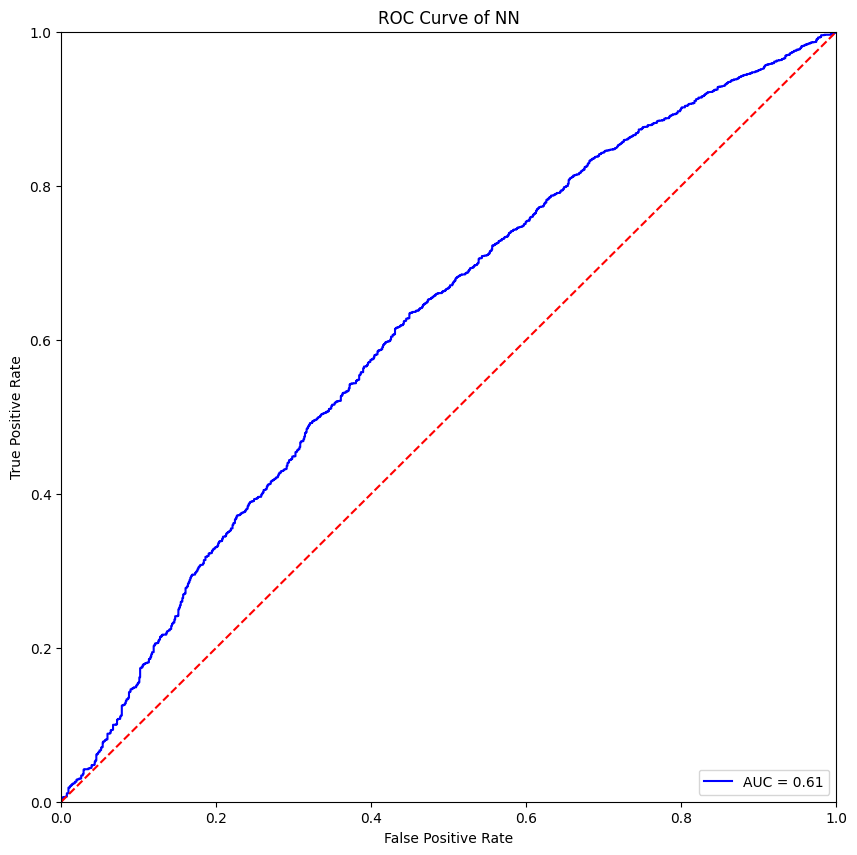

In [ ]:
y_scores=neural_network.predict_proba(X_valid_tratado)
# y_scores=k_nearest_neighbors.predict(X_valid_tratado)

fpr,tpr,threshold =roc_curve(y_valid,y_scores[:,1])
roc_auc_nn = auc(fpr, tpr)

print(threshold)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc_nn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of NN')
plt.show()

### <i>Random Forest</i>

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100,max_depth=15)

random_forest.fit(X_train_tratado, y_train.values.ravel())
y_pred_rf = random_forest.predict(X_valid_tratado)

In [ ]:
f1score = f1_score (y_valid, y_pred_rf, average = 'macro')
recall = recall_score (y_valid, y_pred_rf, average = 'macro')
accuracy = accuracy_score (y_valid, y_pred_rf)

y_scores=random_forest.predict(X_valid_tratado)
AUC = roc_auc_score (y_valid.values.ravel(), y_scores, multi_class='ovr')

# AUC = roc_auc_score (y_valid.values.ravel(), neural_network.predict_proba(X_valid_tratado), multi_class='ovr')
print('auc =', AUC)
print('acc =', accuracy)
print('f1 =', f1score)
print('recall =', recall)

auc = 0.5228410251574382
acc = 0.7810428634555899
f1 = 0.49781351904360704
recall = 0.5228410251574382


[1.98777293 0.98777293 0.96121578 ... 0.25890529 0.25603393 0.17656448]


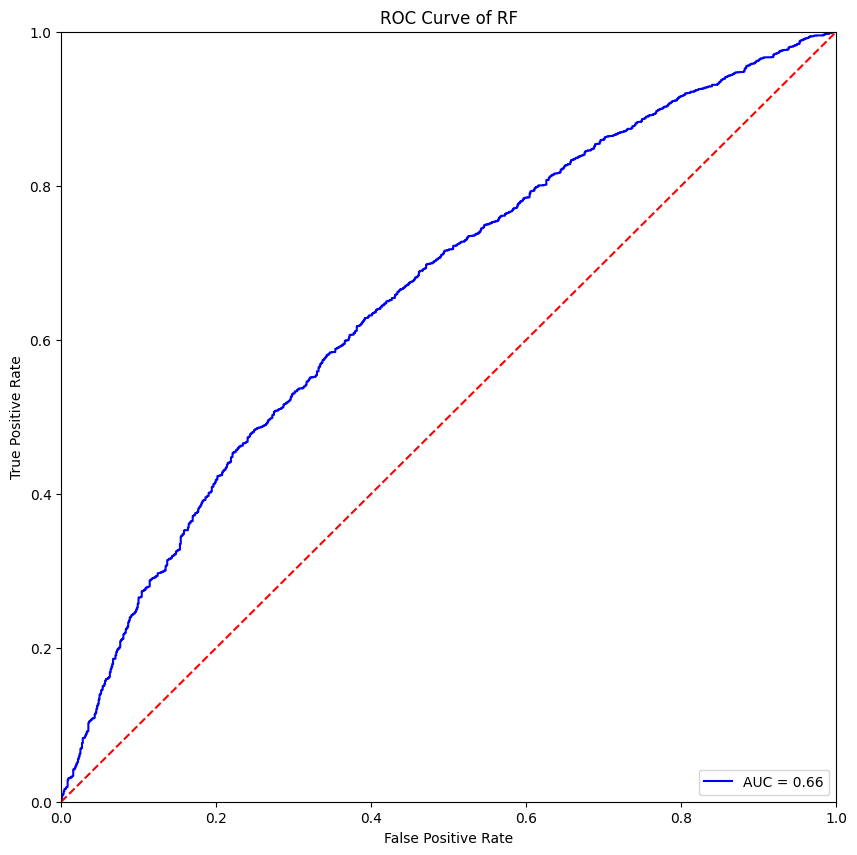

In [ ]:
y_scores=random_forest.predict_proba(X_valid_tratado)
# y_scores=k_nearest_neighbors.predict(X_valid_tratado)

fpr,tpr,threshold =roc_curve(y_valid,y_scores[:,1])
roc_auc_rf = auc(fpr, tpr)

print(threshold)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of RF')
plt.show()

### <i>Support Vector Machine</i>

In [ ]:
support_vector_machine = SVC(C=1.0, gamma=0.1, kernel="linear", tol=0.001, max_iter=9999, probability=True)

support_vector_machine.fit(X_train_tratado, y_train.values.ravel())
y_pred_svm = support_vector_machine.predict(X_valid_tratado)

Solver terminated early (max_iter=9999).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


In [ ]:
f1score = f1_score (y_valid, y_pred_svm, average = 'macro')
recall = recall_score (y_valid, y_pred_svm, average = 'macro')
accuracy = accuracy_score (y_valid, y_pred_svm)

y_scores=support_vector_machine.predict(X_valid_tratado)
AUC = roc_auc_score (y_valid.values.ravel(), y_scores, multi_class='ovr')

# AUC = roc_auc_score (y_valid.values.ravel(), neural_network.predict_proba(X_valid_tratado), multi_class='ovr')
print('auc =', AUC)
print('acc =', accuracy)
print('f1 =', f1score)
print('recall =', recall)

auc = 0.5140257541865667
acc = 0.6904551480335838
f1 = 0.5140362842325428
recall = 0.5140257541865667


[1.77380243 0.77380243 0.77303859 ... 0.76920818 0.76915268 0.7687034 ]


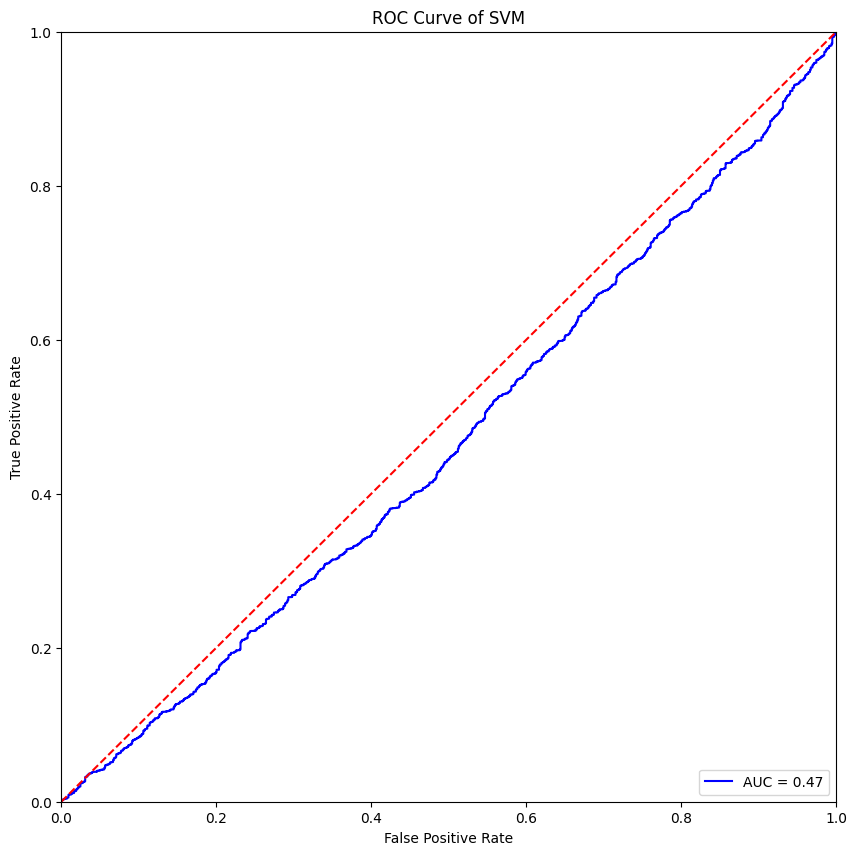

In [ ]:
y_scores=support_vector_machine.predict_proba(X_valid_tratado)
# y_scores=k_nearest_neighbors.predict(X_valid_tratado)

fpr,tpr,threshold =roc_curve(y_valid,y_scores[:,1])
roc_auc_svm = auc(fpr, tpr)

print(threshold)

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc_svm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of SVM')
plt.show()

## Curva de ROC dos modelos

### Calcula probabilidade de predição das três saídas possíveis

In [ ]:
k_nearest_neighbors_pred_prob_0 = k_nearest_neighbors.predict_proba(X_valid_tratado)[:,0]
logistic_regression_pred_prob_0 = logistic_regression.predict_proba(X_valid_tratado)[:,0]
neural_network_pred_prob_0 = neural_network.predict_proba(X_valid_tratado)[:,0]
random_forest_pred_prob_0 = random_forest.predict_proba(X_valid_tratado)[:,0]
support_vector_machine_pred_prob_0 = support_vector_machine.predict_proba(X_valid_tratado)[:,0]

In [ ]:
k_nearest_neighbors_pred_prob_1 = k_nearest_neighbors.predict_proba(X_valid_tratado)[:,1]
logistic_regression_pred_prob_1 = logistic_regression.predict_proba(X_valid_tratado)[:,1]
neural_network_pred_prob_1 = neural_network.predict_proba(X_valid_tratado)[:,1]
random_forest_pred_prob_1 = random_forest.predict_proba(X_valid_tratado)[:,1]
support_vector_machine_pred_prob_1 = support_vector_machine.predict_proba(X_valid_tratado)[:,1]

### Saída 0 como positiva (???)

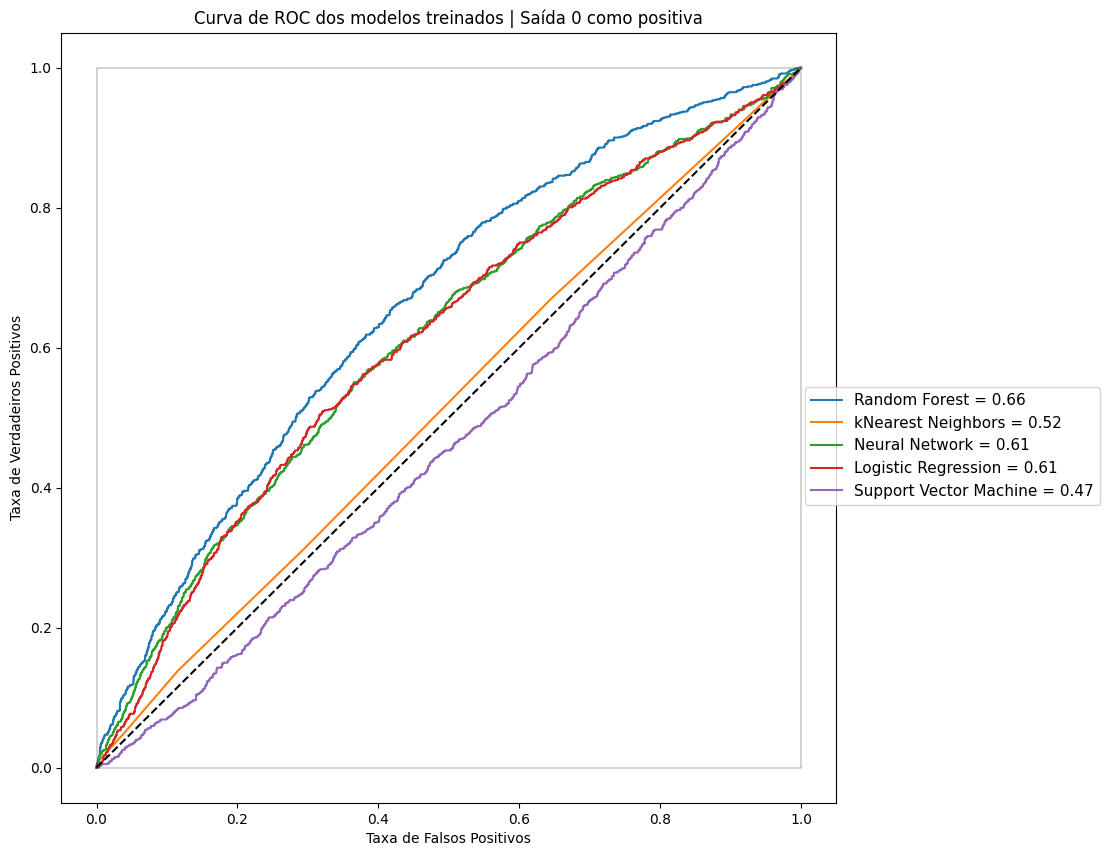

In [ ]:
fpr, tpr, threshold = roc_curve(y_valid.values.ravel(),random_forest_pred_prob_0, pos_label=0)
plt.plot(fpr, tpr, label='Random Forest = %0.2f' % roc_auc_rf)
# plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)

fpr, tpr, threshold = roc_curve(y_valid.values.ravel(),k_nearest_neighbors_pred_prob_0, pos_label=0)
plt.plot(fpr, tpr, label='kNearest Neighbors = %0.2f' % roc_auc_knn)

fpr, tpr, threshold = roc_curve(y_valid.values.ravel(),neural_network_pred_prob_0, pos_label=0)
plt.plot(fpr, tpr, label='Neural Network = %0.2f' % roc_auc_nn)

fpr, tpr, threshold = roc_curve(y_valid.values.ravel(),logistic_regression_pred_prob_0, pos_label=0)
plt.plot(fpr, tpr, label='Logistic Regression = %0.2f' % roc_auc_lr)

fpr, tpr, threshold = roc_curve(y_valid.values.ravel(),support_vector_machine_pred_prob_0, pos_label=0)
plt.plot(fpr, tpr, label='Support Vector Machine = %0.2f' % roc_auc_svm)

plt.plot([0,1], [0,1], 'k--')
plt.plot([0,0], [0,1], color="black", linewidth=0.25)
plt.plot([0,1], [1,1], color="black", linewidth=0.25)
plt.plot([0,1], [0,0], color="black", linewidth=0.25)
plt.plot([1,1], [0,1], color="black", linewidth=0.25)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
# plt.legend(prop={'size': 9}, loc = 4)
plt.legend(prop={'size': 11}, bbox_to_anchor =(0.95, 0.55))
plt.title("Curva de ROC dos modelos treinados | Saída 0 como positiva")
plt.show()


### Saída 1 como positiva (???)

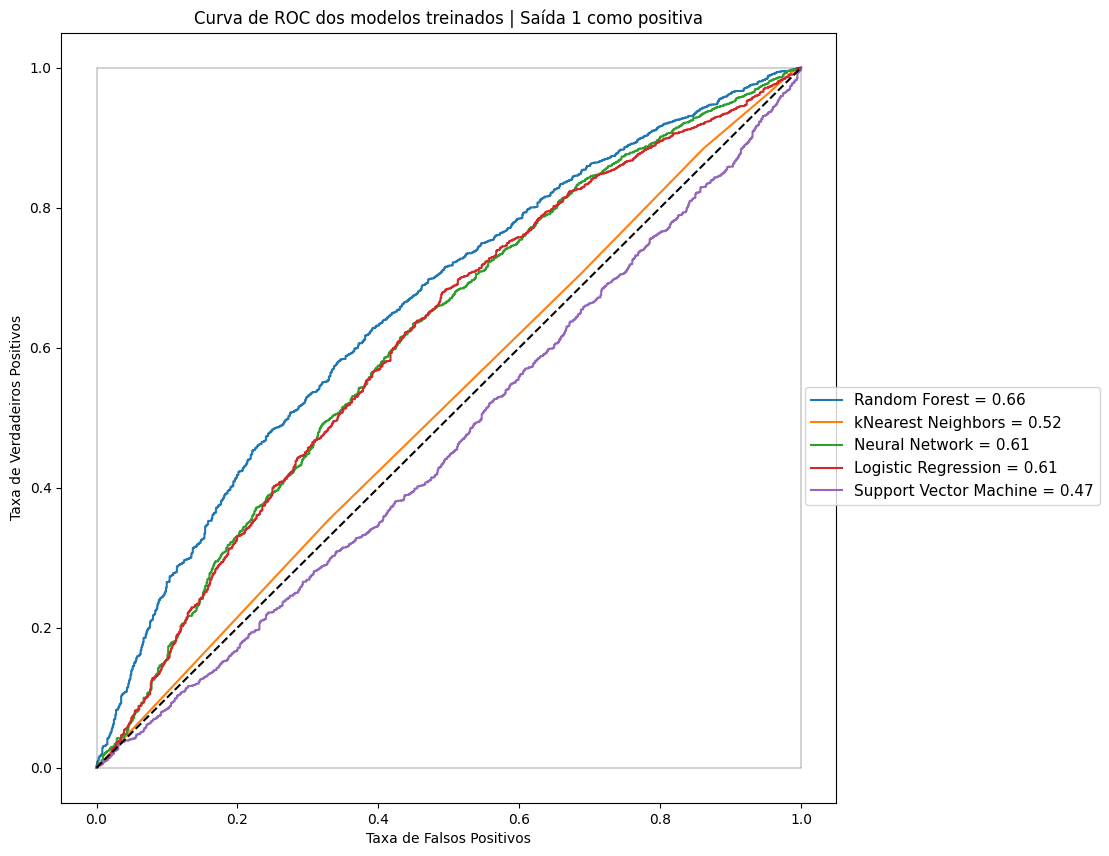

In [ ]:
fpr, tpr, threshold = roc_curve(y_valid.values.ravel(),random_forest_pred_prob_1, pos_label=1)
plt.plot(fpr, tpr, label='Random Forest = %0.2f' % roc_auc_rf)
# plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)

fpr, tpr, threshold = roc_curve(y_valid.values.ravel(),k_nearest_neighbors_pred_prob_1, pos_label=1)
plt.plot(fpr, tpr, label='kNearest Neighbors = %0.2f' % roc_auc_knn)

fpr, tpr, threshold = roc_curve(y_valid.values.ravel(),neural_network_pred_prob_1, pos_label=1)
plt.plot(fpr, tpr, label='Neural Network = %0.2f' % roc_auc_nn)

fpr, tpr, threshold = roc_curve(y_valid.values.ravel(),logistic_regression_pred_prob_1, pos_label=1)
plt.plot(fpr, tpr, label='Logistic Regression = %0.2f' % roc_auc_lr)

fpr, tpr, threshold = roc_curve(y_valid.values.ravel(),support_vector_machine_pred_prob_1, pos_label=1)
plt.plot(fpr, tpr, label='Support Vector Machine = %0.2f' % roc_auc_svm)

plt.plot([0,1], [0,1], 'k--')
plt.plot([0,0], [0,1], color="black", linewidth=0.25)
plt.plot([0,1], [1,1], color="black", linewidth=0.25)
plt.plot([0,1], [0,0], color="black", linewidth=0.25)
plt.plot([1,1], [0,1], color="black", linewidth=0.25)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
# plt.legend(prop={'size': 9}, loc = 4)
plt.legend(prop={'size': 11}, bbox_to_anchor =(0.95, 0.55))
plt.title("Curva de ROC dos modelos treinados | Saída 1 como positiva")
plt.show()


## Explicando melhor modelo de Aprendizado de máquina (Random Forest)

### SHARP

In [ ]:
# X_train_tratado1.info()

In [ ]:
# X_train_tratado1 = X_train_tratado.copy()
# X_train_tratado1['situacao'] = y_train

explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(X_train_tratado)
shap_obj = explainer(X_train_tratado)

In [ ]:
# X_train_tratado1 = X_train_tratado.copy()
# X_train_tratado1['situacao'] = y_train
shap.dependence_plot("campus", shap_values[0], X_train_tratado1.values, feature_names=X_train_tratado1.columns)

In [ ]:
X_train_tratado1.info()

### LIME

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import lime.lime_tabular

#dados de concessão de crédito
# credito = pd.read_csv('Credit.csv')
# credito.head()

#separação de previsões de classe
# previsores = credito.iloc[:,0:20].values
# classe = credito.iloc[:,20].values
previsores = X_train_tratado.values
classe = y_train.values

#label encoding de atributos categóricos
# labelencoder = LabelEncoder()
# previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
# previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
# previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])
# previsores[:, 5] = labelencoder.fit_transform(previsores[:, 5])
# previsores[:, 6] = labelencoder.fit_transform(previsores[:, 6])
# previsores[:, 8] = labelencoder.fit_transform(previsores[:, 8])
# previsores[:, 9] = labelencoder.fit_transform(previsores[:, 9])
# previsores[:, 11] = labelencoder.fit_transform(previsores[:, 11])
# previsores[:, 13] = labelencoder.fit_transform(previsores[:, 13])
# previsores[:, 14] = labelencoder.fit_transform(previsores[:, 14])
# previsores[:, 16] = labelencoder.fit_transform(previsores[:, 16])
# previsores[:, 18] = labelencoder.fit_transform(previsores[:, 18])
# previsores[:, 19] = labelencoder.fit_transform(previsores[:, 19])

#separamos em treino e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

#objeto randomforest
modelo = RandomForestClassifier(n_estimators = 100)
#treinamento
modelo.fit(X_treinamento, y_treinamento)

#criamos o objeto lime
expl = lime.lime_tabular.LimeTabularExplainer(X_treinamento, feature_names=X_train_tratado.columns,class_names="situacao")

#função prever
prever = lambda x: modelo.predict_proba(x).astype(float)

NameError: ignored

In [ ]:
#linha escolhida
X_teste[0]

In [ ]:
X_teste[:1]

In [ ]:
previsoes = modelo.predict(X_teste[6:7])
# previsoes = modelo.predict(X_teste)
previsoes

In [ ]:
#exclipcação, num_features é o número máximo de features que serão mostrados na explicação
exp = expl.explain_instance(X_teste[0], prever, num_features=5)
exp.show_in_notebook(show_all=True)

# Esse Pipeline parece que vai...

<b>Etapas do Pipeline</b>
<ol>
  <li>Importar dados e codificação</li>
  <li>Defina conjuntos de colunas a serem transformadas de maneiras diferentes</li>
  <li>Dividir dados para treinar e testar conjuntos</li>
  <li>Crie pipelines para recursos numéricos e categóricos</li>
  <li>Criar ColumnTransformer para aplicar o pipeline para cada conjunto de colunas</li>
  <li>Adicionar um modelo a um pipeline final</li>
  <li>Exibir o pipeline</li>
  <li>Passar dados pelo pipeline</li>
  <li>(Opcional) Salve o pipeline</li>
  </ol>

## Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
import missingno as msno
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
from sklearn.model_selection import train_test_split

## Conhecendo os dados de alunos do IFMA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# dataset url
# 'https://www.kaggle.com/c/house-prices-advanced-regression-techniques'

# train = pd.read_csv('./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/exemplos/house-prices-advanced-regression-techniques/train.csv', index_col ='Id')
# test = pd.read_csv('./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/exemplos/house-prices-advanced-regression-techniques/test.csv', index_col ='Id')

df = pd.read_csv("./drive/MyDrive/DOUTORADO UFMA/ESTUDO DIRIGIDO I/data/suap/23062022/dados_caracterizacaosocial.csv")

# train = pd.read_csv("house-prices-advanced-regression-techniques/train.csv", index_col ='Id')
# test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv", index_col ='Id')
X = df.drop('situacao', axis = 1)
y = df['situacao']

# X = train.drop('SalePrice', axis = 1)
# y = train['SalePrice']

In [ ]:
print(X.info())
X.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48311 entries, 0 to 48310
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   alunoid                     48311 non-null  int64  
 1   campus                      48311 non-null  object 
 2   curso                       48311 non-null  object 
 3   anoingresso                 48311 non-null  int64  
 4   periodoingresso             48311 non-null  int64  
 5   dataconclusao               12925 non-null  object 
 6   forma_acesso_seletivo       42288 non-null  object 
 7   rendabruta                  48311 non-null  float64
 8   ira                         48311 non-null  float64
 9   modalidade                  48311 non-null  object 
 10  genero                      48311 non-null  object 
 11  raca                        48311 non-null  object 
 12  idade                       48311 non-null  int64  
 13  ficou_tempo_sem_estudar     483

(48311, 29)

<Axes: >

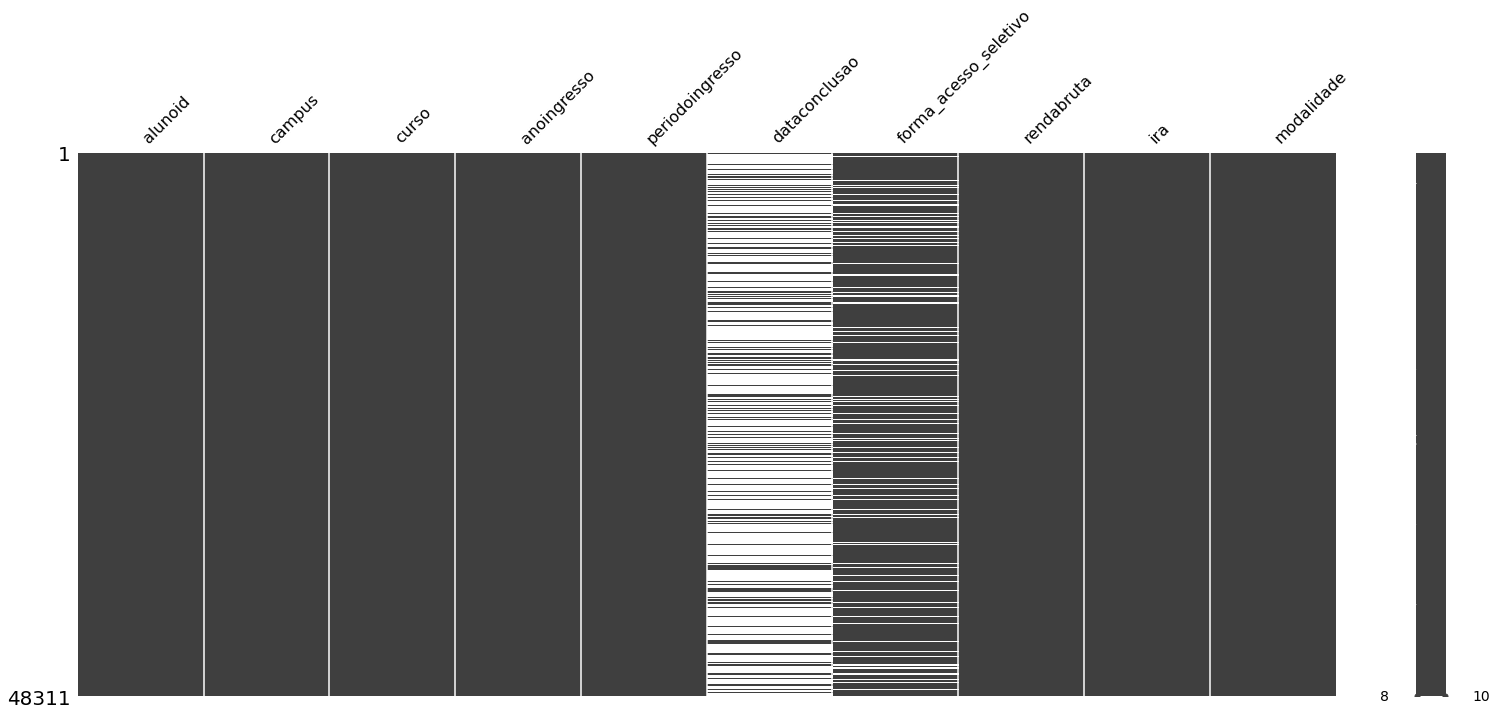

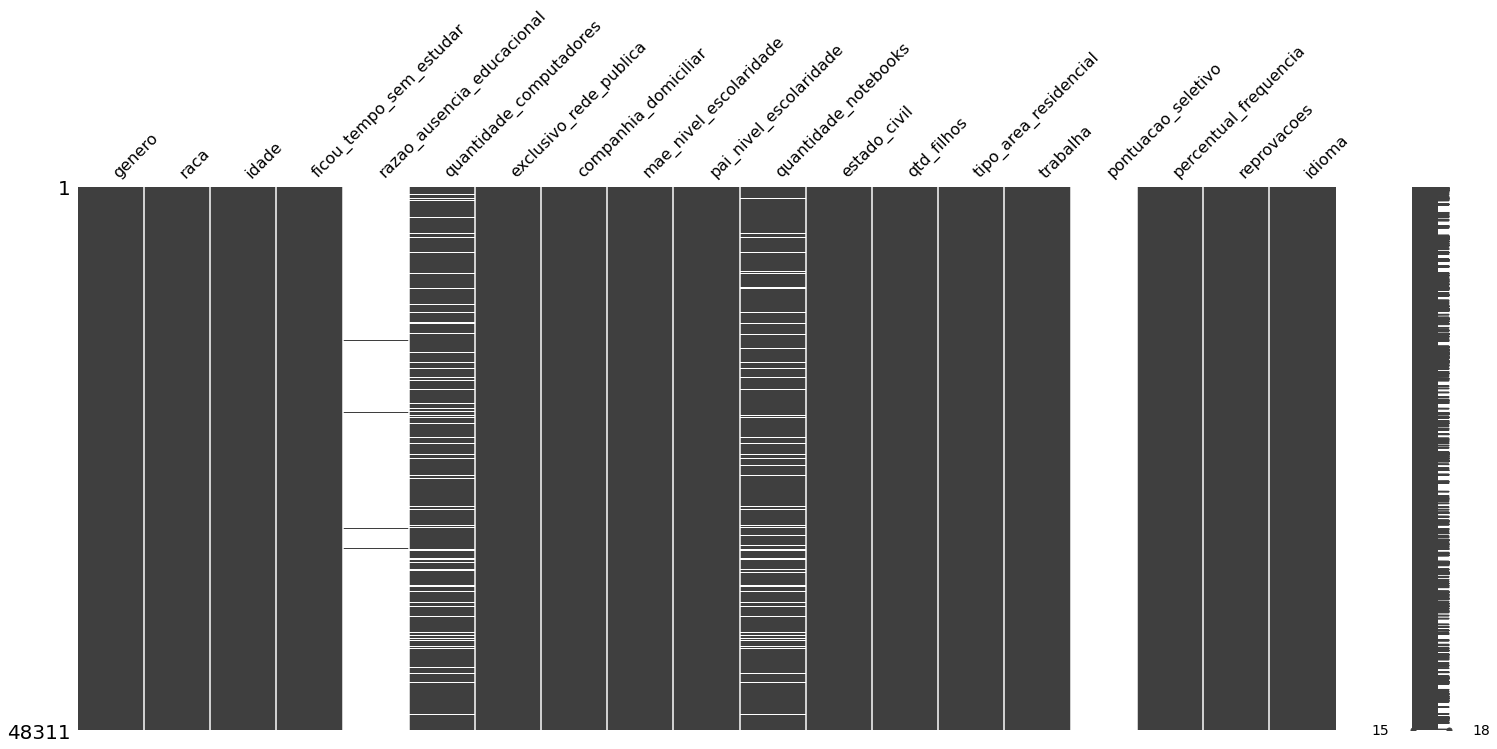

In [ ]:
# check pattern of missingness
msno.matrix(X.iloc[:,:10])
msno.matrix(X.iloc[:,10:])

<AxesSubplot:>

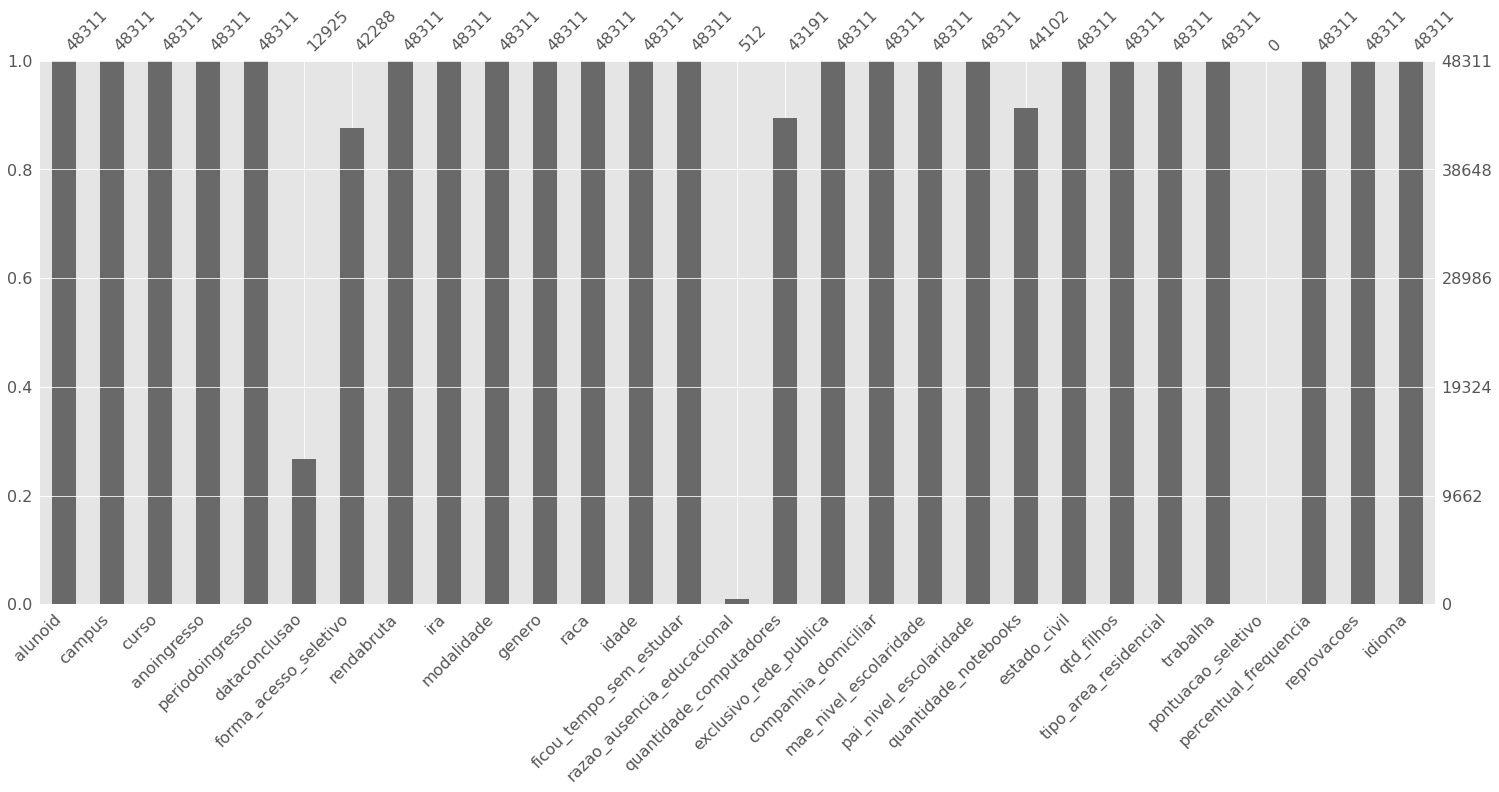

In [ ]:
msno.bar(X)

<Axes: >

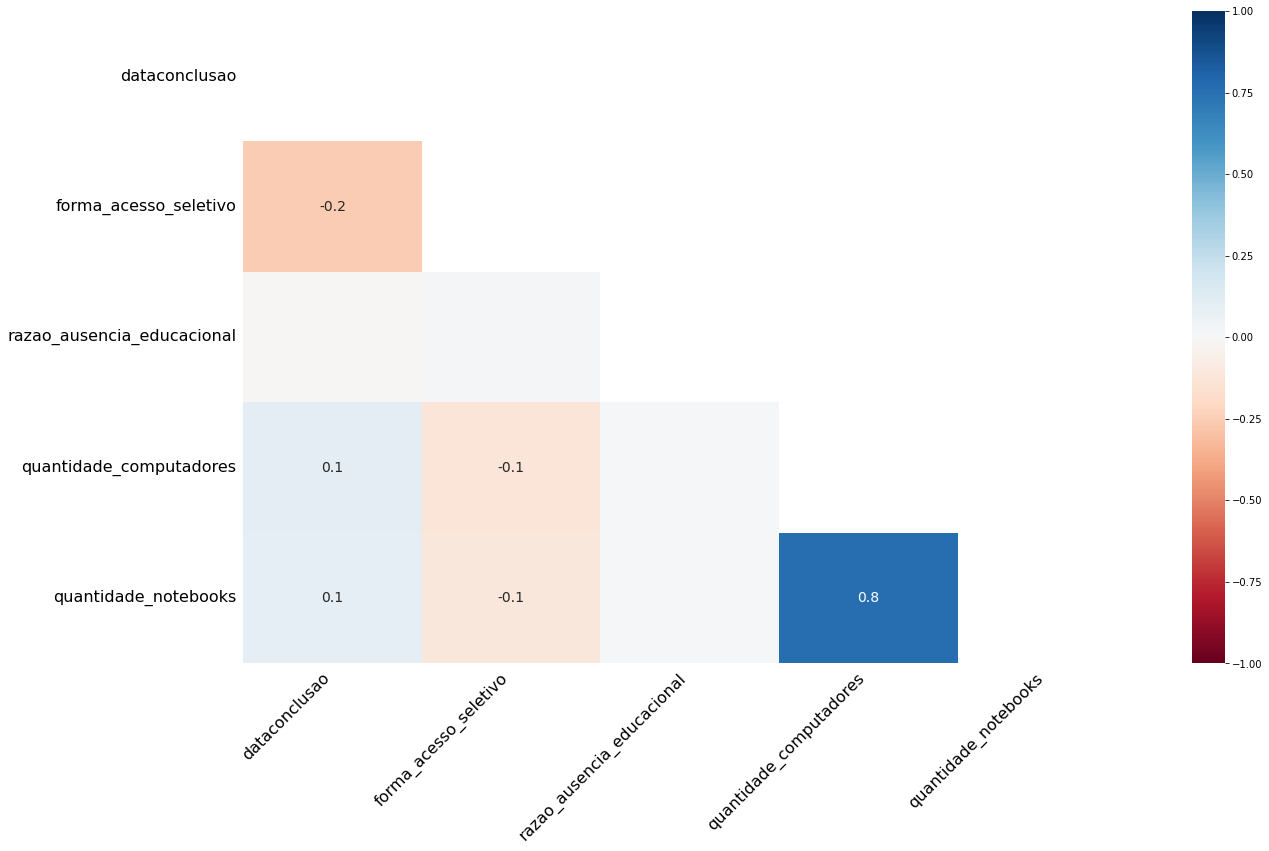

In [ ]:
msno.heatmap(X)

## Criar pipelines para recursos numéricos e categóricos

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48311 entries, 0 to 48310
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   alunoid                     48311 non-null  int64  
 1   campus                      48311 non-null  object 
 2   curso                       48311 non-null  object 
 3   anoingresso                 48311 non-null  int64  
 4   periodoingresso             48311 non-null  int64  
 5   dataconclusao               12925 non-null  object 
 6   forma_acesso_seletivo       42288 non-null  object 
 7   rendabruta                  48311 non-null  float64
 8   ira                         48311 non-null  float64
 9   modalidade                  48311 non-null  object 
 10  genero                      48311 non-null  object 
 11  raca                        48311 non-null  object 
 12  idade                       48311 non-null  int64  
 13  ficou_tempo_sem_estudar     483

In [ ]:
## Selecting categorical and numeric features
num_cols = list(X.drop(['razao_ausencia_educacional','pontuacao_seletivo'], axis=1).select_dtypes(include=np.number).columns)
cat_cols = list(X.select_dtypes(exclude=np.number).columns)
# cat_cols = list(X.drop(['genero', 'raca', 'estado_civil'], axis=1).select_dtypes(exclude=np.number).columns)

In [ ]:
print(num_cols + cat_cols)

['alunoid', 'anoingresso', 'periodoingresso', 'rendabruta', 'ira', 'idade', 'quantidade_computadores', 'quantidade_notebooks', 'qtd_filhos', 'percentual_frequencia', 'reprovacoes', 'campus', 'curso', 'dataconclusao', 'forma_acesso_seletivo', 'modalidade', 'genero', 'raca', 'ficou_tempo_sem_estudar', 'razao_ausencia_educacional', 'exclusivo_rede_publica', 'companhia_domiciliar', 'mae_nivel_escolaridade', 'pai_nivel_escolaridade', 'estado_civil', 'tipo_area_residencial', 'trabalha', 'idioma']


## Defina conjuntos de colunas a serem transformadas de maneiras diferentes

In [ ]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale',MinMaxScaler())
])
cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse=False))
])

## Criar ColumnTransformer para aplicar o pipeline para cada conjunto de colunas

In [ ]:
col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
    ],
    remainder='passthrough',
    n_jobs=-1)

## Adicionar um modelo ao pipeline final

In [ ]:
clf = LogisticRegression(random_state=0)
clf_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', clf)
])

## Exibir o pipeline

In [ ]:
set_config(display='diagram')
display(clf_pipeline)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['alunoid', 'anoingresso',
                                                   'periodoingresso',
                                                   'rendabruta', 'ira', 'idade',
                                                   'quantidade_computadores',
                                                   'quantidade_notebooks',
                                                   'qtd_filhos',
                                                   'percentual_frequenc...
                                                  ['campus', 'curso',
                                                   'dataconclusao',
                                                   'forma_acesso_seletivo',
                                                   'modalidade', 'genero',
                                                   'raca',
                                                   'ficou_tempo_sem_estudar',
                                                   'razao_ausencia_educacional',
                                                   'exclusivo_rede_publica',
                                                   'companhia_domiciliar',
                                                   'mae_nivel_escolaridade',
                                                   'pai_nivel_escolaridade',
                                                   'estado_civil',
                                                   'tipo_area_residencial',
                                                   'trabalha', 'idioma'])])),
                ('model', LogisticRegression(random_state=0))])

## Dividir os dados em conjuntos de treinamento e teste

In [ ]:
print([num_cols]+[cat_cols])

[['alunoid', 'anoingresso', 'periodoingresso', 'rendabruta', 'ira', 'idade', 'quantidade_computadores', 'quantidade_notebooks', 'qtd_filhos', 'pontuacao_seletivo', 'percentual_frequencia', 'reprovacoes'], ['campus', 'curso', 'dataconclusao', 'forma_acesso_seletivo', 'modalidade', 'genero', 'raca', 'ficou_tempo_sem_estudar', 'razao_ausencia_educacional', 'exclusivo_rede_publica', 'companhia_domiciliar', 'mae_nivel_escolaridade', 'pai_nivel_escolaridade', 'estado_civil', 'tipo_area_residencial', 'trabalha', 'idioma']]


In [ ]:
X = df[num_cols+cat_cols]
y = df['situacao']
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## Passar dados pelo pipeline

In [ ]:
clf_pipeline.fit(X_train, y_train)
# preds = clf_pipeline.predict(X_test)
score = clf_pipeline.score(X_test, y_test)
print(f"Model score: {score}") # model accuracy

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model score: 0.8433198799544654


## Adicionar transformações personalizadas e encontrar o melhor modelo de aprendizado de máquina

<b>Etapas</b>
<ul>
  <li>Adicionar uma transformação personalizada</li>
  <li>Encontre o melhor modelo de aprendizado de máquina</li>
</u>

### Adicionar uma transformação personalizada

## Encontrar o melhor hiperparâmetro e método de preparação de dados

<b>Etapas:</b>
<ul>
<li>Como encontrar os parâmetros de pipeline alteráveis</li>
<li>Como encontrar os melhores conjuntos de hiperparâmetros: Adicionar um pipeline à pesquisa em grade</li>
<li>Como encontrar o melhor método de preparação de dados: pule uma etapa em um pipeline</li>
<li>Como encontrar os melhores conjuntos de hiperparâmetros e o melhor método de preparação de dados</li>

### Como encontrar os parâmetros de pipeline mutáveis

In [ ]:
clf_pipeline.get_params()

{'memory': None,
 'steps': [('col_trans', ColumnTransformer(n_jobs=-1, remainder='passthrough',
                     transformers=[('num_pipeline',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='median')),
                                                    ('scale', MinMaxScaler())]),
                                    ['alunoid', 'anoingresso', 'periodoingresso',
                                     'rendabruta', 'ira', 'idade',
                                     'quantidade_computadores',
                                     'quantidade_notebooks', 'qtd_filhos',
                                     'percentual_frequencia', 'reprovacoes']),
                                   ('cat_pip...
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                            

In [ ]:
clf_pipeline.set_params(model__C = 10)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['alunoid', 'anoingresso',
                                                   'periodoingresso',
                                                   'rendabruta', 'ira', 'idade',
                                                   'quantidade_computadores',
                                                   'quantidade_notebooks',
                                                   'qtd_filhos',
                                                   'percentual_frequenc...
                                                  ['campus', 'curso',
                                                   'dataconclusao',
                                                   'forma_acesso_seletivo',
                                                   'modalidade', 'genero',
                                                   'raca',
                                                   'ficou_tempo_sem_estudar',
                                                   'razao_ausencia_educacional',
                                                   'exclusivo_rede_publica',
                                                   'companhia_domiciliar',
                                                   'mae_nivel_escolaridade',
                                                   'pai_nivel_escolaridade',
                                                   'estado_civil',
                                                   'tipo_area_residencial',
                                                   'trabalha', 'idioma'])])),
                ('model', LogisticRegression(C=10, random_state=0))])

In [ ]:
grid_params = {'model__penalty' : ['none', 'l2'],
               'model__C' : np.logspace(-4, 4, 20)}

In [ ]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(clf_pipeline, grid_params, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)

print("Best Score of train set: "+str(gs.best_score_))
print("Best parameter set: "+str(gs.best_params_))
print("Test Score: "+str(gs.score(X_test,y_test)))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

KeyboardInterrupt: ignored